In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from proj1_helpers import *
from implementations import * 
import os
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
DATA_TRAIN_PATH = os.path.dirname(os.getcwd()) + '/data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH) # labels/predictions, id of each sample, tX - 30 features of each sample (float)
labels_feature = np.genfromtxt(DATA_TRAIN_PATH, delimiter=",", dtype=str, max_rows=1)[2:]

## Data Exploration

We see that the proportion is not equal, we have to make sure the optimisation procedure takes this into account (proportion of classes in each set, class error instead of classification error)
We see that one feature among all features exhibit a much more restricted range of values, probably a category feature

## Feature Engineering

### *Dealing with undefined values* ###

In [4]:
# Splitting the dataset based on the value of PRI_jet_num and 
# removing undefined features for the corresponding subsets
ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y, labels_feat = split_subsets(tX, y,labels_feature)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
Remaining features for subset 2, 3: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
Remaining features for subset 1: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi'
 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi' 'PRI_

Thus all remaining undefined values belong to the first feature **DER_mass_MMC**.

In [6]:
# CREATING DIFFERENT SUBSETS OF FEATURES TO TEST

# Subset feature replacemnet of DET_mass_MMC by median of defined values
ss0_tX, ss0_y = replace_undef_feat(ss0_tX,ss0_y,method = 'median')
ss1_tX, ss1_y = replace_undef_feat(ss1_tX,ss1_y,method = 'median')
ss2_tX, ss2_y = replace_undef_feat(ss2_tX,ss2_y,method = 'median')
ss3_tX, ss3_y = replace_undef_feat(ss3_tX,ss3_y,method = 'median')

In [8]:
# Indices of column containing remaining -999 
print('Columns where -999 remain in subset 0: {}'.format(np.unique(np.argwhere(np.where(ss0_tX == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 1: {}'.format(np.unique(np.argwhere(np.where(ss1_tX == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 2: {}'.format(np.unique(np.argwhere(np.where(ss2_tX == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 3: {}'.format(np.unique(np.argwhere(np.where(ss3_tX == -999.0,1,0))[:,1])))

Columns where -999 remain in subset 0: []
Columns where -999 remain in subset 1: []
Columns where -999 remain in subset 2: []
Columns where -999 remain in subset 3: []


### _Dealing with outliers_

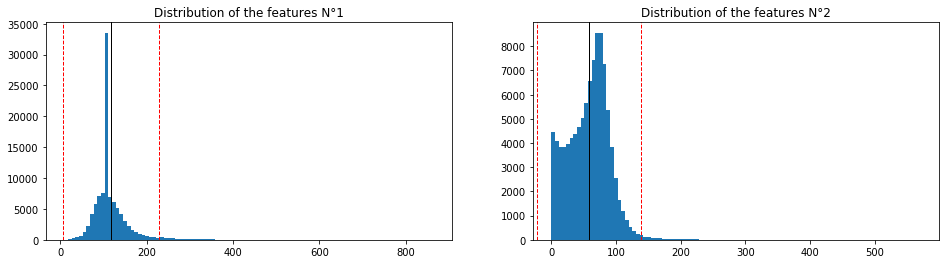

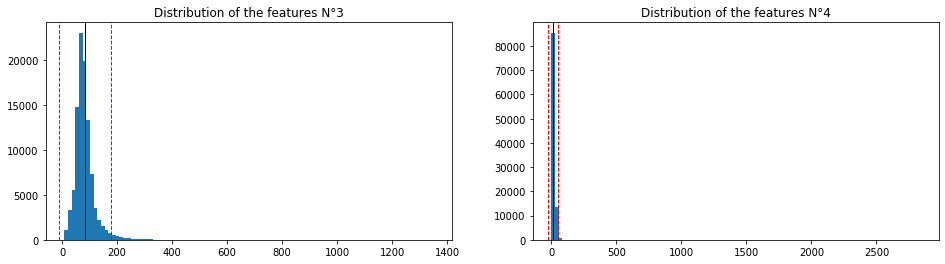

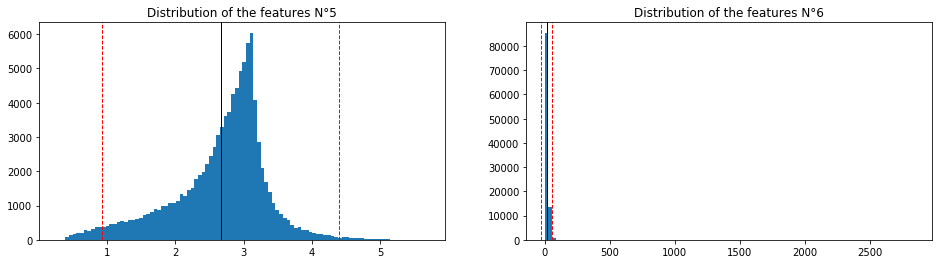

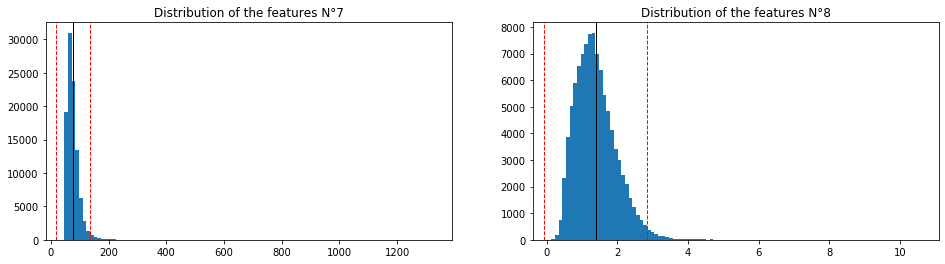

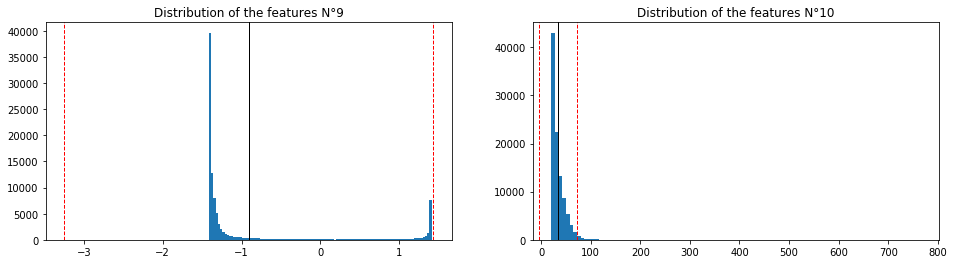

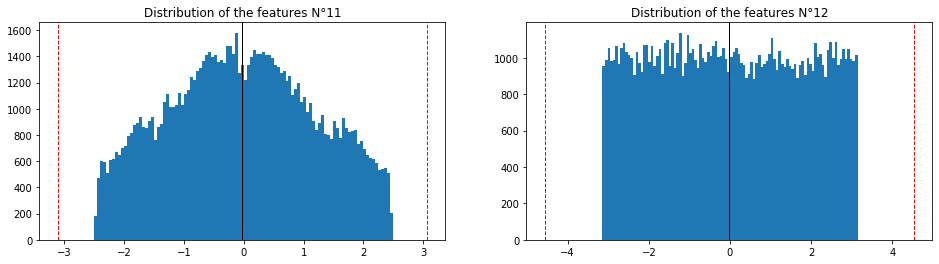

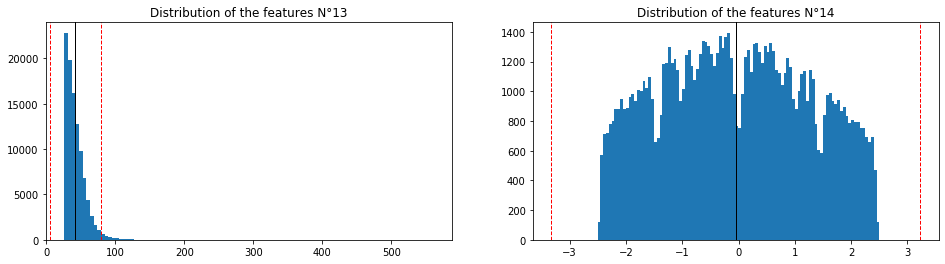

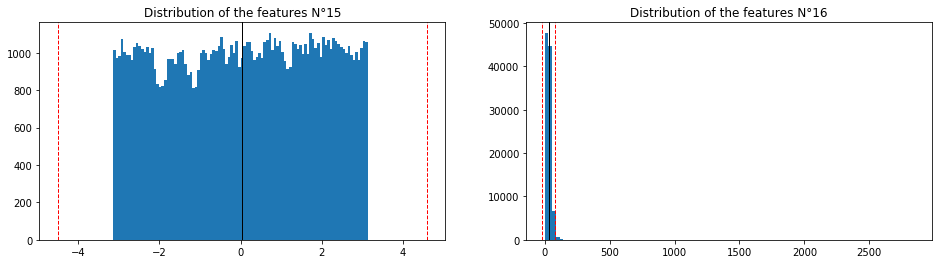

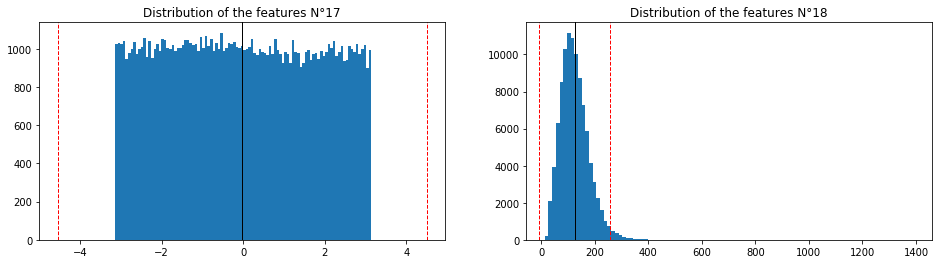

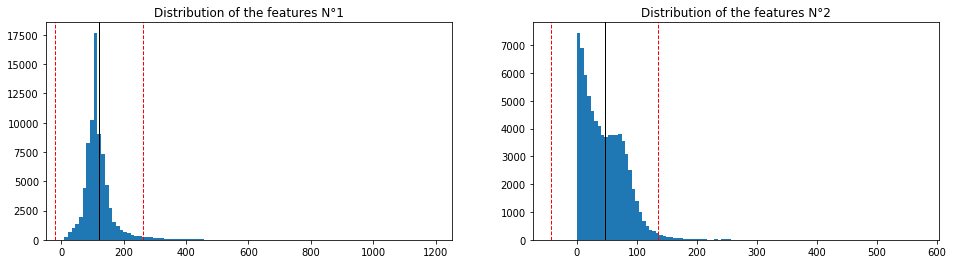

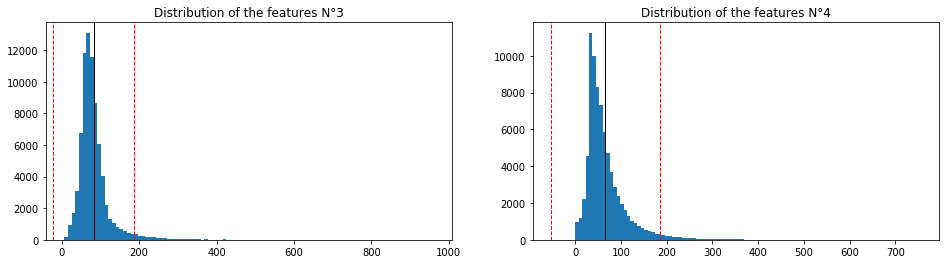

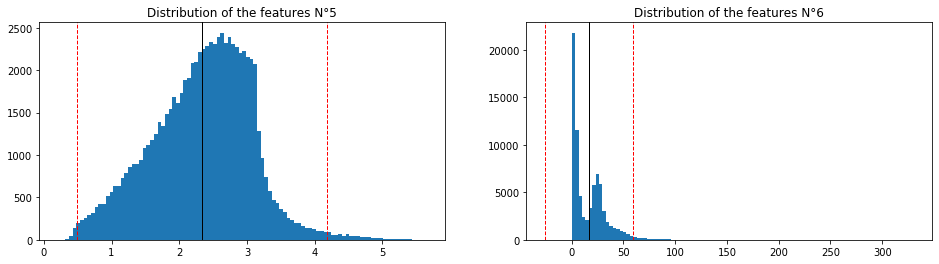

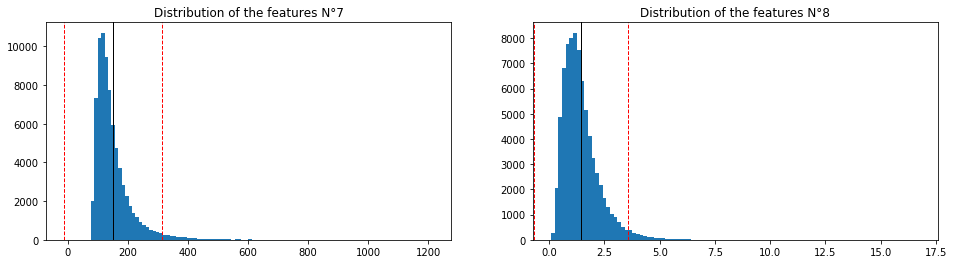

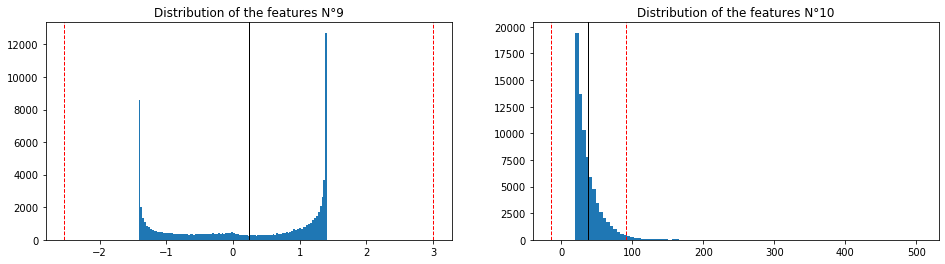

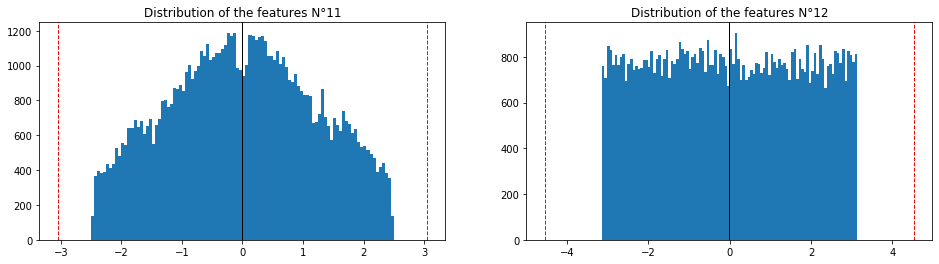

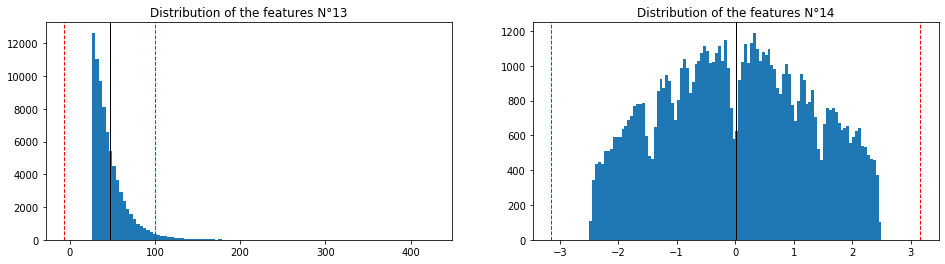

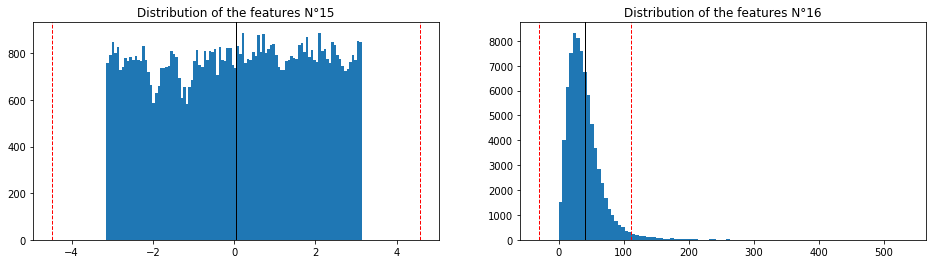

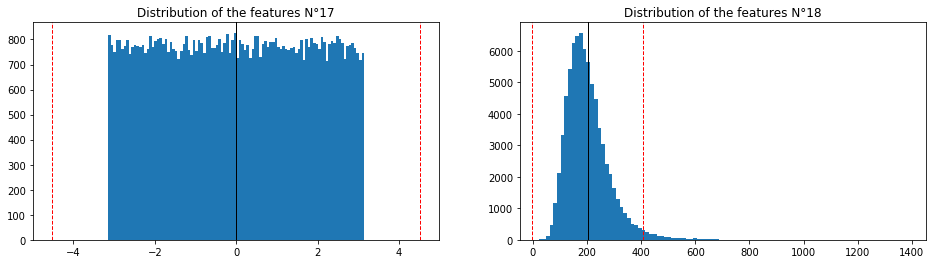

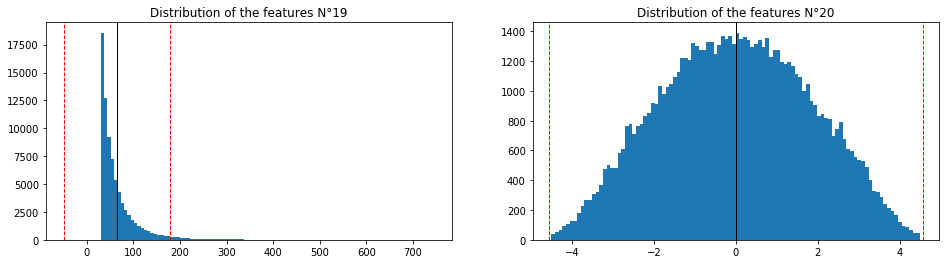

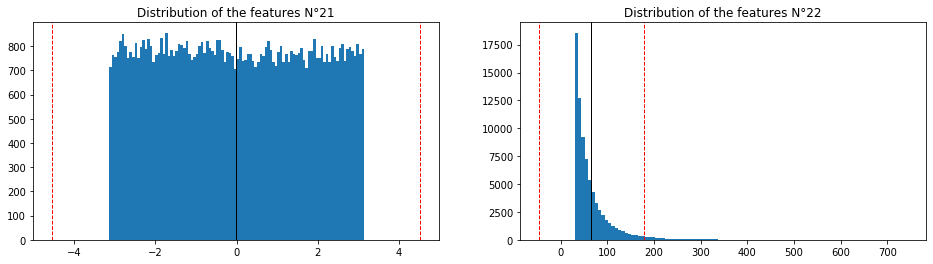

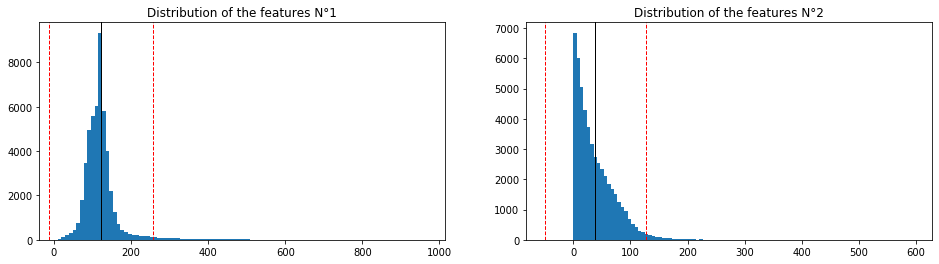

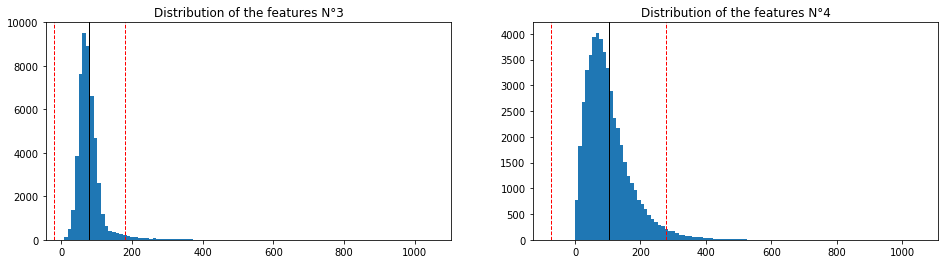

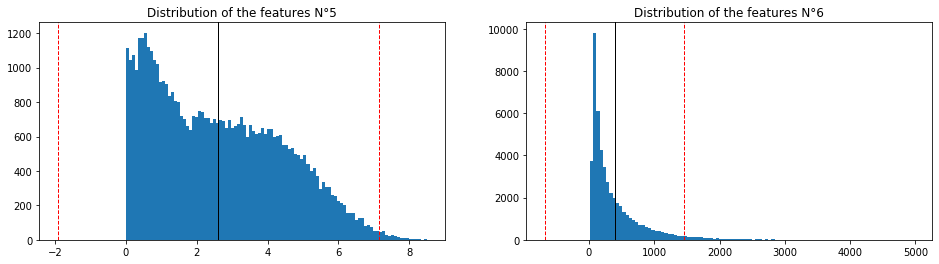

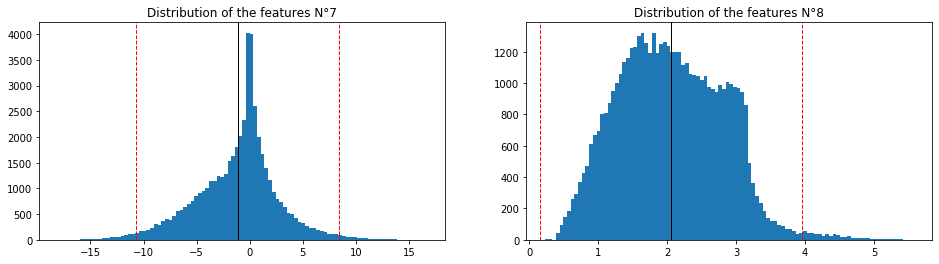

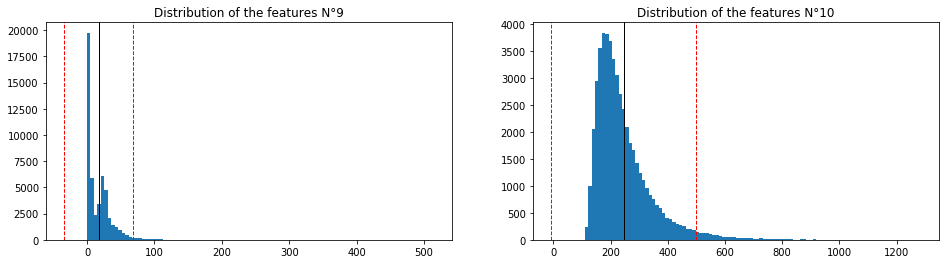

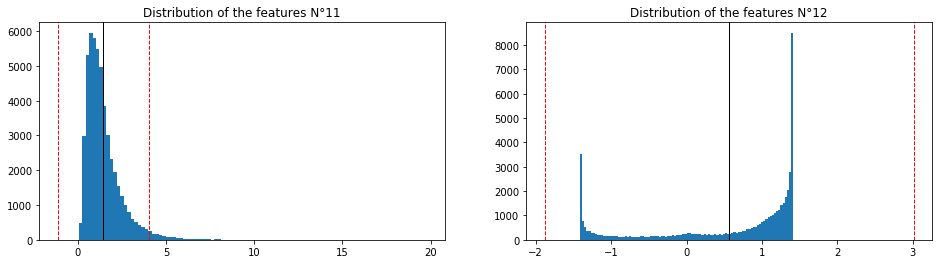

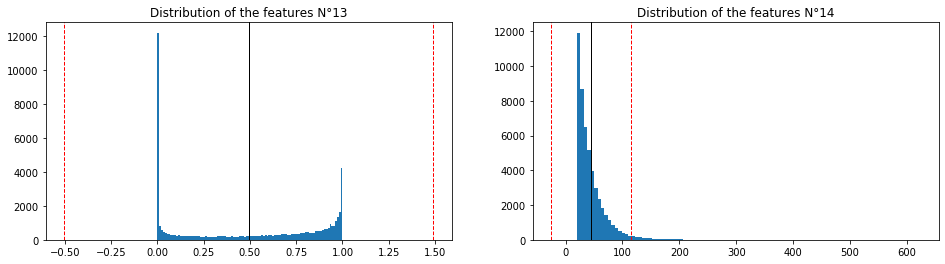

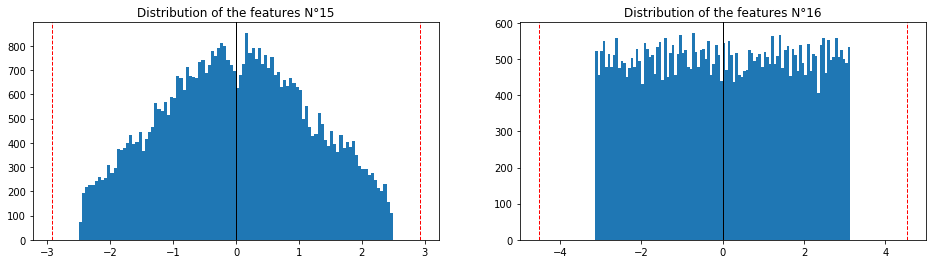

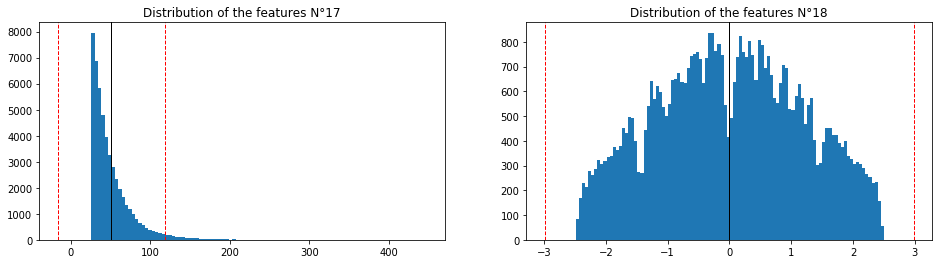

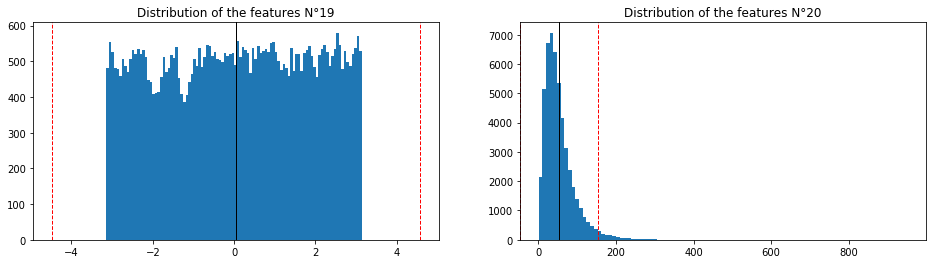

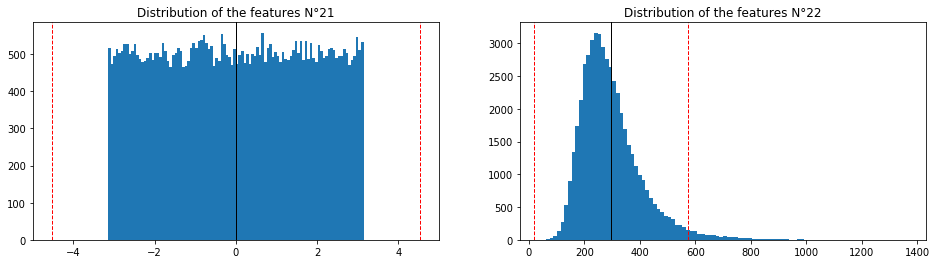

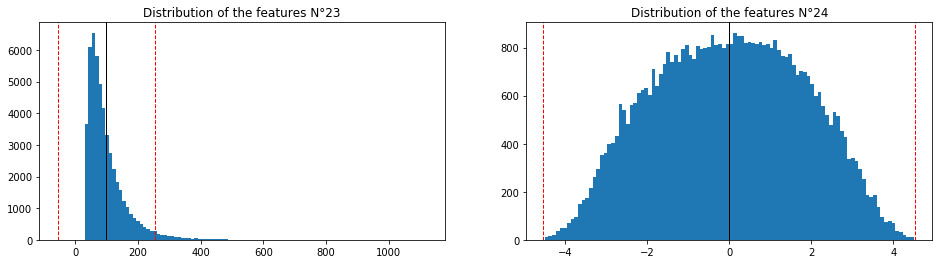

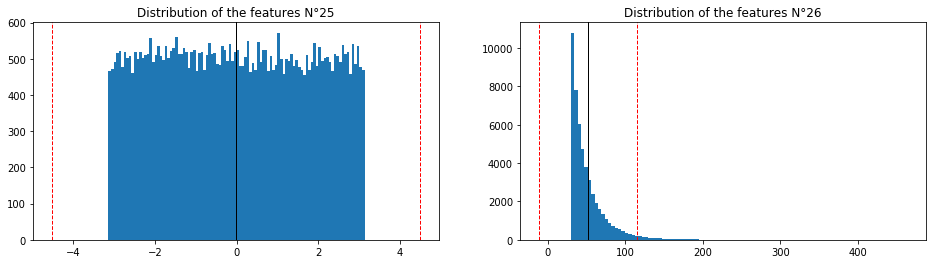

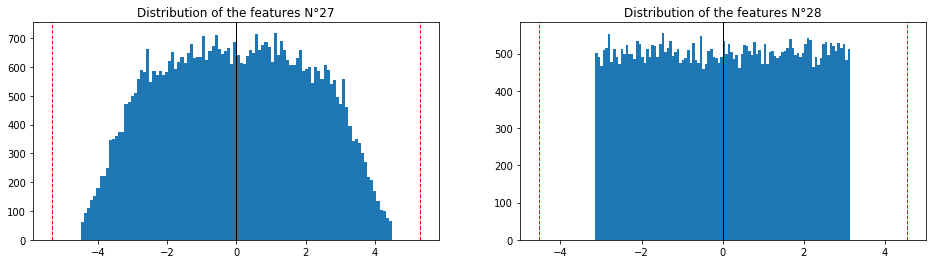

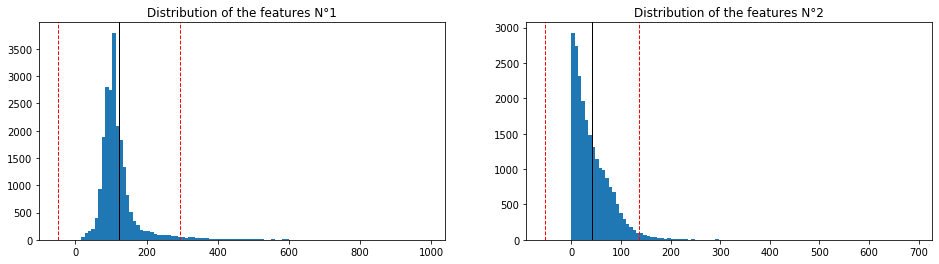

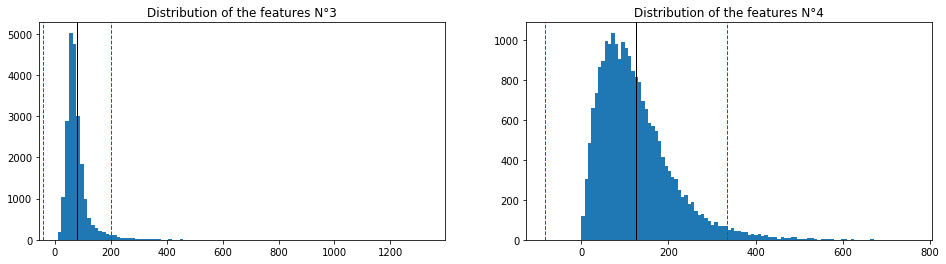

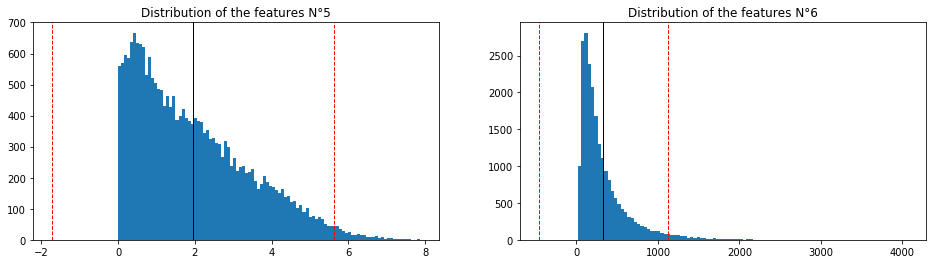

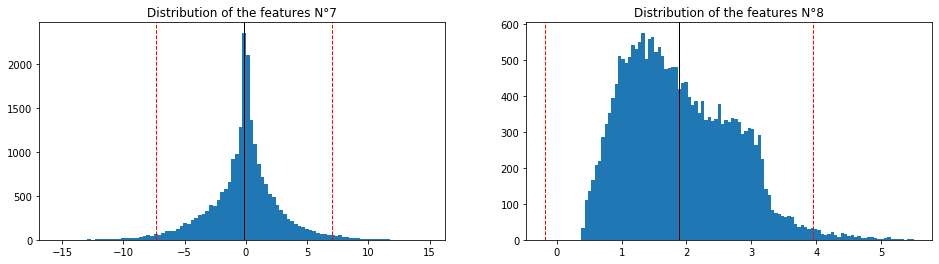

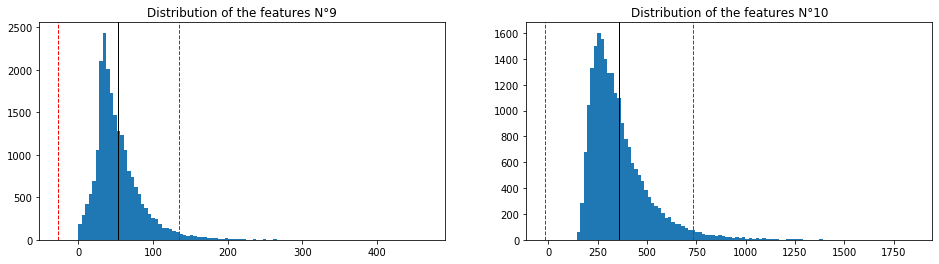

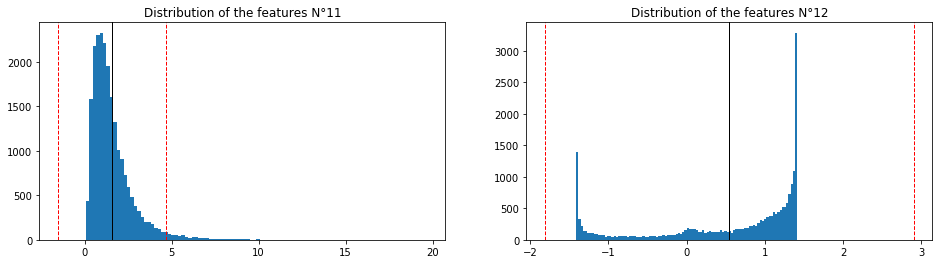

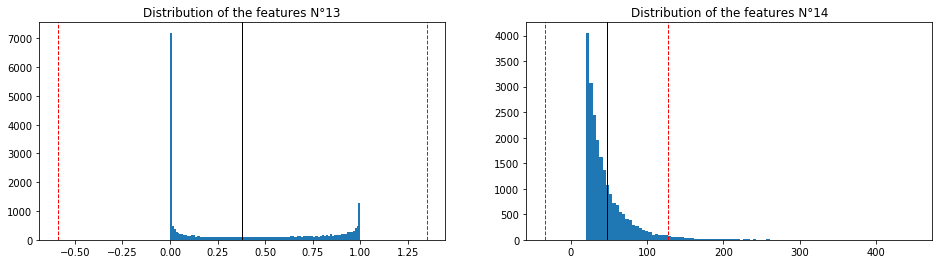

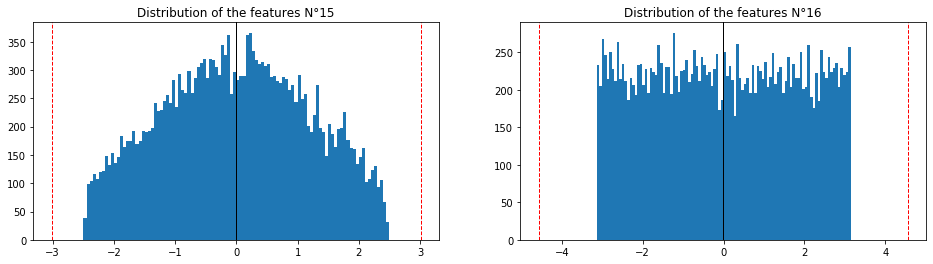

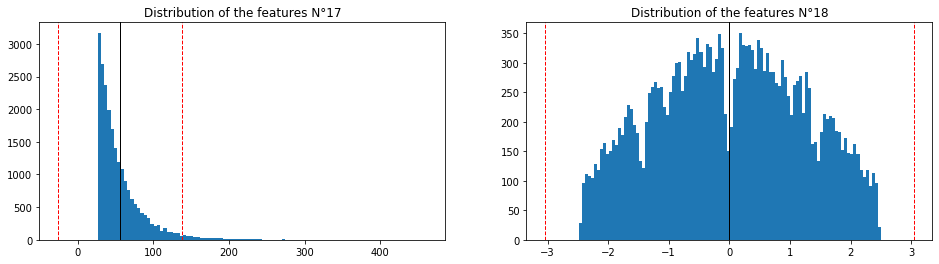

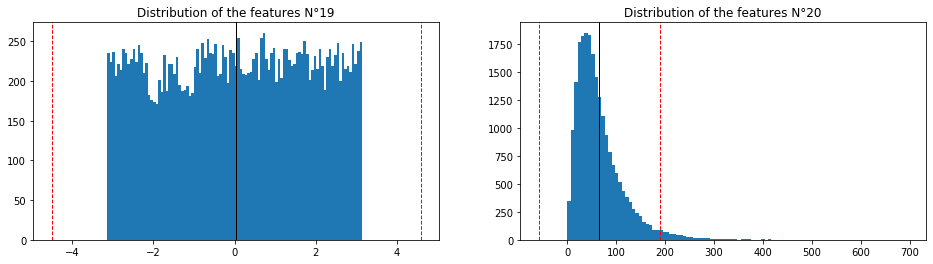

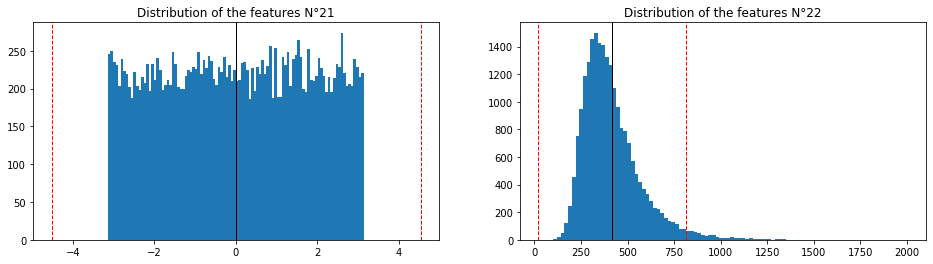

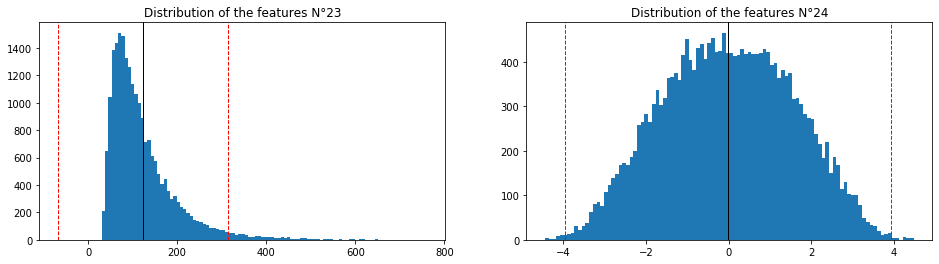

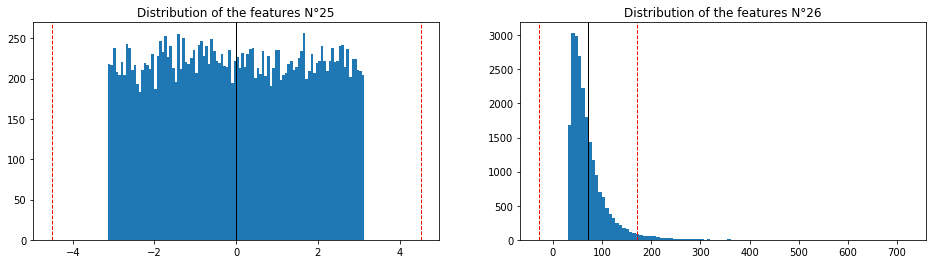

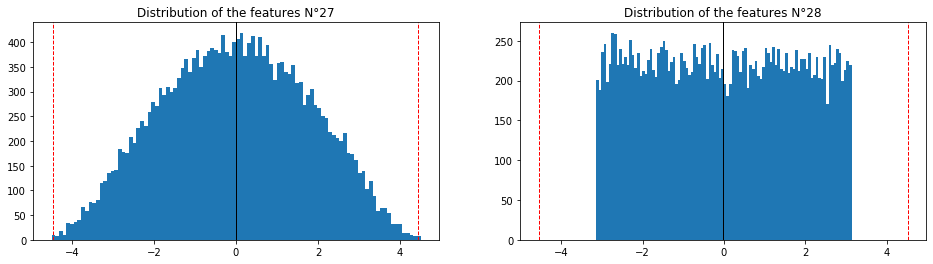

In [13]:
#Plotting histograms of the features
for i in range(0,np.size(ss0_tX,1)-1,2):
    histo_visualization(ss0_tX[:,i], ss0_tX[:,i+1],i, 2.5)

for i in range(0,np.size(ss1_tX,1)-1,2):
    histo_visualization(ss1_tX[:,i], ss1_tX[:,i+1],i, 2.5)
    
for i in range(0,np.size(ss2_tX,1)-1,2):
    histo_visualization(ss2_tX[:,i], ss2_tX[:,i+1],i, 2.5)
    
for i in range(0,np.size(ss3_tX,1)-1,2):
    histo_visualization(ss3_tX[:,i], ss3_tX[:,i+1],i, 2.5)

In [22]:
#Outliers
ss0_tX_outliers, ss0_y_outliers = outliers_suppresion(ss0_tX, ss0_y, 3)
ss1_tX_outliers, ss1_y_outliers = outliers_suppresion(ss1_tX, ss1_y, 3)
ss2_tX_outliers, ss2_y_outliers = outliers_suppresion(ss2_tX, ss2_y, 3)
ss3_tX_outliers, ss3_y_outliers = outliers_suppresion(ss3_tX, ss3_y, 3)

size of the dataset with (99913, 18) and without (94109, 18) the outliers
Number of sample suppressed ouside 3 std: 5804
size of the dataset with (77544, 22) and without (70577, 22) the outliers
Number of sample suppressed ouside 3 std: 6967
size of the dataset with (50379, 29) and without (43060, 29) the outliers
Number of sample suppressed ouside 3 std: 7319
size of the dataset with (22164, 29) and without (18922, 29) the outliers
Number of sample suppressed ouside 3 std: 3242


## Model selection and Optimisation

In [156]:
# Choosing the subset on which to test models
from implementations import * 
ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y, labels_feat = split_subsets(tX, y,labels_feature)


Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
Remaining features for subset 2, 3: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
Remaining features for subset 1: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi'
 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi' 'PRI_

In [157]:
ss_tX_outliers, ss_y_outliers = outliers_suppresion(ss1_tX, ss1_y, 3)
_, ss_tX_nocorrfeat, _, _, _ = remove_correlated_feat(ss0_tX, ss1_tX, ss2_tX, ss3_tX, labels_feat)
ss_tX_un, ss_y_un = replace_undef_feat(ss1_tX,ss1_y,method = 'median')

ss_tX = ss1_tX
ss_y = ss1_y 

size of the dataset with (77544, 22) and without (70839, 22) the outliers
Number of sample suppressed ouside 3 std: 6705
Deleted features for subset 0 : DER_pt_h
Deleted features for subset 1 : ['DER_pt_h' 'PRI_jet_leading_pt' 'PRI_jet_all_pt']
Deleted features for subset 2 : ['PRI_met_sumet' 'PRI_jet_leading_pt' 'PRI_jet_all_pt']
Deleted features for subset 3 : ['DER_sum_pt' 'PRI_met_sumet' 'PRI_jet_leading_pt']


## Ridge regression

In [165]:
# test 1 : degree 1 rmse, all features, not removal of outliers , undef  
# Using rmse with non equal classes

lambdas = np.logspace(-3, 0, 30) #avant-3 c'est constant
loss_tr1, loss_te1, w1, acc1 = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  3.10690809e-02 -2.18747209e-01 -2.44189959e-01
 -9.10337307e-02  2.36203300e-01  5.39884325e-02  1.24622063e-01
 -1.73080251e-01  1.40392389e-01  1.51625650e-01  3.42527923e-03
 -3.83143387e-03  2.18983965e-01 -6.05423775e-03 -1.84193769e-04
  8.30590475e-02  2.25966684e-03 -4.42380110e-02  5.43918947e-03
 -8.51833777e-04 -5.16214795e-03  5.44228323e-03]
Ridge regression: w=[-2.85121014e-01  3.00972027e-02 -2.18009707e-01 -2.42053735e-01
 -8.21976878e-02  2.34665477e-01  5.27407907e-02  1.19234911e-01
 -1.60975780e-01  1.42305540e-01  1.56359613e-01  4.84378005e-03
 -5.93283184e-03  2.10512538e-01 -7.54202480e-03  2.07768247e-03
  8.50566200e-02  4.23283567e-03 -4.07504305e-02 -1.33473168e-05
 -5.13301377e-04 -1.10463406e-03 -1.18026900e-05]
Ridge regression: w=[-0.28705164  

 -5.16777551e-04 -1.09260441e-03  1.88048394e-04]
Ridge regression: w=[-0.28614184  0.03514658 -0.21668612 -0.24198049 -0.08161129  0.23485605
  0.053548    0.11969545 -0.16214727  0.13964167  0.15645669  0.00871051
 -0.00311007  0.20683255 -0.01031506  0.00136143  0.08973798  0.00488465
 -0.04325275  0.00254004 -0.0015554  -0.00075685  0.00254133]
Ridge regression: w=[-2.82196607e-01  3.26561981e-02 -2.18308870e-01 -2.45869836e-01
 -7.63857102e-02  2.38598230e-01  5.13046302e-02  1.20561910e-01
 -1.64122310e-01  1.36129310e-01  1.58387027e-01  9.35344803e-04
 -3.12869758e-03  2.12981001e-01 -8.76034156e-03 -4.44977999e-04
  8.35126937e-02  3.11040562e-03 -3.89291341e-02 -7.81974367e-04
 -2.33718601e-04 -1.68204108e-03 -7.79933306e-04]
Ridge regression: w=[-0.28251736  0.03261786 -0.21682623 -0.23555317 -0.09090855  0.23135578
  0.05613022  0.11887965 -0.15854255  0.14344501  0.15546934  0.00250337
 -0.00160944  0.19923136 -0.00628169  0.00203552  0.08448948  0.0062128
 -0.03549538  0.

Ridge regression: w=[-2.80739687e-01  3.22480791e-02 -2.11360473e-01 -2.19519404e-01
 -7.85535218e-02  2.18090241e-01  5.28653492e-02  1.15162697e-01
 -1.54579865e-01  1.39248672e-01  1.50764876e-01  3.30987082e-03
 -3.95294166e-03  1.89811250e-01 -6.04540430e-03 -1.41426619e-04
  7.48905486e-02  2.30866237e-03 -4.01095770e-02  5.97521866e-03
 -8.41347820e-04 -5.04577985e-03  5.97557412e-03]
Ridge regression: w=[-0.28089819  0.03140817 -0.21050626 -0.21764818 -0.07079133  0.21665776
  0.05157824  0.11018503 -0.14360584  0.14107479  0.15488039  0.00454766
 -0.00605797  0.18215868 -0.00736549  0.00204436  0.07688436  0.00421968
 -0.03666409  0.00097014 -0.00052526 -0.00104719  0.00097032]
Ridge regression: w=[-0.28280022  0.03597998 -0.21076087 -0.22283356 -0.07240586  0.2207563
  0.05258739  0.11258771 -0.14845408  0.13876246  0.15532965  0.00851488
 -0.00320849  0.18467337 -0.01020123  0.00127711  0.08305687  0.00485904
 -0.04000599  0.00324938 -0.00160166 -0.00078053  0.00324977]
Ridg

Ridge regression: w=[-2.70351355e-01  3.46434745e-02 -1.95688457e-01 -1.73241073e-01
 -5.54184553e-02  1.83774976e-01  5.00007703e-02  9.75108336e-02
 -1.26105861e-01  1.35834223e-01  1.43721501e-01  3.03379096e-03
 -4.12575521e-03  1.39074816e-01 -5.97186750e-03 -1.56595672e-05
  5.83498523e-02  2.40794195e-03 -3.12274553e-02  7.78905821e-03
 -8.02926518e-04 -4.76691104e-03  7.78916222e-03]
Ridge regression: w=[-0.27050399  0.03403129 -0.19464049 -0.17189848 -0.04954957  0.18257168
  0.04869143  0.09331377 -0.11723964  0.13746376  0.14671185  0.00391499
 -0.00622833  0.13298706 -0.00696507  0.00201305  0.06029153  0.00417571
 -0.02795947  0.00361009 -0.00052707 -0.00090464  0.00361014]
Ridge regression: w=[-0.27233564  0.03812022 -0.19472659 -0.176189   -0.05032221  0.18605504
  0.04956526  0.09540881 -0.12105512  0.13545198  0.14743384  0.00790414
 -0.0034106   0.13461536 -0.00979742  0.00110929  0.06562266  0.00477231
 -0.03104987  0.00572183 -0.00167385 -0.00080678  0.00572194]
Rid

Ridge regression: w=[-2.47612803e-01  4.00164637e-02 -1.71539308e-01 -1.18001534e-01
 -2.35171006e-02  1.40746088e-01  4.16317685e-02  7.42344940e-02
 -9.64267607e-02  1.24994543e-01  1.29232002e-01 -4.08174775e-04
 -3.49395313e-03  8.12580635e-02 -7.64110023e-03 -4.36962453e-05
  3.80842717e-02  3.28408558e-03 -1.36916977e-02  8.32632084e-03
 -5.05377455e-04 -9.71583673e-04  8.32639523e-03]
Ridge regression: w=[-0.24789425  0.03964276 -0.17091997 -0.11493175 -0.02701601  0.13927439
  0.04654577  0.07277756 -0.0945903   0.12962032  0.12717912  0.00147967
 -0.00240337  0.07349478 -0.00574427  0.00158133  0.03746274  0.00576978
 -0.01228076  0.01171421 -0.00141233 -0.00149523  0.01171426]
Accuracy = [0.711439257157596, 0.7149213309259737, 0.7079571833892184, 0.7169202992004127, 0.7084085633221563]
Ridge regression: w=[-0.24100769  0.03970494 -0.16360145 -0.09901916 -0.02037047  0.12592857
  0.04212042  0.0689518  -0.09304684  0.12464374  0.11871493  0.00228803
 -0.00414668  0.06596021 -0

Ridge regression: w=[-0.19447242  0.04578847 -0.12719439 -0.04728481  0.00490977  0.07822468
  0.03047405  0.04609312 -0.07149229  0.10506619  0.0890905   0.00406347
 -0.00326267  0.01636065 -0.0065207   0.00090809  0.01262114  0.00387409
  0.00300612  0.01737396 -0.00136307 -0.00061669  0.01737397]
Ridge regression: w=[-0.19179109  0.04499407 -0.12771018 -0.04744711  0.00447612  0.07806703
  0.02886389  0.04645014 -0.071792    0.10294403  0.09016211 -0.00133647
 -0.00321433  0.01859711 -0.00603825  0.00026568  0.00984691  0.00314077
  0.00514048  0.01615014 -0.00059843 -0.00044422  0.01615016]
Ridge regression: w=[-0.19200909  0.04488292 -0.12834144 -0.04697775  0.00338861  0.07779252
  0.03278259  0.04552049 -0.07137544  0.10614289  0.08909025  0.00039248
 -0.00245042  0.01419375 -0.00463205  0.00136248  0.00996716  0.00484867
  0.00594154  0.01793138 -0.00133984 -0.00120601  0.01793139]
Accuracy = [0.7107299458344081, 0.7151147794686613, 0.7033789012122775, 0.7169202992004127, 0.705

Ridge regression: w=[-0.11165194  0.03978491 -0.08012754 -0.01357633  0.01604806  0.03325455
  0.01538485  0.02776102 -0.04892772  0.06893442  0.05290957  0.00144235
 -0.00220455 -0.00794935 -0.00365535  0.00079487  0.00025562  0.00254118
  0.01325764  0.01917795 -0.00081395 -0.00040342  0.01917795]
Ridge regression: w=[-0.11011252  0.03940075 -0.08006679 -0.01343858  0.01564395  0.03309801
  0.01438117  0.02790189 -0.04901501  0.06763156  0.05352662 -0.0015255
 -0.00219229 -0.00695146 -0.00378438  0.00033798 -0.00153212  0.00233179
  0.01400279  0.01859381 -0.00055714 -0.00014936  0.01859382]
Ridge regression: w=[-0.11023768  0.0395131  -0.08103096 -0.01384056  0.01538442  0.03294808
  0.0165449   0.02740063 -0.04921658  0.0694637   0.05320073 -0.0004258
 -0.00173048 -0.00910507 -0.002943    0.00103025 -0.00098724  0.00314281
  0.0144976   0.01930791 -0.00095276 -0.00080304  0.01930792]
Accuracy = [0.7039592468403405, 0.7095047717307196, 0.6991875161207118, 0.7109233943770957, 0.70047

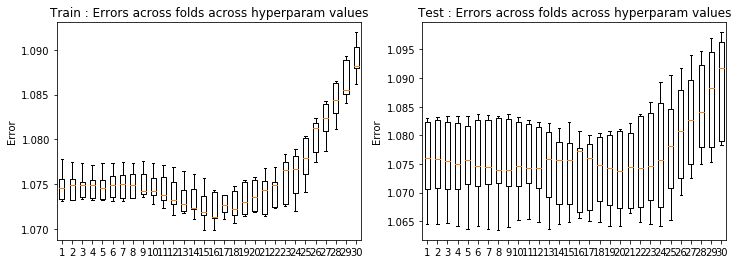

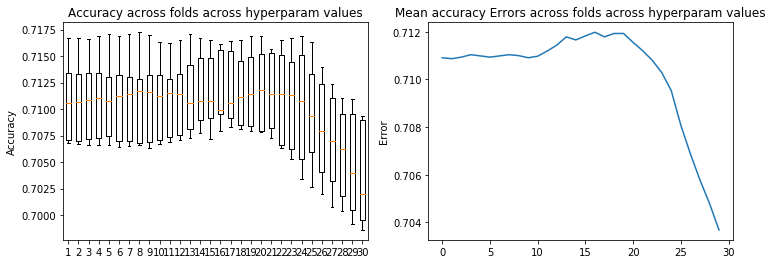

In [195]:
from implementations import * 
result_crossval(loss_tr1,loss_te1) #avec undefinde
result_crossval_accuracy(acc1)


In [196]:
# test 2 : degree 2 rmse, all features, not removal of outliers, undef  
lambdas = np.logspace(-8, 0, 30) #de -15 a -10 c'est constant
loss_tr2, loss_te2, w1, acc2 = cross_validation_demo(ss_y, ss_tX, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr',hyperparams=[lambdas])

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.85530043e-01  9.10480010e-02 -2.84356556e-01 -2.23865337e-01
 -1.04155192e-01  7.11544739e-01  2.62057979e-02 -7.50775561e-01
 -1.59065324e-01  9.87073020e-02  5.72667864e-01  1.99833929e-03
 -3.00127541e-03  5.08003962e-01 -9.29614702e-04 -2.45176034e-03
  5.50791531e-02  3.77063503e-03  6.30874723e-02  2.84443212e-01
 -2.22030322e-03 -3.90262637e-03  4.67581520e-01  6.30619986e-02
  1.34867011e-01  5.81753701e-02  1.89177162e-01 -5.03089584e-01
  8.06802411e-03  2.62141517e-01  9.89821271e-02  2.09149688e-02
 -2.48222558e-01 -3.63409066e-02 -7.05490313e-04 -2.39797451e-01
 -6.90840796e-02  6.77699073e-03 -1.45642020e-02 -1.82674039e-04
 -1.19043872e-01 -2.17242034e-01  1.60866004e-01  2.29451596e-03
 -1.49737990e-01]
Ridge regression: w=[-2.85691250e-01  8.40366622e-02 -2.81101761e-01 -2

Ridge regression: w=[-2.85691236e-01  8.40359645e-02 -2.81101677e-01 -2.15370167e-01
 -9.93795686e-02  7.24900730e-01  2.16249747e-02 -1.90497457e-02
 -1.25857545e-01  1.01007397e-01  3.54304281e-01  4.92350531e-03
 -4.97439717e-03  2.49174585e-01 -4.01547962e-03 -2.24822685e-04
  5.70521979e-02  4.85142667e-03  5.67367733e-02  1.08831573e-01
 -1.10794435e-03 -7.39061731e-04  1.35032736e-01  5.86722008e-02
  1.33133502e-01  6.10557027e-02  1.92526390e-01 -5.22208842e-01
  1.17899580e-02  2.40282673e-01  8.34952424e-02  2.13758585e-02
 -2.54205731e-01 -4.17906497e-02 -2.21400596e-03 -2.30257367e-01
 -6.86141332e-02  5.06647842e-03 -1.33936673e-02 -3.34516162e-03
 -1.03272779e-01 -2.06149514e-01  1.60460181e-01 -3.55186874e-04
 -1.62406513e-01]
Ridge regression: w=[-2.87625721e-01  7.98658811e-02 -2.75857397e-01 -2.34460000e-01
 -1.01129082e-01  7.22368593e-01  2.92203171e-02 -3.36016432e-02
 -1.13060592e-01  9.77283594e-02  3.92767394e-01  7.99811176e-03
 -1.77814922e-03  2.39740815e-01

Ridge regression: w=[-2.87625669e-01  7.98633127e-02 -2.75857181e-01 -2.34457266e-01
 -1.01125614e-01  7.22361157e-01  2.92206341e-02  1.28620125e-01
 -1.13061023e-01  9.77285165e-02  3.40566302e-01  7.99814064e-03
 -1.77815962e-03  1.86729356e-01 -6.46802929e-03  1.16280509e-04
  6.20309661e-02  4.77452677e-03  6.77050934e-02  6.14590133e-02
 -1.82497803e-03 -5.79226047e-04  8.24115597e-02  5.27630324e-02
  1.29838490e-01  6.83076291e-02  2.02757738e-01 -5.06373481e-01
  4.27458194e-03  2.61581303e-01  7.51692056e-02  2.07173934e-02
 -2.78583460e-01 -4.01483341e-02  3.30590155e-03 -2.23336230e-01
 -6.71568774e-02  3.68116560e-03 -1.72391937e-02 -8.75932436e-04
 -1.25320201e-01 -1.95684317e-01  1.59576522e-01  2.39725631e-03
 -1.82938414e-01]
Ridge regression: w=[-2.83659974e-01  7.83760763e-02 -2.81835453e-01 -2.18682071e-01
 -7.43534976e-02  7.15125005e-01  3.23410680e-02  1.88836408e-01
 -1.29979075e-01  9.46485321e-02  2.77387710e-01 -2.06631009e-04
 -1.91524829e-03  1.82584207e-01

Ridge regression: w=[-2.83659790e-01  7.83665132e-02 -2.81834428e-01 -2.18673042e-01
 -7.43440643e-02  7.15099361e-01  3.23420619e-02  1.83375971e-01
 -1.29978936e-01  9.46492714e-02  2.79152797e-01 -2.06523011e-04
 -1.91527455e-03  1.84372028e-01 -3.31925848e-03 -1.26106070e-03
  5.42669288e-02  4.08156590e-03  5.89666493e-02  3.74658163e-02
 -1.07110072e-03 -7.42705449e-04  4.77923319e-02  5.04726695e-02
  1.37045474e-01  5.07897986e-02  1.56577515e-01 -5.03692956e-01
 -6.82516733e-04  2.44202022e-01  7.48720689e-02  2.22757350e-02
 -2.42093769e-01 -4.12115144e-02  1.42711480e-03 -2.22968435e-01
 -6.52160287e-02  4.59545149e-04 -1.60896293e-02 -4.43630743e-04
 -1.09631097e-01 -1.67278210e-01  1.58560010e-01  2.88242190e-03
 -1.60928290e-01]
Ridge regression: w=[-2.83982204e-01  7.42918288e-02 -2.74532303e-01 -2.08077059e-01
 -9.92361239e-02  7.21943476e-01  3.19292991e-02  1.61500710e-01
 -1.64248347e-01  1.01573596e-01  2.83168345e-01  9.56987135e-04
 -1.22151838e-03  2.24876401e-01

Ridge regression: w=[-2.83981546e-01  7.42577509e-02 -2.74529963e-01 -2.08039941e-01
 -9.91964452e-02  7.21847688e-01  3.19335577e-02  1.82460692e-01
 -1.64231429e-01  1.01576135e-01  2.76486123e-01  9.57375707e-04
 -1.22160881e-03  2.17979830e-01 -1.73230082e-03  7.00766209e-04
  6.40661288e-02  6.78841691e-03  7.17947378e-02  4.89480915e-02
 -1.08024039e-03 -1.13867296e-03  5.09757990e-02  4.77040530e-02
  1.24155672e-01  4.98139433e-02  1.74318359e-01 -5.17090556e-01
  4.88229907e-03  2.12353484e-01  1.14888465e-01  2.31756536e-02
 -2.39101006e-01 -3.99229258e-02 -2.01160844e-03 -2.56256158e-01
 -6.63308530e-02 -5.49030390e-04 -2.57149949e-02 -2.23752158e-03
 -1.22824285e-01 -1.54982361e-01  1.58458283e-01 -2.17816505e-03
 -1.53590971e-01]
Accuracy = [0.7507093113231881, 0.7576089760123808, 0.748581377353624, 0.7574800103172556, 0.7504513799329379]
Ridge regression: w=[-2.85528313e-01  9.09457252e-02 -2.84349996e-01 -2.23771132e-01
 -1.04046476e-01  7.11297176e-01  2.62170359e-02  1

Ridge regression: w=[-2.85523867e-01  9.06829787e-02 -2.84333003e-01 -2.23528955e-01
 -1.03769036e-01  7.10661339e-01  2.62457098e-02  1.87339198e-01
 -1.59010403e-01  9.87316813e-02  2.68656369e-01  2.00216524e-03
 -3.00261918e-03  2.00524276e-01 -9.33248211e-04 -2.45128959e-03
  5.51423645e-02  3.76918518e-03  6.29140360e-02  5.18296231e-02
 -2.22108415e-03 -3.90174574e-03  5.19987712e-02  6.26927320e-02
  1.34813794e-01  5.79012491e-02  1.88372131e-01 -5.02282692e-01
  8.03896622e-03  2.60407869e-01  9.88207624e-02  2.09393132e-02
 -2.47674422e-01 -3.63502859e-02 -7.06172892e-04 -2.39144928e-01
 -6.90958639e-02  6.77617901e-03 -1.47066526e-02 -1.83854065e-04
 -1.18838065e-01 -1.82608147e-01  1.60868309e-01  2.29492551e-03
 -1.82545808e-01]
Ridge regression: w=[-2.85685070e-01  8.37224745e-02 -2.81067408e-01 -2.15065202e-01
 -9.89821521e-02  7.24027927e-01  2.16653315e-02  1.86509506e-01
 -1.25864035e-01  1.01028322e-01  2.87800139e-01  4.92645861e-03
 -4.97574790e-03  1.81973311e-01

Ridge regression: w=[-2.85669222e-01  8.29252643e-02 -2.80979748e-01 -2.14284114e-01
 -9.79759649e-02  7.21794916e-01  2.17676352e-02  1.86767352e-01
 -1.25875881e-01  1.01082144e-01  2.87445616e-01  4.93397712e-03
 -4.97919426e-03  1.81698156e-01 -4.02822516e-03 -2.20514658e-04
  5.71823047e-02  4.84898659e-03  5.61010729e-02  5.04261520e-02
 -1.11064257e-03 -7.39248460e-04  5.04503208e-02  5.75412259e-02
  1.32900050e-01  6.01317488e-02  1.89672095e-01 -5.19352621e-01
  1.16796169e-02  2.34739627e-01  8.30702443e-02  2.14578538e-02
 -2.52390666e-01 -4.18283133e-02 -2.21035864e-03 -2.28198781e-01
 -6.86550980e-02  5.07321721e-03 -1.37571713e-02 -3.34631483e-03
 -1.02501539e-01 -1.81294305e-01  1.60466542e-01 -3.47565942e-04
 -1.81253991e-01]
Ridge regression: w=[-2.87603558e-01  7.87892722e-02 -2.75760902e-01 -2.33302295e-01
 -9.96933136e-02  7.19242564e-01  2.93490339e-02  1.91441090e-01
 -1.13234061e-01  9.77986676e-02  3.19762840e-01  8.00966565e-03
 -1.78254480e-03  1.66063692e-01

Ridge regression: w=[-2.87546734e-01  7.61413718e-02 -2.75513909e-01 -2.30374920e-01
 -9.61943582e-02  7.11362326e-01  2.96638077e-02  1.90744966e-01
 -1.13619529e-01  9.79788785e-02  3.18502209e-01  8.03856669e-03
 -1.79374278e-03  1.65864396e-01 -6.52124174e-03  1.14248483e-04
  6.25266437e-02  4.76821992e-03  6.53477595e-02  4.90959563e-02
 -1.84189541e-03 -5.78811512e-04  4.91153375e-02  4.89638200e-02
  1.29111396e-01  6.48294461e-02  1.92684688e-01 -4.96359436e-01
  3.98500449e-03  2.41528838e-01  7.37061431e-02  2.10219898e-02
 -2.71850076e-01 -4.02816499e-02  3.29639718e-03 -2.15956870e-01
 -6.73012613e-02  3.68456371e-03 -1.86788682e-02 -8.93937288e-04
 -1.22439064e-01 -1.78518823e-01  1.59608335e-01  2.40647831e-03
 -1.78507089e-01]
Ridge regression: w=[-2.83582128e-01  7.44998416e-02 -2.81408926e-01 -2.14922699e-01
 -7.05764891e-02  7.04487046e-01  3.27398105e-02  1.80370396e-01
 -1.29851865e-01  9.49580490e-02  2.78933946e-01 -1.62226430e-04
 -1.92661675e-03  1.84342823e-01

Ridge regression: w=[-2.83382677e-01  6.58666043e-02 -2.80357779e-01 -2.05755463e-01
 -6.24750389e-02  6.78813153e-01  3.35982332e-02  1.78102123e-01
 -1.29066555e-01  9.57238643e-02  2.76802071e-01 -5.90822210e-05
 -1.95685150e-03  1.81862171e-01 -3.51446622e-03 -1.22077982e-03
  5.57301722e-02  4.05556017e-03  5.34027759e-02  4.17548543e-02
 -1.12788613e-03 -7.15192249e-04  4.17644211e-02  3.75703491e-02
  1.34079650e-01  4.01227751e-02  1.30646063e-01 -4.70696743e-01
 -1.62899155e-03  1.87896212e-01  6.97791306e-02  2.32379313e-02
 -2.22943904e-01 -4.16144723e-02  1.37833753e-03 -2.00123881e-01
 -6.57291313e-02  4.48291910e-04 -1.90397213e-02 -5.28835165e-04
 -1.03009290e-01 -1.35697602e-01  1.58633624e-01  2.89553166e-03
 -1.35691713e-01]
Ridge regression: w=[-2.83704776e-01  6.17791210e-02 -2.73528127e-01 -1.93305196e-01
 -8.52936387e-02  6.83929695e-01  3.34322214e-02  1.86181405e-01
 -1.57390020e-01  1.02607007e-01  2.74290304e-01  1.10793734e-03
 -1.26045693e-03  2.06301231e-01

Ridge regression: w=[-2.82995751e-01  4.15916300e-02 -2.70850633e-01 -1.62588901e-01
 -6.44339479e-02  6.04586707e-01  3.56253007e-02  1.76876884e-01
 -1.43400716e-01  1.04806766e-01  2.72705903e-01  1.40737573e-03
 -1.35499122e-03  1.85542389e-01 -2.22944044e-03  8.05849120e-04
  6.66444083e-02  6.68356927e-03  5.38221847e-02  4.18955682e-02
 -1.20771962e-03 -1.07630970e-03  4.18973990e-02  1.26237570e-02
  1.15487192e-01  1.34993661e-02  9.32191315e-02 -4.13429754e-01
  1.83126831e-03  9.48405162e-02  9.02042851e-02  2.71719434e-02
 -2.00341408e-01 -4.13883671e-02 -1.94164859e-03 -1.88036575e-01
 -6.79696253e-02 -4.39286619e-04 -2.69612160e-02 -2.31735576e-03
 -1.00894470e-01 -8.63605785e-02  1.58676291e-01 -1.93937412e-03
 -8.63593621e-02]
Accuracy = [0.7482589631158112, 0.7570286303843178, 0.7481944802682486, 0.7559324219757545, 0.7494841372194996]
Ridge regression: w=[-2.83663349e-01  3.79975342e-02 -2.76327539e-01 -1.51962365e-01
 -5.28062025e-02  5.24171421e-01  3.15557377e-02  

Ridge regression: w=[-0.27898995  0.01850242 -0.25627971 -0.07972757 -0.02481447  0.33272546
  0.03222131  0.14185981 -0.11543232  0.10906879  0.22884529  0.00334775
 -0.00344602  0.11609582 -0.00246223 -0.00194528  0.05661157  0.0032188
  0.02970442  0.04296818 -0.00244418 -0.00331257  0.04296833 -0.01895979
  0.09212559 -0.05782249  0.00197158 -0.17446606  0.00390839  0.00854163
  0.04167027  0.03489222 -0.12364575 -0.04119415 -0.00117839 -0.06332998
 -0.07395591  0.00592507 -0.00559995 -0.00046788 -0.07645576 -0.04066364
  0.16028657  0.00212661 -0.04066358]
Ridge regression: w=[-2.79147468e-01  1.93021533e-02 -2.52739256e-01 -7.68812112e-02
 -1.88293874e-02  3.40451739e-01  2.79781324e-02  1.39304769e-01
 -1.05499098e-01  1.10772968e-01  2.34904774e-01  5.83453040e-03
 -5.50665148e-03  1.10066782e-01 -5.31442098e-03  3.92146366e-04
  5.59588528e-02  4.56823154e-03  2.86664014e-02  3.97681391e-02
 -1.33315263e-03 -4.87719626e-04  3.97682032e-02 -1.61370541e-02
  8.99843030e-02 -5.36

Ridge regression: w=[-2.65458282e-01  2.14047643e-02 -2.05163648e-01 -2.75253506e-02
  6.81532838e-03  1.75975338e-01  2.87909479e-02  1.06835306e-01
 -9.78439497e-02  1.09524617e-01  1.75822999e-01  8.47467867e-03
 -2.54136879e-03  6.31810115e-02 -7.97972109e-03  3.80738973e-04
  4.39884441e-02  4.52503493e-03  2.31344327e-02  4.25929969e-02
 -2.27429645e-03 -1.86368020e-04  4.25930640e-02 -2.52022644e-02
  4.68314227e-02 -9.00772453e-02 -2.63371649e-02 -4.83815949e-02
  6.24342336e-03 -1.14728846e-02  1.40591233e-02  4.37903506e-02
 -6.71119226e-02 -4.79021727e-02  2.40196659e-03 -1.33159282e-03
 -7.28631629e-02  2.65324715e-03  1.59556932e-02 -1.16628764e-03
 -5.74147358e-02 -3.38417124e-02  1.52592967e-01  1.99431335e-03
 -3.38416725e-02]
Ridge regression: w=[-2.61798225e-01  1.87339307e-02 -2.07729514e-01 -2.68541026e-02
  8.16070524e-03  1.77485827e-01  2.97951545e-02  1.05955210e-01
 -9.49594217e-02  1.07993033e-01  1.74784694e-01  1.01530924e-03
 -2.69788949e-03  6.57156388e-02

Ridge regression: w=[-2.18873938e-01  2.63657060e-02 -1.40786366e-01 -3.06719643e-03
  1.87479617e-02  8.73234690e-02  2.26283310e-02  6.76740911e-02
 -7.37964455e-02  1.03451514e-01  1.12708975e-01  1.64939575e-03
 -1.85133403e-03  2.41377658e-02 -3.96713702e-03  1.23855346e-03
  2.25464027e-02  5.46256575e-03  2.01212608e-02  3.42723642e-02
 -1.38845834e-03 -7.62495938e-04  3.42723855e-02 -2.95430251e-02
  4.55656082e-03 -7.49653924e-02 -2.09394031e-02 -8.74677878e-04
  1.27926400e-02 -8.49354361e-03 -1.69745502e-03  5.09583373e-02
 -2.18933718e-02 -4.58575960e-02 -1.11932221e-03  8.30179660e-03
 -6.62215098e-02  4.01635626e-05  1.22149900e-02 -1.55053054e-03
 -2.78555084e-02 -2.06090013e-02  1.28165349e-01 -4.84075853e-04
 -2.06089856e-02]
Accuracy = [0.7371679133350528, 0.7418751612071189, 0.7337503224142378, 0.7437451637864329, 0.7383286045911788]
Ridge regression: w=[-1.82862906e-01  2.83970427e-02 -1.09438097e-01 -2.65982876e-03
  1.93398597e-02  5.92712489e-02  1.66321706e-02  

Ridge regression: w=[-9.52304187e-02  2.64439004e-02 -6.00002210e-02 -1.71433315e-03
  1.54581901e-02  2.44182490e-02  9.48101585e-03  2.38434214e-02
 -3.56163031e-02  5.63298663e-02  4.18469562e-02  2.64069710e-04
 -2.78387692e-03 -3.39441616e-03 -2.28291968e-03  1.12786533e-03
  1.52178627e-03  2.14860350e-03  1.27960757e-02  1.65455942e-02
 -4.14903951e-04  4.43175987e-05  1.65455955e-02 -2.65942946e-02
 -2.16775223e-02 -2.26584245e-02  1.97540322e-03  5.84460703e-03
  8.41644248e-03  4.97936673e-03 -1.55086147e-02  3.11826323e-02
  8.73511109e-03 -2.67865165e-02 -9.11574455e-04 -2.94121340e-03
 -3.53515397e-02  1.62804283e-03  1.64807624e-03 -1.14129811e-03
  9.13579419e-04  1.13010020e-03  5.72948763e-02 -2.44726577e-04
  1.13010263e-03]
Ridge regression: w=[-0.09587525  0.02713751 -0.06025595 -0.00215348  0.01601475  0.0246156
  0.00986899  0.02438001 -0.03635055  0.05617834  0.04197973  0.00134402
 -0.00161456 -0.00363553 -0.0028603   0.00065396  0.00273911  0.00218688
  0.01258

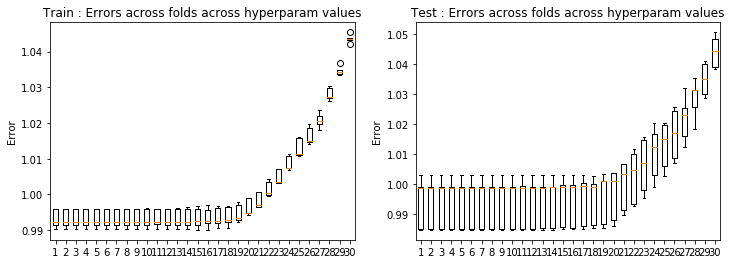

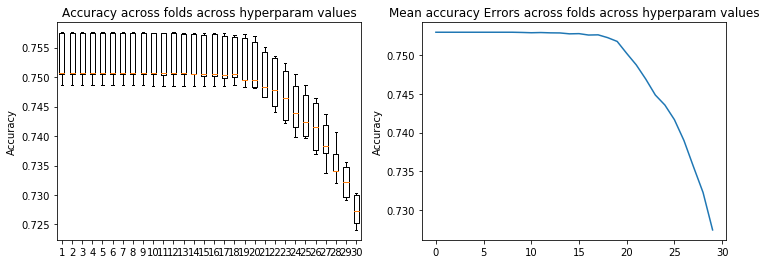

In [197]:
result_crossval(loss_tr2,loss_te2)
result_crossval_accuracy(acc2)

In [198]:
# test 3 : degree 3 rmse, all features, not removal of outliers, undef  
lambdas = np.logspace(-5, 0, 30)
loss_tr3, loss_te3, w3, acc3 = cross_validation_demo(ss_y, ss_tX, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.85524339e-01  8.47151699e-01 -3.12364860e-01 -2.32433899e-01
 -1.63177341e-01  1.15288968e+00  4.27639424e-02  3.21960019e-01
 -1.80863087e-01 -7.34751457e-03  4.95368803e-01 -5.85516401e-03
  1.04011419e-02  3.65480466e-01  5.43583861e-03  1.83372772e-02
  9.17304134e-02  4.14156578e-03  1.00320443e-01  6.21988671e-02
  6.58510337e-04  1.20203217e-02  6.23197582e-02 -4.60401946e-01
  1.62929846e-01 -1.45597626e-01  2.96773618e-01 -1.56031720e+00
 -3.39549058e-02  2.44591280e-01  2.70582363e-01  1.84138734e-02
 -6.71380299e-01 -3.58182219e-02  1.27078162e-04 -6.86044637e-01
 -6.89305019e-02  7.34591694e-03 -8.27211798e-02  4.27429534e-04
 -2.05457581e-01 -3.02096368e-01  1.58840731e-01  3.03929101e-03
 -3.02074598e-01 -1.26687732e+00 -8.55293407e-03  2.01956917e-01
 -5.79922424e-02  6.6121

Ridge regression: w=[-2.83651609e-01  8.35510804e-01 -3.11926923e-01 -2.32019614e-01
 -1.25809590e-01  1.15494185e+00  4.71111963e-02  3.30006579e-01
 -2.49262321e-01 -2.23209394e-02  4.42091171e-01 -2.30301640e-03
  5.57123986e-03  4.22068262e-01 -1.65205677e-03  1.52341327e-02
  8.12392335e-02  1.56123201e-03  1.24301786e-01  7.00196667e-02
 -8.42141035e-03  9.41108597e-03  7.02864827e-02 -5.02500232e-01
  1.71351256e-01 -1.56710341e-01  2.60184762e-01 -1.55396359e+00
 -3.95344810e-02  5.77767732e-02  3.34251547e-01  1.94913529e-02
 -5.60577735e-01 -4.09763742e-02  1.98093381e-03 -6.97872459e-01
 -6.52822951e-02  1.17324963e-03 -7.24861867e-02  1.81798971e-04
 -2.55930690e-01 -2.58924331e-01  1.56670367e-01  3.11658174e-03
 -2.58799273e-01 -1.29753846e+00 -5.28184375e-03  2.14694953e-01
 -3.91854205e-02  6.61639543e-01  3.06970923e-02  6.97218574e-02
 -1.78534778e-01  1.05851032e-01  2.01137105e-01  3.15793228e-03
 -5.52285189e-03  2.98164164e-01 -2.77227730e-03 -1.53267635e-02
  3.5

Ridge regression: w=[-2.85672457e-01  7.92945282e-01 -3.16929410e-01 -2.17868775e-01
 -1.57359862e-01  1.14485669e+00  3.12778979e-02  3.37408079e-01
 -1.98597364e-01 -1.11526511e-02  4.86997145e-01 -2.22971121e-03
 -4.02857522e-04  4.06920413e-01  3.86697449e-04  1.48529069e-02
  8.30253458e-02  8.41988313e-03  7.85737105e-02  6.87657507e-02
 -2.95906560e-03  8.00374535e-03  6.87671793e-02 -4.36926287e-01
  1.84701489e-01 -1.56322960e-01  3.24691297e-01 -1.53325797e+00
 -1.52826704e-02 -1.64500941e-02  2.89873491e-01  1.80759611e-02
 -6.03309510e-01 -4.12719168e-02 -1.30679118e-03 -7.06300576e-01
 -6.85907100e-02  5.92524938e-03 -7.47516833e-02 -2.88583418e-03
 -1.38897718e-01 -2.51379889e-01  1.58745649e-01  2.79667920e-04
 -2.51374650e-01 -1.19302446e+00 -2.46115839e-02  2.13871354e-01
 -8.90458537e-02  6.38992396e-01  2.05558028e-02  1.29697956e-01
 -1.37726535e-01  1.03052846e-01  2.13140636e-01  8.24135572e-03
 -2.39126320e-03  2.96205553e-01 -5.65282414e-03 -1.40387000e-02
  4.1

Ridge regression: w=[-2.83954668e-01  7.47721226e-01 -2.99791535e-01 -1.16604434e-01
 -1.45501434e-01  1.02901244e+00  4.52329663e-02  3.16661598e-01
 -2.32736823e-01 -1.53318489e-02  4.49331113e-01 -1.05369721e-02
  1.08902409e-02  3.85784258e-01  5.20175937e-03  2.13260068e-02
  9.20377732e-02  6.43601843e-03  1.06182226e-01  6.80279411e-02
 -5.61632417e-03  5.25917351e-03  6.80855903e-02 -3.89961403e-01
  1.44457589e-01 -3.14112750e-01  2.64878309e-01 -1.35179639e+00
 -2.91378920e-02  7.62264876e-02  3.46697763e-01  2.19568823e-02
 -5.63145263e-01 -3.95289404e-02 -1.83417971e-03 -6.80845767e-01
 -6.58171249e-02  1.11243572e-04 -7.61326066e-02 -1.27516852e-03
 -2.14583167e-01 -2.42465160e-01  1.56760281e-01 -1.20717568e-03
 -2.42442856e-01 -1.09877500e+00 -1.69894373e-03  2.70942535e-01
 -7.11519599e-02  5.56019804e-01  2.48185121e-02  2.35982038e-02
 -1.99598064e-01  1.07349344e-01  2.06936878e-01  1.17587099e-02
 -1.00751515e-02  3.08249808e-01 -6.77340563e-03 -1.92521838e-02
  3.6

Ridge regression: w=[-2.87563476e-01  7.02090946e-01 -2.99135694e-01 -2.15638103e-01
 -1.40419923e-01  1.02320843e+00  4.67489367e-02  3.40924732e-01
 -8.61641366e-02 -8.57060437e-03  6.57764649e-01  1.54786180e-03
 -2.65359469e-03  2.75864892e-01  1.40399627e-04  1.07882595e-02
  1.01788286e-01 -1.56602374e-03  9.53759736e-02  5.63803993e-02
 -4.84875582e-03 -2.22718235e-03  5.64011014e-02 -3.58978332e-01
  1.48018813e-01 -1.43214875e-01  2.85210502e-01 -1.27435107e+00
 -3.74527281e-02  9.18422573e-02  2.05525892e-01  1.83730899e-02
 -8.61203456e-01 -3.97124010e-02  3.91269426e-03 -5.80863700e-01
 -6.69669276e-02  4.59771724e-03 -1.01866822e-01  1.03458911e-04
 -1.89957154e-01 -2.49404593e-01  1.57940555e-01  3.66969318e-03
 -2.49396216e-01 -1.02531701e+00  4.20876187e-03  1.89351117e-01
 -4.46006318e-02  5.01657623e-01  2.88898082e-02  3.74721113e-02
 -1.33966648e-01  9.71793287e-02  3.37740203e-01  7.07603095e-03
  1.65684012e-03  2.59592831e-01 -7.55532096e-03 -1.23033199e-02
  4.3

Ridge regression: w=[-2.85393344e-01  5.70511763e-01 -3.09360177e-01 -1.49331579e-01
 -1.23368673e-01  8.36780398e-01  4.43526648e-02  3.09647714e-01
 -1.44198283e-01  4.13912530e-03  5.04239999e-01 -6.13114454e-03
  1.00369860e-02  3.09474325e-01  4.81671324e-03  1.76351160e-02
  1.02932133e-01  3.78633311e-03  8.09570306e-02  6.50575983e-02
  8.62207196e-04  1.13527887e-02  6.50628835e-02 -2.88374408e-01
  1.54467500e-01 -2.03661620e-01  1.92466200e-01 -9.41218094e-01
 -3.42246307e-02  7.47296175e-02  2.20929790e-01  2.05618009e-02
 -6.34475534e-01 -3.55111989e-02 -7.13373497e-06 -5.65503927e-01
 -6.91514967e-02  7.15075080e-03 -1.01614858e-01  3.78686115e-04
 -1.67982531e-01 -2.18784465e-01  1.59210746e-01  2.86247708e-03
 -2.18783191e-01 -8.22218363e-01 -4.41261109e-03  2.04362134e-01
  2.20134346e-02  3.27435588e-01  3.23383405e-02  7.68990682e-02
 -1.14775304e-01  8.83613828e-02  2.29470839e-01  8.50113129e-03
 -1.11884278e-02  2.34359998e-01 -6.71244183e-03 -1.78229339e-02
  5.5

Ridge regression: w=[-2.83458097e-01  4.76597057e-01 -3.09127573e-01 -1.27186554e-01
 -7.91488122e-02  7.62956979e-01  4.94538361e-02  3.09025899e-01
 -1.76340232e-01 -6.52351810e-03  4.67860800e-01 -2.68981459e-03
  5.49806018e-03  3.24819481e-01 -2.31213381e-03  1.47763338e-02
  9.38889024e-02  1.30896906e-03  1.02270317e-01  7.38810390e-02
 -8.03526899e-03  9.16997207e-03  7.38924550e-02 -2.72325182e-01
  1.62575546e-01 -2.23824449e-01  1.33153168e-01 -7.87757987e-01
 -3.99978558e-02 -7.78357988e-02  2.49088728e-01  2.27144170e-02
 -5.42236604e-01 -4.05598967e-02  1.90869763e-03 -5.33383261e-01
 -6.56941111e-02  1.00690370e-03 -8.63570815e-02  1.09173627e-05
 -2.14633843e-01 -1.82938451e-01  1.57242156e-01  3.10039989e-03
 -1.82933110e-01 -7.12742627e-01 -3.60933272e-03  2.09695081e-01
  5.05350078e-02  2.46770965e-01  3.04434054e-02  1.31244826e-01
 -1.35554530e-01  9.46221158e-02  1.87268772e-01  3.23934204e-03
 -5.42309816e-03  2.21848896e-01 -1.82103659e-03 -1.48922403e-02
  4.0

Ridge regression: w=[-2.85241689e-01  3.28947857e-01 -3.05519939e-01 -6.91391273e-02
 -7.95255571e-02  6.06115272e-01  3.30418982e-02  2.88835089e-01
 -1.23249152e-01  1.38711322e-02  4.85587045e-01 -2.55205029e-03
 -1.64290382e-03  2.62876496e-01 -3.88098875e-04  1.30328435e-02
  9.69208744e-02  7.03692395e-03  6.83539163e-02  6.67779712e-02
 -2.50146691e-03  6.47973182e-03  6.67781971e-02 -1.58847896e-01
  1.57322005e-01 -2.54833829e-01  1.14209148e-01 -4.93216769e-01
 -1.23957062e-02 -1.10526040e-01  1.94514921e-01  2.34563362e-02
 -5.47996671e-01 -4.10591939e-02 -1.65931604e-03 -4.58662415e-01
 -6.93003272e-02  5.43652802e-03 -8.29874799e-02 -3.06347525e-03
 -1.24328390e-01 -1.47868071e-01  1.59439160e-01 -6.56037337e-05
 -1.47867634e-01 -4.55824245e-01 -1.22608867e-02  2.11539110e-01
  5.15095320e-02  7.90037869e-02  1.74908893e-02  1.52943915e-01
 -9.34473601e-02  8.38542589e-02  1.85879297e-01  8.38101527e-03
 -1.27314603e-03  1.83893127e-01 -4.49342206e-03 -1.24387321e-02
  4.1

Ridge regression: w=[-2.83318305e-01  2.60511083e-01 -2.88101896e-01  1.37757704e-02
 -6.52333667e-02  5.06973192e-01  4.60206891e-02  2.68999619e-01
 -1.20143426e-01  1.27212087e-02  4.58590604e-01 -1.07449842e-02
  9.78671027e-03  2.16722304e-01  4.45817487e-03  2.01243363e-02
  1.00766482e-01  5.51724494e-03  6.91148015e-02  7.44735908e-02
 -5.35670299e-03  4.46200239e-03  7.44760400e-02 -1.14267086e-01
  1.22746343e-01 -3.85335796e-01  5.59391419e-02 -3.33039552e-01
 -2.38423910e-02 -1.11665736e-01  1.81009886e-01  2.67132571e-02
 -4.91029150e-01 -3.94462324e-02 -1.99134728e-03 -3.59865449e-01
 -6.66939680e-02 -1.02625352e-04 -7.99950758e-02 -1.61881067e-03
 -1.33428797e-01 -1.26816285e-01  1.57629547e-01 -1.45066662e-03
 -1.26815114e-01 -3.41398427e-01  4.20148586e-03  2.61871226e-01
  7.21650598e-02  6.48760086e-03  2.03935136e-02  1.09081164e-01
 -9.88767466e-02  8.57914542e-02  1.67836576e-01  1.18908576e-02
 -9.22054150e-03  1.45748754e-01 -5.85620029e-03 -1.84780083e-02
  3.3

Ridge regression: w=[-2.86141842e-01  1.56087533e-01 -2.75470208e-01 -2.60286902e-02
 -3.88939621e-02  4.25034195e-01  4.49102186e-02  2.47924645e-01
 -1.14281846e-01  3.05588518e-02  4.34241593e-01  8.75588439e-04
 -3.64172191e-03  1.80738929e-01 -1.01441555e-03  9.15783323e-03
  1.00804883e-01 -2.24962610e-03  6.58802127e-02  7.06736622e-02
 -4.79948425e-03 -2.18335075e-03  7.06746451e-02 -5.48462206e-02
  1.06558887e-01 -2.74384420e-01  2.99391906e-02 -1.62713756e-01
 -2.51493982e-02 -9.97918675e-02  1.34949468e-01  2.63921541e-02
 -4.59610678e-01 -4.03275662e-02  3.30642406e-03 -2.69040428e-01
 -6.83814162e-02  3.95016204e-03 -8.20801231e-02 -3.52952600e-04
 -1.30896178e-01 -1.14602003e-01  1.59390454e-01  2.94252404e-03
 -1.14601496e-01 -1.78909777e-01  1.57383460e-02  1.90825850e-01
  9.02268322e-02 -8.30098048e-02  1.96069541e-02  1.08036127e-01
 -6.98687562e-02  6.63260515e-02  1.48567409e-01  7.80205387e-03
  2.42969269e-03  9.83892092e-02 -6.31880303e-03 -1.05027935e-02
  3.5

Ridge regression: w=[-2.82291515e-01  8.73585235e-02 -2.57962557e-01 -1.21211002e-02
 -2.47081287e-02  3.46014129e-01  3.87386523e-02  2.04731285e-01
 -1.13436437e-01  5.03592313e-02  3.27869247e-01 -5.43085531e-03
  5.26316374e-03  1.47693740e-01  3.60139415e-03  1.26373974e-02
  8.58453132e-02  1.23859203e-03  5.02728503e-02  7.25557448e-02
  7.25162363e-04  6.77216085e-03  7.25560205e-02 -3.51958400e-02
  6.85143319e-02 -2.48726924e-01 -1.55890451e-02 -5.54987384e-02
 -1.37918728e-02 -7.24975365e-02  8.16474131e-02  2.90269020e-02
 -2.96473473e-01 -3.72207072e-02 -5.89249528e-04 -1.57430502e-01
 -7.10286760e-02  6.58411019e-03 -5.34081113e-02  1.49375974e-04
 -1.03507261e-01 -1.00882737e-01  1.60363715e-01  2.44912957e-03
 -1.00882632e-01 -8.95720255e-02  3.37296547e-02  1.59005039e-01
  8.13888405e-02 -1.29478593e-01  1.60518222e-02  8.11216642e-02
 -2.31887635e-02  5.09791391e-02  7.89766897e-02  8.56262994e-03
 -6.99852007e-03  3.44164510e-02 -5.75523291e-03 -1.38593782e-02
  1.7

Ridge regression: w=[-2.78901058e-01  5.76001412e-02 -2.51335073e-01 -1.15739865e-02
  1.25272102e-03  3.22624760e-01  4.16031100e-02  1.82788818e-01
 -1.10349193e-01  4.95684750e-02  2.89175706e-01 -2.44774264e-03
  1.47490110e-03  1.26549765e-01 -3.16044977e-03  1.05067227e-02
  7.53207769e-02  1.68055536e-04  4.88693223e-02  6.89854321e-02
 -7.28122615e-03  5.88329772e-03  6.89859688e-02 -3.75497228e-02
  6.86150174e-02 -2.26874232e-01 -3.78482507e-02 -2.64994200e-02
 -1.59968088e-02 -7.15092187e-02  7.53528892e-02  3.22407806e-02
 -2.23913388e-01 -4.27847464e-02  1.40396397e-03 -1.12248353e-01
 -6.80100232e-02  5.72236464e-04 -3.45163542e-02 -3.77594369e-04
 -9.99309431e-02 -9.48520647e-02  1.57709168e-01  3.02057246e-03
 -9.48517552e-02 -5.97853081e-02  3.17294988e-02  1.36713681e-01
  6.44893370e-02 -1.40532306e-01  1.17160122e-02  8.35812703e-02
 -3.04119738e-02  5.00919310e-02  4.30749753e-02  3.11385962e-03
 -2.26065041e-03  1.52965293e-02 -1.08289200e-03 -1.14874447e-02
  1.0

Ridge regression: w=[-2.75299303e-01  3.56098196e-02 -2.22284708e-01 -8.17919150e-03
  7.04531784e-04  2.63538435e-01  2.67937851e-02  1.38678077e-01
 -1.00058570e-01  6.86519608e-02  2.25455998e-01 -1.18509734e-03
 -5.95683168e-03  8.83449007e-02 -1.68584636e-03  7.27710001e-03
  6.10942176e-02  3.64641234e-03  3.54247914e-02  5.35411222e-02
 -2.01550432e-03  2.12141009e-03  5.35411656e-02 -2.54970644e-02
  2.98536652e-02 -1.70169783e-01 -3.28217841e-02  2.71434993e-03
  8.67719406e-03 -3.75771409e-02  4.80834322e-02  3.60402590e-02
 -1.28961337e-01 -4.53218313e-02 -2.13819535e-03 -4.44380022e-02
 -7.22867381e-02  4.93278832e-03 -1.20504789e-02 -3.08497012e-03
 -6.70208555e-02 -5.97393519e-02  1.57611438e-01 -3.98010158e-05
 -5.97392810e-02 -2.59946337e-02  4.30590726e-02  9.20981463e-02
  3.73694160e-02 -1.36695203e-01  6.73092165e-04  4.22105661e-02
 -1.12492616e-02  4.09729476e-02  1.74589852e-03  7.36331475e-03
  1.67205305e-03 -1.20379033e-02 -3.46736653e-03 -7.41707372e-03
  2.5

Ridge regression: w=[-2.68886036e-01  2.84643732e-02 -2.05228464e-01 -4.76582813e-03
  2.79283358e-04  2.31422883e-01  3.32318020e-02  1.23280971e-01
 -9.59606578e-02  7.02101216e-02  1.97552327e-01 -6.27370809e-03
  1.33996466e-03  7.52834264e-02  6.47376824e-04  9.74341019e-03
  5.57363396e-02  3.16649162e-03  3.34872626e-02  5.12346480e-02
 -4.32532317e-03 -9.47022691e-04  5.12347593e-02 -2.70087363e-02
  1.04910040e-02 -1.49585785e-01 -3.63873334e-02  1.24840170e-02
  6.77447189e-03 -2.54944635e-02  2.82231740e-02  4.13279839e-02
 -8.96774369e-02 -4.46941654e-02 -1.67309578e-03 -2.38241004e-02
 -7.04616620e-02 -1.63006365e-04 -5.88824560e-03 -1.87040329e-03
 -5.37366963e-02 -4.52694963e-02  1.53759829e-01 -1.20562682e-03
 -4.52694211e-02 -1.66584593e-02  4.68259745e-02  6.49820484e-02
  2.49777032e-02 -1.22612349e-01 -7.46075961e-04  2.60339295e-02
  4.87937432e-03  4.16146806e-02 -1.14044369e-02  9.44801941e-03
 -2.56342754e-03 -2.18839229e-02 -4.16289503e-03 -9.75387474e-03
 -1.5

Ridge regression: w=[-2.55848492e-01  2.27865785e-02 -1.74889177e-01 -8.49816564e-03
  1.01273389e-02  1.62374773e-01  2.69852813e-02  9.07590777e-02
 -8.10326027e-02  7.21104763e-02  1.49351999e-01  2.15626007e-03
 -3.89979228e-03  4.88192079e-02 -3.71832720e-03  4.15275257e-03
  4.17811807e-02  7.62733316e-04  2.05734322e-02  3.84717753e-02
 -3.54944033e-03 -3.57485852e-04  3.84718206e-02 -2.20974916e-02
 -1.01365192e-02 -1.01218157e-01 -1.99596776e-02  2.09667390e-02
  8.40157669e-03 -1.78404695e-03  1.78490047e-03  4.46918695e-02
 -2.36955820e-02 -4.65541025e-02  2.35498164e-03 -2.31894285e-03
 -7.06065283e-02  2.36083671e-03  2.88137060e-03 -1.05061385e-03
 -3.46309709e-02 -2.52475446e-02  1.47353041e-01  1.70709330e-03
 -2.52475176e-02  5.69966813e-04  4.98509940e-02  2.62642235e-02
  7.33505790e-03 -7.95641519e-02  7.94862468e-04  7.68209682e-03
  2.88635969e-03  3.97567871e-02 -3.42835163e-02  7.00556852e-03
  2.06248622e-03 -6.25529528e-03 -4.58496732e-03 -4.84762489e-03
  3.1

Ridge regression: w=[-2.23986463e-01  2.13311412e-02 -1.41344461e-01 -2.55610804e-04
  1.23884231e-02  1.02924399e-01  2.15047396e-02  6.65757996e-02
 -6.96439468e-02  6.89588691e-02  1.11415192e-01 -1.24671123e-04
 -2.04048459e-03  2.82043960e-02 -1.16074852e-03  1.99672410e-03
  2.28510153e-02  1.21195310e-03  1.64085455e-02  3.07463852e-02
 -6.57016437e-04 -2.55353964e-04  3.07464007e-02 -2.21539865e-02
 -2.27975455e-02 -6.59400580e-02 -1.01513432e-02  1.98163225e-02
  1.14842633e-02  5.39329458e-03 -1.14212454e-02  4.77661683e-02
 -2.34127905e-03 -4.19339949e-02 -1.70491961e-03  4.43242238e-03
 -6.76564517e-02  3.45035318e-03  6.17416750e-03 -5.18952323e-04
 -1.87875213e-02 -1.03617398e-02  1.32679466e-01  9.74513016e-04
 -1.03617310e-02  8.60054717e-03  4.22558568e-02 -3.76516340e-03
 -2.54810409e-03 -4.47187312e-02  3.47169536e-03 -4.59999787e-03
  8.12240553e-03  4.39164585e-02 -2.72243239e-02  4.41555662e-03
 -1.27140598e-03 -1.13117892e-03 -3.16136186e-03 -3.53082475e-03
  8.8

Ridge regression: w=[-2.01367002e-01  2.20133260e-02 -1.22556987e-01  6.09164795e-04
  1.59222494e-02  8.17066263e-02  1.98444341e-02  5.51081608e-02
 -6.24945400e-02  6.40417504e-02  9.55863186e-02 -9.04848432e-04
 -2.40571784e-03  1.82558894e-02 -3.64377124e-03  1.42062959e-03
  1.62310199e-02  1.81380252e-03  1.72962551e-02  2.62989226e-02
 -2.57212218e-03  8.21193684e-04  2.62989486e-02 -2.31749134e-02
 -2.14686658e-02 -5.32485496e-02 -5.61536972e-03  1.80909287e-02
  8.99774563e-03  7.53775306e-03 -1.46161743e-02  4.73389547e-02
  7.05051773e-03 -4.38666289e-02 -4.64876644e-06  5.14843664e-03
 -6.12625989e-02 -7.86812151e-04  7.97446725e-03 -8.74758473e-04
 -1.05335609e-02 -6.18015399e-03  1.18984582e-01  1.78545375e-03
 -6.18013612e-03  1.28241531e-02  3.41121554e-02 -1.22388761e-02
 -5.82982019e-03 -3.28369966e-02  1.89528311e-03 -5.63645842e-03
  4.56627951e-03  4.49436494e-02 -2.32417272e-02  1.23279423e-03
 -1.14532827e-04  2.72747527e-03 -2.25858460e-03 -2.48884892e-03
  3.6

Ridge regression: w=[-1.50042355e-01  2.25711768e-02 -8.64432934e-02  2.44067855e-03
  1.60125477e-02  4.71255009e-02  1.38072051e-02  3.69518352e-02
 -4.87265369e-02  5.70755278e-02  6.63616284e-02  5.44592128e-04
 -3.44987831e-03  3.64276184e-03 -2.42251653e-03  1.40146443e-03
  7.84209187e-03  2.31413141e-03  1.51432317e-02  2.07298283e-02
 -6.55395495e-04  3.00135168e-04  2.07298308e-02 -2.22848277e-02
 -2.40364542e-02 -3.15586900e-02  5.69080916e-04  1.27315748e-02
  1.05015096e-02  7.54981448e-03 -1.60394971e-02  4.09166599e-02
  1.15012555e-02 -3.68659711e-02 -1.44491377e-03  8.75971003e-04
 -5.05557526e-02  2.49541694e-03  5.60271128e-03 -1.81548945e-03
 -2.14716067e-03 -2.21931816e-04  8.97449625e-02 -2.45840877e-04
 -2.21927166e-04  1.67302148e-02  1.85039595e-02 -1.60270650e-02
 -5.64211367e-03 -1.55894714e-02  4.49520183e-03 -6.24089247e-03
  2.64545499e-03  4.47796130e-02 -1.49582061e-02  2.40245710e-03
 -9.57242676e-04  2.33985605e-03 -2.33337579e-03 -4.03070998e-04
  1.8

Ridge regression: w=[-1.21118229e-01  2.27297807e-02 -7.18282004e-02  2.21350805e-03
  1.54049537e-02  3.53003657e-02  1.35514402e-02  3.06174041e-02
 -4.29746463e-02  5.12178855e-02  5.46749917e-02 -3.92070676e-04
 -1.21304476e-03 -1.35025694e-03 -2.14948809e-03  1.15089217e-03
  5.34238368e-03  2.53581941e-03  1.51492422e-02  1.96019601e-02
 -9.95962050e-04 -5.94502312e-04  1.96019649e-02 -2.23274439e-02
 -2.37617459e-02 -2.48422924e-02  2.03864410e-03  1.04764140e-02
  9.33564203e-03  7.54807065e-03 -1.61537562e-02  3.75005738e-02
  1.26274417e-02 -3.10052039e-02 -4.50294214e-04 -1.86395289e-03
 -4.14854098e-02  6.36131039e-05  4.24573312e-03 -8.37146955e-04
  1.21289644e-03  1.89881044e-03  7.22842853e-02 -7.13391430e-05
  1.89881415e-03  1.82378390e-02  1.19536969e-02 -1.74716653e-02
 -4.90679571e-03 -1.02299985e-02  3.91080699e-03 -4.85671179e-03
  1.53577087e-03  4.19553156e-02 -1.06043152e-02  1.95209837e-03
 -6.24002207e-04  9.87566953e-04 -2.28852129e-03 -6.93172749e-04
  1.2

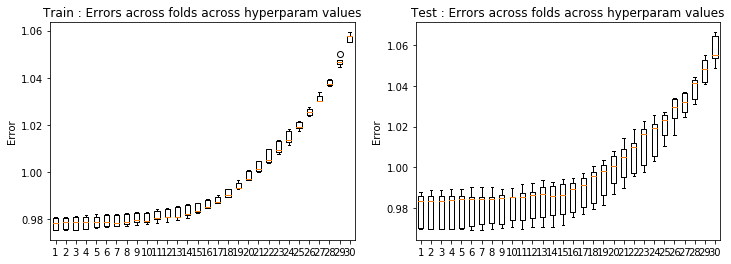

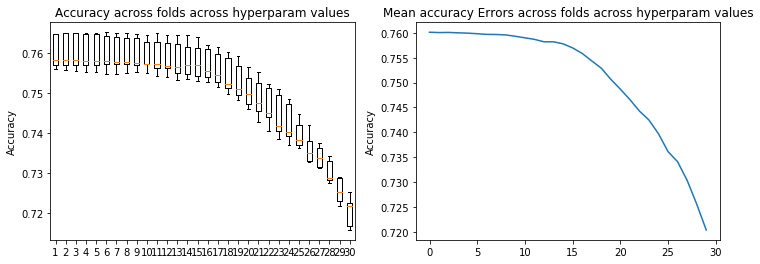

In [199]:
result_crossval(loss_tr3,loss_te3)
result_crossval_accuracy(acc3)

In [200]:
# test 4 : degree 1 class, all features, not removal of outliers, undef  
lambdas = np.logspace(-0.5, 0, 50) #avant -2 c'est constant
loss_tr4, loss_te4, w4, acc4 = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'class', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-0.17490832  0.04418483 -0.1172897  -0.03492712  0.00744686  0.06536083
  0.02715447  0.0413835  -0.06776331  0.0975239   0.07928495  0.00092523
 -0.00340094  0.00872351 -0.00417957  0.00079819  0.00472535  0.00247983
  0.00634461  0.01858588 -0.00046034 -0.00282232  0.01858589]
Ridge regression: w=[-0.17500707  0.04398722 -0.11610969 -0.03502313  0.00845421  0.06482924
  0.02648026  0.03982185 -0.06509011  0.09806373  0.07930261  0.00083801
 -0.00510981  0.00729998 -0.00430238  0.00186241  0.00577612  0.00330698
  0.00765808  0.01710614 -0.00045044 -0.00018956  0.01710614]
Ridge regression: w=[-0.17619208  0.04577239 -0.11627018 -0.03605488  0.0091587   0.06577368
  0.02678712  0.04094152 -0.06654476  0.09748544  0.07993033  0.00336733
 -0.00307566  0.0072985  -0.00583308  0.00089957  0.0080

Ridge regression: w=[-0.16685018  0.04406397 -0.11257945 -0.03093652  0.00904304  0.06051956
  0.02555408  0.03932012 -0.06552435  0.09409866  0.07561223  0.00079424
 -0.00328035  0.00544072 -0.00400964  0.00082638  0.00331519  0.00244022
  0.00767587  0.01887849 -0.00043816 -0.00269116  0.01887849]
Ridge regression: w=[-1.66944378e-01  4.38665777e-02 -1.11431099e-01 -3.10621597e-02
  9.91599958e-03  6.00065879e-02  2.49316903e-02  3.78600641e-02
 -6.30523701e-02  9.45790226e-02  7.55575009e-02  6.91390966e-04
 -4.93532037e-03  4.16293453e-03 -4.11773349e-03  1.82381945e-03
  4.30188656e-03  3.20564308e-03  8.86696049e-03  1.75002604e-02
 -4.47723867e-04 -1.62911231e-04  1.75002640e-02]
Ridge regression: w=[-0.1680748   0.04553628 -0.11161303 -0.03198299  0.01063737  0.06085332
  0.02522217  0.03894026 -0.06442096  0.09406726  0.07617141  0.00308092
 -0.00298309  0.00413438 -0.00553946  0.00089392  0.00644037  0.00348805
  0.00801431  0.01881164 -0.00119129 -0.0005463   0.01881165]
Rid

Accuracy = [0.708021666236781, 0.7122775341759092, 0.7015733814805262, 0.7140830539076606, 0.704023729687903]
Ridge regression: w=[-0.15863092  0.04378744 -0.10785395 -0.02732828  0.01044674  0.05588536
  0.02396358  0.03736167 -0.06326015  0.09056717  0.0720083   0.00066859
 -0.00315323  0.00255065 -0.00383631  0.00084917  0.00209179  0.00239385
  0.00886644  0.01910446 -0.00041625 -0.00256032  0.01910446]
Ridge regression: w=[-1.58720479e-01  4.35892654e-02 -1.06740402e-01 -2.74790764e-02
  1.11969059e-02  5.53903385e-02  2.33920267e-02  3.59977941e-02
 -6.09761532e-02  9.09902454e-02  7.18901088e-02  5.53397987e-04
 -4.75055966e-03  1.40727109e-03 -3.93229278e-03  1.77995187e-03
  3.01532178e-03  3.09836598e-03  9.93964633e-03  1.78218438e-02
 -4.44702081e-04 -1.38990788e-04  1.78218470e-02]
Ridge regression: w=[-0.15979521  0.04514789 -0.10694259 -0.02829797  0.01193074  0.05614548
  0.02366813  0.03704    -0.06226239  0.0905416   0.07249043  0.00280255
 -0.00288323  0.0013563  -0.

Ridge regression: w=[-0.15097985  0.044169   -0.10334262 -0.02556364  0.01237537  0.05233286
  0.02113855  0.03582794 -0.06066623  0.08592836  0.07044666 -0.00156559
 -0.00276998  0.00092822 -0.00492082  0.0003408   0.00174997  0.00281394
  0.01139586  0.01839789 -0.00060187 -0.0002553   0.0183979 ]
Ridge regression: w=[-1.51151453e-01  4.42016921e-02 -1.04280729e-01 -2.57171552e-02
  1.18343557e-02  5.21762242e-02  2.41859440e-02  3.51330810e-02
 -6.06637131e-02  8.84095485e-02  6.98146105e-02 -1.20954603e-04
 -2.16374620e-03 -2.18271697e-03 -3.79676486e-03  1.22112892e-03
  2.18250176e-03  4.04539063e-03  1.20325196e-02  1.95490677e-02
 -1.17179069e-03 -1.01140893e-03  1.95490747e-02]
Accuracy = [0.7084085633221563, 0.711439257157596, 0.7011864843951509, 0.7125354655661594, 0.7033789012122775]
Ridge regression: w=[-1.50303771e-01  4.33474346e-02 -1.03121040e-01 -2.40859137e-02
  1.16623512e-02  5.14617606e-02  2.23935979e-02  3.55036407e-02
 -6.09628850e-02  8.69446745e-02  6.8477912

Ridge regression: w=[-0.14465602  0.04404448 -0.09852517 -0.02258508  0.01380596  0.04821826
  0.02093006  0.03385873 -0.05826783  0.08397452  0.06607382  0.0023283
 -0.0026873  -0.00271314 -0.00472805  0.00086747  0.00295228  0.00311548
  0.01098302  0.01939462 -0.00103552 -0.00048661  0.01939462]
Ridge regression: w=[-0.14266155  0.04352935 -0.09861324 -0.02250581  0.01335348  0.04802125
  0.01968992  0.03407625 -0.05840982  0.08233282  0.06686971 -0.00157811
 -0.00266251 -0.00130694 -0.0046928   0.00034587  0.0007688   0.00272833
  0.0121888   0.01859929 -0.00059708 -0.00022831  0.0185993 ]
Ridge regression: w=[-0.1428237   0.04358344 -0.09957568 -0.02273296  0.01288457  0.04786996
  0.02255691  0.03342293 -0.05846295  0.08467868  0.06630952 -0.0001998
 -0.0020859  -0.00420424 -0.00362544  0.00118742  0.0012389   0.00386981
  0.01279679  0.01964936 -0.00113117 -0.00097066  0.01964937]
Accuracy = [0.7069899406757802, 0.7111168429197834, 0.7007351044622131, 0.7121485684807841, 0.70331

Ridge regression: w=[-1.35299481e-01  4.19292834e-02 -9.36078027e-02 -1.93054207e-02
  1.38588809e-02  4.35911368e-02  1.92135562e-02  3.12707250e-02
 -5.49071772e-02  8.05255966e-02  6.20667421e-02  2.19870762e-04
 -4.18979086e-03 -4.39495614e-03 -3.41521925e-03  1.63018151e-03
  3.58664668e-04  2.77100757e-03  1.22020059e-02  1.83149762e-02
 -4.32875199e-04 -8.64669185e-05  1.83149784e-02]
Ridge regression: w=[-0.13621563  0.04320293 -0.09385709 -0.01988485  0.01460633  0.04412209
  0.01945846  0.03221364 -0.0559822   0.08023371  0.06262928  0.00208277
 -0.00257095 -0.0044869  -0.00444697  0.00085334  0.00204517  0.00297423
  0.0117658   0.01945635 -0.00097904 -0.00046542  0.01945635]
Ridge regression: w=[-1.34337528e-01  4.27239330e-02 -9.38985148e-02 -1.97848953e-02
  1.41633174e-02  4.39327123e-02  1.82788190e-02  3.24108412e-02
 -5.61076142e-02  7.86770758e-02  6.33792508e-02 -1.57991770e-03
 -2.54970307e-03 -3.19277167e-03 -4.46343360e-03  3.47951177e-04
 -3.87026758e-05  2.6363

Ridge regression: w=[-0.12689602  0.04122407 -0.0899044  -0.01677311  0.01411676  0.04021391
  0.01819137  0.03078451 -0.05432324  0.07646188  0.05900807  0.00025885
 -0.0026277  -0.00510885 -0.00316541  0.00088183 -0.00097832  0.00215801
  0.01206929  0.01931339 -0.00033685 -0.00207584  0.0193134 ]
Ridge regression: w=[-1.26967663e-01  4.10193813e-02 -8.89447314e-02 -1.69832037e-02
  1.44973326e-02  3.97852393e-02  1.77968175e-02  2.97377479e-02
 -5.26432099e-02  7.66933767e-02  5.87233951e-02  1.21336487e-04
 -3.97864179e-03 -5.83868675e-03 -3.23343689e-03  1.56801036e-03
 -2.80529147e-04  2.64655445e-03  1.27478993e-02  1.83416540e-02
 -4.26869806e-04 -7.25870979e-05  1.83416559e-02]
Ridge regression: w=[-0.12782739  0.04220106 -0.08920656 -0.0174925   0.01524283  0.04024736
  0.0180331   0.03064731 -0.0536495   0.07644989  0.05927215  0.0018518
 -0.00245044 -0.00593863 -0.00417264  0.00083645  0.0013001   0.0028301
  0.01240444  0.01943955 -0.00092279 -0.00044436  0.01943956]
Ridge

Ridge regression: w=[-0.11867681  0.04015675 -0.08522776 -0.0147184   0.01467645  0.03660632
  0.01678645  0.02925088 -0.05187968  0.07265201  0.05577954  0.0001724
 -0.00248324 -0.00634197 -0.00299027  0.00087598 -0.00141898  0.00208181
  0.01257031  0.01919235 -0.00031721 -0.00195392  0.01919235]
Ridge regression: w=[-1.18743815e-01  3.99507724e-02 -8.43123414e-02 -1.49358119e-02
  1.49827520e-02  3.61954416e-02  1.64327995e-02  2.82755424e-02
 -5.03325951e-02  7.28412024e-02  5.54685409e-02  3.40798828e-05
 -3.76443292e-03 -6.98637761e-03 -3.05419152e-03  1.50202438e-03
 -7.75605146e-04  2.51942074e-03  1.31612071e-02  1.82894884e-02
 -4.19675599e-04 -6.10075400e-05  1.82894901e-02]
Ridge regression: w=[-0.11954786  0.04104571 -0.08458416 -0.01538239  0.01572308  0.0365944
  0.01666136  0.0291526  -0.05127351  0.07264201  0.05600317  0.00163635
 -0.00232679 -0.00709144 -0.00390614  0.00081673  0.00070453  0.00268406
  0.01290271  0.01934448 -0.00086715 -0.0004235   0.01934448]
Ridge

Ridge regression: w=[-0.11160683  0.03973932 -0.08182504 -0.01414129  0.01532713  0.03352306
  0.01678621  0.02764013 -0.04963232  0.07012733  0.05374214 -0.00041898
 -0.00174694 -0.00898411 -0.00297226  0.00103779 -0.00093444  0.0031747
  0.01446585  0.01934715 -0.00096091 -0.00081041  0.01934716]
Accuracy = [0.7041526953830282, 0.7095692545782821, 0.699445447510962, 0.7107299458344081, 0.7005416559195254]
Ridge regression: w=[-1.10618741e-01  3.89405615e-02 -8.05929568e-02 -1.29157907e-02
  1.50826281e-02  3.32143012e-02  1.54435237e-02  2.77856167e-02
 -4.94056054e-02  6.88377400e-02  5.26340412e-02  9.56341522e-05
 -2.33836699e-03 -7.29479015e-03 -2.81744361e-03  8.64448859e-04
 -1.73165663e-03  2.00074351e-03  1.29370663e-02  1.89983909e-02
 -2.98151760e-04 -1.83508671e-03  1.89983942e-02]
Ridge regression: w=[-1.10681195e-01  3.87339328e-02 -7.97225764e-02 -1.31376239e-02
  1.53231444e-02  3.28215483e-02  1.51280131e-02  2.68771299e-02
 -4.79819511e-02  6.89883427e-02  5.23030109

Ridge regression: w=[-1.05087085e-01  3.86145845e-02 -7.63734430e-02 -1.22121477e-02
  1.62203748e-02  3.05762794e-02  1.43465504e-02  2.66199271e-02
 -4.69099495e-02  6.57887659e-02  5.03435531e-02  1.28951269e-03
 -2.09971540e-03 -8.49320001e-03 -3.44890186e-03  7.74255859e-04
 -3.54764363e-05  2.41960971e-03  1.34635966e-02  1.89799253e-02
 -7.69599270e-04 -3.86514404e-04  1.89799284e-02]
Ridge regression: w=[-0.10363818  0.03825385 -0.07629313 -0.01206923  0.01582906  0.03043031
  0.01339039  0.02674634 -0.04698918  0.06455529  0.05092521 -0.00149597
 -0.00208948 -0.00756827 -0.00359873  0.00033143 -0.00174179  0.00224072
  0.01412983  0.0184331  -0.00054461 -0.00013781  0.01843311]
Ridge regression: w=[-0.10375597  0.03837301 -0.07724181 -0.01248798  0.01560058  0.03027949
  0.01541567  0.02627404 -0.04720828  0.06628676  0.0506376  -0.0004548
 -0.00165084 -0.00958649 -0.00280349  0.00099326 -0.00119479  0.00299012
  0.01460102  0.01908963 -0.00091333 -0.00076763  0.01908964]
Accu

 -2.65370240e-04 -1.62993097e-03  1.84709819e-02]
Ridge regression: w=[-9.67278883e-02  3.62156923e-02 -7.16107882e-02 -1.04482945e-02
  1.55979336e-02  2.72890998e-02  1.29445011e-02  2.44994918e-02
 -4.36801059e-02  6.21128198e-02  4.68337527e-02 -1.51080364e-04
 -3.16292347e-03 -8.83738641e-03 -2.57055151e-03  1.30237939e-03
 -1.51475195e-03  2.15675439e-03  1.36639672e-02  1.77361222e-02
 -3.92496769e-04 -3.88568540e-05  1.77361234e-02]
Ridge regression: w=[-0.09738286  0.03709475 -0.07189675 -0.01075433  0.01630849  0.02753982
  0.0131542   0.02528859 -0.04445482  0.06201603  0.04732605  0.00111992
 -0.00197295 -0.00894459 -0.00320851  0.00074704 -0.00028865  0.00227359
  0.01360101  0.01867377 -0.00071736 -0.00036633  0.01867377]
Ridge regression: w=[-0.09604017  0.0367608  -0.07179735 -0.01060771  0.01593335  0.02740684
  0.01225435  0.02539835 -0.04452557  0.06086486  0.04786623 -0.00145316
 -0.00196489 -0.00810247 -0.00337789  0.00032172 -0.00189778  0.00212836
  0.01417975  0

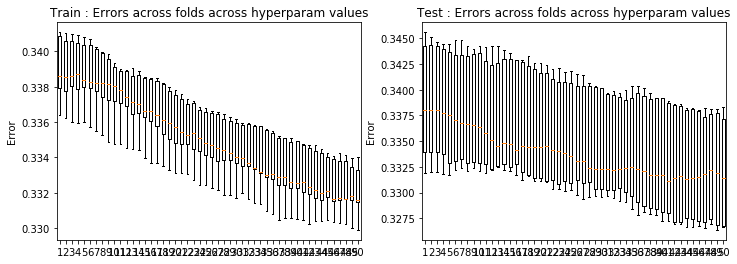

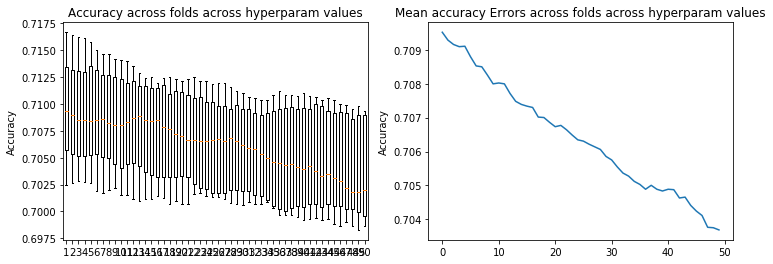

In [201]:
result_crossval(loss_tr4,loss_te4)
result_crossval_accuracy(acc4)

In [202]:
# test 5 : degree 2, class, all features, not removal of outliers, undef
lambdas = np.linspace(0.0, 1, 50) #faut être plus précis
loss_tr5, loss_te5, w5, acc5 = cross_validation_demo(ss_y, ss_tX, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'class', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.85530049e-01  9.10852670e-02 -2.84344325e-01 -2.23863756e-01
 -1.04237776e-01  7.11572079e-01  2.61741110e-02 -3.46966975e+02
 -1.59027978e-01  9.87209058e-02  1.12742175e+02  2.01140684e-03
 -2.99531128e-03  1.13943777e+02 -9.27438860e-04 -2.43932868e-03
  5.50874322e-02  3.75437734e-03  6.32048988e-02 -2.53604357e+03
 -2.21614176e-03 -3.89883708e-03  2.77594183e+03  6.31164097e-02
  1.34875961e-01  5.81911299e-02  1.89308672e-01 -5.03127716e-01
  8.08506832e-03  2.61994683e-01  9.89280251e-02  2.09181915e-02
 -2.48182709e-01 -3.63555224e-02 -6.77306184e-04 -2.39747107e-01
 -6.90644445e-02  6.76946671e-03 -1.45715534e-02 -1.71194142e-04
 -1.19162233e-01  1.67279552e+03  1.60873451e-01  2.29623595e-03
 -1.67316246e+03]
Ridge regression: w=[-2.85691256e-01  8.39377148e-02 -2.81184844e-01 -2

Ridge regression: w=[-2.62251741e-01  1.86122886e-02 -2.08784013e-01 -2.75060969e-02
  7.83148419e-03  1.79683438e-01  2.99485785e-02  1.06620201e-01
 -9.52264264e-02  1.08003801e-01  1.75894929e-01  1.02291781e-03
 -2.69610912e-03  6.65057746e-02 -5.70679257e-03 -5.21525398e-04
  3.91703777e-02  3.82681972e-03  2.40860332e-02  4.03243186e-02
 -1.35545962e-03  2.92731569e-05  4.03244395e-02 -2.79895484e-02
  5.13125168e-02 -9.28061703e-02 -2.71701176e-02 -5.17993466e-02
  3.32668957e-03 -1.10987080e-02  1.35496085e-02  4.36405085e-02
 -6.41390116e-02 -4.82041553e-02  4.29466494e-04 -3.12021537e-03
 -7.14743087e-02 -2.97911574e-04  1.44877919e-02 -1.01383280e-03
 -5.44093420e-02 -3.22704108e-02  1.51573983e-01  2.55617852e-03
 -3.22703340e-02]
Ridge regression: w=[-2.62549822e-01  1.82073029e-02 -2.06035829e-01 -1.70644325e-02
  2.56224805e-03  1.78037653e-01  3.11007904e-02  1.07985981e-01
 -9.59137653e-02  1.12003139e-01  1.80001799e-01  2.49361506e-03
 -1.90540660e-03  6.24706317e-02

Ridge regression: w=[-0.23713513  0.02372208 -0.16146032 -0.00841191  0.01515815  0.10677626
  0.02197203  0.08025391 -0.08172095  0.10675404  0.12984421  0.00306511
 -0.00319315  0.038138   -0.00324839 -0.0006392   0.02757012  0.0028922
  0.01813997  0.03719262 -0.00184027 -0.00236817  0.03719264 -0.02833332
  0.01612196 -0.08251835 -0.02466675 -0.0076281   0.01346766 -0.0085383
 -0.00115647  0.04802485 -0.03286811 -0.04373674 -0.00180538  0.01153113
 -0.0712144   0.00384545  0.01208981 -0.00051734 -0.03899072 -0.02463291
  0.13990795  0.00110646 -0.0246329 ]
Ridge regression: w=[-2.37269009e-01  2.38180842e-02 -1.60443023e-01 -7.37334990e-03
  1.72078508e-02  1.07296411e-01  1.99920875e-02  7.75372020e-02
 -7.97605037e-02  1.08122236e-01  1.30385013e-01  4.21085580e-03
 -5.23023151e-03  3.52261808e-02 -4.92817060e-03  1.18339529e-03
  2.73488273e-02  4.27509174e-03  2.00223073e-02  3.46073842e-02
 -1.10111928e-03  1.90047153e-05  3.46073940e-02 -2.74461964e-02
  1.67879284e-02 -8.078

Ridge regression: w=[-2.23708910e-01  2.73129117e-02 -1.42664769e-01 -6.99756036e-03
  2.00137674e-02  8.93701280e-02  2.08516002e-02  6.84542269e-02
 -7.56399999e-02  1.02630543e-01  1.12237381e-01  6.11536602e-03
 -2.45744396e-03  2.67982600e-02 -6.57156142e-03  5.87198316e-04
  2.59406043e-02  4.15873185e-03  1.76657919e-02  3.39177706e-02
 -1.90527477e-03 -1.65982536e-04  3.39177909e-02 -2.91660335e-02
  6.85558678e-03 -7.36556726e-02 -2.06104123e-02 -6.42245647e-05
  1.16918441e-02 -6.77311135e-03 -4.10538466e-03  4.89877686e-02
 -1.81534061e-02 -4.67200669e-02  1.71150106e-03  1.25268925e-02
 -6.70985921e-02  1.59028217e-03  1.37437453e-02 -9.74128590e-04
 -3.16972880e-02 -2.20483107e-02  1.30590337e-01  1.25674926e-03
 -2.20482968e-02]
Ridge regression: w=[-2.20624481e-01  2.61474846e-02 -1.43946397e-01 -6.87915067e-03
  1.95845492e-02  8.97517429e-02  2.11540816e-02  6.83856840e-02
 -7.45927771e-02  1.01076293e-01  1.13804583e-01  1.40090860e-04
 -2.66118133e-03  2.84594271e-02

Ridge regression: w=[-2.07688665e-01  2.74564895e-02 -1.30054192e-01 -2.53076716e-03
  1.95378113e-02  7.72548266e-02  2.13198797e-02  6.13892097e-02
 -6.93625692e-02  1.00216410e-01  1.02636347e-01  1.41815648e-03
 -1.82236985e-03  1.91959240e-02 -3.86562871e-03  1.22784993e-03
  1.94914282e-02  5.25663675e-03  1.93395981e-02  3.21813897e-02
 -1.33590665e-03 -7.56165535e-04  3.21814070e-02 -2.99348169e-02
 -1.02691187e-03 -6.85310711e-02 -1.80618208e-02  2.35391941e-03
  1.30898303e-02 -6.55517548e-03 -4.63717742e-03  5.07177251e-02
 -1.55732187e-02 -4.48276860e-02 -1.02341506e-03  7.78611471e-03
 -6.40089958e-02  7.03760000e-05  1.07157630e-02 -1.44748715e-03
 -2.34796541e-02 -1.79464799e-02  1.21912724e-01 -3.96302921e-04
 -1.79464669e-02]
Accuracy = [0.7371679133350528, 0.7398117100851174, 0.7333634253288626, 0.7422620582924941, 0.7371034304874903]
Ridge regression: w=[-2.02767716e-01  2.72709080e-02 -1.24830196e-01 -3.65705855e-03
  1.90966226e-02  7.18770943e-02  1.82447695e-02  

Ridge regression: w=[-1.91765364e-01  2.79733722e-02 -1.15287168e-01 -2.77949074e-03
  2.01203782e-02  6.44593826e-02  1.62158430e-02  5.21737852e-02
 -6.18696647e-02  9.48406514e-02  8.87851301e-02  2.47158593e-03
 -4.58676686e-03  1.45909786e-02 -4.00859170e-03  1.39058473e-03
  1.47971450e-02  3.74080242e-03  1.69325974e-02  2.71015138e-02
 -7.97632020e-04  1.19038689e-04  2.71015187e-02 -2.95068877e-02
 -7.20109813e-03 -5.70417475e-02 -1.27350751e-02  4.72731925e-03
  1.40889081e-02 -3.63088529e-03 -8.83253566e-03  4.71784375e-02
 -7.90870190e-03 -4.41276475e-02 -1.84986921e-03  7.76994282e-03
 -6.20651298e-02  3.26961365e-03  8.45966174e-03 -2.28394098e-03
 -1.80161068e-02 -1.41057428e-02  1.13683790e-01 -2.02065277e-04
 -1.41057342e-02]
Ridge regression: w=[-0.19306385  0.02937862 -0.11557092 -0.00427213  0.02085596  0.06509837
  0.01773201  0.05298766 -0.06377575  0.09375274  0.08798888  0.00463694
 -0.0023367   0.01444084 -0.00557104  0.00066777  0.0176792   0.00377382
  0.0159

Ridge regression: w=[-1.80510939e-01  2.91289275e-02 -1.09054469e-01 -3.63261316e-03
  2.00147118e-02  5.93045892e-02  1.67887519e-02  4.89393966e-02
 -6.01382971e-02  8.89449343e-02  8.29827622e-02 -5.32983400e-04
 -2.48088451e-03  1.27771200e-02 -4.72259094e-03  7.08601120e-05
  1.24052195e-02  3.18720361e-03  1.66312271e-02  2.58764432e-02
 -9.61483828e-04  1.90999730e-04  2.58764623e-02 -3.12587620e-02
 -8.24768544e-03 -5.41225704e-02 -1.09917182e-02  6.58133446e-03
  1.02537107e-02 -4.63227332e-04 -1.19615810e-02  4.68795929e-02
 -2.85654998e-03 -4.24336669e-02 -1.94941377e-04  8.32798800e-03
 -5.76777101e-02 -8.20753792e-04  8.02981822e-03 -7.73818866e-04
 -1.44975065e-02 -1.19434795e-02  1.07022823e-01  1.55082115e-03
 -1.19434659e-02]
Ridge regression: w=[-1.80716111e-01  2.91405813e-02 -1.08838175e-01 -2.00301209e-03
  1.98690080e-02  5.91304787e-02  1.86317195e-02  4.92091035e-02
 -6.00530307e-02  9.13820135e-02  8.32322340e-02  9.04773724e-04
 -1.73742536e-03  1.01706542e-02

  0.10097592  0.00045998 -0.00926513]
Ridge regression: w=[-1.68661103e-01  2.88482232e-02 -9.93562294e-02 -2.19203955e-03
  1.95732006e-02  5.18483496e-02  1.47002544e-02  4.34690941e-02
 -5.48008801e-02  8.66234571e-02  7.46537294e-02  1.77575170e-03
 -4.21750692e-03  8.21967830e-03 -3.58386151e-03  1.40235391e-03
  1.03446342e-02  3.40210761e-03  1.58962907e-02  2.41216491e-02
 -6.79703984e-04  1.16422002e-04  2.41216527e-02 -2.98027498e-02
 -1.36694641e-02 -4.69117520e-02 -8.19451832e-03  6.67054635e-03
  1.31970186e-02 -7.17866418e-04 -1.21057695e-02  4.48918711e-02
 -1.16136661e-03 -4.08141719e-02 -1.64123160e-03  4.79427709e-03
 -5.64224069e-02  2.86519036e-03  6.10463254e-03 -2.01294135e-03
 -1.18017460e-02 -9.47359418e-03  1.00376743e-01 -2.48864796e-04
 -9.47358767e-03]
Ridge regression: w=[-0.16980315  0.03005693 -0.09964963 -0.00334265  0.02026902  0.05237979
  0.01579934  0.04418197 -0.05633171  0.08585722  0.07419689  0.00367112
 -0.00221823  0.00795089 -0.0048726   0.000

Ridge regression: w=[-1.59944145e-01  2.96702594e-02 -9.54509199e-02 -1.89620591e-03
  1.93239574e-02  4.86329692e-02  1.67622725e-02  4.17721877e-02
 -5.38360045e-02  8.38143530e-02  7.13481558e-02  5.60650185e-04
 -1.65372651e-03  5.07771027e-03 -3.31112123e-03  1.12838408e-03
  9.60679102e-03  4.27736271e-03  1.68411687e-02  2.49694513e-02
 -1.09806809e-03 -7.31598189e-04  2.49694597e-02 -3.05023926e-02
 -1.57868917e-02 -4.57123106e-02 -7.66316191e-03  7.27330283e-03
  1.22939508e-02 -8.65670971e-05 -1.23432246e-02  4.59889864e-02
  7.49105879e-04 -3.86106303e-02 -6.85559876e-04  2.48572438e-03
 -5.29106573e-02  1.17013536e-04  5.44880242e-03 -1.07558026e-03
 -9.64332295e-03 -8.09961979e-03  9.46783129e-02 -1.46382142e-04
 -8.09961316e-03]
Accuracy = [0.732718596853237, 0.7362006706216147, 0.732009285530049, 0.7372323961826154, 0.7309775599690482]
Ridge regression: w=[-0.15720194  0.02902967 -0.0929855  -0.0020075   0.01877117  0.04670888
  0.01471627  0.04138391 -0.05295241  0.0816

Ridge regression: w=[-1.50525501e-01  2.90230590e-02 -8.85458824e-02 -1.95819497e-03
  1.88036795e-02  4.37859133e-02  1.35134726e-02  3.77309526e-02
 -4.97923374e-02  7.97048815e-02  6.52766800e-02  1.30728306e-03
 -3.90356055e-03  4.29229422e-03 -3.26263599e-03  1.37758418e-03
  7.47121303e-03  3.11522486e-03  1.51674915e-02  2.20573160e-02
 -6.01637121e-04  1.03493529e-04  2.20573188e-02 -2.96612897e-02
 -1.72108150e-02 -3.99272045e-02 -5.09961833e-03  7.18570167e-03
  1.22487540e-02  1.15636013e-03 -1.38397222e-02  4.23581256e-02
  2.62151050e-03 -3.78227031e-02 -1.46663224e-03  2.49594805e-03
 -5.16398881e-02  2.55699770e-03  4.59297412e-03 -1.80018144e-03
 -7.78265322e-03 -6.29305235e-03  8.98361831e-02 -2.67291852e-04
 -6.29304714e-03]
Ridge regression: w=[-0.15154475  0.03009165 -0.08883305 -0.00289205  0.01946785  0.04422946
  0.0143678   0.03838952 -0.05108147  0.07913988  0.06502886  0.00299688
 -0.00210477  0.00398938 -0.00435364  0.00071499  0.00955544  0.00315542
  0.0145

Ridge regression: w=[-1.43292188e-01  2.96152047e-02 -8.57206170e-02 -2.56863043e-03
  1.85179110e-02  4.17098842e-02  1.35711400e-02  3.65536389e-02
 -4.93307115e-02  7.53991241e-02  6.30477561e-02 -9.21844053e-04
 -2.21472649e-03  3.90818078e-03 -4.04511917e-03  1.79945702e-04
  6.27179768e-03  2.73249224e-03  1.51613298e-02  2.15009278e-02
 -7.86349821e-04  1.22831264e-04  2.15009392e-02 -3.06911407e-02
 -1.64963212e-02 -3.87601932e-02 -4.14116757e-03  7.68327260e-03
  9.25732016e-03  3.12858113e-03 -1.53859430e-02  4.17981438e-02
  4.94359024e-03 -3.65339452e-02 -2.41826753e-04  3.09646481e-03
 -4.83347000e-02 -7.58457366e-04  4.42112782e-03 -6.78377812e-04
 -5.81169525e-03 -5.08553489e-03  8.55023826e-02  1.24459504e-03
 -5.08552675e-03]
Ridge regression: w=[-1.43455057e-01  2.96438393e-02 -8.59729429e-02 -1.87948452e-03
  1.86260642e-02  4.15765692e-02  1.53051248e-02  3.66894388e-02
 -4.92763142e-02  7.74216253e-02  6.31412052e-02  3.22068358e-04
 -1.57324802e-03  1.85742374e-03

Ridge regression: w=[-0.13583468  0.02886031 -0.08108096 -0.00173531  0.01787376  0.03815234
  0.01312056  0.0349814  -0.04716386  0.07337729  0.05875646  0.00091131
 -0.00221913  0.00278018 -0.00254183  0.00051478  0.00539948  0.0021876
  0.01392718  0.02176526 -0.00067634 -0.0015447   0.02176526 -0.02939395
 -0.02056292 -0.03508884 -0.00336052  0.00797193  0.01167848  0.0033729
 -0.01730549  0.04051375  0.00452399 -0.0325711  -0.00138483  0.00156355
 -0.04730156  0.00165545  0.00232597 -0.00027132 -0.00608961 -0.00385556
  0.08181064  0.00031269 -0.00385556]
Ridge regression: w=[-1.35911374e-01  2.88264698e-02 -8.05512821e-02 -1.84722937e-03
  1.80473769e-02  3.80662990e-02  1.25236475e-02  3.36226098e-02
 -4.59710047e-02  7.38639387e-02  5.84899852e-02  9.76251020e-04
 -3.63308926e-03  1.67705240e-03 -3.00715560e-03  1.33708031e-03
  5.50404802e-03  2.87274194e-03  1.45910367e-02  2.05205098e-02
 -5.46275219e-04  8.93020237e-05  2.05205121e-02 -2.92761697e-02
 -1.92683518e-02 -3.483

Ridge regression: w=[-1.29900395e-01  2.92824940e-02 -7.84066528e-02 -2.34683800e-03
  1.77963721e-02  3.65529676e-02  1.24521852e-02  3.28654089e-02
 -4.57451736e-02  7.01212387e-02  5.69730761e-02 -1.00697209e-03
 -2.09374032e-03  1.55530838e-03 -3.77853427e-03  2.04809375e-04
  4.56600086e-03  2.55146944e-03  1.46371582e-02  2.01261760e-02
 -7.27124107e-04  9.64555100e-05  2.01261854e-02 -3.01112078e-02
 -1.83130078e-02 -3.40455797e-02 -2.12390403e-03  7.49076205e-03
  8.67524994e-03  4.10262908e-03 -1.60165887e-02  3.93478961e-02
  6.74252626e-03 -3.40671054e-02 -2.42909057e-04  1.41916849e-03
 -4.46721440e-02 -7.16822396e-04  3.44472239e-03 -6.38462994e-04
 -3.38906306e-03 -3.02888278e-03  7.76755185e-02  1.14004539e-03
 -3.02887601e-03]
Ridge regression: w=[-1.30048043e-01  2.93205762e-02 -7.87695378e-02 -1.88556802e-03
  1.79389447e-02  3.64212497e-02  1.41073886e-02  3.29630972e-02
 -4.57185294e-02  7.19902608e-02  5.70452931e-02  1.51735589e-04
 -1.49725414e-03 -3.12749212e-04

  0.07471357  0.0002716  -0.0021657 ]
Ridge regression: w=[-1.23883819e-01  2.84222362e-02 -7.42982462e-02 -1.78845479e-03
  1.73537058e-02  3.37421888e-02  1.16737898e-02  3.05140591e-02
 -4.29064147e-02  6.88824221e-02  5.32906907e-02  7.33836753e-04
 -3.39760279e-03 -1.49049950e-04 -2.79669912e-03  1.29014170e-03
  4.10246118e-03  2.66616715e-03  1.41032284e-02  1.93155388e-02
 -5.04715647e-04  7.62954677e-05  1.93155408e-02 -2.87527904e-02
 -2.04800871e-02 -3.09531591e-02 -1.25813859e-03  6.96580931e-03
  1.05570879e-02  3.33687830e-03 -1.52980331e-02  3.75941657e-02
  6.44453393e-03 -3.28571352e-02 -1.20105697e-03 -4.95618256e-04
 -4.41053669e-02  2.10979112e-03  2.87729580e-03 -1.48506372e-03
 -2.98237878e-03 -2.29776666e-03  7.42293781e-02 -2.69980143e-04
 -2.29776298e-03]
Ridge regression: w=[-0.12472267  0.02930257 -0.0745713  -0.00245842  0.01796915  0.0340612
  0.01226129  0.03111093 -0.04390076  0.06854931  0.05326936  0.00212779
 -0.0018987  -0.00044368 -0.0036237   0.0007

Ridge regression: w=[-1.18797797e-01  2.87857828e-02 -7.25931339e-02 -2.20010747e-03
  1.71443428e-02  3.25811813e-02  1.15182644e-02  3.00262855e-02
 -4.28214699e-02  6.55893914e-02  5.22271086e-02 -1.05530696e-03
 -1.98254632e-03 -1.14106235e-04 -3.54683282e-03  2.19741997e-04
  3.33653141e-03  2.39437718e-03  1.41805486e-02  1.90333721e-02
 -6.78937530e-04  7.50930549e-05  1.90333802e-02 -2.94479644e-02
 -1.94160194e-02 -3.04054952e-02 -6.18429057e-04  7.17082896e-03
  8.12278122e-03  4.79286039e-03 -1.63161051e-02  3.70875783e-02
  7.91516490e-03 -3.18911193e-02 -2.38771002e-04  1.55041306e-04
 -4.15217186e-02 -6.76475683e-04  2.75553221e-03 -6.02114942e-04
 -1.61774961e-03 -1.48004230e-03  7.11574025e-02  1.05383219e-03
 -1.48003650e-03]
Ridge regression: w=[-1.18932825e-01  2.88324609e-02 -7.30272818e-02 -1.89639199e-03
  1.73015925e-02  3.24483892e-02  1.30936448e-02  3.00954409e-02
 -4.28210284e-02  6.73281584e-02  5.22887594e-02  2.72806015e-05
 -1.42627632e-03 -1.83504049e-03

Ridge regression: w=[-1.13811964e-01  2.79005538e-02 -6.92125461e-02 -1.75461621e-03
  1.67274624e-02  3.03298785e-02  1.09321414e-02  2.80663786e-02
 -4.03607662e-02  6.45855860e-02  4.91441438e-02  5.51396039e-04
 -3.19073709e-03 -1.46492327e-03 -2.61887876e-03  1.24130766e-03
  3.07456735e-03  2.48839671e-03  1.36736501e-02  1.83336804e-02
 -4.72039367e-04  6.50058600e-05  1.83336821e-02 -2.81526437e-02
 -2.11730436e-02 -2.78964333e-02 -1.54362921e-05  6.66064737e-03
  9.83917782e-03  3.99642631e-03 -1.55345303e-02  3.54896016e-02
  7.44793825e-03 -3.08091613e-02 -1.09934261e-03 -1.45993386e-03
 -4.11051500e-02  1.94089265e-03  2.37509192e-03 -1.36481853e-03
 -1.46985996e-03 -9.89633911e-04  6.82943427e-02 -2.64244929e-04
 -9.89630706e-04]
Ridge regression: w=[-1.14582612e-01  2.87138582e-02 -6.94798678e-02 -2.33792649e-03
  1.73232611e-02  3.06044313e-02  1.14408587e-02  2.86421870e-02
 -4.12580657e-02  6.43235664e-02  4.91866496e-02  1.83480286e-03
 -1.80683608e-03 -1.74450974e-03

Ridge regression: w=[-1.09443640e-01  2.81990345e-02 -6.78110809e-02 -2.09657260e-03
  1.65575618e-02  2.94058167e-02  1.07213707e-02  2.77612654e-02
 -4.03647178e-02  6.16567182e-02  4.83869049e-02 -1.08006820e-03
 -1.88084029e-03 -1.33234705e-03 -3.34331715e-03  2.28254677e-04
  2.42808470e-03  2.25683790e-03  1.37709218e-02  1.81329247e-02
 -6.38623714e-04  5.77914121e-05  1.81329317e-02 -2.87441401e-02
 -2.00672995e-02 -2.75077208e-02  5.34614834e-04  6.80420701e-03
  7.61329172e-03  5.29302092e-03 -1.64098226e-02  3.50263359e-02
  8.69633532e-03 -2.99666970e-02 -2.32102407e-04 -8.08476358e-04
 -3.87879067e-02 -6.38856599e-04  2.25672981e-03 -5.68896379e-04
 -2.82738722e-04 -2.84224214e-04  6.56458568e-02  9.80965718e-04
 -2.84219163e-04]
Ridge regression: w=[-1.09568036e-01  2.82531306e-02 -6.82915809e-02 -1.90640070e-03
  1.67195141e-02  2.92712224e-02  1.22195806e-02  2.78083961e-02
 -4.03874286e-02  6.32832670e-02  4.84430201e-02 -6.52993267e-05
 -1.36037794e-03 -2.93144550e-03

  0.06366313  0.00021795  0.00014465]
Ridge regression: w=[-1.05254673e-01  2.73142721e-02 -6.49564944e-02 -1.73349834e-03
  1.61623450e-02  2.75528958e-02  1.02779089e-02  2.60799944e-02
 -3.81910739e-02  6.08394358e-02  4.57368960e-02  4.11094202e-04
 -3.00759227e-03 -2.43378446e-03 -2.46575153e-03  1.19288034e-03
  2.30416483e-03  2.33387109e-03  1.32859913e-02  1.75097859e-02
 -4.45372129e-04  5.53847035e-05  1.75097874e-02 -2.75131158e-02
 -2.15319158e-02 -2.54237170e-02  9.50661717e-04  6.32298952e-03
  9.19909060e-03  4.48719428e-03 -1.55989236e-02  3.35742391e-02
  8.12952205e-03 -2.89961604e-02 -1.01280098e-03 -2.19332924e-03
 -3.84909420e-02  1.79707756e-03  2.00861148e-03 -1.26214297e-03
 -3.07198348e-04  3.46105217e-05  6.32369378e-02 -2.56663280e-04
  3.46133528e-05]
Ridge regression: w=[-1.05967378e-01  2.80719314e-02 -6.52187135e-02 -2.24800289e-03
  1.67406434e-02  2.77910748e-02  1.07273928e-02  2.66379757e-02
 -3.90109325e-02  6.06314946e-02  4.58252328e-02  1.6007942

Ridge regression: w=[-1.01455053e-01  2.75657520e-02 -6.37758242e-02 -2.01969731e-03
  1.60274482e-02  2.67967385e-02  1.00307824e-02  2.59039254e-02
 -3.82535215e-02  5.82098596e-02  4.51961217e-02 -1.08937866e-03
 -1.78792578e-03 -2.23892228e-03 -3.16295207e-03  2.32509008e-04
  1.74409945e-03  2.13537674e-03  1.33967305e-02  1.73702934e-02
 -6.04138012e-04  4.36989729e-05  1.73702997e-02 -2.80257757e-02
 -2.04203810e-02 -2.51441075e-02  1.43562558e-03  6.42788069e-03
  7.14903369e-03  5.66066783e-03 -1.63711730e-02  3.31538695e-02
  9.22012745e-03 -2.82572097e-02 -2.24292330e-04 -1.55016853e-03
 -3.63953893e-02 -6.04324922e-04  1.88872121e-03 -5.38496822e-04
  7.46790459e-04  6.57180991e-04  6.09246028e-02  9.18264668e-04
  6.57185463e-04]
Ridge regression: w=[-1.01570369e-01  2.76260578e-02 -6.42862592e-02 -1.91385680e-03
  1.61888465e-02  2.66603955e-02  1.14560340e-02  2.59336714e-02
 -3.82960873e-02  5.97385684e-02  4.52491873e-02 -1.35118078e-04
 -1.29936897e-03 -3.73492906e-03

Ridge regression: w=[-9.78389678e-02  2.67626630e-02 -6.18119183e-02 -1.53911722e-03
  1.56634459e-02  2.53568690e-02  1.00654094e-02  2.53881850e-02
 -3.72299772e-02  5.73071090e-02  4.31825199e-02  3.51129747e-04
 -1.76090215e-03 -2.49930103e-03 -2.07484069e-03  6.19043496e-04
  1.57426377e-03  1.77596995e-03  1.25915167e-02  1.76860615e-02
 -4.17503430e-04 -1.25831225e-03  1.76860643e-02 -2.69435499e-02
 -2.27573867e-02 -2.34753045e-02  1.44543055e-03  6.51435546e-03
  8.87429341e-03  5.45728652e-03 -1.72955492e-02  3.23481969e-02
  8.33617255e-03 -2.55448479e-02 -1.04304471e-03 -2.26121478e-03
 -3.59229059e-02  1.09598435e-03  8.52629572e-04 -1.72571406e-04
 -3.39160576e-05  9.52722971e-04  5.92774810e-02  1.99506918e-04
  9.52725218e-04]
Ridge regression: w=[-9.78942066e-02  2.66956232e-02 -6.13169287e-02 -1.71903542e-03
  1.56500714e-02  2.52400215e-02  9.69610617e-03  2.44293174e-02
 -3.63055495e-02  5.75416837e-02  4.28719225e-02  3.01299719e-04
 -2.84432498e-03 -3.15764781e-03

Ridge regression: w=[-0.09587525  0.02713751 -0.06025595 -0.00215348  0.01601475  0.0246156
  0.00986899  0.02438001 -0.03635055  0.05617834  0.04197973  0.00134402
 -0.00161456 -0.00363553 -0.0028603   0.00065396  0.00273911  0.00218688
  0.0125858   0.01734597 -0.0007247  -0.0002577   0.01734598 -0.02711151
 -0.02124799 -0.02287277  0.00202922  0.00627895  0.00777095  0.00556487
 -0.01571602  0.03165325  0.01074399 -0.02669729  0.00058246 -0.00281213
 -0.03459021  0.00018621  0.00193356 -0.00039173  0.00042358  0.00116804
  0.0572675   0.00026223  0.00116805]
Ridge regression: w=[-9.45533488e-02  2.69124382e-02 -6.03033380e-02 -1.96009859e-03
  1.55455329e-02  2.46076796e-02  9.42528837e-03  2.43473379e-02
 -3.64077715e-02  5.51615171e-02  4.24894901e-02 -1.08841270e-03
 -1.70298688e-03 -2.92272646e-03 -3.00187017e-03  2.33891035e-04
  1.22164022e-03  2.02726217e-03  1.30508523e-02  1.67103511e-02
 -5.74110656e-04  3.21343005e-05  1.67103568e-02 -2.73089552e-02
 -2.05707766e-02 -2.31

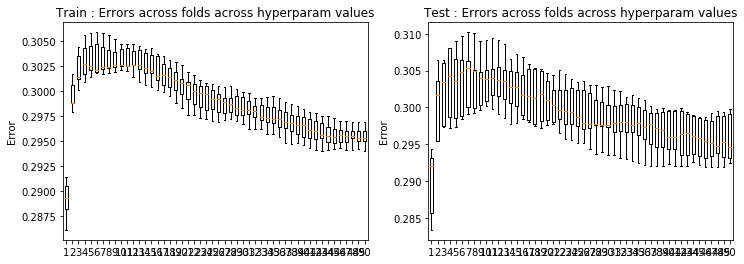

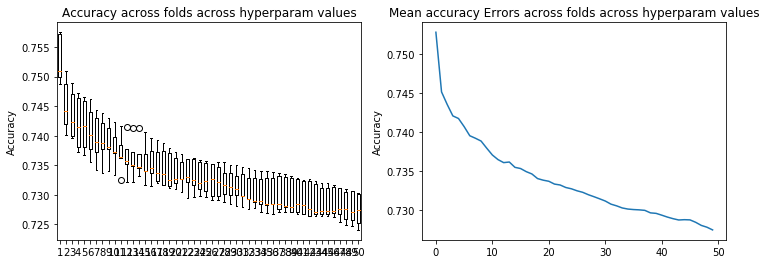

In [203]:
result_crossval(loss_tr5,loss_te5)
result_crossval_accuracy(acc5)

In [204]:
# test 6 : degree 3, class, all features, not removal of outliers, undef
lambdas = np.logspace(-1, 0, 30)
loss_tr6, loss_te6, w6, acc6 = cross_validation_demo(ss_y, ss_tX, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'class', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.37941708e-01  2.13022620e-02 -1.56030675e-01 -2.15480104e-03
  1.01722905e-02  1.23951146e-01  2.33648175e-02  7.60198131e-02
 -7.47139478e-02  7.10179388e-02  1.25229280e-01 -5.57471731e-04
 -1.88391623e-03  3.72814463e-02 -7.60850048e-04  2.60660778e-03
  2.87439149e-02  1.00222081e-03  1.75480051e-02  3.36337481e-02
 -5.97620188e-04  4.31065940e-05  3.36337687e-02 -2.21960875e-02
 -1.98884665e-02 -7.87391429e-02 -1.44229899e-02  2.06170349e-02
  1.09985180e-02  2.72706362e-03 -7.47998814e-03  4.70376680e-02
 -1.10549256e-02 -4.25031094e-02 -1.65448268e-03  2.90413497e-03
 -7.01014990e-02  3.90032485e-03  4.93509906e-03 -4.99777791e-04
 -2.45471718e-02 -1.52013491e-02  1.40231164e-01  1.17601447e-03
 -1.52013380e-02  5.34818091e-03  4.74645220e-02  5.60018915e-03
  9.04682458e-04 -5.7480

Ridge regression: w=[-2.33171944e-01  2.11032018e-02 -1.52479342e-01 -2.72134456e-03
  1.36957469e-02  1.20691521e-01  2.42342530e-02  7.23200131e-02
 -7.16414995e-02  6.83179353e-02  1.21878779e-01 -1.07049276e-03
 -2.52462030e-03  3.43892019e-02 -3.90544607e-03  2.52140955e-03
  2.64422832e-02  1.49020912e-03  1.93978692e-02  3.12334309e-02
 -3.73874170e-03  1.33912269e-03  3.12334786e-02 -2.32088278e-02
 -1.59733413e-02 -7.64166240e-02 -1.31388575e-02  2.06502338e-02
  7.94545027e-03  3.81946122e-03 -7.82115007e-03  4.73618350e-02
 -5.64216746e-03 -4.64380140e-02  2.37096160e-04  4.49645147e-03
 -6.70357674e-02 -6.14857199e-04  7.28572320e-03 -8.82033626e-04
 -2.05378709e-02 -1.43985691e-02  1.36400129e-01  2.13927801e-03
 -1.43985371e-02  7.10404772e-03  4.41856695e-02  1.93535559e-03
 -1.72662528e-03 -5.58587502e-02  6.74403987e-04 -1.32145305e-03
  4.10753327e-03  4.27995597e-02 -2.75490650e-02  1.82854553e-03
  1.57210765e-04 -2.00567437e-03 -1.87594934e-03 -3.86311489e-03
  3.0

Ridge regression: w=[-2.27861727e-01  2.12204859e-02 -1.44026070e-01  7.59200989e-04
  1.33687662e-02  1.08967265e-01  2.01694375e-02  6.65404839e-02
 -6.86067129e-02  6.99942205e-02  1.15085100e-01  6.47841883e-04
 -5.16521962e-03  2.80191938e-02 -2.90367469e-03  2.71495002e-03
  2.42156768e-02  2.88853152e-03  1.78256976e-02  2.92521173e-02
 -1.23171089e-03  6.59160310e-04  2.92521252e-02 -2.15026162e-02
 -1.91138344e-02 -6.69280176e-02 -1.02075252e-02  1.86839592e-02
  1.27063122e-02  3.22759604e-03 -6.95047626e-03  4.71018266e-02
 -4.32103115e-03 -4.66523600e-02 -2.04958206e-03  3.53480766e-03
 -6.84120855e-02  3.85601226e-03  8.25779787e-03 -2.70214757e-03
 -1.83100516e-02 -1.19757072e-02  1.34025272e-01 -1.30317050e-04
 -1.19756937e-02  7.66148910e-03  4.06542742e-02 -1.83063691e-03
 -2.11600326e-03 -5.04437547e-02  1.88751066e-03 -3.90349189e-03
  6.57163449e-03  4.48459241e-02 -2.86017584e-02  4.72486277e-03
  1.82624468e-04 -2.73076140e-03 -2.73342041e-03 -2.40160559e-03
  1.1

Ridge regression: w=[-2.22772444e-01  2.17258185e-02 -1.40318400e-01  3.18830982e-03
  1.27654886e-02  1.04170778e-01  2.41623053e-02  6.57270401e-02
 -6.89777105e-02  6.89420486e-02  1.12262590e-01 -1.88152763e-03
 -1.23364408e-03  2.48229019e-02 -2.06898879e-03  3.52502771e-03
  2.36891048e-02  3.33537302e-03  1.91618026e-02  3.13546167e-02
 -2.45703558e-03 -1.10240228e-03  3.13546395e-02 -2.24733868e-02
 -2.11537094e-02 -6.40111723e-02 -1.08637245e-02  1.89827106e-02
  1.20543321e-02  3.64773954e-03 -8.10070827e-03  4.98536637e-02
 -2.95853326e-03 -4.49356059e-02 -1.10989282e-03  2.52829870e-03
 -6.57836215e-02 -2.80864304e-05  8.18759835e-03 -1.58553432e-03
 -1.67463962e-02 -1.01301969e-02  1.30355390e-01 -5.89704128e-04
 -1.01301806e-02  8.37541119e-03  3.96238990e-02 -9.14421607e-03
 -3.44069051e-03 -4.66608794e-02  8.27416753e-04 -4.74281374e-03
  8.30851482e-03  4.56343846e-02 -2.84141286e-02  5.48780653e-03
 -7.84571766e-04 -3.88696091e-03 -3.08147213e-03 -3.54951269e-03
  1.1

Ridge regression: w=[-2.17560015e-01  2.21829663e-02 -1.32827924e-01 -9.42864298e-04
  1.55319263e-02  9.44442506e-02  2.10145303e-02  6.13268107e-02
 -6.70842354e-02  6.72997513e-02  1.04764449e-01  2.38012389e-03
 -2.99875930e-03  2.20508964e-02 -3.93392014e-03  2.26089397e-03
  2.31757745e-02  1.78218696e-03  1.63630213e-02  2.93562197e-02
 -2.50443872e-03 -1.12801800e-04  2.93562376e-02 -2.20723453e-02
 -2.18029617e-02 -5.99134254e-02 -7.47956811e-03  1.94849543e-02
  1.06541175e-02  6.71616539e-03 -1.26512041e-02  4.78998396e-02
  4.73305339e-03 -4.50472374e-02  1.77846571e-03  4.83006821e-03
 -6.48227985e-02  1.41946067e-03  8.47800512e-03 -1.03082245e-03
 -1.60145020e-02 -8.79495523e-03  1.27177879e-01  1.09119357e-03
 -8.79494359e-03  1.09613064e-02  3.81468821e-02 -7.13146346e-03
 -4.57383038e-03 -3.90343526e-02  2.19772064e-03 -4.41376115e-03
  4.86412047e-03  4.44799851e-02 -2.75264507e-02  5.64589438e-03
  9.11827658e-04  2.35100338e-03 -4.11155532e-03 -2.68751617e-03
  3.9

Ridge regression: w=[-2.07284598e-01  2.16719807e-02 -1.26376354e-01  1.12565755e-03
  1.41035306e-02  8.45843320e-02  1.96136770e-02  5.80132452e-02
 -6.45971831e-02  6.64297408e-02  9.84231122e-02  1.83722189e-04
 -2.09757049e-03  2.02724877e-02 -1.45873289e-03  1.53686621e-03
  1.77422608e-02  1.37427234e-03  1.56897688e-02  2.82064023e-02
 -6.68454383e-04 -4.85080461e-04  2.82064140e-02 -2.22588989e-02
 -2.46027470e-02 -5.49055969e-02 -6.52544714e-03  1.85131738e-02
  1.16225471e-02  7.09981540e-03 -1.43926096e-02  4.75635369e-02
  3.72584733e-03 -4.07540327e-02 -1.70872203e-03  4.68015089e-03
 -6.42631807e-02  3.00057414e-03  6.52986754e-03 -5.11554682e-04
 -1.37266354e-02 -6.54535810e-03  1.23387792e-01  7.86091737e-04
 -6.54535106e-03  1.14136681e-02  3.62435496e-02 -1.02845026e-02
 -4.76579091e-03 -3.39488393e-02  4.15214762e-03 -6.11345844e-03
  6.65952667e-03  4.50865126e-02 -2.47869097e-02  3.83463229e-03
 -1.20923269e-03  1.41966053e-03 -2.96643125e-03 -2.81802041e-03
  1.3

Ridge regression: w=[-2.01367002e-01  2.20133260e-02 -1.22556987e-01  6.09164795e-04
  1.59222494e-02  8.17066263e-02  1.98444341e-02  5.51081608e-02
 -6.24945400e-02  6.40417504e-02  9.55863186e-02 -9.04848432e-04
 -2.40571784e-03  1.82558894e-02 -3.64377124e-03  1.42062959e-03
  1.62310199e-02  1.81380252e-03  1.72962551e-02  2.62989226e-02
 -2.57212218e-03  8.21193684e-04  2.62989486e-02 -2.31749134e-02
 -2.14686658e-02 -5.32485496e-02 -5.61536972e-03  1.80909287e-02
  8.99774563e-03  7.53775306e-03 -1.46161743e-02  4.73389547e-02
  7.05051773e-03 -4.38666289e-02 -4.64876644e-06  5.14843664e-03
 -6.12625989e-02 -7.86812151e-04  7.97446725e-03 -8.74758473e-04
 -1.05335609e-02 -6.18015399e-03  1.18984582e-01  1.78545375e-03
 -6.18013612e-03  1.28241531e-02  3.41121554e-02 -1.22388761e-02
 -5.82982019e-03 -3.28369966e-02  1.89528311e-03 -5.63645842e-03
  4.56627951e-03  4.49436494e-02 -2.32417272e-02  1.23279423e-03
 -1.14532827e-04  2.72747527e-03 -2.25858460e-03 -2.48884892e-03
  3.6

Ridge regression: w=[-1.93164454e-01  2.19755889e-02 -1.14261126e-01  2.57157146e-03
  1.57654957e-02  7.29977546e-02  1.70921462e-02  5.03078315e-02
 -5.91319927e-02  6.46356903e-02  8.90867867e-02  7.47087126e-04
 -4.29858467e-03  1.35704623e-02 -2.76437136e-03  1.89034877e-03
  1.46088880e-02  2.66054230e-03  1.63312804e-02  2.47428395e-02
 -9.23511900e-04  4.57287361e-04  2.47428440e-02 -2.19520138e-02
 -2.34281254e-02 -4.64962277e-02 -3.68499558e-03  1.63395741e-02
  1.19837925e-02  6.56812300e-03 -1.34510029e-02  4.60598605e-02
  7.04085534e-03 -4.32062050e-02 -1.81479414e-03  3.39629868e-03
 -6.12801098e-02  3.22282379e-03  7.72409701e-03 -2.31813816e-03
 -8.87713888e-03 -4.70397318e-03  1.14652308e-01 -2.00596767e-04
 -4.70396526e-03  1.30680243e-02  3.00459950e-02 -1.34277584e-02
 -5.64490096e-03 -2.89300466e-02  3.56084258e-03 -6.97004417e-03
  5.56579487e-03  4.64415322e-02 -2.27178598e-02  3.56154619e-03
 -5.37991629e-04  1.72167009e-03 -2.59012441e-03 -1.21026729e-03
  2.1

Ridge regression: w=[-1.87004190e-01  2.25760439e-02 -1.11100449e-01  3.99841793e-03
  1.55998236e-02  6.95942172e-02  1.99424148e-02  4.95538012e-02
 -5.91882538e-02  6.36120371e-02  8.67534074e-02 -9.04531227e-04
 -1.38587883e-03  1.09299074e-02 -2.38144125e-03  2.19916797e-03
  1.42778349e-02  3.17704303e-03  1.75004021e-02  2.63395794e-02
 -1.74954766e-03 -8.68360358e-04  2.63395916e-02 -2.25981743e-02
 -2.44521923e-02 -4.44931173e-02 -3.90225740e-03  1.63962560e-02
  1.17234813e-02  6.75064132e-03 -1.40025992e-02  4.79777188e-02
  7.88525828e-03 -4.13346162e-02 -8.38020572e-04  1.99864191e-03
 -5.83687042e-02  4.46884003e-05  7.56977487e-03 -1.31341664e-03
 -7.47931650e-03 -3.53916359e-03  1.10402195e-01 -3.30912903e-04
 -3.53915456e-03  1.38413883e-02  2.87235887e-02 -1.83615749e-02
 -6.38754687e-03 -2.62619298e-02  2.64248026e-03 -7.14291584e-03
  6.32151158e-03  4.66941745e-02 -2.22919102e-02  3.91618100e-03
 -6.85675891e-04  9.12528103e-04 -2.83420187e-03 -2.02528370e-03
  2.0

Ridge regression: w=[-1.78889633e-01  2.30326669e-02 -1.03726611e-01  1.19345953e-03
  1.69736426e-02  6.24740146e-02  1.70323912e-02  4.58984335e-02
 -5.69939444e-02  6.14845574e-02  7.99315069e-02  2.09860131e-03
 -2.40746499e-03  9.12881766e-03 -3.58764441e-03  1.44887078e-03
  1.41363342e-02  2.02080918e-03  1.53191043e-02  2.47320384e-02
 -1.80557261e-03 -1.00400079e-04  2.47320479e-02 -2.26360959e-02
 -2.39237013e-02 -4.11246283e-02 -1.85973869e-03  1.60310661e-02
  1.03715647e-02  8.25248130e-03 -1.65548359e-02  4.53472175e-02
  1.19424378e-02 -4.07146686e-02  1.34414411e-03  3.15440234e-03
 -5.64201803e-02  8.35076452e-04  7.62096088e-03 -8.82373229e-04
 -7.29171270e-03 -2.69137060e-03  1.05517688e-01  7.20445645e-04
 -2.69136391e-03  1.56087853e-02  2.64793668e-02 -1.53498085e-02
 -6.49320776e-03 -2.16123079e-02  3.49794971e-03 -6.01732778e-03
  3.80352061e-03  4.53735630e-02 -1.88015576e-02  4.42428571e-03
  2.67075206e-04  4.26442527e-03 -3.68894430e-03 -1.65690912e-03
  3.4

Ridge regression: w=[-0.16673778  0.0224842  -0.09728108  0.00222094  0.01572012  0.05556598
  0.01584265  0.04316684 -0.05406804  0.05984416  0.0747027   0.00043502
 -0.00199881  0.00803169 -0.00176031  0.00098465  0.00990375  0.00152627
  0.01479622  0.02364506 -0.00057609 -0.00077177  0.02364507 -0.02254893
 -0.02563997 -0.03738529 -0.00116051  0.01491839  0.01098182  0.00849572
 -0.0176552   0.04397635  0.01021159 -0.03633053 -0.00155833  0.00277066
 -0.05466296  0.00214503  0.00544281 -0.00042791 -0.00557554 -0.00123613
  0.10013235  0.00047694 -0.00123613  0.01575398  0.02336712 -0.01591824
 -0.00612719 -0.01848731  0.00517724 -0.0063289   0.00314297  0.04514284
 -0.01785825  0.00271117 -0.00113418  0.00340374 -0.00260274 -0.00167254
  0.00132105  0.00175264 -0.01526226 -0.00740581 -0.00093164 -0.00196005
 -0.00740581]
Ridge regression: w=[-1.66831923e-01  2.24541391e-02 -9.64743061e-02  2.66676951e-03
  1.61600737e-02  5.57840980e-02  1.50531435e-02  4.16482557e-02
 -5.27366835e

Ridge regression: w=[-1.60140117e-01  2.29200694e-02 -9.37429276e-02  1.69041988e-03
  1.63720832e-02  5.32139490e-02  1.55817638e-02  4.08160819e-02
 -5.24452726e-02  5.75679836e-02  7.23105338e-02 -8.81852458e-04
 -2.10992385e-03  6.58875515e-03 -3.23692841e-03  7.87620178e-04
  8.90020445e-03  1.87614560e-03  1.58767622e-02  2.20574640e-02
 -1.64072963e-03  4.67680474e-04  2.20574782e-02 -2.33022530e-02
 -2.29399728e-02 -3.61832679e-02 -6.08089700e-04  1.42392119e-02
  8.68106745e-03  8.54952319e-03 -1.74343661e-02  4.31367243e-02
  1.21552717e-02 -3.84041609e-02 -1.46854509e-04  2.58169630e-03
 -5.17981477e-02 -7.98674478e-04  6.19246494e-03 -7.91363254e-04
 -3.21400572e-03 -1.11343436e-03  9.54618098e-02  1.41121735e-03
 -1.11342445e-03  1.68102646e-02  2.24043003e-02 -1.65905955e-02
 -6.12485994e-03 -1.79552328e-02  2.99059317e-03 -5.62322310e-03
  2.90422031e-03  4.43592642e-02 -1.62347799e-02  6.26617360e-04
 -3.74132736e-04  3.80964557e-03 -2.41802960e-03 -1.50966732e-03
  2.8

Ridge regression: w=[-1.50042355e-01  2.25711768e-02 -8.64432934e-02  2.44067855e-03
  1.60125477e-02  4.71255009e-02  1.38072051e-02  3.69518352e-02
 -4.87265369e-02  5.70755278e-02  6.63616284e-02  5.44592128e-04
 -3.44987831e-03  3.64276184e-03 -2.42251653e-03  1.40146443e-03
  7.84209187e-03  2.31413141e-03  1.51432317e-02  2.07298283e-02
 -6.55395495e-04  3.00135168e-04  2.07298308e-02 -2.22848277e-02
 -2.40364542e-02 -3.15586900e-02  5.69080916e-04  1.27315748e-02
  1.05015096e-02  7.54981448e-03 -1.60394971e-02  4.09166599e-02
  1.15012555e-02 -3.68659711e-02 -1.44491377e-03  8.75971003e-04
 -5.05557526e-02  2.49541694e-03  5.60271128e-03 -1.81548945e-03
 -2.14716067e-03 -2.21931816e-04  8.97449625e-02 -2.45840877e-04
 -2.21927166e-04  1.67302148e-02  1.85039595e-02 -1.60270650e-02
 -5.64211367e-03 -1.55894714e-02  4.49520183e-03 -6.24089247e-03
  2.64545499e-03  4.47796130e-02 -1.49582061e-02  2.40245710e-03
 -9.57242676e-04  2.33985605e-03 -2.33337579e-03 -4.03070998e-04
  1.8

Ridge regression: w=[-0.13862947  0.02257109 -0.08074771  0.00201673  0.01557643  0.04188516
  0.01353221  0.03528542 -0.04713592  0.05454744  0.06148654  0.00039845
 -0.00183564  0.00276465 -0.00177347  0.00081036  0.0064017   0.00150729
  0.01416001  0.02093225 -0.00047525 -0.00084916  0.02093226 -0.02242636
 -0.02502553 -0.02898907  0.00111822  0.0123179   0.01002956  0.00850608
 -0.01809529  0.03966896  0.01170219 -0.03225    -0.00137039  0.00086133
 -0.04717887  0.00166863  0.0041814  -0.0003466  -0.00180005  0.00094884
  0.08364741  0.00033807  0.00094884  0.01744432  0.01581174 -0.01579812
 -0.00545348 -0.0123773   0.00533938 -0.00521391  0.00086023  0.04322639
 -0.01318444  0.00206227 -0.00107307  0.00288971 -0.00235321 -0.00112607
  0.00087774  0.00150795 -0.01130734 -0.00637685 -0.00067528 -0.00171056
 -0.00637685]
Ridge regression: w=[-1.38707742e-01  2.25395479e-02 -8.00868182e-02  2.20887327e-03
  1.57754766e-02  4.19692858e-02  1.29701833e-02  3.40247288e-02
 -4.60073905e

Ridge regression: w=[-1.32255228e-01  2.29377359e-02 -7.77341991e-02  2.62607925e-03
  1.57373136e-02  3.98243552e-02  1.46022973e-02  3.33557067e-02
 -4.57585604e-02  5.36610653e-02  5.94793399e-02 -4.23216184e-04
 -1.26306437e-03  1.84417942e-05 -2.23095401e-03  1.27252314e-03
  6.46562927e-03  2.67044274e-03  1.56382793e-02  2.06922282e-02
 -1.09610113e-03 -6.33314974e-04  2.06922338e-02 -2.25494569e-02
 -2.42048401e-02 -2.74903171e-02  1.34208837e-03  1.15275588e-02
  9.86749691e-03  7.59856529e-03 -1.62317443e-02  3.97632132e-02
  1.24592907e-02 -3.30368767e-02 -5.09509266e-04 -1.21459717e-03
 -4.45769268e-02  6.84722956e-05  4.82642396e-03 -9.17131218e-04
  1.77460070e-04  1.25517355e-03  7.88079436e-02 -1.01968112e-04
  1.25517786e-03  1.78856857e-02  1.44778475e-02 -1.83379709e-02
 -5.46284316e-03 -1.19553541e-02  3.87265552e-03 -5.49993972e-03
  2.37158737e-03  4.33413184e-02 -1.24349045e-02  2.23558458e-03
 -6.38167803e-04  1.35197090e-03 -2.40018393e-03 -8.51276973e-04
  1.4

Ridge regression: w=[-1.22672085e-01  2.28996750e-02 -7.13913769e-02  1.04468987e-03
  1.59129132e-02  3.52327819e-02  1.22624100e-02  3.05342575e-02
 -4.30230965e-02  5.08978079e-02  5.38451998e-02  1.38907643e-03
 -1.77398531e-03 -6.73278386e-04 -2.81050264e-03  8.72820037e-04
  6.49536531e-03  1.86653384e-03  1.38151162e-02  1.93138539e-02
 -1.08654369e-03 -1.40240448e-04  1.93138582e-02 -2.23973920e-02
 -2.29234947e-02 -2.47983234e-02  2.39079197e-03  1.07262516e-02
  8.57507315e-03  8.11865572e-03 -1.69541541e-02  3.64935576e-02
  1.40449636e-02 -3.15485175e-02  8.46377127e-04 -8.00318810e-04
 -4.18016569e-02  3.18051582e-04  4.64251483e-03 -5.99527780e-04
 -5.12110722e-06  1.72764071e-03  7.30361424e-02  3.85759560e-04
  1.72764395e-03  1.85929121e-02  1.24112793e-02 -1.50712106e-02
 -4.75007414e-03 -9.77339309e-03  4.06262164e-03 -4.03696276e-03
  6.67545840e-04  4.13045597e-02 -8.53371120e-03  2.79838981e-03
 -2.13357970e-04  2.43282675e-03 -2.89589570e-03 -7.91493215e-04
  1.8

Ridge regression: w=[-1.10901006e-01  2.19742052e-02 -6.54776737e-02  1.47170317e-03
  1.47902192e-02  3.09834315e-02  1.08696588e-02  2.74171526e-02
 -3.91809269e-02  4.85395371e-02  4.93657542e-02  2.62398051e-04
 -2.73958605e-03 -1.51984386e-03 -2.03017875e-03  1.11671825e-03
  3.89563903e-03  1.92467577e-03  1.36619637e-02  1.73166690e-02
 -4.76316445e-04  1.87688830e-04  1.73166705e-02 -2.16413290e-02
 -2.26631028e-02 -2.19470644e-02  2.87424721e-03  9.22715400e-03
  8.63728799e-03  7.40723509e-03 -1.59369637e-02  3.36677552e-02
  1.21308417e-02 -2.95754169e-02 -1.06873300e-03 -1.54806572e-03
 -3.95005580e-02  1.85458050e-03  3.57538836e-03 -1.34587725e-03
  1.63971834e-03  2.21110069e-03  6.66923759e-02 -2.44262173e-04
  2.21110354e-03  1.80661358e-02  9.65114596e-03 -1.40742874e-02
 -3.90834246e-03 -9.02270671e-03  4.42756169e-03 -4.07261455e-03
 -2.49261965e-04  4.01510497e-02 -8.70526795e-03  1.51308045e-03
 -1.05843159e-03  9.69502644e-04 -1.99676542e-03  1.47344812e-05
  1.2

Ridge regression: w=[-1.04932459e-01  2.21849350e-02 -6.35191755e-02  1.58872453e-03
  1.47479844e-02  2.92575065e-02  1.20013513e-02  2.68201166e-02
 -3.88199554e-02  4.73180578e-02  4.79129895e-02 -3.66870089e-04
 -1.12735968e-03 -2.95349451e-03 -2.00562087e-03  9.94182770e-04
  3.89903213e-03  2.32024055e-03  1.43261021e-02  1.79967787e-02
 -8.62018377e-04 -5.39715097e-04  1.79967826e-02 -2.17926650e-02
 -2.29013918e-02 -2.12676651e-02  2.90477555e-03  8.91854732e-03
  8.46521767e-03  7.39039319e-03 -1.57810610e-02  3.38844182e-02
  1.25618834e-02 -2.78503218e-02 -3.67878251e-04 -2.72673131e-03
 -3.68243786e-02  5.22864043e-05  3.43782383e-03 -7.20148376e-04
  2.47877826e-03  2.70739795e-03  6.27575670e-02 -3.42366197e-05
  2.70740090e-03  1.84451483e-02  8.51197031e-03 -1.59231368e-02
 -3.96425406e-03 -8.15899785e-03  3.84136145e-03 -3.82648995e-03
  3.51806859e-04  3.94771353e-02 -8.08545364e-03  1.56641468e-03
 -5.96871594e-04  3.38794121e-04 -2.10837540e-03 -4.94908142e-04
  1.0

Ridge regression: w=[-0.09587525  0.02178118 -0.05789433  0.0004853   0.01457275  0.02565709
  0.01000197  0.02443252 -0.03602752  0.04432677  0.04302417  0.00100805
 -0.00148574 -0.00318157 -0.00236269  0.00069871  0.00397025  0.00165484
  0.01266519  0.01672473 -0.00081362 -0.00015423  0.01672473 -0.02134733
 -0.02143457 -0.01892251  0.00363353  0.00811922  0.00725128  0.0076617
 -0.01588762  0.03060331  0.01341188 -0.02614794  0.00064278 -0.00237835
 -0.03398986  0.00016303  0.00325492 -0.00045161  0.00219501  0.0030391
  0.05729514  0.00027309  0.0030391   0.0186026   0.00683756 -0.01289617
 -0.00312262 -0.00670449  0.00377136 -0.00245501 -0.00093888  0.03710222
 -0.00466495  0.0020734  -0.0003192   0.00093034 -0.00243336 -0.00050179
  0.00121579  0.00165654 -0.00554479 -0.00391589  0.00016977 -0.00021708
 -0.00391589]
Ridge regression: w=[-9.45533488e-02  2.16140759e-02 -5.79484544e-02  7.20732611e-04
  1.40732626e-02  2.57101045e-02  9.71090480e-03  2.43835396e-02
 -3.60068303e-0

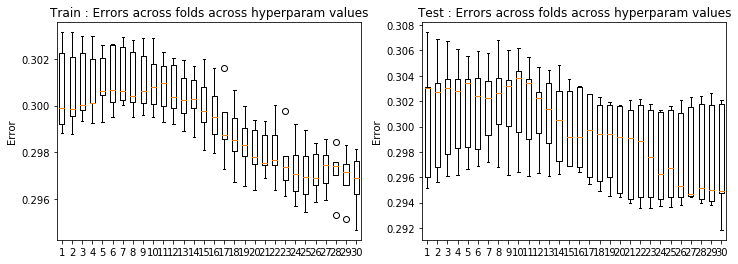

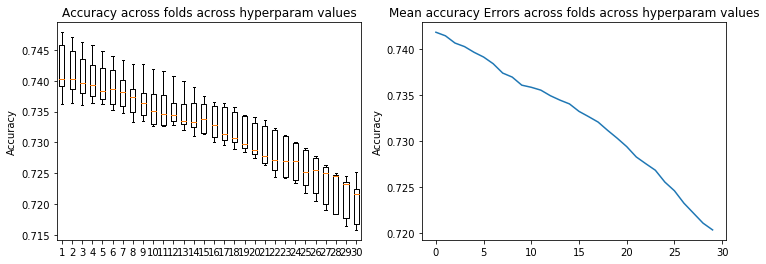

In [205]:
result_crossval(loss_tr6,loss_te6)
result_crossval_accuracy(acc6)

In [206]:
# test 7 : degree 1, classification, all features, not removal of outliers, undef
lambdas = np.logspace(-3, 0, 30)
loss_tr7, loss_te7, w7, acc7 = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'classification', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  3.10690809e-02 -2.18747209e-01 -2.44189959e-01
 -9.10337307e-02  2.36203300e-01  5.39884325e-02  1.24622063e-01
 -1.73080251e-01  1.40392389e-01  1.51625650e-01  3.42527923e-03
 -3.83143387e-03  2.18983965e-01 -6.05423775e-03 -1.84193769e-04
  8.30590475e-02  2.25966684e-03 -4.42380110e-02  5.43918947e-03
 -8.51833777e-04 -5.16214795e-03  5.44228323e-03]
Ridge regression: w=[-2.85121014e-01  3.00972027e-02 -2.18009707e-01 -2.42053735e-01
 -8.21976878e-02  2.34665477e-01  5.27407907e-02  1.19234911e-01
 -1.60975780e-01  1.42305540e-01  1.56359613e-01  4.84378005e-03
 -5.93283184e-03  2.10512538e-01 -7.54202480e-03  2.07768247e-03
  8.50566200e-02  4.23283567e-03 -4.07504305e-02 -1.33473168e-05
 -5.13301377e-04 -1.10463406e-03 -1.18026900e-05]
Ridge regression: w=[-0.28705164  

 -5.16777551e-04 -1.09260441e-03  1.88048394e-04]
Ridge regression: w=[-0.28614184  0.03514658 -0.21668612 -0.24198049 -0.08161129  0.23485605
  0.053548    0.11969545 -0.16214727  0.13964167  0.15645669  0.00871051
 -0.00311007  0.20683255 -0.01031506  0.00136143  0.08973798  0.00488465
 -0.04325275  0.00254004 -0.0015554  -0.00075685  0.00254133]
Ridge regression: w=[-2.82196607e-01  3.26561981e-02 -2.18308870e-01 -2.45869836e-01
 -7.63857102e-02  2.38598230e-01  5.13046302e-02  1.20561910e-01
 -1.64122310e-01  1.36129310e-01  1.58387027e-01  9.35344803e-04
 -3.12869758e-03  2.12981001e-01 -8.76034156e-03 -4.44977999e-04
  8.35126937e-02  3.11040562e-03 -3.89291341e-02 -7.81974367e-04
 -2.33718601e-04 -1.68204108e-03 -7.79933306e-04]
Ridge regression: w=[-0.28251736  0.03261786 -0.21682623 -0.23555317 -0.09090855  0.23135578
  0.05613022  0.11887965 -0.15854255  0.14344501  0.15546934  0.00250337
 -0.00160944  0.19923136 -0.00628169  0.00203552  0.08448948  0.0062128
 -0.03549538  0.

 -0.03350062  0.00599266 -0.00112362 -0.00171282  0.00599311]
Accuracy = [0.7063451122001547, 0.7131802940417848, 0.7068609749806551, 0.7169847820479752, 0.7116327057002837]
Ridge regression: w=[-2.80739687e-01  3.22480791e-02 -2.11360473e-01 -2.19519404e-01
 -7.85535218e-02  2.18090241e-01  5.28653492e-02  1.15162697e-01
 -1.54579865e-01  1.39248672e-01  1.50764876e-01  3.30987082e-03
 -3.95294166e-03  1.89811250e-01 -6.04540430e-03 -1.41426619e-04
  7.48905486e-02  2.30866237e-03 -4.01095770e-02  5.97521866e-03
 -8.41347820e-04 -5.04577985e-03  5.97557412e-03]
Ridge regression: w=[-0.28089819  0.03140817 -0.21050626 -0.21764818 -0.07079133  0.21665776
  0.05157824  0.11018503 -0.14360584  0.14107479  0.15488039  0.00454766
 -0.00605797  0.18215868 -0.00736549  0.00204436  0.07688436  0.00421968
 -0.03666409  0.00097014 -0.00052526 -0.00104719  0.00097032]
Ridge regression: w=[-0.28280022  0.03597998 -0.21076087 -0.22283356 -0.07240586  0.2207563
  0.05258739  0.11258771 -0.14845408  

Ridge regression: w=[-0.27195021  0.03517848 -0.19948534 -0.18407    -0.06188046  0.19309207
  0.05325076  0.09895237 -0.12527239  0.13940884  0.14911641  0.00213922
 -0.00199209  0.14143015 -0.00614697  0.00181242  0.0650656   0.0060846
 -0.02691173  0.00727327 -0.00125857 -0.0016543   0.0072734 ]
Accuracy = [0.7089889089502193, 0.7147923652308485, 0.7076992519989683, 0.716726850657725, 0.7107299458344081]
Ridge regression: w=[-2.70351355e-01  3.46434745e-02 -1.95688457e-01 -1.73241073e-01
 -5.54184553e-02  1.83774976e-01  5.00007703e-02  9.75108336e-02
 -1.26105861e-01  1.35834223e-01  1.43721501e-01  3.03379096e-03
 -4.12575521e-03  1.39074816e-01 -5.97186750e-03 -1.56595672e-05
  5.83498523e-02  2.40794195e-03 -3.12274553e-02  7.78905821e-03
 -8.02926518e-04 -4.76691104e-03  7.78916222e-03]
Ridge regression: w=[-0.27050399  0.03403129 -0.19464049 -0.17189848 -0.04954957  0.18257168
  0.04869143  0.09331377 -0.11723964  0.13746376  0.14671185  0.00391499
 -0.00622833  0.13298706 -0.

 -5.05377455e-04 -9.71583673e-04  8.32639523e-03]
Ridge regression: w=[-0.24789425  0.03964276 -0.17091997 -0.11493175 -0.02701601  0.13927439
  0.04654577  0.07277756 -0.0945903   0.12962032  0.12717912  0.00147967
 -0.00240337  0.07349478 -0.00574427  0.00158133  0.03746274  0.00576978
 -0.01228076  0.01171421 -0.00141233 -0.00149523  0.01171426]
Accuracy = [0.711439257157596, 0.7149213309259737, 0.7079571833892184, 0.7169202992004127, 0.7084085633221563]
Ridge regression: w=[-0.24100769  0.03970494 -0.16360145 -0.09901916 -0.02037047  0.12592857
  0.04212042  0.0689518  -0.09304684  0.12464374  0.11871493  0.00228803
 -0.00414668  0.06596021 -0.00553005  0.00033135  0.02970413  0.00256118
 -0.01339679  0.01285335 -0.00068035 -0.00406418  0.01285338]
Ridge regression: w=[-0.24114376  0.03938551 -0.16233464 -0.09851207 -0.0172235   0.12510845
  0.04096573  0.06606161 -0.08747126  0.1258329   0.12002886  0.00259556
 -0.00618628  0.06235958 -0.00600586  0.00201222  0.03136996  0.0039844

Accuracy = [0.7107299458344081, 0.7151147794686613, 0.7033789012122775, 0.7169202992004127, 0.705313386639154]
Ridge regression: w=[-0.17758621  0.04419233 -0.11887665 -0.03636437  0.00686338  0.06704284
  0.02769564  0.0421051  -0.06851597  0.0986549   0.0805405   0.00097047
 -0.00344006  0.00992325 -0.00423603  0.00078753  0.00524471  0.00249169
  0.0058639   0.01847256 -0.00046788 -0.00286661  0.01847257]
Ridge regression: w=[-0.17768647  0.04399436 -0.11768672 -0.03644933  0.00791884  0.06650475
  0.02700377  0.04050791 -0.06577171  0.09921524  0.0805847   0.00088932
 -0.00516626  0.00844786 -0.00436447  0.00187426  0.00631728  0.00333981
  0.0072196   0.01695719 -0.00045132 -0.00019916  0.0169572 ]
Ridge regression: w=[-0.17888963  0.04581947 -0.11783977 -0.03752059  0.00861656  0.06748358
  0.02731664  0.04164126 -0.06725628  0.09861377  0.08121715  0.00346554
 -0.00310519  0.00845664 -0.0059322   0.00090114  0.00863313  0.0036506
  0.00620063  0.01832974 -0.00126242 -0.00057465 

Ridge regression: w=[-9.51766830e-02  3.61186331e-02 -7.15035685e-02 -9.96497166e-03
  1.54712876e-02  2.70723500e-02  1.29635456e-02  2.50325865e-02
 -4.44016033e-02  6.12726306e-02  4.65989141e-02 -2.88723017e-05
 -2.05173843e-03 -8.46532976e-03 -2.48174115e-03  8.25933021e-04
 -2.03230920e-03  1.82689656e-03  1.32954211e-02  1.83987302e-02
 -2.61850491e-04 -1.60788202e-03  1.83987328e-02]
Ridge regression: w=[-9.52304187e-02  3.59132497e-02 -7.07242064e-02 -1.01880480e-02
  1.56034660e-02  2.67168957e-02  1.27157145e-02  2.42451438e-02
 -4.31987996e-02  6.13573839e-02  4.62445098e-02 -1.61101741e-04
 -3.12052365e-03 -8.90322327e-03 -2.53723908e-03  1.28756126e-03
 -1.53701921e-03  2.13083310e-03  1.36658924e-02  1.76746042e-02
 -3.90149084e-04 -3.77538309e-05  1.76746053e-02]
Ridge regression: w=[-0.09587525  0.03677835 -0.07101041 -0.01048582  0.01631111  0.02695856
  0.01292413  0.02502807 -0.04396254  0.06126672  0.04673359  0.00108797
 -0.00194767 -0.00901003 -0.00316166  0.0007

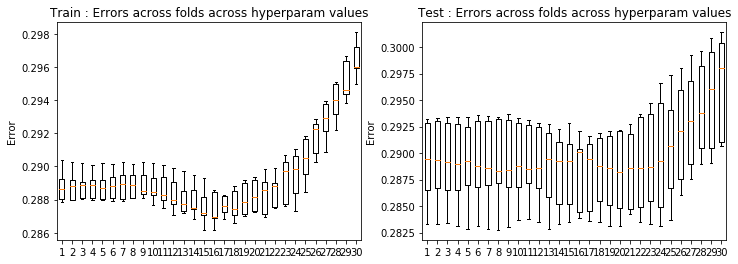

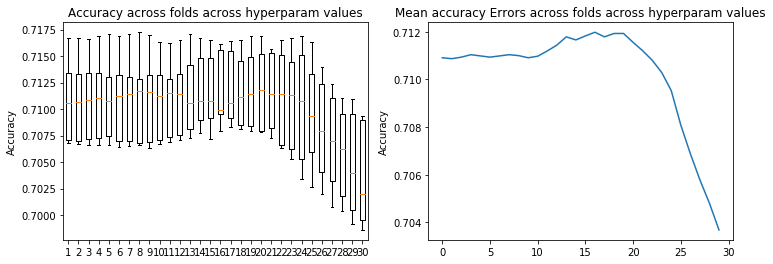

In [207]:
result_crossval(loss_tr7,loss_te7)
result_crossval_accuracy(acc7)

In [208]:
# test 8 : degree 2, classification, all features, not removal of outliers, undef
lambdas = np.logspace(-3, 0, 30)
loss_tr8, loss_te8, w8,acc8 = cross_validation_demo(ss_y, ss_tX, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'classification', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  6.52288156e-02 -2.82025503e-01 -1.96192696e-01
 -7.85222888e-02  6.39397639e-01  2.89263312e-02  1.80530339e-01
 -1.52135913e-01  1.00797861e-01  2.64928664e-01  2.29099991e-03
 -3.10490948e-03  1.89811042e-01 -1.21977284e-03 -2.39997297e-03
  5.90405026e-02  3.65664268e-03  5.18786658e-02  4.70790614e-02
 -2.28132759e-03 -3.82067224e-03  4.70808664e-02  3.63340070e-02
  1.29631923e-01  3.59057156e-02  1.32495267e-01 -4.38273594e-01
  6.01485876e-03  1.57305823e-01  8.64779487e-02  2.31101063e-02
 -2.12827154e-01 -3.71500473e-02 -7.70954139e-04 -1.94355072e-01
 -7.00492916e-02  6.69046729e-03 -2.12143196e-02 -2.62486408e-04
 -1.05756658e-01 -1.26173035e-01  1.61039063e-01  2.31108448e-03
 -1.26172379e-01]
Ridge regression: w=[-2.85121014e-01  6.15809217e-02 -2.78195684e-01 -1

Ridge regression: w=[-2.84774134e-01  5.25540268e-02 -2.76565261e-01 -1.76599487e-01
 -6.30227414e-02  6.16532520e-01  2.53994941e-02  1.75213723e-01
 -1.21975296e-01  1.03852701e-01  2.78098733e-01  5.26144806e-03
 -5.14017372e-03  1.68808220e-01 -4.43167967e-03 -7.23262841e-05
  6.02645320e-02  4.76534056e-03  4.17485293e-02  4.37894797e-02
 -1.19133561e-03 -7.14092908e-04  4.37900246e-02  2.54364729e-02
  1.23993611e-01  2.87281454e-02  1.12627131e-01 -4.24800190e-01
  8.74117307e-03  1.11570269e-01  6.98654127e-02  2.46493755e-02
 -2.06878060e-01 -4.31613946e-02 -2.14060427e-03 -1.71552118e-01
 -7.00620639e-02  5.22285938e-03 -1.85021506e-02 -3.37988893e-03
 -8.50891603e-02 -1.10665239e-01  1.60639658e-01 -1.42956773e-04
 -1.10664348e-01]
Ridge regression: w=[-2.86702410e-01  5.00823496e-02 -2.71894836e-01 -1.93296756e-01
 -6.34985928e-02  6.13440292e-01  3.26266924e-02  1.79609860e-01
 -1.14653287e-01  1.00427750e-01  3.03146633e-01  8.37441462e-03
 -1.94089208e-03  1.57758243e-01

Ridge regression: w=[-2.82196607e-01  3.73619417e-02 -2.74654863e-01 -1.63023967e-01
 -3.75131422e-02  5.61315304e-01  3.60926404e-02  1.66443441e-01
 -1.21562828e-01  9.93254719e-02  2.65965056e-01  3.62045288e-04
 -2.12458558e-03  1.63038529e-01 -4.11187087e-03 -1.09977014e-03
  5.81543472e-02  3.98551167e-03  4.21717600e-02  3.88982502e-02
 -1.24990446e-03 -5.95662996e-04  3.89000642e-02  6.51463863e-03
  1.22739484e-01  5.23010517e-03  6.79943658e-02 -3.66831130e-01
 -3.50115173e-03  8.36943296e-02  5.52404783e-02  2.69157463e-02
 -1.79890050e-01 -4.30264741e-02  1.21859946e-03 -1.42895455e-01
 -6.73994315e-02  3.78131500e-04 -1.90774699e-02 -7.38437890e-04
 -8.93750968e-02 -8.04980023e-02  1.58773839e-01  2.91079301e-03
 -8.04968872e-02]
Ridge regression: w=[-2.82517357e-01  3.35655444e-02 -2.68980681e-01 -1.46269523e-01
 -5.60967323e-02  5.61865131e-01  3.64029435e-02  1.71834445e-01
 -1.36536137e-01  1.05959954e-01  2.70363363e-01  1.56218068e-03
 -1.41069424e-03  1.74012016e-01

Ridge regression: w=[-2.81630665e-01  2.46912602e-02 -2.65441716e-01 -1.22476338e-01
 -4.58951655e-02  4.98549428e-01  3.71301164e-02  1.64213487e-01
 -1.27469329e-01  1.07583426e-01  2.64843004e-01  1.78441948e-03
 -1.49716984e-03  1.56857319e-01 -2.68508932e-03  8.91354380e-04
  6.59715962e-02  6.58188839e-03  4.37385503e-02  4.08042233e-02
 -1.30426298e-03 -1.03317902e-03  4.08049733e-02 -7.21643404e-03
  1.05547920e-01 -1.92120927e-02  4.55200129e-02 -3.21397580e-01
  5.99285498e-04  4.30505259e-02  7.20431407e-02  3.11172751e-02
 -1.74072673e-01 -4.27835405e-02 -1.90538727e-03 -1.39896951e-01
 -6.94234794e-02 -3.90789425e-04 -2.07656098e-02 -2.36549421e-03
 -8.79393365e-02 -5.64382765e-02  1.58682360e-01 -1.77668754e-03
 -5.64377907e-02]
Accuracy = [0.7454862006706217, 0.7549006964147537, 0.7461955119938096, 0.7546427650245034, 0.7480655145731235]
Ridge regression: w=[-2.82536117e-01  2.80915222e-02 -2.71307349e-01 -1.26171816e-01
 -4.20218213e-02  4.56449138e-01  3.23273693e-02  

Ridge regression: w=[-2.80898190e-01  2.18681141e-02 -2.59727374e-01 -9.50445929e-02
 -2.53620333e-02  3.91399246e-01  2.81510014e-02  1.46887845e-01
 -1.08207457e-01  1.09669951e-01  2.46154917e-01  5.77820522e-03
 -5.45049785e-03  1.22445977e-01 -5.17674499e-03  2.92041208e-04
  5.83523682e-02  4.60137230e-03  3.01263638e-02  3.96333179e-02
 -1.31474629e-03 -5.45145148e-04  3.96334075e-02 -1.17421077e-02
  9.81259781e-02 -3.89730561e-02  1.86706918e-02 -2.29797209e-01
  6.53762669e-03  1.32223379e-02  4.60604656e-02  3.28962918e-02
 -1.42627455e-01 -4.62267318e-02 -2.13432981e-03 -8.27634510e-02
 -7.30273795e-02  5.26532519e-03 -7.36726975e-03 -3.40160968e-03
 -6.94939539e-02 -4.96414626e-02  1.60199969e-01  1.31804073e-04
 -4.96413173e-02]
Ridge regression: w=[-2.82800220e-01  2.27384027e-02 -2.55891005e-01 -1.06172494e-01
 -2.43014881e-02  3.88755185e-01  3.47271902e-02  1.50641022e-01
 -1.09616825e-01  1.06160267e-01  2.56234602e-01  8.95723683e-03
 -2.28835827e-03  1.19576457e-01

 -4.25140589e-02]
Ridge regression: w=[-2.76074492e-01  1.60702108e-02 -2.49216185e-01 -7.35333457e-02
 -9.52579065e-03  3.15960956e-01  3.55441713e-02  1.35736345e-01
 -1.05379865e-01  1.06064360e-01  2.24392258e-01  1.02677132e-03
 -2.51850027e-03  1.07687182e-01 -5.26175197e-03 -8.06619227e-04
  5.20642747e-02  3.88057006e-03  3.01062473e-02  4.01994637e-02
 -1.36116290e-03 -2.46537586e-04  4.01998109e-02 -2.29152039e-02
  8.79456751e-02 -6.64423899e-02 -7.23369863e-03 -1.58319825e-01
 -2.26735524e-03  2.62294491e-03  2.99104026e-02  3.64196059e-02
 -1.11819683e-01 -4.63276119e-02  8.12683566e-04 -5.03273843e-02
 -7.07189657e-02  7.23297277e-05  3.68084728e-04 -1.00073853e-03
 -7.10071583e-02 -3.89014206e-02  1.57488957e-01  2.81940741e-03
 -3.89012066e-02]
Ridge regression: w=[-0.27638828  0.01441598 -0.24528719 -0.05663764 -0.02072452  0.31303518
  0.03631721  0.13832368 -0.10814054  0.11138245  0.23166904  0.00236054
 -0.00175974  0.10563482 -0.00349892  0.00104392  0.05698466  0

Ridge regression: w=[-0.27035135  0.01747897 -0.22658817 -0.0377456  -0.00598633  0.21472312
  0.02935773  0.11913435 -0.10293225  0.11088513  0.1936041   0.00359394
 -0.00347339  0.08046336 -0.00295949 -0.00154639  0.04617985  0.00305777
  0.02402857  0.04349852 -0.00236753 -0.0029795   0.04349859 -0.02519135
  0.06369958 -0.08656175 -0.0223717  -0.07877738  0.00714277 -0.00825825
  0.02316403  0.04091671 -0.08463472 -0.04300746 -0.00144733 -0.01866772
 -0.07481334  0.00528021  0.00743438 -0.00052312 -0.06386922 -0.03298406
  0.15690351  0.00183708 -0.03298403]
Ridge regression: w=[-2.70503992e-01  1.80661950e-02 -2.24013658e-01 -3.54703365e-02
 -1.38284607e-03  2.18418012e-01  2.58001590e-02  1.16102371e-01
 -9.81887772e-02  1.12542586e-01  1.96453543e-01  5.68943315e-03
 -5.56956351e-03  7.62491758e-02 -5.49803410e-03  6.99476996e-04
  4.57952274e-02  4.49256807e-03  2.51773211e-02  4.01458510e-02
 -1.33601332e-03 -2.95255514e-04  4.01458785e-02 -2.30190879e-02
  6.25079805e-02 -8.3

Ridge regression: w=[-2.63778316e-01  2.17315822e-02 -2.01513881e-01 -2.52450694e-02
  8.12011408e-03  1.68570373e-01  2.82888900e-02  1.04396091e-01
 -9.67983966e-02  1.09459273e-01  1.71551298e-01  8.38105286e-03
 -2.54353880e-03  6.05405224e-02 -7.93433218e-03  3.93186073e-04
  4.28873702e-02  4.51512170e-03  2.27287235e-02  4.23027088e-02
 -2.26563830e-03 -1.80207267e-04  4.23027709e-02 -2.55026539e-02
  4.40931739e-02 -9.04543847e-02 -2.68165718e-02 -4.32619754e-02
  6.68378562e-03 -1.16617962e-02  1.27845491e-02  4.42872749e-02
 -6.33544014e-02 -4.79807361e-02  2.36616719e-03  8.38006018e-04
 -7.27563330e-02  2.59753686e-03  1.64140631e-02 -1.15784125e-03
 -5.59546378e-02 -3.33419405e-02  1.51776765e-01  1.95863464e-03
 -3.33419032e-02]
Ridge regression: w=[-2.60141422e-01  1.91710178e-02 -2.03983711e-01 -2.46711475e-02
  9.28854993e-03  1.69995188e-01  2.92514621e-02  1.03613020e-01
 -9.39951408e-02  1.07932675e-01  1.70882286e-01  9.85996787e-04
 -2.70345715e-03  6.29793965e-02

Ridge regression: w=[-0.24100769  0.02315471 -0.16688884 -0.00953318  0.01413756  0.11281521
  0.02254688  0.08336207 -0.08367344  0.10757522  0.13483704  0.00315347
 -0.00322913  0.0409512  -0.0032504  -0.00072033  0.02903437  0.0029078
  0.01850239  0.03801614 -0.00190081 -0.00241849  0.03801616 -0.02813377
  0.01953678 -0.08464274 -0.02554465 -0.01053145  0.01312459 -0.00913104
  0.00048699  0.0476722  -0.03631538 -0.04385485 -0.00178979  0.01087568
 -0.07184562  0.00397474  0.01244944 -0.00052335 -0.04116073 -0.02561722
  0.1420105   0.00116918 -0.02561721]
Ridge regression: w=[-2.41143763e-01  2.32727946e-02 -1.65784086e-01 -8.38796743e-03
  1.63675440e-02  1.13451326e-01  2.04469497e-02  8.05845202e-02
 -8.16347982e-02  1.08979825e-01  1.35481504e-01  4.38266492e-03
 -5.27986217e-03  3.79420488e-02 -5.01049478e-03  1.14926729e-03
  2.87994685e-02  4.30879401e-03  2.04140500e-02  3.53513791e-02
 -1.13090880e-03 -1.45249262e-06  3.53513896e-02 -2.71617961e-02
  2.00831875e-02 -8.27

Ridge regression: w=[-2.18625444e-01  2.63696044e-02 -1.41810018e-01 -6.59565584e-03
  1.97140609e-02  8.76914667e-02  2.08873012e-02  6.71762058e-02
 -7.37686994e-02  1.00558081e-01  1.11885813e-01  1.00359206e-04
 -2.65476338e-03  2.74311671e-02 -5.32617749e-03 -1.14391349e-04
  2.13727282e-02  3.56515600e-03  1.86440508e-02  3.17726702e-02
 -1.15708047e-03  2.18612363e-04  3.17727058e-02 -3.05548046e-02
  7.55665233e-03 -7.40221131e-02 -2.00393723e-02 -2.59978939e-04
  9.69318661e-03 -5.72276209e-03 -4.96693234e-03  4.88107007e-02
 -1.80311886e-02 -4.67611760e-02 -4.46130972e-05  1.28127086e-02
 -6.57088183e-02 -7.51848730e-04  1.30552338e-02 -8.69091451e-04
 -2.76980710e-02 -2.08485569e-02  1.28544021e-01  1.92823673e-03
 -2.08485326e-02]
Ridge regression: w=[-2.18873938e-01  2.63657060e-02 -1.40786366e-01 -3.06719643e-03
  1.87479617e-02  8.73234690e-02  2.26283310e-02  6.76740911e-02
 -7.37964455e-02  1.03451514e-01  1.12708975e-01  1.64939575e-03
 -1.85133403e-03  2.41377658e-02

Accuracy = [0.7351044622130514, 0.737425844725303, 0.7321382512251741, 0.7411658498839309, 0.7354913592984266]
Ridge regression: w=[-0.17758621  0.02860059 -0.1057977  -0.00248308  0.01928518  0.05641602
  0.01623048  0.04851128 -0.05891417  0.08909825  0.07995977  0.00170582
 -0.00264423  0.01222106 -0.00293342  0.00021354  0.01196612  0.00254675
  0.01515123  0.02692936 -0.00106215 -0.0018325   0.02692937 -0.02999485
 -0.01278854 -0.05129349 -0.01065915  0.00738726  0.01386305 -0.0003216
 -0.0144177   0.04657779 -0.00394402 -0.03867935 -0.00168198  0.00713038
 -0.05846734  0.0023809   0.00535088 -0.00038093 -0.01581407 -0.01097405
  0.10621082  0.00051263 -0.01097404]
Ridge regression: w=[-1.77686474e-01  2.85938733e-02 -1.05234782e-01 -2.37014129e-03
  1.98600767e-02  5.63949942e-02  1.52859844e-02  4.66541911e-02
 -5.74519962e-02  8.99198204e-02  7.98303927e-02  2.03384829e-03
 -4.36558991e-03  1.05020094e-02 -3.74715565e-03  1.40378834e-03
  1.19699474e-02  3.53836430e-03  1.62804

Ridge regression: w=[-1.43350964e-01  2.96160521e-02 -8.57536349e-02 -2.56973429e-03
  1.85209111e-02  4.17335522e-02  1.35760530e-02  3.65705505e-02
 -4.93466726e-02  7.54218384e-02  6.30754113e-02 -9.21406384e-04
 -2.21522682e-03  3.91936826e-03 -4.04626020e-03  1.79820151e-04
  6.27983395e-03  2.73326675e-03  1.51635933e-02  2.15071354e-02
 -7.86613321e-04  1.22947314e-04  2.15071468e-02 -3.06931983e-02
 -1.64871373e-02 -3.87817295e-02 -4.15051776e-03  7.68359038e-03
  9.25965366e-03  3.12395709e-03 -1.53825189e-02  4.18082149e-02
  4.93469686e-03 -3.65443863e-02 -2.41806127e-04  3.10415355e-03
 -4.83504388e-02 -7.58621420e-04  4.42577281e-03 -6.78544565e-04
 -5.82305617e-03 -5.09502241e-03  8.55366460e-02  1.24505708e-03
 -5.09501427e-03]
Ridge regression: w=[-1.43513900e-01  2.96446484e-02 -8.60054137e-02 -1.87948608e-03
  1.86288652e-02  4.16002206e-02  1.53103402e-02  3.67065272e-02
 -4.92921664e-02  7.74450056e-02  6.31689799e-02  3.22863415e-04
 -1.57355977e-03  1.86779388e-03

Ridge regression: w=[-9.52304187e-02  2.64439004e-02 -6.00002210e-02 -1.71433315e-03
  1.54581901e-02  2.44182490e-02  9.48101585e-03  2.38434214e-02
 -3.56163031e-02  5.63298663e-02  4.18469562e-02  2.64069710e-04
 -2.78387692e-03 -3.39441616e-03 -2.28291968e-03  1.12786533e-03
  1.52178627e-03  2.14860350e-03  1.27960757e-02  1.65455942e-02
 -4.14903951e-04  4.43175987e-05  1.65455955e-02 -2.65942946e-02
 -2.16775223e-02 -2.26584245e-02  1.97540322e-03  5.84460703e-03
  8.41644248e-03  4.97936673e-03 -1.55086147e-02  3.11826323e-02
  8.73511109e-03 -2.67865165e-02 -9.11574455e-04 -2.94121340e-03
 -3.53515397e-02  1.62804283e-03  1.64807624e-03 -1.14129811e-03
  9.13579419e-04  1.13010020e-03  5.72948763e-02 -2.44726577e-04
  1.13010263e-03]
Ridge regression: w=[-0.09587525  0.02713751 -0.06025595 -0.00215348  0.01601475  0.0246156
  0.00986899  0.02438001 -0.03635055  0.05617834  0.04197973  0.00134402
 -0.00161456 -0.00363553 -0.0028603   0.00065396  0.00273911  0.00218688
  0.01258

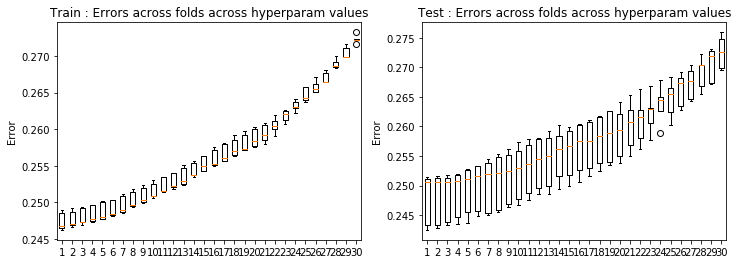

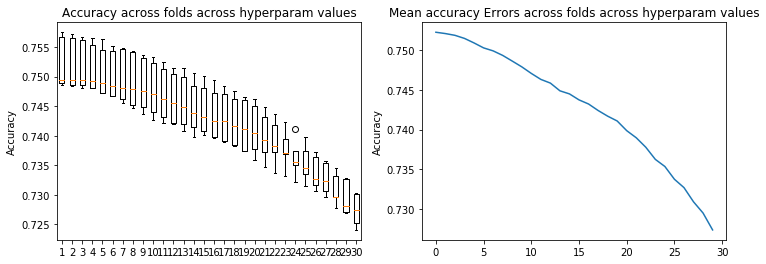

In [209]:
result_crossval(loss_tr8,loss_te8)
result_crossval_accuracy(acc8)

In [210]:
# test 9 : degree 3, classification, all features, not removal of outliers, undef
lambdas = np.logspace(-3, 0, 30)
loss_tr9, loss_te9, w9, acc9 = cross_validation_demo(ss_y, ss_tX, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'classification', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  2.91478258e-01 -2.97867311e-01 -6.31136035e-02
 -7.97916626e-02  5.46654947e-01  4.43396653e-02  2.80385888e-01
 -1.14903196e-01  2.02505326e-02  4.74234667e-01 -6.21573113e-03
  9.00666495e-03  2.37696394e-01  4.24636215e-03  1.64058268e-02
  1.06184816e-01  3.08225944e-03  6.60458761e-02  7.07556933e-02
  9.76246738e-04  1.02107005e-02  7.07570479e-02 -1.24776135e-01
  1.32485926e-01 -2.60653758e-01  8.70917394e-02 -3.87936075e-01
 -3.06431143e-02 -5.02219463e-02  1.60896070e-01  2.34542873e-02
 -5.45718755e-01 -3.55592914e-02 -1.92344125e-04 -4.02006601e-01
 -6.96308448e-02  6.94416977e-03 -1.00503120e-01  3.19030090e-04
 -1.38218055e-01 -1.51506650e-01  1.59825464e-01  2.68314188e-03
 -1.51506237e-01 -3.82942230e-01  5.56744989e-03  2.02463071e-01
  8.30839436e-02  3.3211

Ridge regression: w=[-2.82941962e-01  2.34394918e-01 -2.98567831e-01 -5.19936425e-02
 -4.32449815e-02  5.14923586e-01  4.94243218e-02  2.75553124e-01
 -1.30068022e-01  1.05462946e-02  4.45380963e-01 -2.81624187e-03
  4.83495259e-03  2.36615361e-01 -2.71376827e-03  1.40103453e-02
  9.55497900e-02  9.53121789e-04  8.31923904e-02  7.78213978e-02
 -7.78844338e-03  8.63292655e-03  7.78246967e-02 -1.25050306e-01
  1.42884386e-01 -2.67252296e-01  4.40420490e-02 -3.20049453e-01
 -3.64351324e-02 -1.23277646e-01  1.75725581e-01  2.58348488e-02
 -4.76463063e-01 -4.06709896e-02  1.80737713e-03 -3.69792078e-01
 -6.62534479e-02  8.92198294e-04 -7.86028035e-02 -1.15600186e-04
 -1.76979176e-01 -1.44229087e-01  1.57816228e-01  3.10448321e-03
 -1.44227482e-01 -3.25221456e-01  2.57958354e-03  2.00981154e-01
  9.12978639e-02 -2.66455523e-03  2.71767626e-02  1.44546022e-01
 -9.43082496e-02  8.13989069e-02  1.54598070e-01  3.24624931e-03
 -4.87735849e-03  1.41879848e-01 -1.27457017e-03 -1.42821861e-02
  3.4

Ridge regression: w=[-2.84528468e-01  1.78630126e-01 -2.89472063e-01 -2.35576006e-02
 -4.79353712e-02  4.53000655e-01  3.22630148e-02  2.51162576e-01
 -1.12140765e-01  2.87194411e-02  4.32235616e-01 -2.48586659e-03
 -2.68196446e-03  1.96272620e-01 -5.88312211e-04  1.19295908e-02
  9.30166482e-02  6.13725529e-03  6.58959194e-02  6.86633816e-02
 -2.39779894e-03  5.47182100e-03  6.86635412e-02 -7.85847986e-02
  1.28751113e-01 -2.73411288e-01  4.18530193e-02 -2.14788524e-01
 -7.82539948e-03 -1.13115856e-01  1.53717133e-01  2.61301480e-02
 -4.53252003e-01 -4.15224674e-02 -1.82044635e-03 -3.11623134e-01
 -6.98430597e-02  5.29423411e-03 -6.86071076e-02 -3.09151446e-03
 -1.23512461e-01 -1.19011028e-01  1.59843658e-01 -1.08443517e-04
 -1.19010746e-01 -2.26216248e-01  1.13821312e-03  1.98770618e-01
  7.80751005e-02 -6.62504334e-02  1.35461192e-02  1.33306214e-01
 -7.05846597e-02  7.15595884e-02  1.43367985e-01  8.31603213e-03
 -4.62640688e-04  1.11749711e-01 -4.19283203e-03 -1.15047807e-02
  3.1

Ridge regression: w=[-2.82517357e-01  1.52952552e-01 -2.74771921e-01  1.92896007e-02
 -4.06329062e-02  4.13901960e-01  4.40077664e-02  2.39755116e-01
 -1.11182949e-01  2.62130317e-02  4.09870902e-01 -1.04386600e-02
  8.57044612e-03  1.71754540e-01  4.07730681e-03  1.89433594e-02
  9.37036932e-02  4.91230795e-03  6.30898997e-02  7.59371801e-02
 -5.29933658e-03  3.53680322e-03  7.59383114e-02 -6.65377460e-02
  1.02713066e-01 -3.51746811e-01  8.06060296e-03 -1.55446520e-01
 -1.74352011e-02 -1.12978220e-01  1.35808855e-01  2.86142143e-02
 -4.07840619e-01 -4.00157955e-02 -2.01109318e-03 -2.47082591e-01
 -6.72528832e-02 -1.29827510e-04 -6.38040884e-02 -1.70411540e-03
 -1.16969765e-01 -1.10078526e-01  1.57960289e-01 -1.49055635e-03
 -1.10077919e-01 -1.86815477e-01  1.17041627e-02  2.29379115e-01
  8.12293143e-02 -8.86116188e-02  1.54354256e-02  1.03341175e-01
 -6.40231407e-02  7.43427422e-02  1.28640203e-01  1.18276167e-02
 -8.25312670e-03  8.22913501e-02 -5.63140609e-03 -1.75982621e-02
  2.3

Ridge regression: w=[-0.28524377  0.11056398 -0.26419368 -0.01610183 -0.02463306  0.37878885
  0.04298063  0.22186951 -0.11565498  0.04000709  0.37572123  0.00088102
 -0.00387021  0.15711002 -0.00118951  0.00880334  0.09401239 -0.002225
  0.06011688  0.07138664 -0.00478962 -0.00203686  0.07138726 -0.03983975
  0.08904015 -0.26550792  0.00278996 -0.09188039 -0.01993664 -0.08919932
  0.11106878  0.02811414 -0.36158411 -0.04091625  0.00320229 -0.20127177
 -0.06881993  0.00383292 -0.06647792 -0.00044905 -0.11959589 -0.10472048
  0.15947505  0.0028138  -0.10472015 -0.11781938  0.02229175  0.17679878
  0.0865284  -0.11598773  0.0160479   0.09666232 -0.05202447  0.05856156
  0.1012547   0.00789222  0.00260669  0.0624619  -0.0061918  -0.01007531
  0.02761572  0.00777788  0.00358263 -0.00392353  0.00323779  0.00159572
 -0.0039234 ]
Ridge regression: w=[-2.81310921e-01  9.90842525e-02 -2.73439052e-01 -1.52133784e-02
 -1.16051631e-02  3.76726349e-01  4.57535146e-02  2.21682455e-01
 -1.15051494e-0

Ridge regression: w=[-2.81741551e-01  7.75380218e-02 -2.53169929e-01 -1.15372995e-02
 -2.07780349e-02  3.34343052e-01  3.79341895e-02  1.96394269e-01
 -1.13307955e-01  5.33848115e-02  3.11975981e-01 -5.27661352e-03
  4.76320717e-03  1.40529025e-01  3.49166458e-03  1.21057038e-02
  8.31914560e-02  1.04839296e-03  4.83074982e-02  7.13386712e-02
  6.75625457e-04  6.31288189e-03  7.13389106e-02 -3.27942431e-02
  6.13925908e-02 -2.40657538e-01 -2.11497281e-02 -4.24654857e-02
 -1.17173011e-02 -6.83729998e-02  7.44583552e-02  2.97351817e-02
 -2.70868076e-01 -3.75025814e-02 -6.39465425e-04 -1.38275362e-01
 -7.12168803e-02  6.52247927e-03 -4.84274615e-02  1.21703465e-04
 -9.91954661e-02 -9.61724027e-02  1.60281459e-01  2.41713376e-03
 -9.61723106e-02 -7.70981273e-02  3.67252375e-02  1.51329393e-01
  7.69338516e-02 -1.33710006e-01  1.44873828e-02  7.50130385e-02
 -1.84783029e-02  4.86214970e-02  6.76053167e-02  8.49224248e-03
 -6.58457169e-03  2.52201675e-02 -5.70242047e-03 -1.34217023e-02
  1.4

Ridge regression: w=[-2.78901058e-01  5.76001412e-02 -2.51335073e-01 -1.15739865e-02
  1.25272102e-03  3.22624760e-01  4.16031100e-02  1.82788818e-01
 -1.10349193e-01  4.95684750e-02  2.89175706e-01 -2.44774264e-03
  1.47490110e-03  1.26549765e-01 -3.16044977e-03  1.05067227e-02
  7.53207769e-02  1.68055536e-04  4.88693223e-02  6.89854321e-02
 -7.28122615e-03  5.88329772e-03  6.89859688e-02 -3.75497228e-02
  6.86150174e-02 -2.26874232e-01 -3.78482507e-02 -2.64994200e-02
 -1.59968088e-02 -7.15092187e-02  7.53528892e-02  3.22407806e-02
 -2.23913388e-01 -4.27847464e-02  1.40396397e-03 -1.12248353e-01
 -6.80100232e-02  5.72236464e-04 -3.45163542e-02 -3.77594369e-04
 -9.99309431e-02 -9.48520647e-02  1.57709168e-01  3.02057246e-03
 -9.48517552e-02 -5.97853081e-02  3.17294988e-02  1.36713681e-01
  6.44893370e-02 -1.40532306e-01  1.17160122e-02  8.35812703e-02
 -3.04119738e-02  5.00919310e-02  4.30749753e-02  3.11385962e-03
 -2.26065041e-03  1.52965293e-02 -1.08289200e-03 -1.14874447e-02
  1.0

Ridge regression: w=[-2.78051384e-01  4.38863990e-02 -2.33306821e-01 -7.85303139e-03
 -2.50485507e-03  2.88650804e-01  2.76761751e-02  1.54218175e-01
 -1.04999989e-01  6.44263555e-02  2.51720015e-01 -1.49996177e-03
 -5.61032919e-03  9.98662156e-02 -1.40092132e-03  8.12235550e-03
  6.65422610e-02  3.92736514e-03  4.05844483e-02  5.83076638e-02
 -2.10727161e-03  2.56999279e-03  5.83077193e-02 -2.74834777e-02
  4.34536131e-02 -1.91655222e-01 -3.18745226e-02 -7.70725381e-03
  6.72866289e-03 -4.97702514e-02  6.30055187e-02  3.40333423e-02
 -1.68386781e-01 -4.45593991e-02 -2.10786903e-03 -6.63408675e-02
 -7.18727568e-02  5.01613221e-03 -1.89239027e-02 -3.09079745e-03
 -7.77942843e-02 -7.01283430e-02  1.58643958e-01 -4.77139743e-05
 -7.01282521e-02 -3.76145447e-02  3.83566032e-02  1.11779183e-01
  4.73668409e-02 -1.43762327e-01  1.92781008e-03  5.51029202e-02
 -1.83289752e-02  4.34369341e-02  1.76646896e-02  7.62331853e-03
  1.51541633e-03 -5.19449271e-03 -3.63287713e-03 -8.21009003e-03
  5.2

Ridge regression: w=[-2.74414564e-01  3.71739596e-02 -2.21234162e-01 -4.51476815e-03
 -3.39300331e-03  2.71459049e-01  3.55702581e-02  1.45765055e-01
 -1.04120700e-01  6.49064525e-02  2.33190316e-01 -7.58317572e-03
  2.84264755e-03  9.26351953e-02  1.66641848e-03  1.20732654e-02
  6.47204254e-02  3.27209196e-03  4.08315151e-02  5.90517544e-02
 -4.70859910e-03 -3.04484629e-04  5.90519327e-02 -3.00488248e-02
  2.74528202e-02 -1.87246167e-01 -4.06897641e-02  2.58740571e-03
  3.04326529e-03 -4.24813313e-02  4.57731365e-02  3.77330147e-02
 -1.39969265e-01 -4.35303947e-02 -1.79481549e-03 -4.67173654e-02
 -6.98582258e-02 -1.62037180e-04 -1.51162064e-02 -1.85852991e-03
 -6.80693701e-02 -6.07138691e-02  1.56033612e-01 -1.32530810e-03
 -6.07137512e-02 -3.09581032e-02  4.18202502e-02  9.82481724e-02
  3.90823530e-02 -1.39375486e-01  1.00286682e-03  4.21698288e-02
 -1.34619229e-03  4.43151161e-02  8.19974613e-03  1.03370193e-02
 -3.71299006e-03 -1.89142477e-02 -4.60227129e-03 -1.18697280e-02
  4.6

Ridge regression: w=[-0.27233564  0.02943366 -0.20467326 -0.0143443   0.00510374  0.23029671
  0.03186958  0.12242257 -0.09384779  0.0707267   0.19601495  0.00163358
 -0.00431466  0.07581136 -0.00290154  0.00599796  0.05915292 -0.00046052
  0.02901745  0.04973096 -0.00420477 -0.00082685  0.04973106 -0.02357115
  0.01024446 -0.14874846 -0.03026823  0.01455891  0.0030604  -0.01865958
  0.02340304  0.03884673 -0.07560706 -0.04510566  0.00270198 -0.02577395
 -0.07112263  0.00300644 -0.01047861 -0.00091183 -0.05656889 -0.04763223
  0.15507765  0.00214532 -0.04763218 -0.01369802  0.04989256  0.07076353
  0.02739497 -0.11666329  0.0022394   0.02873535 -0.00322454  0.03779367
 -0.0241151   0.0076495   0.00272015 -0.01002787 -0.00511812 -0.00688232
  0.00476509  0.00588329 -0.01962783  0.00212867  0.00236881  0.00057108
  0.0021287 ]
Ridge regression: w=[-2.68580761e-01  2.70423652e-02 -2.09124358e-01 -1.14813653e-02
  8.52571659e-03  2.30613348e-01  3.34273722e-02  1.22188118e-01
 -9.32644814e

Ridge regression: w=[-2.61856380e-01  2.41686234e-02 -1.89530046e-01 -7.83962560e-03
  3.66449734e-03  1.86130412e-01  2.77707476e-02  1.04153486e-01
 -8.83778968e-02  7.35496105e-02  1.64531719e-01 -2.04336124e-03
 -8.90211873e-04  6.40582851e-02  6.07395355e-04  4.81886063e-03
  4.57526903e-02  4.24713383e-04  2.31216283e-02  4.32278947e-02
 -2.61622813e-04  1.17407802e-03  4.32279374e-02 -2.31245361e-02
 -6.75424428e-03 -1.19041065e-01 -2.67694759e-02  1.91105376e-02
  7.95136268e-03 -9.62376728e-03  7.05100144e-03  4.23906140e-02
 -4.89489377e-02 -4.19674934e-02 -1.39221892e-03 -9.45401623e-03
 -7.28143283e-02  4.95681465e-03 -3.00414407e-03 -3.52541613e-04
 -4.23909055e-02 -3.28518040e-02  1.52383269e-01  1.67480821e-03
 -3.28517835e-02 -5.48243436e-03  5.49700374e-02  4.08502165e-02
  1.56368149e-02 -9.48209093e-02  2.48946385e-03  1.11449400e-02
  1.01005645e-02  3.80834339e-02 -2.24225425e-02  6.40812033e-03
 -2.08740436e-03 -1.33972292e-02 -4.12529974e-03 -6.82064463e-03
 -1.4

Ridge regression: w=[-2.54466835e-01  2.17918462e-02 -1.80721070e-01 -7.42856596e-03
  1.08215665e-02  1.69747760e-01  2.85789661e-02  9.32121606e-02
 -8.11457925e-02  7.02124000e-02  1.52105516e-01 -1.38551608e-03
 -2.27321582e-03  5.40390623e-02 -3.95640141e-03  4.15851782e-03
  3.90604099e-02  9.73725804e-04  2.33126140e-02  3.79820145e-02
 -4.96611772e-03  2.08753820e-03  3.79821022e-02 -2.41418624e-02
 -4.70936580e-03 -1.06792447e-01 -2.31756544e-02  2.05967509e-02
  5.13016415e-03 -4.64115428e-03  3.96607143e-03  4.42741837e-02
 -3.08546389e-02 -4.67021620e-02  5.41582428e-04 -2.79978651e-03
 -6.94403960e-02 -3.25368582e-04  2.52798499e-03 -8.12292312e-04
 -3.38046153e-02 -2.74657132e-02  1.47326016e-01  2.45063694e-03
 -2.74656558e-02 -6.50802805e-04  4.98858997e-02  2.72320774e-02
  7.34486804e-03 -8.56176059e-02  3.64067724e-04  9.39489030e-03
  1.27591008e-03  3.99269165e-02 -2.58337824e-02  2.33396078e-03
  2.10972232e-04 -8.53504664e-03 -1.46361364e-03 -5.64017613e-03
  2.0

Ridge regression: w=[-2.41143763e-01  2.12505775e-02 -1.58716292e-01 -9.10741690e-04
  1.15078554e-02  1.31097948e-01  2.15603051e-02  7.59383722e-02
 -7.32470605e-02  7.19035100e-02  1.29475754e-01  4.63724783e-04
 -5.56599708e-03  3.67403947e-02 -2.86644401e-03  3.28680224e-03
  3.00262422e-02  2.97115838e-03  1.90961895e-02  3.20034656e-02
 -1.38651603e-03  7.89516358e-04  3.20034761e-02 -2.15076105e-02
 -1.50320317e-02 -7.96897874e-02 -1.43655650e-02  1.90672581e-02
  1.27648140e-02  1.58846013e-04 -1.85023314e-03  4.62639303e-02
 -1.39607451e-02 -4.73642501e-02 -2.11563117e-03  1.86128399e-03
 -7.05581797e-02  4.12069480e-03  7.44657915e-03 -2.83774018e-03
 -2.41450960e-02 -1.70758837e-02  1.41150891e-01 -9.70954762e-05
 -1.70758659e-02  4.31889103e-03  4.47053830e-02  8.16178069e-03
  1.32169444e-03 -6.43074076e-02  1.00797887e-03 -3.55457397e-04
  6.03564413e-03  4.33466146e-02 -2.97667648e-02  5.27297510e-03
  6.02618439e-04 -6.19782807e-03 -2.79635443e-03 -3.13606247e-03
  3.9

Ridge regression: w=[-2.30053268e-01  2.16176164e-02 -1.47584535e-01  2.62681194e-03
  1.16905550e-02  1.14549726e-01  2.51815997e-02  7.02904525e-02
 -7.13784822e-02  6.99422075e-02  1.19203435e-01 -2.21997138e-03
 -1.14016628e-03  2.89811796e-02 -1.91645597e-03  3.96234315e-03
  2.65104872e-02  3.34076922e-03  1.97945240e-02  3.27750244e-02
 -2.65277752e-03 -1.15930741e-03  3.27750511e-02 -2.25614685e-02
 -1.96431980e-02 -6.99738190e-02 -1.30538839e-02  1.93334665e-02
  1.19533847e-02  2.33071638e-03 -5.92753997e-03  4.96908634e-02
 -7.18047769e-03 -4.54133651e-02 -1.17556486e-03  2.05397117e-03
 -6.70502798e-02 -4.93008869e-05  7.91674622e-03 -1.64180211e-03
 -1.95274486e-02 -1.23221970e-02  1.34298831e-01 -6.59383857e-04
 -1.23221781e-02  6.72614416e-03  4.18927196e-02 -5.06905474e-03
 -2.02627918e-03 -5.31366973e-02  3.62920430e-04 -3.38434077e-03
  8.58737221e-03  4.50432928e-02 -2.92534019e-02  5.89998349e-03
 -8.38528864e-04 -5.74126440e-03 -3.14678071e-03 -4.02589241e-03
  7.6

Ridge regression: w=[-2.08805996e-01  2.23917748e-02 -1.25463052e-01 -1.60032353e-04
  1.61004729e-02  8.54643559e-02  2.00107360e-02  5.71913690e-02
 -6.46726885e-02  6.60434021e-02  9.82256999e-02  2.34302775e-03
 -2.84397370e-03  1.84044612e-02 -3.87909278e-03  2.02270218e-03
  2.06441338e-02  1.87570765e-03  1.60486753e-02  2.81482749e-02
 -2.32393216e-03 -1.01902415e-04  2.81482901e-02 -2.22093861e-02
 -2.26666948e-02 -5.46419088e-02 -5.85886306e-03  1.87408107e-02
  1.06955539e-02  7.31320662e-03 -1.39998961e-02  4.76671246e-02
  7.17478617e-03 -4.42437008e-02  1.67067558e-03  4.70719698e-03
 -6.30756863e-02  1.26398801e-03  8.51019785e-03 -1.00312709e-03
 -1.35850295e-02 -6.98363434e-03  1.22349015e-01  9.91907439e-04
 -6.98362420e-03  1.22809775e-02  3.53660506e-02 -1.01443601e-02
 -5.43295868e-03 -3.39073720e-02  2.55166593e-03 -5.20589120e-03
  4.76888689e-03  4.49812720e-02 -2.54607217e-02  5.35920856e-03
  7.32193623e-04  3.19460867e-03 -4.02231830e-03 -2.39786628e-03
  3.9

Ridge regression: w=[-0.17758621  0.02232307 -0.10432108  0.0021377   0.01554339  0.06193512
  0.01677816  0.04661389 -0.0567734   0.06169981  0.08034803  0.00041348
 -0.00204491  0.0106401  -0.00171948  0.0010849   0.01158549  0.00151019
  0.0150051   0.02475027 -0.00061005 -0.00071982  0.02475028 -0.0225033
 -0.02564617 -0.0412569  -0.00228564  0.01590543  0.0112492   0.00833945
 -0.01715337  0.04527672  0.0091453  -0.03769646 -0.00161528  0.00344531
 -0.05738386  0.00235015  0.00586916 -0.00045576 -0.00737011 -0.00232539
  0.10642665  0.00054438 -0.00232538  0.0148418   0.02657093 -0.01529874
 -0.00611389 -0.02163914  0.00499563 -0.00655647  0.00406644  0.04546937
 -0.01972567  0.0029847  -0.00115288  0.00328055 -0.00269535 -0.00192633
  0.0014369   0.00186068 -0.01681613 -0.00758654 -0.00104488 -0.00206554
 -0.00758654]
Ridge regression: w=[-1.77686474e-01  2.22926566e-02 -1.03451551e-01  2.71006152e-03
  1.61034594e-02  6.22279456e-02  1.58754095e-02  4.49851657e-02
 -5.53434829e-

Ridge regression: w=[-1.60140117e-01  2.29200694e-02 -9.37429276e-02  1.69041988e-03
  1.63720832e-02  5.32139490e-02  1.55817638e-02  4.08160819e-02
 -5.24452726e-02  5.75679836e-02  7.23105338e-02 -8.81852458e-04
 -2.10992385e-03  6.58875515e-03 -3.23692841e-03  7.87620178e-04
  8.90020445e-03  1.87614560e-03  1.58767622e-02  2.20574640e-02
 -1.64072963e-03  4.67680474e-04  2.20574782e-02 -2.33022530e-02
 -2.29399728e-02 -3.61832679e-02 -6.08089700e-04  1.42392119e-02
  8.68106745e-03  8.54952319e-03 -1.74343661e-02  4.31367243e-02
  1.21552717e-02 -3.84041609e-02 -1.46854509e-04  2.58169630e-03
 -5.17981477e-02 -7.98674478e-04  6.19246494e-03 -7.91363254e-04
 -3.21400572e-03 -1.11343436e-03  9.54618098e-02  1.41121735e-03
 -1.11342445e-03  1.68102646e-02  2.24043003e-02 -1.65905955e-02
 -6.12485994e-03 -1.79552328e-02  2.99059317e-03 -5.62322310e-03
  2.90422031e-03  4.43592642e-02 -1.62347799e-02  6.26617360e-04
 -3.74132736e-04  3.80964557e-03 -2.41802960e-03 -1.50966732e-03
  2.8

Ridge regression: w=[-1.27425039e-01  2.24024136e-02 -7.40180860e-02  1.93289931e-03
  1.54421180e-02  3.72645157e-02  1.21299958e-02  3.12601121e-02
 -4.32721624e-02  5.23982528e-02  5.62936560e-02  3.85208188e-04
 -3.04040269e-03  3.23637797e-04 -2.20525481e-03  1.22991819e-03
  5.38456767e-03  2.09912877e-03  1.43654131e-02  1.87681618e-02
 -5.46342032e-04  2.33006735e-04  1.87681637e-02 -2.20690831e-02
 -2.34230655e-02 -2.57189105e-02  2.02349349e-03  1.07288241e-02
  9.49131150e-03  7.54370577e-03 -1.62066894e-02  3.70009194e-02
  1.21317649e-02 -3.28230787e-02 -1.23048023e-03 -5.66829477e-04
 -4.43130483e-02  2.12452364e-03  4.40803486e-03 -1.54547833e-03
  2.47484800e-04  1.30650216e-03  7.64645710e-02 -2.50031490e-04
  1.30650569e-03  1.77356704e-02  1.32057182e-02 -1.52023474e-02
 -4.77126321e-03 -1.13728133e-02  4.55667966e-03 -5.08701715e-03
  9.49000996e-04  4.24792543e-02 -1.12324196e-02  1.87231425e-03
 -1.04282791e-03  1.66540362e-03 -2.15204882e-03 -1.33929045e-04
  1.4

Ridge regression: w=[-1.10237677e-01  2.23986491e-02 -6.62150187e-02  1.79546502e-03
  1.49857474e-02  3.11772281e-02  1.25137370e-02  2.80447095e-02
 -4.01987625e-02  4.86460414e-02  5.01065215e-02 -3.73036879e-04
 -1.15717024e-03 -2.47638031e-03 -2.05608941e-03  1.04340164e-03
  4.34877949e-03  2.39360398e-03  1.46120338e-02  1.85273651e-02
 -9.04626192e-04 -5.57582588e-04  1.85273693e-02 -2.19993871e-02
 -2.32132363e-02 -2.24083167e-02  2.63880495e-03  9.43304643e-03
  8.76361187e-03  7.45251150e-03 -1.59370279e-02  3.51123078e-02
  1.26217619e-02 -2.89110015e-02 -3.94424127e-04 -2.45689781e-03
 -3.83743441e-02  5.64980690e-05  3.69659795e-03 -7.58621260e-04
  2.09394103e-03  2.45788261e-03  6.58858655e-02 -4.54765362e-05
  2.45788580e-03  1.84193880e-02  9.60960802e-03 -1.64639429e-02
 -4.28866854e-03 -8.78691627e-03  3.88047616e-03 -4.17454391e-03
  7.33751524e-04  4.03526343e-02 -8.89156639e-03  1.68951996e-03
 -6.06733756e-04  5.62713340e-04 -2.16989464e-03 -5.56101125e-04
  1.1

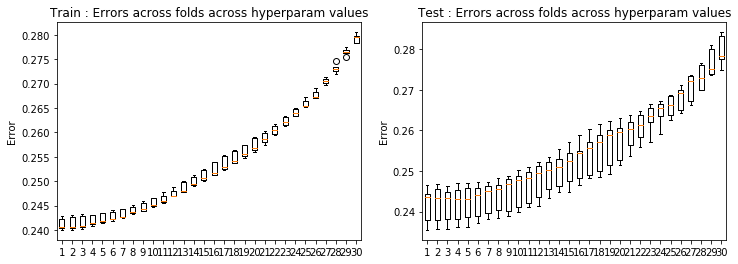

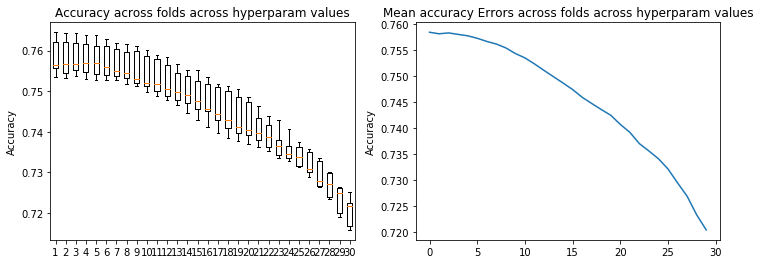

In [211]:
result_crossval(loss_tr9,loss_te9)
result_crossval_accuracy(acc9)

### Remove of correlated features

In [212]:
# test 10: degree 1, rmse, remove correlated features, not removal of outliers, undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr10, loss_te10, w10, acc10 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  2.65206763e-02 -2.07279063e-01 -2.52456832e-01
  2.52767711e-01  5.75965547e-02  6.49065096e-02 -1.83103647e-01
  1.30930083e-01  1.65257016e-01  3.51041268e-03 -3.95699659e-03
  2.37795348e-01 -6.00053257e-03 -1.89362993e-04  6.16801613e-02
  2.17949549e-03 -5.24250592e-02 -8.70349313e-04 -5.35270297e-03]
Ridge regression: w=[-0.28512101  0.0262587  -0.20774915 -0.24941209  0.24941962  0.05585407
  0.05086393 -0.16968021  0.13375498  0.17355212  0.00489677 -0.00597897
  0.23186203 -0.00747645  0.00202765  0.06585676  0.00425505 -0.04808925
 -0.00066399 -0.00120428]
Ridge regression: w=[-0.28705164  0.03083804 -0.20791779 -0.25511551  0.25409967  0.05673799
  0.05877742 -0.17571685  0.13112988  0.17159289  0.00896946 -0.00325325
  0.23351181 -0.01044521  0.00127943  0.0717692

Ridge regression: w=[-0.28180557  0.02908682 -0.20758521 -0.24993222  0.25055462  0.05403094
  0.05787281 -0.17074527  0.1280185   0.17297327  0.00096064 -0.00315334
  0.22913126 -0.00867305 -0.0004097   0.06412068  0.003101   -0.04565757
 -0.00035226 -0.00172188]
Ridge regression: w=[-0.28212588  0.02842233 -0.20464694 -0.24091726  0.24587298  0.05960143
  0.06333538 -0.16584997  0.13386109  0.16740677  0.00258504 -0.00169028
  0.21234072 -0.00618411  0.00192692  0.06161909  0.00619131 -0.04363582
 -0.00120368 -0.00180602]
Accuracy = [0.7086664947124065, 0.7155016765540366, 0.7076347691514058, 0.7155016765540366, 0.7129223626515347]
Ridge regression: w=[-2.83165437e-01  2.72507421e-02 -2.04370393e-01 -2.40358792e-01
  2.43628863e-01  5.69908791e-02  6.85069019e-02 -1.73680781e-01
  1.30916872e-01  1.62587475e-01  3.45843842e-03 -4.00740450e-03
  2.21109240e-01 -6.00760639e-03 -1.71760753e-04  5.86743992e-02
  2.20550141e-03 -5.06117883e-02 -8.63387167e-04 -5.28188239e-03]
Ridge regres

Accuracy = [0.7091823574929069, 0.7171137477431003, 0.7081506319319061, 0.7158240907918494, 0.7118906370905339]
Ridge regression: w=[-2.77894488e-01  2.93022145e-02 -1.97061693e-01 -2.09955982e-01
  2.20055447e-01  5.50908626e-02  7.51098187e-02 -1.51916116e-01
  1.30675867e-01  1.55234351e-01  3.30481469e-03 -4.11683525e-03
  1.81812806e-01 -6.00047203e-03 -1.11289157e-04  5.17336220e-02
  2.27286902e-03 -4.50917935e-02 -8.43498982e-04 -5.09260913e-03]
Ridge regression: w=[-0.27805138  0.02896383 -0.19666444 -0.20761658  0.21766393  0.05346976
  0.064459   -0.14088921  0.13305481  0.16121193  0.00439097 -0.00616581
  0.17623347 -0.00720261  0.00199844  0.05471434  0.00420749 -0.04129665
 -0.00063405 -0.00107334]
Ridge regression: w=[-0.27993414  0.03331724 -0.19698085 -0.21259003  0.22154335  0.05425632
  0.0709444  -0.14552173  0.13081607  0.160412    0.00850657 -0.0034205
  0.17743413 -0.01018326  0.00113613  0.06059044  0.00481815 -0.04440473
 -0.00172073 -0.00086143]
Ridge regress

Ridge regression: w=[-0.26200422  0.03420925 -0.17922475 -0.14587312  0.16728793  0.04779915
  0.07240791 -0.10730052  0.13023975  0.13949206  0.00348703 -0.00629618
  0.10647601 -0.00662937  0.00199913  0.04089954  0.00412242 -0.02625597
 -0.00057748 -0.00082764]
Ridge regression: w=[-0.26377832  0.03802691 -0.17966415 -0.1496533   0.17003281  0.04839754
  0.07730186 -0.11048681  0.12859517  0.13962747  0.00749618 -0.00357341
  0.10716778 -0.00946989  0.00099065  0.04634661  0.00468029 -0.02869583
 -0.00173936 -0.00083368]
Ridge regression: w=[-2.60141422e-01  3.62603003e-02 -1.80916445e-01 -1.51200374e-01
  1.71393566e-01  4.63514762e-02  7.48737514e-02 -1.11826042e-01
  1.25625990e-01  1.41702212e-01 -1.68297676e-05 -3.46490429e-03
  1.12468989e-01 -7.99003546e-03 -1.46577618e-04  4.15481612e-02
  3.23277600e-03 -2.51398906e-02 -5.03181231e-04 -1.18458293e-03]
Ridge regression: w=[-0.2604371   0.03584387 -0.1800328  -0.14703926  0.16921887  0.05152235
  0.07713347 -0.1090922   0.130

Ridge regression: w=[-2.18625444e-01  4.41243981e-02 -1.48811665e-01 -7.30034586e-02
  9.96935582e-02  3.41888241e-02  6.79550621e-02 -7.97323112e-02
  1.14947885e-01  1.05746780e-01 -1.01210001e-03 -3.40051487e-03
  3.92009469e-02 -6.78271126e-03  1.39723233e-04  2.46156940e-02
  3.26010678e-03  1.44095308e-03 -5.94751946e-04 -6.60252964e-04]
Ridge regression: w=[-0.21887394  0.04394302 -0.1492847  -0.07186762  0.09888687  0.03861028
  0.06844642 -0.07878295  0.11880509  0.1041163   0.00084902 -0.00252128
  0.0335807  -0.00514194  0.00146203  0.02511306  0.00534696  0.00281563
 -0.00141168 -0.0013603 ]
Accuracy = [0.7107299458344081, 0.7136316739747227, 0.7084085633221563, 0.716017539334537, 0.7064095950477173]
Ridge regression: w=[-0.2072846   0.04421353 -0.14115655 -0.05839017  0.08538439  0.03336702
  0.06596535 -0.07619131  0.11321012  0.09570745  0.00150896 -0.00382709
  0.02780592 -0.00483526  0.00062665  0.02049785  0.00260237  0.00414668
 -0.00057116 -0.0034564 ]
Ridge regress

Ridge regression: w=[-0.12828787  0.04366095 -0.09341086 -0.01907335  0.03461058  0.01764821
  0.04477011 -0.05223741  0.08092192  0.06173013  0.00181253 -0.0023998
 -0.00350791 -0.00419911  0.00081804  0.01109643  0.00288792  0.02089164
 -0.00088458 -0.00045955]
Ridge regression: w=[-0.12651907  0.0431647  -0.09327653 -0.01884662  0.03459035  0.01653852
  0.04452356 -0.05245039  0.07933404  0.06253485 -0.00160323 -0.0024081
 -0.00242624 -0.00429011  0.00029798  0.00860865  0.00258512  0.02155887
 -0.00058452 -0.00023305]
Ridge regression: w=[-0.12666288  0.04323299 -0.09430381 -0.01923373  0.03430225  0.01903725
  0.04432029 -0.05253526  0.0814827   0.06203892 -0.00034909 -0.00191001
 -0.00471947 -0.00333173  0.0011172   0.00950254  0.00358418  0.02229664
 -0.0010038  -0.0009298 ]
Accuracy = [0.7058292494196544, 0.7075702863038432, 0.7014444157854011, 0.7130513283466597, 0.7025406241939645]
Ridge regression: w=[-1.10838428e-01  4.02151540e-02 -8.40426704e-02 -1.42138396e-02
  2.792336

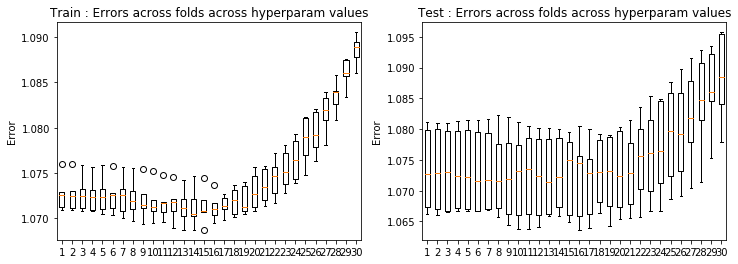

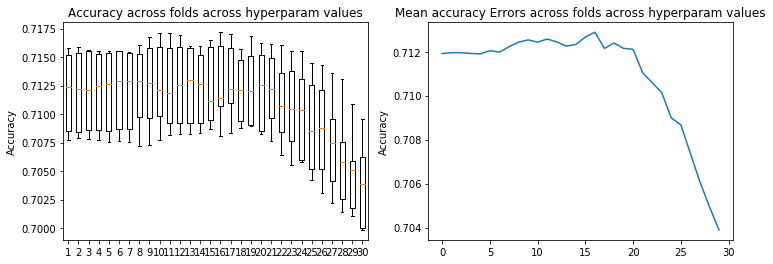

In [213]:
result_crossval(loss_tr10,loss_te10)
result_crossval_accuracy(acc10)

In [214]:
# test 11: degree 2, rmse, remove correlated features, not removal of outliers undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr11, loss_te11, w11, acc11 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  6.80509068e-02 -2.84072203e-01 -1.99908180e-01
  6.42706677e-01  3.53941411e-02  2.18249707e-01 -1.62139131e-01
  9.80687450e-02  2.50810836e-01  2.36544386e-03 -3.11342885e-03
  1.93586534e-01 -1.26234797e-03 -2.44790546e-03  6.29778126e-02
  3.59445857e-03  5.06377589e-02 -2.26234923e-03 -3.92923082e-03
  4.19034762e-02  1.35308707e-01  3.56164435e-02 -4.37961970e-01
  1.19792280e-03  1.03283259e-02  8.40857377e-02  2.36836488e-02
 -1.74677705e-01 -3.69912540e-02 -6.71242770e-04 -1.65630347e-01
 -7.00514105e-02  6.84871567e-03 -4.59701267e-02 -3.73035319e-04
 -1.06847189e-01  1.60936073e-01  2.38908640e-03]
Ridge regression: w=[-2.85121014e-01  6.43472315e-02 -2.79296732e-01 -1.91851052e-01
  6.54660953e-01  3.18619972e-02  2.16247329e-01 -1.33112815e-01
  1.01203843e-01  2

Ridge regression: w=[-2.82749445e-01  4.93653548e-02 -2.79721543e-01 -1.81241278e-01
  6.10504183e-01  4.07152772e-02  2.16910337e-01 -1.30270263e-01
  9.74040469e-02  2.56935173e-01  2.09039610e-04 -1.92423390e-03
  1.69335073e-01 -3.92796801e-03 -1.11680407e-03  6.40584527e-02
  3.95602119e-03  4.94281772e-02 -1.33307960e-03 -7.29599272e-04
  2.15779219e-02  1.32008042e-01  1.88314210e-02 -4.09706912e-01
 -7.70671458e-03 -4.26318740e-03  5.77052391e-02  2.53277247e-02
 -1.65651805e-01 -4.22327305e-02  1.32559206e-03 -1.39848534e-01
 -6.66760576e-02  5.01405184e-04 -4.20971211e-02 -7.68046716e-04
 -9.95522951e-02  1.58477122e-01  2.94837266e-03]
Ridge regression: w=[-2.83070824e-01  4.63868131e-02 -2.71942582e-01 -1.70644040e-01
  6.17272903e-01  3.97989462e-02  2.16478077e-01 -1.51193025e-01
  1.01703379e-01  2.61120042e-01  1.42563162e-03 -1.24335978e-03
  1.85552278e-01 -2.17843290e-03  8.49680476e-04  6.57987833e-02
  6.66685903e-03  5.50736952e-02 -1.25247761e-03 -1.07944675e-03


Ridge regression: w=[-2.83663349e-01  4.02908413e-02 -2.78535206e-01 -1.55263477e-01
  5.29181624e-01  3.40299043e-02  2.14072890e-01 -1.42693365e-01
  1.02034593e-01  2.42093861e-01  2.74795776e-03 -3.26072182e-03
  1.59141979e-01 -1.67854896e-03 -2.28919007e-03  6.39621414e-02
  3.44696316e-03  4.72377540e-02 -2.36674058e-03 -3.76913407e-03
  1.08919404e-02  1.24525177e-01  1.64620134e-03 -3.39964571e-01
  3.08411094e-03 -1.26744069e-02  6.74235508e-02  2.77264777e-02
 -1.55547798e-01 -3.84984785e-02 -8.07260145e-04 -1.25048385e-01
 -7.16184988e-02  6.58526523e-03 -3.92869468e-02 -4.38304562e-04
 -1.02253655e-01  1.60990529e-01  2.34333637e-03]
Ridge regression: w=[-2.83823502e-01  3.94722625e-02 -2.74092313e-01 -1.49055033e-01
  5.40018492e-01  3.04360720e-02  2.09119344e-01 -1.21375601e-01
  1.04939816e-01  2.55876452e-01  5.49355577e-03 -5.23853610e-03
  1.48594140e-01 -4.76487022e-03  2.42089122e-05  6.49071425e-02
  4.69047638e-03  4.28408392e-02 -1.25789349e-03 -7.85648335e-04


Ridge regression: w=[-2.81004756e-01  2.31275505e-02 -2.64926708e-01 -1.12701168e-01
  4.68350573e-01  3.76103001e-02  2.09586827e-01 -1.26730095e-01
  1.06437225e-01  2.46355110e-01  1.93409950e-03 -1.48054080e-03
  1.38324802e-01 -2.79952775e-03  9.56555064e-04  6.54558063e-02
  6.53959844e-03  4.99793969e-02 -1.37912832e-03 -1.04732090e-03
 -7.92649221e-03  1.07634674e-01 -2.78273079e-02 -2.93792627e-01
  1.83012094e-03 -2.39649483e-02  6.64891392e-02  3.31147539e-02
 -1.55351910e-01 -4.32763132e-02 -1.81094154e-03 -1.18906512e-01
 -6.99746192e-02 -3.19658829e-04 -3.31350668e-02 -2.41906556e-03
 -9.68931356e-02  1.58382400e-01 -1.65815044e-03]
Accuracy = [0.7449058550425587, 0.7539334537013155, 0.7450993035852463, 0.7542558679391282, 0.7478075831828733]
Ridge regression: w=[-0.28174155  0.02589464 -0.27086392 -0.11451247  0.42450703  0.03244853
  0.20462988 -0.12762036  0.10569432  0.23053401  0.00308999 -0.00336576
  0.12995955 -0.00208422 -0.00209804  0.0638445   0.00332156  0.045

Ridge regression: w=[-2.77648204e-01  1.84232314e-02 -2.59688555e-01 -8.54675831e-02
  3.54524477e-01  3.56512309e-02  1.91298586e-01 -1.07814533e-01
  1.06294391e-01  2.21862584e-01  9.04871486e-04 -2.37044960e-03
  1.07581026e-01 -5.06805614e-03 -8.13942279e-04  6.20783323e-02
  3.84975179e-03  4.68063360e-02 -1.44115582e-03 -3.79194490e-04
 -1.78136488e-02  1.01187430e-01 -5.49102273e-02 -1.93512216e-01
 -1.51058415e-03 -4.03102740e-02  3.35111522e-02  3.48915103e-02
 -1.16075916e-01 -4.57384675e-02  9.33316219e-04 -5.92999893e-02
 -7.03501169e-02  1.70388105e-04 -2.41455901e-02 -1.05451403e-03
 -9.27320691e-02  1.57352726e-01  2.83714430e-03]
Ridge regression: w=[-2.77963785e-01  1.62517293e-02 -2.54626351e-01 -6.98269334e-02
  3.53168627e-01  3.53193780e-02  1.95408520e-01 -1.13018037e-01
  1.10274054e-01  2.28358879e-01  2.28539106e-03 -1.63129102e-03
  1.06464214e-01 -3.30275231e-03  1.06558895e-03  6.36759928e-02
  6.44653282e-03  4.79272977e-02 -1.45716533e-03 -1.00673927e-03


Ridge regression: w=[-0.27543912  0.01999359 -0.23633888 -0.04906995  0.24656809  0.03026318
  0.17045347 -0.10326283  0.11191116  0.20371884  0.0089043  -0.00233166
  0.07804032 -0.00812295  0.00029668  0.06427631  0.00459528  0.04383344
 -0.0022392  -0.00028685 -0.02091364  0.07459015 -0.07615015 -0.10710311
  0.00643457 -0.042954    0.02631949  0.03959585 -0.10012272 -0.04680199
  0.00272088 -0.02648017 -0.07304777  0.00310605 -0.01609183 -0.00126024
 -0.08862045  0.15607761  0.00230829]
Ridge regression: w=[-2.71641453e-01  1.72880341e-02 -2.39515837e-01 -4.63925521e-02
  2.48612951e-01  3.22661712e-02  1.66294500e-01 -1.00558891e-01
  1.10404192e-01  1.98051244e-01  1.04069588e-03 -2.51194202e-03
  8.22435095e-02 -5.49293898e-03 -6.33982191e-04  5.78997558e-02
  3.82368663e-03  4.38634527e-02 -1.45469551e-03 -1.97126046e-04
 -2.39193821e-02  7.91335014e-02 -8.09475256e-02 -1.09946893e-01
  2.20552320e-03 -4.36448056e-02  2.41175282e-02  3.95932233e-02
 -9.03306160e-02 -4.72202647e

Ridge regression: w=[-2.62004221e-01  2.04658999e-02 -2.07326342e-01 -1.60553421e-02
  1.65344553e-01  2.27032124e-02  1.32338708e-01 -9.14974719e-02
  1.17167715e-01  1.70286563e-01  5.34350840e-03 -5.41641418e-03
  5.61839338e-02 -5.45634367e-03  8.99647996e-04  5.04795018e-02
  4.61717533e-03  3.75786269e-02 -1.27028743e-03 -2.24008631e-04
 -2.37031440e-02  4.89123224e-02 -8.71292064e-02 -5.44945641e-02
  1.36441150e-02 -3.92702192e-02  1.98853568e-02  4.34414027e-02
 -6.85762839e-02 -4.90631268e-02 -2.19968934e-03 -6.14393953e-03
 -7.44676687e-02  4.78247141e-03 -5.44699960e-03 -3.19584169e-03
 -6.73629721e-02  1.50864553e-01  1.17935274e-04]
Ridge regression: w=[-2.63778316e-01  2.22798716e-02 -2.06911211e-01 -2.04489911e-02
  1.65030582e-01  2.66330350e-02  1.38736169e-01 -9.51084715e-02
  1.14705095e-01  1.69511806e-01  8.32277689e-03 -2.33862009e-03
  5.66704824e-02 -7.92901121e-03  4.15824332e-04  5.62230535e-02
  4.57124012e-03  3.80231456e-02 -2.19918610e-03 -1.87224932e-04


Ridge regression: w=[-0.24100769  0.02395948 -0.17107407 -0.00539068  0.10789416  0.02155743
  0.10680881 -0.08189653  0.11374261  0.13418625  0.00318927 -0.00309062
  0.03968306 -0.00332641 -0.00057114  0.04006976  0.00306505  0.02902188
 -0.00191023 -0.00246655 -0.02752847  0.02037829 -0.08297227 -0.01583373
  0.01528483 -0.02022341  0.00286513  0.04699846 -0.04137392 -0.04365416
 -0.00179382  0.00687366 -0.07187601  0.00397743 -0.00066075 -0.00051311
 -0.05060764  0.14042292  0.00123428]
Ridge regression: w=[-2.41143763e-01  2.40433580e-02 -1.69610524e-01 -4.16785593e-03
  1.08702994e-01  1.98661487e-02  1.01555817e-01 -8.00740392e-02
  1.15100268e-01  1.35159809e-01  4.39295514e-03 -5.17611913e-03
  3.68853254e-02 -5.07348511e-03  1.16402488e-03  3.89550973e-02
  4.49524605e-03  3.04886290e-02 -1.10715731e-03 -2.92245139e-05
 -2.65458318e-02  2.06872915e-02 -8.11679682e-02 -1.91127142e-02
  1.52846325e-02 -2.35890784e-02  7.47435778e-03  4.64741747e-02
 -4.12570155e-02 -4.86315952e

Ridge regression: w=[-2.18873938e-01  2.72154632e-02 -1.44562532e-01 -1.09534702e-04
  8.19742445e-02  2.19202029e-02  8.62341390e-02 -7.20095998e-02
  1.09775845e-01  1.12569817e-01  1.65366713e-03 -1.71555214e-03
  2.38447374e-02 -4.04897269e-03  1.33283043e-03  3.21526944e-02
  5.61939178e-03  2.82956180e-02 -1.33819857e-03 -7.60232354e-04
 -2.94028294e-02  3.50321069e-03 -7.36026951e-02 -5.63617536e-03
  1.42265060e-02 -1.20289497e-02  6.34795007e-04  5.00624361e-02
 -2.59560610e-02 -4.56141674e-02 -1.00386827e-03  5.15079234e-03
 -6.61408405e-02  5.75073997e-05  5.51844353e-03 -1.51204340e-03
 -3.23747223e-02  1.26541956e-01 -4.08852195e-04]
Accuracy = [0.7356848078411142, 0.7409724013412432, 0.7343951508898633, 0.7427779210729946, 0.7371034304874903]
Ridge regression: w=[-2.07284598e-01  2.77550145e-02 -1.32276997e-01 -1.86462903e-03
  7.01471222e-02  1.79372673e-02  7.76848624e-02 -6.73479529e-02
  1.04832917e-01  1.00120596e-01  2.38712892e-03 -2.80791341e-03
  2.24522360e-02 -

Ridge regression: w=[-1.76423157e-01  3.01044127e-02 -1.09362370e-01 -2.67440055e-03
  5.25596778e-02  1.58208177e-02  5.95319855e-02 -5.75870746e-02
  9.26206184e-02  8.05272847e-02 -6.09748329e-04 -2.41062642e-03
  1.21541011e-02 -4.70220970e-03  5.42912558e-05  1.90935705e-02
  3.16133738e-03  2.19175475e-02 -9.56563653e-04  1.32164640e-04
 -3.17503549e-02 -1.19984647e-02 -5.18608415e-02  3.38379641e-03
  1.07513313e-02  4.27554137e-03 -1.08895056e-02  4.55388742e-02
 -3.65797694e-03 -4.15797713e-02 -2.31825063e-04  7.00687427e-03
 -5.65755716e-02 -8.38243965e-04  8.37580730e-03 -7.42097621e-04
 -1.16873465e-02  1.03415064e-01  1.52185451e-03]
Ridge regression: w=[-1.76623684e-01  3.01625496e-02 -1.09399027e-01 -1.22931809e-03
  5.20699676e-02  1.76030563e-02  6.07198401e-02 -5.73407077e-02
  9.52698868e-02  8.08055733e-02  8.27740449e-04 -1.64800398e-03
  9.66754063e-03 -3.58584974e-03  1.22511941e-03  2.05514991e-02
  4.75543571e-03  2.34712444e-02 -1.13194822e-03 -7.64020403e-04


Ridge regression: w=[-0.12828787  0.0303584  -0.0792984  -0.00301518  0.03133895  0.01203982
  0.04183509 -0.04371636  0.07403111  0.0554102   0.0021993  -0.00186234
  0.00117612 -0.00372743  0.00069484  0.01303087  0.00283327  0.01894297
 -0.0009498  -0.00027009 -0.03038177 -0.02219893 -0.03272633  0.00479071
  0.01004835  0.01118359 -0.01430893  0.03821569  0.00888811 -0.03318177
  0.00072375  0.00079239 -0.0441683   0.00042714  0.00815554 -0.00052442
  0.00019501  0.07511077  0.00047005]
Ridge regression: w=[-1.26519072e-01  3.00084725e-02 -7.94432029e-02 -2.76556621e-03
  3.14763826e-02  1.16485946e-02  4.14834883e-02 -4.38456904e-02
  7.26388520e-02  5.62073703e-02 -1.04450876e-03 -2.03501691e-03
  2.06586000e-03 -3.75308021e-03  1.64732955e-04  1.06883608e-02
  2.53435523e-03  1.94401047e-02 -7.15059366e-04  4.79183022e-05
 -3.07406889e-02 -2.12907161e-02 -3.31945122e-02  4.55097770e-03
  8.78179137e-03  1.15485847e-02 -1.49395817e-02  3.79917428e-02
  7.36514082e-03 -3.32417283e

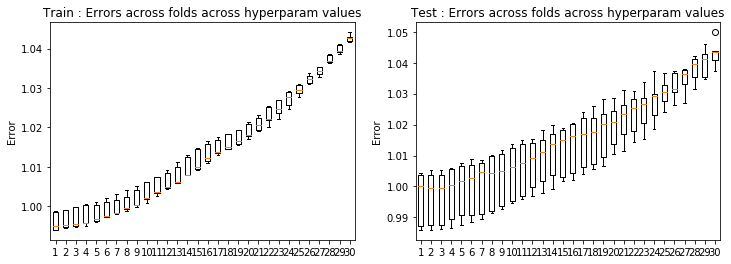

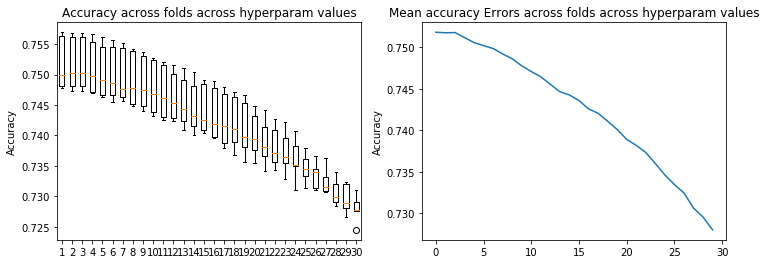

In [215]:
result_crossval(loss_tr11,loss_te11)
result_crossval_accuracy(acc11)

In [216]:
# test 12: degree 3, rmse, remove correlated features, not removal of outliers, undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr12, loss_te12, w12, acc12 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  2.90394531e-01 -2.98106100e-01 -6.93973453e-02
  5.57955240e-01  4.29053002e-02  3.46719210e-01 -1.31170170e-01
  1.80613353e-02  4.49271080e-01 -6.01865054e-03  8.17621528e-03
  2.41145916e-01  4.29968135e-03  1.58319038e-02  1.05904927e-01
  2.48144187e-03  8.41575954e-02  8.91799557e-04  9.50045575e-03
 -1.14578429e-01  1.37283213e-01 -2.56964914e-01 -3.96826146e-01
 -1.75869971e-02 -2.32379670e-01  1.64543723e-01  2.36871292e-02
 -4.98435841e-01 -3.53831017e-02 -5.34758033e-05 -3.76960420e-01
 -6.96011150e-02  7.11595261e-03 -1.25873305e-01  1.43570355e-04
 -1.80795786e-01  1.59491437e-01  2.72346489e-03 -3.75450396e-01
  6.37534894e-03  2.00178325e-01  3.59255194e-02  1.56511199e-02
  1.33355996e-01 -8.23343853e-02  7.53106283e-02  1.84811054e-01
  8.61554693e-03 -9.4267

Ridge regression: w=[-2.83263560e-01  2.49992412e-01 -2.88094905e-01  8.75461536e-03
  5.06231450e-01  4.40386420e-02  3.56227870e-01 -1.28199399e-01
  1.20863048e-02  4.29241316e-01 -1.06232735e-02  9.58616857e-03
  2.01223849e-01  4.59587311e-03  1.99645776e-02  1.01368447e-01
  5.40206498e-03  8.75350297e-02 -5.47837154e-03  4.21118381e-03
 -9.87853226e-02  1.27621813e-01 -3.77981582e-01 -3.16616423e-01
 -1.21825823e-02 -2.53260882e-01  1.79194845e-01  2.72032496e-02
 -4.56867791e-01 -3.94158459e-02 -1.85835274e-03 -3.34774284e-01
 -6.66995749e-02 -3.59502076e-05 -1.07984676e-01 -1.73588967e-03
 -1.76775191e-01  1.57286452e-01 -1.36605661e-03 -3.18638699e-01
  4.14392756e-03  2.57509327e-01 -6.35503616e-03  9.29246803e-03
  1.34111206e-01 -9.91621921e-02  8.41098519e-02  1.60180303e-01
  1.18144072e-02 -8.94125136e-03  1.41593270e-01 -5.96681831e-03
 -1.83927524e-02  4.60545685e-02  2.48903273e-03  4.80178831e-02
  4.83791648e-03 -2.12478123e-03]
Accuracy = [0.755996904823317, 0.761

Ridge regression: w=[-2.82505526e-01  1.69420875e-01 -2.92124050e-01 -3.01278119e-02
  4.56760436e-01  4.68883103e-02  3.44447758e-01 -1.27453547e-01
  2.20089493e-02  3.93733426e-01 -2.72985076e-03  4.30374667e-03
  1.92736633e-01 -2.88869499e-03  1.35544780e-02  1.03126917e-01
  7.13640569e-04  9.56443301e-02 -8.04640781e-03  8.08044641e-03
 -8.15616072e-02  1.32394696e-01 -2.72360247e-01 -2.14143654e-01
 -2.26895457e-02 -2.51542306e-01  1.51860799e-01  2.63944629e-02
 -4.04153690e-01 -4.06460070e-02  1.78369429e-03 -2.86524831e-01
 -6.65328221e-02  8.18113688e-04 -1.07937183e-01 -3.79186533e-04
 -1.99626847e-01  1.57182297e-01  3.02524396e-03 -2.19961340e-01
  9.61717700e-03  1.91737094e-01 -6.16790490e-02  1.25511584e-02
  1.38086805e-01 -8.25534173e-02  7.28437682e-02  1.36674256e-01
  3.10009996e-03 -4.24853429e-03  1.13315718e-01 -1.11709257e-03
 -1.39483205e-02  4.26621687e-02  5.04488815e-03  6.25477408e-02
  7.63055521e-03 -7.17886368e-03]
Ridge regression: w=[-2.82826628e-01

Ridge regression: w=[-0.28574534  0.13331729 -0.27160819 -0.01848144  0.40618343  0.04241112
  0.30793346 -0.11852791  0.03807815  0.38955068  0.00090455 -0.00382647
  0.15610165 -0.00099725  0.00903867  0.10522988 -0.00238856  0.08150086
 -0.00475291 -0.00221571 -0.04255951  0.10052195 -0.27007942 -0.13094609
 -0.01363589 -0.181677    0.12607738  0.02699194 -0.40496939 -0.04039398
  0.00331709 -0.22748035 -0.06858313  0.00398096 -0.1044719  -0.00051849
 -0.16358007  0.158684    0.00295643 -0.14591661  0.02106285  0.18359185
 -0.10226029  0.00965091  0.10266711 -0.06550813  0.06058546  0.1322367
  0.0077902   0.0026838   0.08469899 -0.00635863 -0.01052268  0.04205377
  0.00793174  0.02964278  0.00327432  0.00162723]
Ridge regression: w=[-0.28180557  0.12060046 -0.28189128 -0.01548435  0.40484205  0.04504674
  0.31349664 -0.11981175  0.03274384  0.35971029 -0.00266303  0.00364525
  0.16241648 -0.00296228  0.01289932  0.0994234   0.00057211  0.08611556
 -0.00790445  0.00756007 -0.0571265

Ridge regression: w=[-0.28460984  0.09435726 -0.25966659 -0.01048608  0.3640617   0.04019548
  0.27648195 -0.11642264  0.04905978  0.33367033  0.00092675 -0.00394089
  0.13172463 -0.00121648  0.00871452  0.09898466 -0.00225091  0.07316468
 -0.00467403 -0.00198432 -0.03170204  0.08131323 -0.25484845 -0.07228029
 -0.00945932 -0.14337818  0.10155828  0.02863764 -0.31459566 -0.04108073
  0.00322814 -0.16730981 -0.0690872   0.00384053 -0.08865774 -0.00061106
 -0.14430084  0.15848156  0.00281915 -0.09531102  0.028799    0.1661322
 -0.12899316  0.0077621   0.08117848 -0.04804162  0.05250538  0.08705665
  0.00786384  0.00276045  0.05211089 -0.0061993  -0.01009437  0.03322191
  0.0077876   0.01819432  0.00311573  0.00144907]
Ridge regression: w=[-0.28068572  0.08487501 -0.26883819 -0.00789942  0.36328199  0.0426702
  0.27760646 -0.11488174  0.04417586  0.31893529 -0.00255336  0.00275548
  0.13619351 -0.00305629  0.01196857  0.0931679   0.00041516  0.07490894
 -0.00771711  0.00681752 -0.0420117 

Ridge regression: w=[-0.28280022  0.06609748 -0.24582396 -0.00882909  0.32710001  0.03758986
  0.24120435 -0.1116802   0.05949939  0.28306855  0.00101428 -0.00405192
  0.11021574 -0.00154716  0.0082472   0.09082773 -0.00195699  0.06251561
 -0.00456592 -0.00170407 -0.02644686  0.05981965 -0.22887416 -0.03346385
 -0.00480841 -0.10256912  0.07669821  0.030656   -0.23089392 -0.04197839
  0.00312573 -0.11438502 -0.06967309  0.00367461 -0.06963862 -0.00071453
 -0.12003916  0.15797923  0.00266982 -0.06050134  0.03727353  0.14249617
 -0.14113879  0.00569383  0.05829594 -0.0318289   0.04519845  0.04588899
  0.00789877  0.00281975  0.02500745 -0.00597359 -0.00950775  0.02289716
  0.00747597  0.00439266  0.00292679  0.00123664]
Ridge regression: w=[-2.78901058e-01  5.95128171e-02 -2.53640476e-01 -5.85986573e-03
  3.26607139e-01  3.98326767e-02  2.39972105e-01 -1.10146031e-01
  5.51396101e-02  2.76180519e-01 -2.39960145e-03  1.65991855e-03
  1.13984547e-01 -3.20406303e-03  1.07279927e-02  8.484083

Ridge regression: w=[-2.78051384e-01  4.52513240e-02 -2.35590093e-01 -2.97822192e-03
  2.90873661e-01  2.61543874e-02  1.98738507e-01 -1.04516081e-01
  6.92318499e-02  2.41599026e-01 -1.41620936e-03 -5.72210807e-03
  9.01975449e-02 -1.46751001e-03  8.11644209e-03  7.35377749e-02
  3.96833392e-03  5.12736343e-02 -1.96474167e-03  2.56055459e-03
 -2.45681087e-02  4.52752397e-02 -1.90542742e-01 -1.23076748e-02
  1.17710326e-02 -7.52820132e-02  6.46819375e-02  3.33561901e-02
 -1.70232073e-01 -4.44257613e-02 -2.00012998e-03 -6.85706217e-02
 -7.18609582e-02  5.02427986e-03 -3.90307687e-02 -3.15996553e-03
 -9.22901804e-02  1.57576539e-01 -1.26569644e-04 -3.78646877e-02
  4.05003881e-02  1.10844186e-01 -1.47091571e-01 -1.70666032e-03
  3.50523037e-02 -2.05953046e-02  4.17269599e-02  2.58281821e-02
  7.50924858e-03  1.63723270e-03  1.90548412e-04 -3.59470746e-03
 -8.28738573e-03  6.74255120e-03  1.48697312e-03 -5.84782874e-04
  6.06980600e-04 -2.44910668e-03]
Ridge regression: w=[-2.79934138e-01

Ridge regression: w=[-2.73432225e-01  3.44385431e-02 -2.17240630e-01 -7.42342478e-03
  2.46672245e-01  2.98228463e-02  1.73814740e-01 -1.00320381e-01
  7.49028607e-02  2.00184124e-01 -3.36638686e-03  8.92092571e-04
  8.22629883e-02  1.96386915e-03  7.59137550e-03  6.64295691e-02
  2.05543714e-04  3.98464313e-02  1.36807635e-04  2.69394350e-03
 -2.30529514e-02  1.36580749e-02 -1.62935116e-01  6.51309654e-03
  6.44433838e-03 -3.75577291e-02  2.85373735e-02  3.65009522e-02
 -1.13467385e-01 -4.01084421e-02 -1.08649212e-03 -4.09370302e-02
 -7.26800234e-02  5.65713602e-03 -2.90253308e-02 -2.71225999e-04
 -7.06101875e-02  1.56465529e-01  2.03242763e-03 -2.13972817e-02
  5.58456255e-02  8.18428425e-02 -1.27709914e-01  3.31192547e-03
  1.86139865e-02  4.41235826e-03  3.62748800e-02  3.18294842e-03
  7.35642476e-03 -3.42544296e-03 -1.10506465e-02 -4.86467547e-03
 -9.48077413e-03  8.36079252e-04  4.41395730e-03 -1.93215785e-02
 -3.12876010e-03 -5.48646583e-03]
Ridge regression: w=[-2.73586601e-01

Ridge regression: w=[-2.68886036e-01  2.91970623e-02 -2.07737079e-01 -1.31647932e-03
  2.31168733e-01  3.12564867e-02  1.60103367e-01 -9.50157343e-02
  7.43493367e-02  1.89401365e-01 -6.24909725e-03  1.47949253e-03
  6.70578370e-02  6.13043009e-04  9.94204904e-03  6.14071121e-02
  3.23220438e-03  4.14921647e-02 -4.32199254e-03 -9.22600309e-04
 -2.55356049e-02  1.06884450e-02 -1.48339998e-01  9.22235107e-03
  1.02691828e-02 -2.82681517e-02  2.98090013e-02  4.08707881e-02
 -9.40422259e-02 -4.45276295e-02 -1.53050588e-03 -2.76255879e-02
 -7.03793413e-02 -1.69753365e-04 -1.63518715e-02 -1.92412600e-03
 -5.88072945e-02  1.52667053e-01 -1.16962524e-03 -1.67986619e-02
  4.93420900e-02  6.44591200e-02 -1.24757639e-01 -1.37650858e-03
  1.36624220e-02  4.37943679e-03  4.06551877e-02 -7.72895882e-03
  9.42039464e-03 -2.63577585e-03 -2.12072925e-02 -4.10604436e-03
 -9.93120328e-03 -3.57127340e-03  3.87226227e-03 -2.60975643e-02
  3.29263988e-03  1.10147060e-03]
Accuracy = [0.7458086149084343, 0.75

Ridge regression: w=[-2.60141422e-01  2.33656991e-02 -1.93695150e-01 -5.95786826e-03
  1.87237488e-01  2.87906745e-02  1.30978046e-01 -8.36458775e-02
  7.44415034e-02  1.59334794e-01 -1.52316197e-03 -1.92875659e-03
  5.67654783e-02 -3.97352303e-03  5.01695203e-03  5.18880374e-02
  8.24564237e-04  3.38740390e-02 -5.45143068e-03  2.38471195e-03
 -2.40846910e-02  1.82136406e-04 -1.18911093e-01  1.62578292e-02
  5.68256136e-03 -9.19627880e-03  1.14315251e-02  4.18505992e-02
 -4.73883291e-02 -4.61465979e-02  6.46671973e-04 -1.03433215e-02
 -6.95655147e-02 -2.55462221e-04 -6.87420417e-03 -8.54290875e-04
 -4.11150347e-02  1.48925172e-01  2.51153758e-03 -4.32006056e-03
  5.26843891e-02  3.86976853e-02 -9.84534134e-02  1.92325736e-04
 -1.19321033e-03 -1.26901704e-03  3.92688836e-02 -1.91456966e-02
  2.40977487e-03  1.03109372e-04 -8.62917590e-03 -1.25535825e-03
 -6.48737170e-03 -3.47467664e-03  4.00195442e-03 -3.25455483e-02
  4.81968445e-03 -2.46910685e-03]
Ridge regression: w=[-2.60437104e-01

Ridge regression: w=[-2.51074542e-01  2.27987936e-02 -1.72204117e-01 -4.77236885e-03
  1.45367860e-01  2.45738987e-02  1.11301191e-01 -7.68740841e-02
  7.61584380e-02  1.37913400e-01  2.19362254e-03 -3.59081140e-03
  4.05295068e-02 -3.81161823e-03  3.89309731e-03  4.83430930e-02
  1.00249104e-03  2.79499754e-02 -3.28655128e-03 -3.63675990e-04
 -2.19099945e-02 -1.47981572e-02 -9.20015630e-02  1.79399798e-02
  1.04919777e-02  4.23224502e-03  4.96471354e-04  4.49140197e-02
 -1.91153130e-02 -4.62894764e-02  2.26710218e-03 -1.82329975e-03
 -6.99305957e-02  2.27512817e-03  1.01895004e-03 -1.07994334e-03
 -3.07779359e-02  1.43658759e-01  1.70431306e-03  2.75064604e-03
  5.04222930e-02  1.89680342e-02 -7.25395364e-02  1.45249681e-03
 -9.50781167e-03  3.66030238e-03  4.13959309e-02 -3.39201788e-02
  6.79356378e-03  1.84818660e-03 -4.66808025e-03 -4.47901329e-03
 -4.55174324e-03 -5.49176002e-03  4.32666054e-03 -3.31920592e-02
  1.53768349e-03  1.84471629e-04]
Ridge regression: w=[-2.47612803e-01

Ridge regression: w=[-2.31437558e-01  2.17987253e-02 -1.51389486e-01  2.21776658e-03
  1.09773182e-01  1.95820879e-02  8.84171544e-02 -6.81420056e-02
  7.47270933e-02  1.17020541e-01  6.32548198e-04 -5.21339746e-03
  2.88958954e-02 -2.94758129e-03  2.90895651e-03  3.49551214e-02
  3.01136681e-03  2.57430971e-02 -1.25591869e-03  6.65480258e-04
 -2.14919697e-02 -2.03071485e-02 -6.88901913e-02  1.56764352e-02
  1.37499027e-02  6.70907719e-03 -4.08269263e-03  4.61319076e-02
 -7.98007503e-03 -4.65558027e-02 -2.10413306e-03  2.24992113e-03
 -6.88288702e-02  3.95036981e-03  7.14564777e-03 -2.74530769e-03
 -1.87452724e-02  1.34651286e-01 -1.07617437e-04  7.14988513e-03
  4.26781133e-02  3.62382657e-04 -5.44786700e-02  1.99385924e-03
 -1.35198327e-02  6.86161919e-03  4.58767264e-02 -2.88096461e-02
  4.84869839e-03  2.97412877e-04 -3.87971303e-03 -2.74280292e-03
 -2.65321064e-03 -5.70543145e-03  1.86546798e-03 -2.81036944e-02
  8.66402873e-05 -7.78808869e-04]
Ridge regression: w=[-2.33004678e-01

Ridge regression: w=[-2.07284598e-01  2.23890270e-02 -1.30246197e-01  2.35759795e-03
  7.96925825e-02  1.86086577e-02  7.57648607e-02 -6.29121983e-02
  7.06745231e-02  9.78680301e-02  1.81415928e-04 -1.99155600e-03
  2.01366141e-02 -1.51431533e-03  1.62520074e-03  2.76921747e-02
  1.45797780e-03  2.29704315e-02 -6.69203248e-04 -5.60202704e-04
 -2.25214484e-02 -2.70789916e-02 -5.40247731e-02  1.51952862e-02
  1.23927991e-02  1.31342351e-02 -1.24961615e-02  4.67395158e-02
  2.38642203e-03 -4.03903110e-02 -1.78301865e-03  3.91395755e-03
 -6.40268704e-02  2.99465856e-03  7.82107492e-03 -5.03144153e-04
 -1.14743491e-02  1.21965137e-01  8.51552917e-04  1.18538387e-02
  3.66147036e-02 -1.02288242e-02 -3.49685778e-02  4.81621499e-03
 -1.24419839e-02  7.27108589e-03  4.70493240e-02 -2.59083814e-02
  3.83421351e-03 -1.23082111e-03  9.03768575e-05 -2.95096356e-03
 -2.81595404e-03 -4.89374827e-03  2.28775009e-03 -2.65034824e-02
 -1.42827967e-03 -2.42391290e-03]
Ridge regression: w=[-2.07401629e-01

Ridge regression: w=[-1.92009086e-01  2.31675769e-02 -1.18440896e-01  5.02928856e-03
  6.84192206e-02  1.96514678e-02  6.75729500e-02 -5.88346840e-02
  6.86108899e-02  8.97605736e-02 -9.98919677e-04 -1.29569906e-03
  1.28316122e-02 -2.42835266e-03  2.41237424e-03  2.48060507e-02
  3.30518247e-03  2.47765549e-02 -1.79595723e-03 -9.29134255e-04
 -2.28432835e-02 -2.66628323e-02 -4.57721713e-02  1.34391490e-02
  1.25001720e-02  1.24851573e-02 -1.15777580e-02  4.75996911e-02
  5.94069458e-03 -4.16155981e-02 -8.17700207e-04  1.74749623e-03
 -5.92918734e-02  5.95040755e-05  9.49025112e-03 -1.30439552e-03
 -5.94637277e-03  1.11774074e-01 -2.81292573e-04  1.37100163e-02
  3.00997526e-02 -1.74901335e-02 -2.95478256e-02  3.06658982e-03
 -1.22913090e-02  7.50437388e-03  4.89074001e-02 -2.45235046e-02
  4.08568587e-03 -6.77472020e-04 -1.02581927e-03 -2.84672126e-03
 -2.19409627e-03 -2.59788930e-03  2.82104460e-03 -2.20853731e-02
  8.22699191e-04  2.41303917e-04]
Accuracy = [0.7340727366520505, 0.73

Ridge regression: w=[-1.60140117e-01  2.35814058e-02 -9.67674665e-02  2.28781856e-03
  4.90349477e-02  1.50552055e-02  5.24903250e-02 -5.12288348e-02
  6.12131677e-02  7.27776778e-02 -8.89914123e-04 -2.06391176e-03
  7.47767846e-03 -3.28980770e-03  7.62167380e-04  1.65872548e-02
  1.91784869e-03  2.15215533e-02 -1.65501074e-03  4.28923297e-04
 -2.36625046e-02 -2.51012052e-02 -3.56669973e-02  1.12493077e-02
  9.03427829e-03  1.40340839e-02 -1.59381869e-02  4.23104220e-02
  1.15044787e-02 -3.81209080e-02 -1.74309980e-04  2.62497135e-03
 -5.16695609e-02 -7.94973408e-04  8.65731022e-03 -7.66973837e-04
 -2.34691066e-04  9.42287998e-02  1.42231805e-03  1.72786268e-02
  2.17219471e-02 -1.65432004e-02 -1.93575372e-02  3.42152487e-03
 -7.12598699e-03  3.62375193e-03  4.66363717e-02 -1.76608740e-02
  5.86792510e-04 -3.70269342e-04  2.80213871e-03 -2.39281086e-03
 -1.52367593e-03  8.76671426e-05  2.05156420e-03 -1.46906008e-02
  1.46910291e-03 -6.36753162e-04]
Ridge regression: w=[-1.60322136e-01

Ridge regression: w=[-0.12651907  0.02341176 -0.07695745  0.00147919  0.0339955   0.01218131
  0.04077522 -0.0433072   0.05416052  0.05763841 -0.00091085 -0.00179365
  0.00193287 -0.00289829  0.00049342  0.01126541  0.0018015   0.01935131
 -0.00114221  0.0002486  -0.02331211 -0.02429619 -0.02641601  0.00844443
  0.00796811  0.0137949  -0.01636721  0.03675229  0.01295258 -0.03245504
 -0.00021354  0.00055168 -0.04290721 -0.00071185  0.00747977 -0.00065879
  0.00397356  0.07477425  0.00114478  0.01888768  0.01321641 -0.01569811
 -0.01263698  0.00367876 -0.00306054  0.00143546  0.043583   -0.01178855
  0.00020453 -0.00048749  0.00227324 -0.00232341 -0.00100594  0.00135103
  0.00174372 -0.00776213  0.00104904 -0.00046773]
Ridge regression: w=[-1.26662876e-01  2.34616585e-02 -7.72958803e-02  2.43982513e-03
  3.37657253e-02  1.37077366e-02  4.13681476e-02 -4.33331287e-02
  5.56192840e-02  5.78412245e-02 -4.14433471e-04 -1.19546918e-03
  4.63148046e-04 -2.24223389e-03  1.23657479e-03  1.241001

Ridge regression: w=[-9.45533488e-02  2.21410742e-02 -5.98533153e-02  4.60953754e-04
  2.28349002e-02  9.47991682e-03  3.11427025e-02 -3.53164674e-02
  4.58667131e-02  4.44500899e-02 -9.02879249e-04 -1.49049696e-03
 -1.49389028e-03 -2.44971442e-03  3.37845761e-04  7.26686757e-03
  1.58367726e-03  1.69602210e-02 -7.80100754e-04  1.23602031e-04
 -2.20147866e-02 -2.23918239e-02 -1.92809477e-02  5.79455116e-03
  6.52830825e-03  1.28804210e-02 -1.55066174e-02  2.99260236e-02
  1.29033392e-02 -2.60900364e-02 -2.06635385e-04 -1.22345686e-03
 -3.37430527e-02 -5.80708343e-04  6.06864134e-03 -5.30887455e-04
  6.52482154e-03  5.60671555e-02  8.83116762e-04  1.90066081e-02
  6.42241757e-03 -1.31717721e-02 -8.46215607e-03  3.41218916e-03
  3.56651059e-04 -7.09613982e-04  3.83666750e-02 -6.52976163e-03
 -7.62336146e-05 -5.20392857e-04  1.12128701e-03 -2.08985088e-03
 -6.34589219e-04  2.05407438e-03  1.43459023e-03 -2.32147392e-03
  7.33691910e-04 -3.43447418e-04]
Ridge regression: w=[-9.46608202e-02

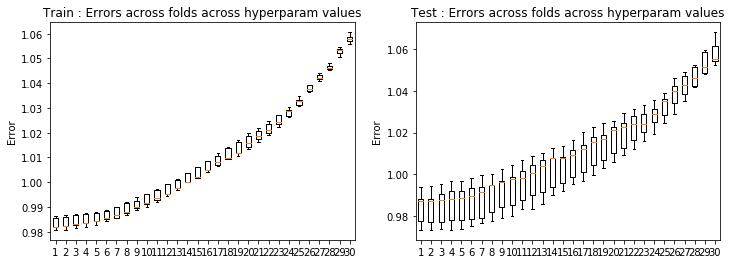

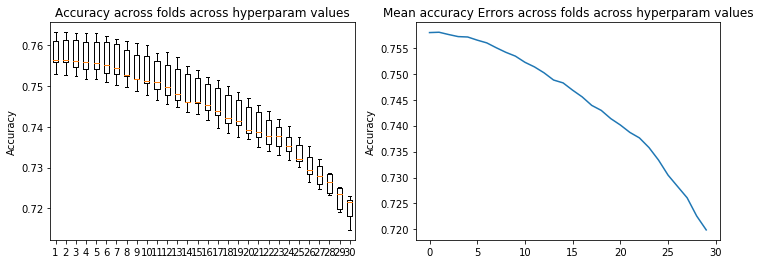

In [217]:
result_crossval(loss_tr12,loss_te12)
result_crossval_accuracy(acc12)

In [218]:
# test 13: degree 1, class, remove correlated features, not removal of outliers, undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr13, loss_te13, w13, acc13 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'class',  method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  2.65206763e-02 -2.07279063e-01 -2.52456832e-01
  2.52767711e-01  5.75965547e-02  6.49065096e-02 -1.83103647e-01
  1.30930083e-01  1.65257016e-01  3.51041268e-03 -3.95699659e-03
  2.37795348e-01 -6.00053257e-03 -1.89362993e-04  6.16801613e-02
  2.17949549e-03 -5.24250592e-02 -8.70349313e-04 -5.35270297e-03]
Ridge regression: w=[-0.28512101  0.0262587  -0.20774915 -0.24941209  0.24941962  0.05585407
  0.05086393 -0.16968021  0.13375498  0.17355212  0.00489677 -0.00597897
  0.23186203 -0.00747645  0.00202765  0.06585676  0.00425505 -0.04808925
 -0.00066399 -0.00120428]
Ridge regression: w=[-0.28705164  0.03083804 -0.20791779 -0.25511551  0.25409967  0.05673799
  0.05877742 -0.17571685  0.13112988  0.17159289  0.00896946 -0.00325325
  0.23351181 -0.01044521  0.00127943  0.0717692

Ridge regression: w=[-0.28574534  0.03130644 -0.2056182  -0.24627395  0.24748071  0.05631088
  0.06193175 -0.1689675   0.13110933  0.16941577  0.00888419 -0.00329164
  0.22118157 -0.01040226  0.00124642  0.06928018  0.00487107 -0.05028977
 -0.00166943 -0.00084434]
Ridge regression: w=[-0.28180557  0.02908682 -0.20758521 -0.24993222  0.25055462  0.05403094
  0.05787281 -0.17074527  0.1280185   0.17297327  0.00096064 -0.00315334
  0.22913126 -0.00867305 -0.0004097   0.06412068  0.003101   -0.04565757
 -0.00035226 -0.00172188]
Ridge regression: w=[-0.28212588  0.02842233 -0.20464694 -0.24091726  0.24587298  0.05960143
  0.06333538 -0.16584997  0.13386109  0.16740677  0.00258504 -0.00169028
  0.21234072 -0.00618411  0.00192692  0.06161909  0.00619131 -0.04363582
 -0.00120368 -0.00180602]
Accuracy = [0.7086664947124065, 0.7155016765540366, 0.7076347691514058, 0.7155016765540366, 0.7129223626515347]
Ridge regression: w=[-2.83165437e-01  2.72507421e-02 -2.04370393e-01 -2.40358792e-01
  2.4362

Ridge regression: w=[-0.27993414  0.03331724 -0.19698085 -0.21259003  0.22154335  0.05425632
  0.0709444  -0.14552173  0.13081607  0.160412    0.00850657 -0.0034205
  0.17743413 -0.01018326  0.00113613  0.06059044  0.00481815 -0.04440473
 -0.00172073 -0.00086143]
Ridge regression: w=[-0.27607449  0.03122966 -0.1987354  -0.21546042  0.22396754  0.05204085
  0.06739385 -0.14728164  0.1277499   0.1633311   0.00064709 -0.00328887
  0.18459811 -0.0084903  -0.00033359  0.05555208  0.00314497 -0.04008251
 -0.00040887 -0.00154924]
Ridge regression: w=[-0.27638828  0.03065263 -0.19655488 -0.20825789  0.22024659  0.05748866
  0.07163199 -0.14306211  0.13330094  0.15870361  0.00235991 -0.00190805
  0.17007037 -0.0061384   0.00180644  0.05371313  0.00611592 -0.03806543
 -0.0012979  -0.00174268]
Accuracy = [0.7092468403404695, 0.7169202992004127, 0.7082795976270312, 0.7158885736394119, 0.7125354655661594]
Ridge regression: w=[-2.75910011e-01  3.00327221e-02 -1.94647940e-01 -2.00119683e-01
  2.12245

Ridge regression: w=[-2.56144384e-01  3.61014624e-02 -1.75484946e-01 -1.31615198e-01
  1.55125733e-01  4.72342854e-02  7.88485792e-02 -1.07376552e-01
  1.27344225e-01  1.30458665e-01  2.68784673e-03 -4.23594365e-03
  9.49777574e-02 -5.75212623e-03  1.65344277e-04  3.60206862e-02
  2.46423796e-03 -2.43653815e-02 -7.58516436e-04 -4.47332718e-03]
Ridge regression: w=[-0.256289    0.03576583 -0.17417648 -0.13045307  0.15397946  0.04588921
  0.07250829 -0.10036306  0.12892391  0.13317894  0.0032201  -0.00628804
  0.09091902 -0.00644217  0.00200286  0.03765373  0.00409154 -0.02154847
 -0.00056131 -0.00075604]
Ridge regression: w=[-0.2580244   0.03940596 -0.17463632 -0.1339085   0.15643989  0.04643387
  0.07705351 -0.1032617   0.12743891  0.13344916  0.00715455 -0.00358724
  0.09150262 -0.00920503  0.00096561  0.04292319  0.00462975 -0.02378047
 -0.00172349 -0.00081502]
Ridge regression: w=[-2.54466835e-01  3.77394308e-02 -1.75746273e-01 -1.35164310e-01
  1.57567712e-01  4.44417796e-02  7.491

Ridge regression: w=[-2.05927043e-01  4.53623909e-02 -1.40552281e-01 -6.00442931e-02
  8.62164523e-02  3.11743108e-02  6.47223275e-02 -7.48162480e-02
  1.10842099e-01  9.80475625e-02 -1.19586597e-03 -3.31291240e-03
  2.83091746e-02 -6.43295517e-03  1.88729833e-04  2.13939632e-02
  3.22098636e-03  6.67762985e-03 -6.05929187e-04 -5.63320804e-04]
Ridge regression: w=[-0.2061611   0.04523153 -0.14121621 -0.05933146  0.08557138  0.03534367
  0.06499621 -0.07413813  0.11442898  0.09666756  0.00061321 -0.00250092
  0.02343736 -0.00489604  0.00142307  0.02204846  0.00514165  0.0079411
 -0.00137141 -0.00130126]
Accuracy = [0.7104720144441579, 0.7137606396698478, 0.7076347691514058, 0.7155661594015992, 0.7055068351818417]
Ridge regression: w=[-0.19305546  0.04517176 -0.1324493  -0.04730443  0.07308124  0.03011841
  0.06199082 -0.0713611   0.10816111  0.08852441  0.00122469 -0.00364092
  0.01864177 -0.00454821  0.00071393  0.01763635  0.00258646  0.00910996
 -0.00052206 -0.00320564]
Ridge regress

Ridge regression: w=[-0.11165194  0.04105828 -0.08357825 -0.01488897  0.027758    0.01509715
  0.04038539 -0.04758849  0.07293791  0.05536878  0.00139213 -0.00215049
 -0.00551485 -0.00367427  0.00077651  0.00912038  0.00258603  0.0213266
 -0.00077365 -0.00041958]
Ridge regression: w=[-0.11011252  0.0406378  -0.08340756 -0.01465499  0.02773295  0.01409413
  0.04019338 -0.04776612  0.07154313  0.05607464 -0.0015572  -0.00216153
 -0.0046152  -0.00383083  0.00029171  0.0069181   0.00237391  0.02182834
 -0.00055852 -0.0001973 ]
Ridge regression: w=[-0.11023768  0.04072625 -0.08440316 -0.01510281  0.02747046  0.0162449
  0.03997493 -0.04790562  0.07342233  0.05568628 -0.00044702 -0.00172033
 -0.00657235 -0.002991    0.00102832  0.00776835  0.00320582  0.02247038
 -0.00091104 -0.00084133]
Accuracy = [0.7051199380964663, 0.705893732267217, 0.7010575187000258, 0.7109233943770957, 0.7017668300232138]
Ridge regression: w=[-9.51766830e-02  3.72063017e-02 -7.43100670e-02 -1.10376670e-02
  2.2201120

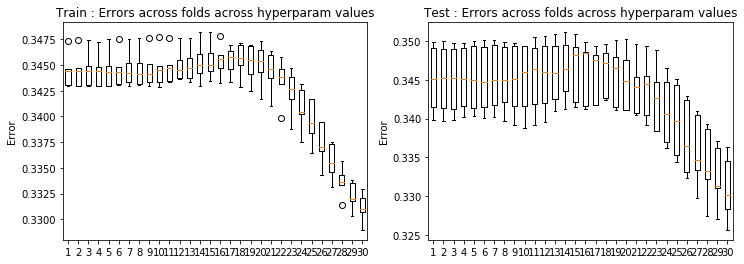

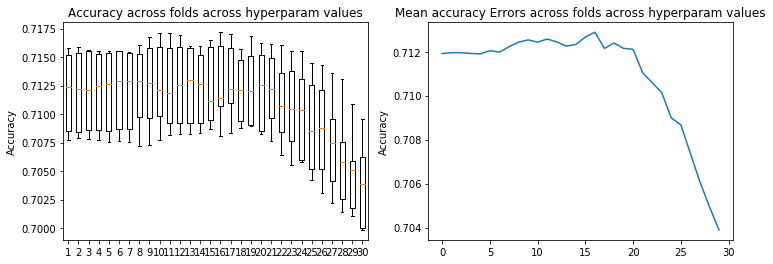

In [219]:
result_crossval(loss_tr13,loss_te13)
result_crossval_accuracy(acc13)

In [220]:
# test 14: degree 2, class, remove correlated features, not removal of outliers, undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr14, loss_te14, w14, acc14 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'class',  method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  2.65206763e-02 -2.07279063e-01 -2.52456832e-01
  2.52767711e-01  5.75965547e-02  6.49065096e-02 -1.83103647e-01
  1.30930083e-01  1.65257016e-01  3.51041268e-03 -3.95699659e-03
  2.37795348e-01 -6.00053257e-03 -1.89362993e-04  6.16801613e-02
  2.17949549e-03 -5.24250592e-02 -8.70349313e-04 -5.35270297e-03]
Ridge regression: w=[-0.28512101  0.0262587  -0.20774915 -0.24941209  0.24941962  0.05585407
  0.05086393 -0.16968021  0.13375498  0.17355212  0.00489677 -0.00597897
  0.23186203 -0.00747645  0.00202765  0.06585676  0.00425505 -0.04808925
 -0.00066399 -0.00120428]
Ridge regression: w=[-0.28705164  0.03083804 -0.20791779 -0.25511551  0.25409967  0.05673799
  0.05877742 -0.17571685  0.13112988  0.17159289  0.00896946 -0.00325325
  0.23351181 -0.01044521  0.00127943  0.0717692

Ridge regression: w=[-0.28574534  0.03130644 -0.2056182  -0.24627395  0.24748071  0.05631088
  0.06193175 -0.1689675   0.13110933  0.16941577  0.00888419 -0.00329164
  0.22118157 -0.01040226  0.00124642  0.06928018  0.00487107 -0.05028977
 -0.00166943 -0.00084434]
Ridge regression: w=[-0.28180557  0.02908682 -0.20758521 -0.24993222  0.25055462  0.05403094
  0.05787281 -0.17074527  0.1280185   0.17297327  0.00096064 -0.00315334
  0.22913126 -0.00867305 -0.0004097   0.06412068  0.003101   -0.04565757
 -0.00035226 -0.00172188]
Ridge regression: w=[-0.28212588  0.02842233 -0.20464694 -0.24091726  0.24587298  0.05960143
  0.06333538 -0.16584997  0.13386109  0.16740677  0.00258504 -0.00169028
  0.21234072 -0.00618411  0.00192692  0.06161909  0.00619131 -0.04363582
 -0.00120368 -0.00180602]
Accuracy = [0.7086664947124065, 0.7155016765540366, 0.7076347691514058, 0.7155016765540366, 0.7129223626515347]
Ridge regression: w=[-2.83165437e-01  2.72507421e-02 -2.04370393e-01 -2.40358792e-01
  2.4362

Ridge regression: w=[-2.77894488e-01  2.93022145e-02 -1.97061693e-01 -2.09955982e-01
  2.20055447e-01  5.50908626e-02  7.51098187e-02 -1.51916116e-01
  1.30675867e-01  1.55234351e-01  3.30481469e-03 -4.11683525e-03
  1.81812806e-01 -6.00047203e-03 -1.11289157e-04  5.17336220e-02
  2.27286902e-03 -4.50917935e-02 -8.43498982e-04 -5.09260913e-03]
Ridge regression: w=[-0.27805138  0.02896383 -0.19666444 -0.20761658  0.21766393  0.05346976
  0.064459   -0.14088921  0.13305481  0.16121193  0.00439097 -0.00616581
  0.17623347 -0.00720261  0.00199844  0.05471434  0.00420749 -0.04129665
 -0.00063405 -0.00107334]
Ridge regression: w=[-0.27993414  0.03331724 -0.19698085 -0.21259003  0.22154335  0.05425632
  0.0709444  -0.14552173  0.13081607  0.160412    0.00850657 -0.0034205
  0.17743413 -0.01018326  0.00113613  0.06059044  0.00481815 -0.04440473
 -0.00172073 -0.00086143]
Ridge regression: w=[-0.27607449  0.03122966 -0.1987354  -0.21546042  0.22396754  0.05204085
  0.06739385 -0.14728164  0.1277

Ridge regression: w=[-0.26377832  0.03802691 -0.17966415 -0.1496533   0.17003281  0.04839754
  0.07730186 -0.11048681  0.12859517  0.13962747  0.00749618 -0.00357341
  0.10716778 -0.00946989  0.00099065  0.04634661  0.00468029 -0.02869583
 -0.00173936 -0.00083368]
Ridge regression: w=[-2.60141422e-01  3.62603003e-02 -1.80916445e-01 -1.51200374e-01
  1.71393566e-01  4.63514762e-02  7.48737514e-02 -1.11826042e-01
  1.25625990e-01  1.41702212e-01 -1.68297676e-05 -3.46490429e-03
  1.12468989e-01 -7.99003546e-03 -1.46577618e-04  4.15481612e-02
  3.23277600e-03 -2.51398906e-02 -5.03181231e-04 -1.18458293e-03]
Ridge regression: w=[-0.2604371   0.03584387 -0.1800328  -0.14703926  0.16921887  0.05152235
  0.07713347 -0.1090922   0.13056681  0.13854125  0.00183933 -0.00227278
  0.10213627 -0.00591096  0.00163491  0.04086379  0.00592265 -0.02329035
 -0.00142464 -0.00160128]
Accuracy = [0.7122130513283467, 0.7158240907918494, 0.7083440804745937, 0.7170492648955378, 0.7109878772246583]
Ridge regres

Ridge regression: w=[-0.21887394  0.04394302 -0.1492847  -0.07186762  0.09888687  0.03861028
  0.06844642 -0.07878295  0.11880509  0.1041163   0.00084902 -0.00252128
  0.0335807  -0.00514194  0.00146203  0.02511306  0.00534696  0.00281563
 -0.00141168 -0.0013603 ]
Accuracy = [0.7107299458344081, 0.7136316739747227, 0.7084085633221563, 0.716017539334537, 0.7064095950477173]
Ridge regression: w=[-0.2072846   0.04421353 -0.14115655 -0.05839017  0.08538439  0.03336702
  0.06596535 -0.07619131  0.11321012  0.09570745  0.00150896 -0.00382709
  0.02780592 -0.00483526  0.00062665  0.02049785  0.00260237  0.00414668
 -0.00057116 -0.0034564 ]
Ridge regression: w=[-0.20740163  0.043953   -0.13968277 -0.05815918  0.08490381  0.03249666
  0.06266282 -0.07257136  0.11394051  0.09616321  0.00157146 -0.00572256
  0.02568896 -0.00508117  0.001946    0.02138221  0.00372931  0.00570105
 -0.00048305 -0.00035971]
Ridge regression: w=[-0.208806    0.04640097 -0.14020773 -0.0599077   0.0859786   0.03278805
 

Ridge regression: w=[-0.12666288  0.04323299 -0.09430381 -0.01923373  0.03430225  0.01903725
  0.04432029 -0.05253526  0.0814827   0.06203892 -0.00034909 -0.00191001
 -0.00471947 -0.00333173  0.0011172   0.00950254  0.00358418  0.02229664
 -0.0010038  -0.0009298 ]
Accuracy = [0.7058292494196544, 0.7075702863038432, 0.7014444157854011, 0.7130513283466597, 0.7025406241939645]
Ridge regression: w=[-1.10838428e-01  4.02151540e-02 -8.40426704e-02 -1.42138396e-02
  2.79233601e-02  1.51628142e-02  4.01728985e-02 -4.81552300e-02
  7.28608002e-02  5.52542979e-02  7.62061235e-05 -2.31397957e-03
 -4.85064480e-03 -2.85814232e-03  8.65451001e-04  6.79714333e-03
  2.07427757e-03  2.07890852e-02 -2.87497230e-04 -1.91345863e-03]
Ridge regression: w=[-1.10901006e-01  3.99684329e-02 -8.31058007e-02 -1.44147798e-02
  2.76310573e-02  1.48780835e-02  3.88770833e-02 -4.67472374e-02
  7.29121108e-02  5.48005030e-02 -3.16950483e-05 -3.54612255e-03
 -5.45448384e-03 -2.91763815e-03  1.37295622e-03  7.19380769e-

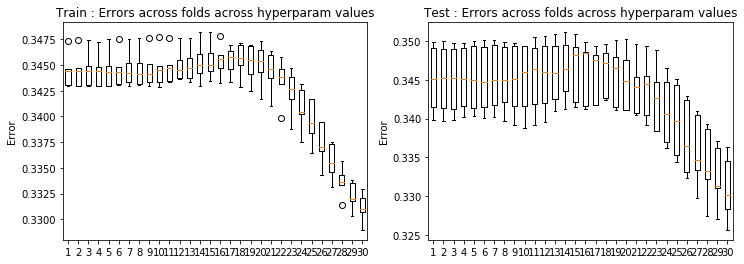

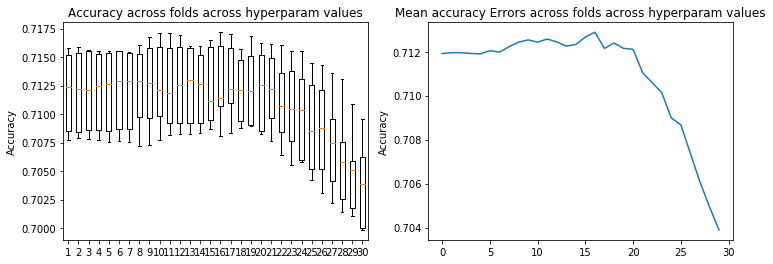

In [221]:
result_crossval(loss_tr14,loss_te14)
result_crossval_accuracy(acc14)

In [222]:
# test 15: degree 3, class, remove correlated features, not removal of outliers, undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr15, loss_te15, w15, acc15 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'class', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  2.90394531e-01 -2.98106100e-01 -6.93973453e-02
  5.57955240e-01  4.29053002e-02  3.46719210e-01 -1.31170170e-01
  1.80613353e-02  4.49271080e-01 -6.01865054e-03  8.17621528e-03
  2.41145916e-01  4.29968135e-03  1.58319038e-02  1.05904927e-01
  2.48144187e-03  8.41575954e-02  8.91799557e-04  9.50045575e-03
 -1.14578429e-01  1.37283213e-01 -2.56964914e-01 -3.96826146e-01
 -1.75869971e-02 -2.32379670e-01  1.64543723e-01  2.36871292e-02
 -4.98435841e-01 -3.53831017e-02 -5.34758033e-05 -3.76960420e-01
 -6.96011150e-02  7.11595261e-03 -1.25873305e-01  1.43570355e-04
 -1.80795786e-01  1.59491437e-01  2.72346489e-03 -3.75450396e-01
  6.37534894e-03  2.00178325e-01  3.59255194e-02  1.56511199e-02
  1.33355996e-01 -8.23343853e-02  7.53106283e-02  1.84811054e-01
  8.61554693e-03 -9.4267

Ridge regression: w=[-2.83263560e-01  2.49992412e-01 -2.88094905e-01  8.75461536e-03
  5.06231450e-01  4.40386420e-02  3.56227870e-01 -1.28199399e-01
  1.20863048e-02  4.29241316e-01 -1.06232735e-02  9.58616857e-03
  2.01223849e-01  4.59587311e-03  1.99645776e-02  1.01368447e-01
  5.40206498e-03  8.75350297e-02 -5.47837154e-03  4.21118381e-03
 -9.87853226e-02  1.27621813e-01 -3.77981582e-01 -3.16616423e-01
 -1.21825823e-02 -2.53260882e-01  1.79194845e-01  2.72032496e-02
 -4.56867791e-01 -3.94158459e-02 -1.85835274e-03 -3.34774284e-01
 -6.66995749e-02 -3.59502076e-05 -1.07984676e-01 -1.73588967e-03
 -1.76775191e-01  1.57286452e-01 -1.36605661e-03 -3.18638699e-01
  4.14392756e-03  2.57509327e-01 -6.35503616e-03  9.29246803e-03
  1.34111206e-01 -9.91621921e-02  8.41098519e-02  1.60180303e-01
  1.18144072e-02 -8.94125136e-03  1.41593270e-01 -5.96681831e-03
 -1.83927524e-02  4.60545685e-02  2.48903273e-03  4.80178831e-02
  4.83791648e-03 -2.12478123e-03]
Accuracy = [0.755996904823317, 0.761

Ridge regression: w=[-2.82505526e-01  1.69420875e-01 -2.92124050e-01 -3.01278119e-02
  4.56760436e-01  4.68883103e-02  3.44447758e-01 -1.27453547e-01
  2.20089493e-02  3.93733426e-01 -2.72985076e-03  4.30374667e-03
  1.92736633e-01 -2.88869499e-03  1.35544780e-02  1.03126917e-01
  7.13640569e-04  9.56443301e-02 -8.04640781e-03  8.08044641e-03
 -8.15616072e-02  1.32394696e-01 -2.72360247e-01 -2.14143654e-01
 -2.26895457e-02 -2.51542306e-01  1.51860799e-01  2.63944629e-02
 -4.04153690e-01 -4.06460070e-02  1.78369429e-03 -2.86524831e-01
 -6.65328221e-02  8.18113688e-04 -1.07937183e-01 -3.79186533e-04
 -1.99626847e-01  1.57182297e-01  3.02524396e-03 -2.19961340e-01
  9.61717700e-03  1.91737094e-01 -6.16790490e-02  1.25511584e-02
  1.38086805e-01 -8.25534173e-02  7.28437682e-02  1.36674256e-01
  3.10009996e-03 -4.24853429e-03  1.13315718e-01 -1.11709257e-03
 -1.39483205e-02  4.26621687e-02  5.04488815e-03  6.25477408e-02
  7.63055521e-03 -7.17886368e-03]
Ridge regression: w=[-2.82826628e-01

Ridge regression: w=[-0.28574534  0.13331729 -0.27160819 -0.01848144  0.40618343  0.04241112
  0.30793346 -0.11852791  0.03807815  0.38955068  0.00090455 -0.00382647
  0.15610165 -0.00099725  0.00903867  0.10522988 -0.00238856  0.08150086
 -0.00475291 -0.00221571 -0.04255951  0.10052195 -0.27007942 -0.13094609
 -0.01363589 -0.181677    0.12607738  0.02699194 -0.40496939 -0.04039398
  0.00331709 -0.22748035 -0.06858313  0.00398096 -0.1044719  -0.00051849
 -0.16358007  0.158684    0.00295643 -0.14591661  0.02106285  0.18359185
 -0.10226029  0.00965091  0.10266711 -0.06550813  0.06058546  0.1322367
  0.0077902   0.0026838   0.08469899 -0.00635863 -0.01052268  0.04205377
  0.00793174  0.02964278  0.00327432  0.00162723]
Ridge regression: w=[-0.28180557  0.12060046 -0.28189128 -0.01548435  0.40484205  0.04504674
  0.31349664 -0.11981175  0.03274384  0.35971029 -0.00266303  0.00364525
  0.16241648 -0.00296228  0.01289932  0.0994234   0.00057211  0.08611556
 -0.00790445  0.00756007 -0.0571265

Ridge regression: w=[-0.28460984  0.09435726 -0.25966659 -0.01048608  0.3640617   0.04019548
  0.27648195 -0.11642264  0.04905978  0.33367033  0.00092675 -0.00394089
  0.13172463 -0.00121648  0.00871452  0.09898466 -0.00225091  0.07316468
 -0.00467403 -0.00198432 -0.03170204  0.08131323 -0.25484845 -0.07228029
 -0.00945932 -0.14337818  0.10155828  0.02863764 -0.31459566 -0.04108073
  0.00322814 -0.16730981 -0.0690872   0.00384053 -0.08865774 -0.00061106
 -0.14430084  0.15848156  0.00281915 -0.09531102  0.028799    0.1661322
 -0.12899316  0.0077621   0.08117848 -0.04804162  0.05250538  0.08705665
  0.00786384  0.00276045  0.05211089 -0.0061993  -0.01009437  0.03322191
  0.0077876   0.01819432  0.00311573  0.00144907]
Ridge regression: w=[-0.28068572  0.08487501 -0.26883819 -0.00789942  0.36328199  0.0426702
  0.27760646 -0.11488174  0.04417586  0.31893529 -0.00255336  0.00275548
  0.13619351 -0.00305629  0.01196857  0.0931679   0.00041516  0.07490894
 -0.00771711  0.00681752 -0.0420117 

Ridge regression: w=[-0.28280022  0.06609748 -0.24582396 -0.00882909  0.32710001  0.03758986
  0.24120435 -0.1116802   0.05949939  0.28306855  0.00101428 -0.00405192
  0.11021574 -0.00154716  0.0082472   0.09082773 -0.00195699  0.06251561
 -0.00456592 -0.00170407 -0.02644686  0.05981965 -0.22887416 -0.03346385
 -0.00480841 -0.10256912  0.07669821  0.030656   -0.23089392 -0.04197839
  0.00312573 -0.11438502 -0.06967309  0.00367461 -0.06963862 -0.00071453
 -0.12003916  0.15797923  0.00266982 -0.06050134  0.03727353  0.14249617
 -0.14113879  0.00569383  0.05829594 -0.0318289   0.04519845  0.04588899
  0.00789877  0.00281975  0.02500745 -0.00597359 -0.00950775  0.02289716
  0.00747597  0.00439266  0.00292679  0.00123664]
Ridge regression: w=[-2.78901058e-01  5.95128171e-02 -2.53640476e-01 -5.85986573e-03
  3.26607139e-01  3.98326767e-02  2.39972105e-01 -1.10146031e-01
  5.51396101e-02  2.76180519e-01 -2.39960145e-03  1.65991855e-03
  1.13984547e-01 -3.20406303e-03  1.07279927e-02  8.484083

Ridge regression: w=[-2.78051384e-01  4.52513240e-02 -2.35590093e-01 -2.97822192e-03
  2.90873661e-01  2.61543874e-02  1.98738507e-01 -1.04516081e-01
  6.92318499e-02  2.41599026e-01 -1.41620936e-03 -5.72210807e-03
  9.01975449e-02 -1.46751001e-03  8.11644209e-03  7.35377749e-02
  3.96833392e-03  5.12736343e-02 -1.96474167e-03  2.56055459e-03
 -2.45681087e-02  4.52752397e-02 -1.90542742e-01 -1.23076748e-02
  1.17710326e-02 -7.52820132e-02  6.46819375e-02  3.33561901e-02
 -1.70232073e-01 -4.44257613e-02 -2.00012998e-03 -6.85706217e-02
 -7.18609582e-02  5.02427986e-03 -3.90307687e-02 -3.15996553e-03
 -9.22901804e-02  1.57576539e-01 -1.26569644e-04 -3.78646877e-02
  4.05003881e-02  1.10844186e-01 -1.47091571e-01 -1.70666032e-03
  3.50523037e-02 -2.05953046e-02  4.17269599e-02  2.58281821e-02
  7.50924858e-03  1.63723270e-03  1.90548412e-04 -3.59470746e-03
 -8.28738573e-03  6.74255120e-03  1.48697312e-03 -5.84782874e-04
  6.06980600e-04 -2.44910668e-03]
Ridge regression: w=[-2.79934138e-01

Ridge regression: w=[-2.73432225e-01  3.44385431e-02 -2.17240630e-01 -7.42342478e-03
  2.46672245e-01  2.98228463e-02  1.73814740e-01 -1.00320381e-01
  7.49028607e-02  2.00184124e-01 -3.36638686e-03  8.92092571e-04
  8.22629883e-02  1.96386915e-03  7.59137550e-03  6.64295691e-02
  2.05543714e-04  3.98464313e-02  1.36807635e-04  2.69394350e-03
 -2.30529514e-02  1.36580749e-02 -1.62935116e-01  6.51309654e-03
  6.44433838e-03 -3.75577291e-02  2.85373735e-02  3.65009522e-02
 -1.13467385e-01 -4.01084421e-02 -1.08649212e-03 -4.09370302e-02
 -7.26800234e-02  5.65713602e-03 -2.90253308e-02 -2.71225999e-04
 -7.06101875e-02  1.56465529e-01  2.03242763e-03 -2.13972817e-02
  5.58456255e-02  8.18428425e-02 -1.27709914e-01  3.31192547e-03
  1.86139865e-02  4.41235826e-03  3.62748800e-02  3.18294842e-03
  7.35642476e-03 -3.42544296e-03 -1.10506465e-02 -4.86467547e-03
 -9.48077413e-03  8.36079252e-04  4.41395730e-03 -1.93215785e-02
 -3.12876010e-03 -5.48646583e-03]
Ridge regression: w=[-2.73586601e-01

Ridge regression: w=[-2.68886036e-01  2.91970623e-02 -2.07737079e-01 -1.31647932e-03
  2.31168733e-01  3.12564867e-02  1.60103367e-01 -9.50157343e-02
  7.43493367e-02  1.89401365e-01 -6.24909725e-03  1.47949253e-03
  6.70578370e-02  6.13043009e-04  9.94204904e-03  6.14071121e-02
  3.23220438e-03  4.14921647e-02 -4.32199254e-03 -9.22600309e-04
 -2.55356049e-02  1.06884450e-02 -1.48339998e-01  9.22235107e-03
  1.02691828e-02 -2.82681517e-02  2.98090013e-02  4.08707881e-02
 -9.40422259e-02 -4.45276295e-02 -1.53050588e-03 -2.76255879e-02
 -7.03793413e-02 -1.69753365e-04 -1.63518715e-02 -1.92412600e-03
 -5.88072945e-02  1.52667053e-01 -1.16962524e-03 -1.67986619e-02
  4.93420900e-02  6.44591200e-02 -1.24757639e-01 -1.37650858e-03
  1.36624220e-02  4.37943679e-03  4.06551877e-02 -7.72895882e-03
  9.42039464e-03 -2.63577585e-03 -2.12072925e-02 -4.10604436e-03
 -9.93120328e-03 -3.57127340e-03  3.87226227e-03 -2.60975643e-02
  3.29263988e-03  1.10147060e-03]
Accuracy = [0.7458086149084343, 0.75

Ridge regression: w=[-2.60141422e-01  2.33656991e-02 -1.93695150e-01 -5.95786826e-03
  1.87237488e-01  2.87906745e-02  1.30978046e-01 -8.36458775e-02
  7.44415034e-02  1.59334794e-01 -1.52316197e-03 -1.92875659e-03
  5.67654783e-02 -3.97352303e-03  5.01695203e-03  5.18880374e-02
  8.24564237e-04  3.38740390e-02 -5.45143068e-03  2.38471195e-03
 -2.40846910e-02  1.82136406e-04 -1.18911093e-01  1.62578292e-02
  5.68256136e-03 -9.19627880e-03  1.14315251e-02  4.18505992e-02
 -4.73883291e-02 -4.61465979e-02  6.46671973e-04 -1.03433215e-02
 -6.95655147e-02 -2.55462221e-04 -6.87420417e-03 -8.54290875e-04
 -4.11150347e-02  1.48925172e-01  2.51153758e-03 -4.32006056e-03
  5.26843891e-02  3.86976853e-02 -9.84534134e-02  1.92325736e-04
 -1.19321033e-03 -1.26901704e-03  3.92688836e-02 -1.91456966e-02
  2.40977487e-03  1.03109372e-04 -8.62917590e-03 -1.25535825e-03
 -6.48737170e-03 -3.47467664e-03  4.00195442e-03 -3.25455483e-02
  4.81968445e-03 -2.46910685e-03]
Ridge regression: w=[-2.60437104e-01

Ridge regression: w=[-2.51074542e-01  2.27987936e-02 -1.72204117e-01 -4.77236885e-03
  1.45367860e-01  2.45738987e-02  1.11301191e-01 -7.68740841e-02
  7.61584380e-02  1.37913400e-01  2.19362254e-03 -3.59081140e-03
  4.05295068e-02 -3.81161823e-03  3.89309731e-03  4.83430930e-02
  1.00249104e-03  2.79499754e-02 -3.28655128e-03 -3.63675990e-04
 -2.19099945e-02 -1.47981572e-02 -9.20015630e-02  1.79399798e-02
  1.04919777e-02  4.23224502e-03  4.96471354e-04  4.49140197e-02
 -1.91153130e-02 -4.62894764e-02  2.26710218e-03 -1.82329975e-03
 -6.99305957e-02  2.27512817e-03  1.01895004e-03 -1.07994334e-03
 -3.07779359e-02  1.43658759e-01  1.70431306e-03  2.75064604e-03
  5.04222930e-02  1.89680342e-02 -7.25395364e-02  1.45249681e-03
 -9.50781167e-03  3.66030238e-03  4.13959309e-02 -3.39201788e-02
  6.79356378e-03  1.84818660e-03 -4.66808025e-03 -4.47901329e-03
 -4.55174324e-03 -5.49176002e-03  4.32666054e-03 -3.31920592e-02
  1.53768349e-03  1.84471629e-04]
Ridge regression: w=[-2.47612803e-01

Ridge regression: w=[-2.31437558e-01  2.17987253e-02 -1.51389486e-01  2.21776658e-03
  1.09773182e-01  1.95820879e-02  8.84171544e-02 -6.81420056e-02
  7.47270933e-02  1.17020541e-01  6.32548198e-04 -5.21339746e-03
  2.88958954e-02 -2.94758129e-03  2.90895651e-03  3.49551214e-02
  3.01136681e-03  2.57430971e-02 -1.25591869e-03  6.65480258e-04
 -2.14919697e-02 -2.03071485e-02 -6.88901913e-02  1.56764352e-02
  1.37499027e-02  6.70907719e-03 -4.08269263e-03  4.61319076e-02
 -7.98007503e-03 -4.65558027e-02 -2.10413306e-03  2.24992113e-03
 -6.88288702e-02  3.95036981e-03  7.14564777e-03 -2.74530769e-03
 -1.87452724e-02  1.34651286e-01 -1.07617437e-04  7.14988513e-03
  4.26781133e-02  3.62382657e-04 -5.44786700e-02  1.99385924e-03
 -1.35198327e-02  6.86161919e-03  4.58767264e-02 -2.88096461e-02
  4.84869839e-03  2.97412877e-04 -3.87971303e-03 -2.74280292e-03
 -2.65321064e-03 -5.70543145e-03  1.86546798e-03 -2.81036944e-02
  8.66402873e-05 -7.78808869e-04]
Ridge regression: w=[-2.33004678e-01

Ridge regression: w=[-2.07284598e-01  2.23890270e-02 -1.30246197e-01  2.35759795e-03
  7.96925825e-02  1.86086577e-02  7.57648607e-02 -6.29121983e-02
  7.06745231e-02  9.78680301e-02  1.81415928e-04 -1.99155600e-03
  2.01366141e-02 -1.51431533e-03  1.62520074e-03  2.76921747e-02
  1.45797780e-03  2.29704315e-02 -6.69203248e-04 -5.60202704e-04
 -2.25214484e-02 -2.70789916e-02 -5.40247731e-02  1.51952862e-02
  1.23927991e-02  1.31342351e-02 -1.24961615e-02  4.67395158e-02
  2.38642203e-03 -4.03903110e-02 -1.78301865e-03  3.91395755e-03
 -6.40268704e-02  2.99465856e-03  7.82107492e-03 -5.03144153e-04
 -1.14743491e-02  1.21965137e-01  8.51552917e-04  1.18538387e-02
  3.66147036e-02 -1.02288242e-02 -3.49685778e-02  4.81621499e-03
 -1.24419839e-02  7.27108589e-03  4.70493240e-02 -2.59083814e-02
  3.83421351e-03 -1.23082111e-03  9.03768575e-05 -2.95096356e-03
 -2.81595404e-03 -4.89374827e-03  2.28775009e-03 -2.65034824e-02
 -1.42827967e-03 -2.42391290e-03]
Ridge regression: w=[-2.07401629e-01

Ridge regression: w=[-1.92009086e-01  2.31675769e-02 -1.18440896e-01  5.02928856e-03
  6.84192206e-02  1.96514678e-02  6.75729500e-02 -5.88346840e-02
  6.86108899e-02  8.97605736e-02 -9.98919677e-04 -1.29569906e-03
  1.28316122e-02 -2.42835266e-03  2.41237424e-03  2.48060507e-02
  3.30518247e-03  2.47765549e-02 -1.79595723e-03 -9.29134255e-04
 -2.28432835e-02 -2.66628323e-02 -4.57721713e-02  1.34391490e-02
  1.25001720e-02  1.24851573e-02 -1.15777580e-02  4.75996911e-02
  5.94069458e-03 -4.16155981e-02 -8.17700207e-04  1.74749623e-03
 -5.92918734e-02  5.95040755e-05  9.49025112e-03 -1.30439552e-03
 -5.94637277e-03  1.11774074e-01 -2.81292573e-04  1.37100163e-02
  3.00997526e-02 -1.74901335e-02 -2.95478256e-02  3.06658982e-03
 -1.22913090e-02  7.50437388e-03  4.89074001e-02 -2.45235046e-02
  4.08568587e-03 -6.77472020e-04 -1.02581927e-03 -2.84672126e-03
 -2.19409627e-03 -2.59788930e-03  2.82104460e-03 -2.20853731e-02
  8.22699191e-04  2.41303917e-04]
Accuracy = [0.7340727366520505, 0.73

Ridge regression: w=[-1.60140117e-01  2.35814058e-02 -9.67674665e-02  2.28781856e-03
  4.90349477e-02  1.50552055e-02  5.24903250e-02 -5.12288348e-02
  6.12131677e-02  7.27776778e-02 -8.89914123e-04 -2.06391176e-03
  7.47767846e-03 -3.28980770e-03  7.62167380e-04  1.65872548e-02
  1.91784869e-03  2.15215533e-02 -1.65501074e-03  4.28923297e-04
 -2.36625046e-02 -2.51012052e-02 -3.56669973e-02  1.12493077e-02
  9.03427829e-03  1.40340839e-02 -1.59381869e-02  4.23104220e-02
  1.15044787e-02 -3.81209080e-02 -1.74309980e-04  2.62497135e-03
 -5.16695609e-02 -7.94973408e-04  8.65731022e-03 -7.66973837e-04
 -2.34691066e-04  9.42287998e-02  1.42231805e-03  1.72786268e-02
  2.17219471e-02 -1.65432004e-02 -1.93575372e-02  3.42152487e-03
 -7.12598699e-03  3.62375193e-03  4.66363717e-02 -1.76608740e-02
  5.86792510e-04 -3.70269342e-04  2.80213871e-03 -2.39281086e-03
 -1.52367593e-03  8.76671426e-05  2.05156420e-03 -1.46906008e-02
  1.46910291e-03 -6.36753162e-04]
Ridge regression: w=[-1.60322136e-01

Ridge regression: w=[-0.12651907  0.02341176 -0.07695745  0.00147919  0.0339955   0.01218131
  0.04077522 -0.0433072   0.05416052  0.05763841 -0.00091085 -0.00179365
  0.00193287 -0.00289829  0.00049342  0.01126541  0.0018015   0.01935131
 -0.00114221  0.0002486  -0.02331211 -0.02429619 -0.02641601  0.00844443
  0.00796811  0.0137949  -0.01636721  0.03675229  0.01295258 -0.03245504
 -0.00021354  0.00055168 -0.04290721 -0.00071185  0.00747977 -0.00065879
  0.00397356  0.07477425  0.00114478  0.01888768  0.01321641 -0.01569811
 -0.01263698  0.00367876 -0.00306054  0.00143546  0.043583   -0.01178855
  0.00020453 -0.00048749  0.00227324 -0.00232341 -0.00100594  0.00135103
  0.00174372 -0.00776213  0.00104904 -0.00046773]
Ridge regression: w=[-1.26662876e-01  2.34616585e-02 -7.72958803e-02  2.43982513e-03
  3.37657253e-02  1.37077366e-02  4.13681476e-02 -4.33331287e-02
  5.56192840e-02  5.78412245e-02 -4.14433471e-04 -1.19546918e-03
  4.63148046e-04 -2.24223389e-03  1.23657479e-03  1.241001

Ridge regression: w=[-9.45533488e-02  2.21410742e-02 -5.98533153e-02  4.60953754e-04
  2.28349002e-02  9.47991682e-03  3.11427025e-02 -3.53164674e-02
  4.58667131e-02  4.44500899e-02 -9.02879249e-04 -1.49049696e-03
 -1.49389028e-03 -2.44971442e-03  3.37845761e-04  7.26686757e-03
  1.58367726e-03  1.69602210e-02 -7.80100754e-04  1.23602031e-04
 -2.20147866e-02 -2.23918239e-02 -1.92809477e-02  5.79455116e-03
  6.52830825e-03  1.28804210e-02 -1.55066174e-02  2.99260236e-02
  1.29033392e-02 -2.60900364e-02 -2.06635385e-04 -1.22345686e-03
 -3.37430527e-02 -5.80708343e-04  6.06864134e-03 -5.30887455e-04
  6.52482154e-03  5.60671555e-02  8.83116762e-04  1.90066081e-02
  6.42241757e-03 -1.31717721e-02 -8.46215607e-03  3.41218916e-03
  3.56651059e-04 -7.09613982e-04  3.83666750e-02 -6.52976163e-03
 -7.62336146e-05 -5.20392857e-04  1.12128701e-03 -2.08985088e-03
 -6.34589219e-04  2.05407438e-03  1.43459023e-03 -2.32147392e-03
  7.33691910e-04 -3.43447418e-04]
Ridge regression: w=[-9.46608202e-02

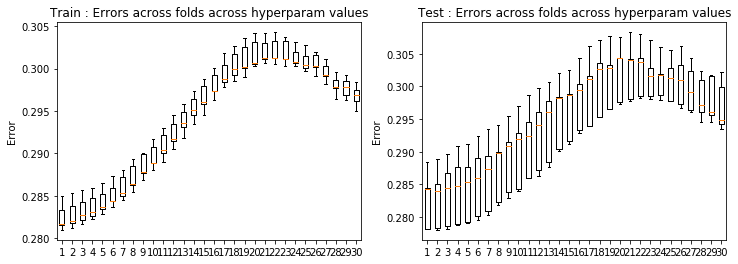

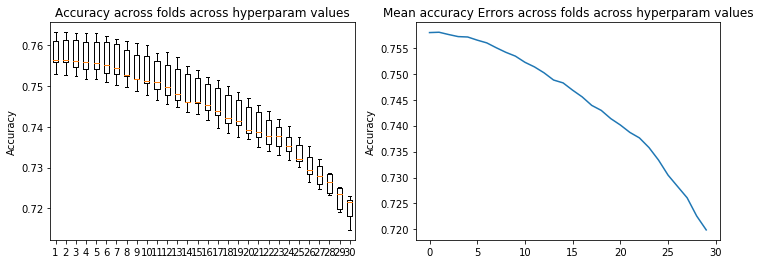

In [223]:
result_crossval(loss_tr15,loss_te15)
result_crossval_accuracy(acc15)

In [224]:
# test 16: degree 1, classification, remove correlated features, not removal of outliers, median undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr16, loss_te16, w16, acc16 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'classification', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  2.65206763e-02 -2.07279063e-01 -2.52456832e-01
  2.52767711e-01  5.75965547e-02  6.49065096e-02 -1.83103647e-01
  1.30930083e-01  1.65257016e-01  3.51041268e-03 -3.95699659e-03
  2.37795348e-01 -6.00053257e-03 -1.89362993e-04  6.16801613e-02
  2.17949549e-03 -5.24250592e-02 -8.70349313e-04 -5.35270297e-03]
Ridge regression: w=[-0.28512101  0.0262587  -0.20774915 -0.24941209  0.24941962  0.05585407
  0.05086393 -0.16968021  0.13375498  0.17355212  0.00489677 -0.00597897
  0.23186203 -0.00747645  0.00202765  0.06585676  0.00425505 -0.04808925
 -0.00066399 -0.00120428]
Ridge regression: w=[-0.28705164  0.03083804 -0.20791779 -0.25511551  0.25409967  0.05673799
  0.05877742 -0.17571685  0.13112988  0.17159289  0.00896946 -0.00325325
  0.23351181 -0.01044521  0.00127943  0.0717692

Ridge regression: w=[-0.28212588  0.02842233 -0.20464694 -0.24091726  0.24587298  0.05960143
  0.06333538 -0.16584997  0.13386109  0.16740677  0.00258504 -0.00169028
  0.21234072 -0.00618411  0.00192692  0.06161909  0.00619131 -0.04363582
 -0.00120368 -0.00180602]
Accuracy = [0.7086664947124065, 0.7155016765540366, 0.7076347691514058, 0.7155016765540366, 0.7129223626515347]
Ridge regression: w=[-2.83165437e-01  2.72507421e-02 -2.04370393e-01 -2.40358792e-01
  2.43628863e-01  5.69908791e-02  6.85069019e-02 -1.73680781e-01
  1.30916872e-01  1.62587475e-01  3.45843842e-03 -4.00740450e-03
  2.21109240e-01 -6.00760639e-03 -1.71760753e-04  5.86743992e-02
  2.20550141e-03 -5.06117883e-02 -8.63387167e-04 -5.28188239e-03]
Ridge regression: w=[-0.28332531  0.02695933 -0.20455958 -0.23751869  0.24057768  0.05528326
  0.05554097 -0.16095623  0.13361171  0.17016973  0.00475964 -0.0060385
  0.21522459 -0.00740622  0.0020162   0.06246347  0.00424141 -0.04643742
 -0.0006561  -0.00116984]
Ridge regress

Ridge regression: w=[-0.27805138  0.02896383 -0.19666444 -0.20761658  0.21766393  0.05346976
  0.064459   -0.14088921  0.13305481  0.16121193  0.00439097 -0.00616581
  0.17623347 -0.00720261  0.00199844  0.05471434  0.00420749 -0.04129665
 -0.00063405 -0.00107334]
Ridge regression: w=[-0.27993414  0.03331724 -0.19698085 -0.21259003  0.22154335  0.05425632
  0.0709444  -0.14552173  0.13081607  0.160412    0.00850657 -0.0034205
  0.17743413 -0.01018326  0.00113613  0.06059044  0.00481815 -0.04440473
 -0.00172073 -0.00086143]
Ridge regression: w=[-0.27607449  0.03122966 -0.1987354  -0.21546042  0.22396754  0.05204085
  0.06739385 -0.14728164  0.1277499   0.1633311   0.00064709 -0.00328887
  0.18459811 -0.0084903  -0.00033359  0.05555208  0.00314497 -0.04008251
 -0.00040887 -0.00154924]
Ridge regression: w=[-0.27638828  0.03065263 -0.19655488 -0.20825789  0.22024659  0.05748866
  0.07163199 -0.14306211  0.13330094  0.15870361  0.00235991 -0.00190805
  0.17007037 -0.0061384   0.00180644  0.

Ridge regression: w=[-2.56144384e-01  3.61014624e-02 -1.75484946e-01 -1.31615198e-01
  1.55125733e-01  4.72342854e-02  7.88485792e-02 -1.07376552e-01
  1.27344225e-01  1.30458665e-01  2.68784673e-03 -4.23594365e-03
  9.49777574e-02 -5.75212623e-03  1.65344277e-04  3.60206862e-02
  2.46423796e-03 -2.43653815e-02 -7.58516436e-04 -4.47332718e-03]
Ridge regression: w=[-0.256289    0.03576583 -0.17417648 -0.13045307  0.15397946  0.04588921
  0.07250829 -0.10036306  0.12892391  0.13317894  0.0032201  -0.00628804
  0.09091902 -0.00644217  0.00200286  0.03765373  0.00409154 -0.02154847
 -0.00056131 -0.00075604]
Ridge regression: w=[-0.2580244   0.03940596 -0.17463632 -0.1339085   0.15643989  0.04643387
  0.07705351 -0.1032617   0.12743891  0.13344916  0.00715455 -0.00358724
  0.09150262 -0.00920503  0.00096561  0.04292319  0.00462975 -0.02378047
 -0.00172349 -0.00081502]
Ridge regression: w=[-2.54466835e-01  3.77394308e-02 -1.75746273e-01 -1.35164310e-01
  1.57567712e-01  4.44417796e-02  7.491

Ridge regression: w=[-0.208806    0.04640097 -0.14020773 -0.0599077   0.0859786   0.03278805
  0.06558239 -0.07428135  0.11331688  0.09674448  0.00463711 -0.00335173
  0.02582041 -0.00705956  0.00089985  0.02526635  0.0041045   0.00477274
 -0.00144049 -0.00065616]
Ridge regression: w=[-2.05927043e-01  4.53623909e-02 -1.40552281e-01 -6.00442931e-02
  8.62164523e-02  3.11743108e-02  6.47223275e-02 -7.48162480e-02
  1.10842099e-01  9.80475625e-02 -1.19586597e-03 -3.31291240e-03
  2.83091746e-02 -6.43295517e-03  1.88729833e-04  2.13939632e-02
  3.22098636e-03  6.67762985e-03 -6.05929187e-04 -5.63320804e-04]
Ridge regression: w=[-0.2061611   0.04523153 -0.14121621 -0.05933146  0.08557138  0.03534367
  0.06499621 -0.07413813  0.11442898  0.09666756  0.00061321 -0.00250092
  0.02343736 -0.00489604  0.00142307  0.02204846  0.00514165  0.0079411
 -0.00137141 -0.00130126]
Accuracy = [0.7104720144441579, 0.7137606396698478, 0.7076347691514058, 0.7155661594015992, 0.7055068351818417]
Ridge regress

Ridge regression: w=[-1.10838428e-01  4.02151540e-02 -8.40426704e-02 -1.42138396e-02
  2.79233601e-02  1.51628142e-02  4.01728985e-02 -4.81552300e-02
  7.28608002e-02  5.52542979e-02  7.62061235e-05 -2.31397957e-03
 -4.85064480e-03 -2.85814232e-03  8.65451001e-04  6.79714333e-03
  2.07427757e-03  2.07890852e-02 -2.87497230e-04 -1.91345863e-03]
Ridge regression: w=[-1.10901006e-01  3.99684329e-02 -8.31058007e-02 -1.44147798e-02
  2.76310573e-02  1.48780835e-02  3.88770833e-02 -4.67472374e-02
  7.29121108e-02  5.48005030e-02 -3.16950483e-05 -3.54612255e-03
 -5.45448384e-03 -2.91763815e-03  1.37295622e-03  7.19380769e-03
  2.47324295e-03  2.11020565e-02 -4.09778762e-04 -8.31873718e-05]
Ridge regression: w=[-0.11165194  0.04105828 -0.08357825 -0.01488897  0.027758    0.01509715
  0.04038539 -0.04758849  0.07293791  0.05536878  0.00139213 -0.00215049
 -0.00551485 -0.00367427  0.00077651  0.00912038  0.00258603  0.0213266
 -0.00077365 -0.00041958]
Ridge regression: w=[-0.11011252  0.0406378 

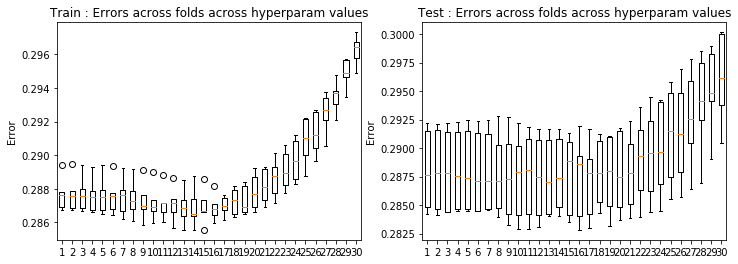

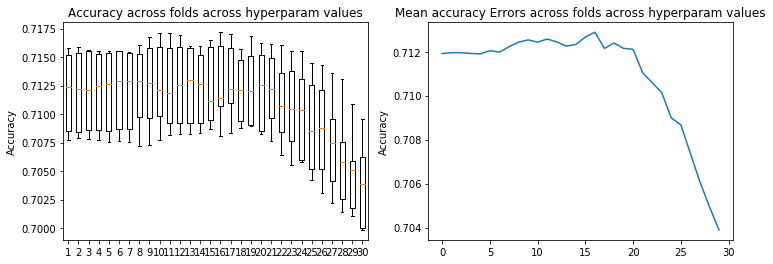

In [225]:
result_crossval(loss_tr16,loss_te16)
result_crossval_accuracy(acc16)

In [226]:
# test 17: degree 2, classification, remove correlated features, not removal of outliers, median undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr17, loss_te17, w17, acc17 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'classification', method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  6.80509068e-02 -2.84072203e-01 -1.99908180e-01
  6.42706677e-01  3.53941411e-02  2.18249707e-01 -1.62139131e-01
  9.80687450e-02  2.50810836e-01  2.36544386e-03 -3.11342885e-03
  1.93586534e-01 -1.26234797e-03 -2.44790546e-03  6.29778126e-02
  3.59445857e-03  5.06377589e-02 -2.26234923e-03 -3.92923082e-03
  4.19034762e-02  1.35308707e-01  3.56164435e-02 -4.37961970e-01
  1.19792280e-03  1.03283259e-02  8.40857377e-02  2.36836488e-02
 -1.74677705e-01 -3.69912540e-02 -6.71242770e-04 -1.65630347e-01
 -7.00514105e-02  6.84871567e-03 -4.59701267e-02 -3.73035319e-04
 -1.06847189e-01  1.60936073e-01  2.38908640e-03]
Ridge regression: w=[-2.85121014e-01  6.43472315e-02 -2.79296732e-01 -1.91851052e-01
  6.54660953e-01  3.18619972e-02  2.16247329e-01 -1.33112815e-01
  1.01203843e-01  2

Ridge regression: w=[-2.82749445e-01  4.93653548e-02 -2.79721543e-01 -1.81241278e-01
  6.10504183e-01  4.07152772e-02  2.16910337e-01 -1.30270263e-01
  9.74040469e-02  2.56935173e-01  2.09039610e-04 -1.92423390e-03
  1.69335073e-01 -3.92796801e-03 -1.11680407e-03  6.40584527e-02
  3.95602119e-03  4.94281772e-02 -1.33307960e-03 -7.29599272e-04
  2.15779219e-02  1.32008042e-01  1.88314210e-02 -4.09706912e-01
 -7.70671458e-03 -4.26318740e-03  5.77052391e-02  2.53277247e-02
 -1.65651805e-01 -4.22327305e-02  1.32559206e-03 -1.39848534e-01
 -6.66760576e-02  5.01405184e-04 -4.20971211e-02 -7.68046716e-04
 -9.95522951e-02  1.58477122e-01  2.94837266e-03]
Ridge regression: w=[-2.83070824e-01  4.63868131e-02 -2.71942582e-01 -1.70644040e-01
  6.17272903e-01  3.97989462e-02  2.16478077e-01 -1.51193025e-01
  1.01703379e-01  2.61120042e-01  1.42563162e-03 -1.24335978e-03
  1.85552278e-01 -2.17843290e-03  8.49680476e-04  6.57987833e-02
  6.66685903e-03  5.50736952e-02 -1.25247761e-03 -1.07944675e-03


Ridge regression: w=[-2.83663349e-01  4.02908413e-02 -2.78535206e-01 -1.55263477e-01
  5.29181624e-01  3.40299043e-02  2.14072890e-01 -1.42693365e-01
  1.02034593e-01  2.42093861e-01  2.74795776e-03 -3.26072182e-03
  1.59141979e-01 -1.67854896e-03 -2.28919007e-03  6.39621414e-02
  3.44696316e-03  4.72377540e-02 -2.36674058e-03 -3.76913407e-03
  1.08919404e-02  1.24525177e-01  1.64620134e-03 -3.39964571e-01
  3.08411094e-03 -1.26744069e-02  6.74235508e-02  2.77264777e-02
 -1.55547798e-01 -3.84984785e-02 -8.07260145e-04 -1.25048385e-01
 -7.16184988e-02  6.58526523e-03 -3.92869468e-02 -4.38304562e-04
 -1.02253655e-01  1.60990529e-01  2.34333637e-03]
Ridge regression: w=[-2.83823502e-01  3.94722625e-02 -2.74092313e-01 -1.49055033e-01
  5.40018492e-01  3.04360720e-02  2.09119344e-01 -1.21375601e-01
  1.04939816e-01  2.55876452e-01  5.49355577e-03 -5.23853610e-03
  1.48594140e-01 -4.76487022e-03  2.42089122e-05  6.49071425e-02
  4.69047638e-03  4.28408392e-02 -1.25789349e-03 -7.85648335e-04


Ridge regression: w=[-2.81004756e-01  2.31275505e-02 -2.64926708e-01 -1.12701168e-01
  4.68350573e-01  3.76103001e-02  2.09586827e-01 -1.26730095e-01
  1.06437225e-01  2.46355110e-01  1.93409950e-03 -1.48054080e-03
  1.38324802e-01 -2.79952775e-03  9.56555064e-04  6.54558063e-02
  6.53959844e-03  4.99793969e-02 -1.37912832e-03 -1.04732090e-03
 -7.92649221e-03  1.07634674e-01 -2.78273079e-02 -2.93792627e-01
  1.83012094e-03 -2.39649483e-02  6.64891392e-02  3.31147539e-02
 -1.55351910e-01 -4.32763132e-02 -1.81094154e-03 -1.18906512e-01
 -6.99746192e-02 -3.19658829e-04 -3.31350668e-02 -2.41906556e-03
 -9.68931356e-02  1.58382400e-01 -1.65815044e-03]
Accuracy = [0.7449058550425587, 0.7539334537013155, 0.7450993035852463, 0.7542558679391282, 0.7478075831828733]
Ridge regression: w=[-0.28174155  0.02589464 -0.27086392 -0.11451247  0.42450703  0.03244853
  0.20462988 -0.12762036  0.10569432  0.23053401  0.00308999 -0.00336576
  0.12995955 -0.00208422 -0.00209804  0.0638445   0.00332156  0.045

Ridge regression: w=[-2.77648204e-01  1.84232314e-02 -2.59688555e-01 -8.54675831e-02
  3.54524477e-01  3.56512309e-02  1.91298586e-01 -1.07814533e-01
  1.06294391e-01  2.21862584e-01  9.04871486e-04 -2.37044960e-03
  1.07581026e-01 -5.06805614e-03 -8.13942279e-04  6.20783323e-02
  3.84975179e-03  4.68063360e-02 -1.44115582e-03 -3.79194490e-04
 -1.78136488e-02  1.01187430e-01 -5.49102273e-02 -1.93512216e-01
 -1.51058415e-03 -4.03102740e-02  3.35111522e-02  3.48915103e-02
 -1.16075916e-01 -4.57384675e-02  9.33316219e-04 -5.92999893e-02
 -7.03501169e-02  1.70388105e-04 -2.41455901e-02 -1.05451403e-03
 -9.27320691e-02  1.57352726e-01  2.83714430e-03]
Ridge regression: w=[-2.77963785e-01  1.62517293e-02 -2.54626351e-01 -6.98269334e-02
  3.53168627e-01  3.53193780e-02  1.95408520e-01 -1.13018037e-01
  1.10274054e-01  2.28358879e-01  2.28539106e-03 -1.63129102e-03
  1.06464214e-01 -3.30275231e-03  1.06558895e-03  6.36759928e-02
  6.44653282e-03  4.79272977e-02 -1.45716533e-03 -1.00673927e-03


Ridge regression: w=[-0.27543912  0.01999359 -0.23633888 -0.04906995  0.24656809  0.03026318
  0.17045347 -0.10326283  0.11191116  0.20371884  0.0089043  -0.00233166
  0.07804032 -0.00812295  0.00029668  0.06427631  0.00459528  0.04383344
 -0.0022392  -0.00028685 -0.02091364  0.07459015 -0.07615015 -0.10710311
  0.00643457 -0.042954    0.02631949  0.03959585 -0.10012272 -0.04680199
  0.00272088 -0.02648017 -0.07304777  0.00310605 -0.01609183 -0.00126024
 -0.08862045  0.15607761  0.00230829]
Ridge regression: w=[-2.71641453e-01  1.72880341e-02 -2.39515837e-01 -4.63925521e-02
  2.48612951e-01  3.22661712e-02  1.66294500e-01 -1.00558891e-01
  1.10404192e-01  1.98051244e-01  1.04069588e-03 -2.51194202e-03
  8.22435095e-02 -5.49293898e-03 -6.33982191e-04  5.78997558e-02
  3.82368663e-03  4.38634527e-02 -1.45469551e-03 -1.97126046e-04
 -2.39193821e-02  7.91335014e-02 -8.09475256e-02 -1.09946893e-01
  2.20552320e-03 -4.36448056e-02  2.41175282e-02  3.95932233e-02
 -9.03306160e-02 -4.72202647e

Ridge regression: w=[-2.62004221e-01  2.04658999e-02 -2.07326342e-01 -1.60553421e-02
  1.65344553e-01  2.27032124e-02  1.32338708e-01 -9.14974719e-02
  1.17167715e-01  1.70286563e-01  5.34350840e-03 -5.41641418e-03
  5.61839338e-02 -5.45634367e-03  8.99647996e-04  5.04795018e-02
  4.61717533e-03  3.75786269e-02 -1.27028743e-03 -2.24008631e-04
 -2.37031440e-02  4.89123224e-02 -8.71292064e-02 -5.44945641e-02
  1.36441150e-02 -3.92702192e-02  1.98853568e-02  4.34414027e-02
 -6.85762839e-02 -4.90631268e-02 -2.19968934e-03 -6.14393953e-03
 -7.44676687e-02  4.78247141e-03 -5.44699960e-03 -3.19584169e-03
 -6.73629721e-02  1.50864553e-01  1.17935274e-04]
Ridge regression: w=[-2.63778316e-01  2.22798716e-02 -2.06911211e-01 -2.04489911e-02
  1.65030582e-01  2.66330350e-02  1.38736169e-01 -9.51084715e-02
  1.14705095e-01  1.69511806e-01  8.32277689e-03 -2.33862009e-03
  5.66704824e-02 -7.92901121e-03  4.15824332e-04  5.62230535e-02
  4.57124012e-03  3.80231456e-02 -2.19918610e-03 -1.87224932e-04


Ridge regression: w=[-2.47894245e-01  2.28192052e-02 -1.82635295e-01 -2.91049783e-03
  1.25329581e-01  2.61076544e-02  1.17782433e-01 -8.55306947e-02
  1.16108050e-01  1.48450992e-01  2.27097299e-03 -1.74001775e-03
  4.15946296e-02 -4.18889101e-03  1.34312521e-03  4.45367647e-02
  6.09640199e-03  3.53592573e-02 -1.46543147e-03 -7.96019725e-04
 -2.73132299e-02  2.86896356e-02 -9.05421431e-02 -2.71890179e-02
  1.27146164e-02 -2.91313141e-02  1.32633695e-02  4.86611259e-02
 -5.32092416e-02 -4.72730764e-02 -1.26738268e-03 -2.20915714e-03
 -7.09537213e-02 -4.56873376e-05 -3.32190348e-04 -1.87146755e-03
 -5.49469298e-02  1.42332735e-01 -7.24105430e-04]
Accuracy = [0.7381351560484911, 0.745292752127934, 0.7356203249935517, 0.7466468919267475, 0.7398117100851174]
Ridge regression: w=[-0.24100769  0.02395948 -0.17107407 -0.00539068  0.10789416  0.02155743
  0.10680881 -0.08189653  0.11374261  0.13418625  0.00318927 -0.00309062
  0.03968306 -0.00332641 -0.00057114  0.04006976  0.00306505  0.0290

Ridge regression: w=[-2.18625444e-01  2.71376870e-02 -1.45257582e-01 -3.54523313e-03
  8.27737146e-02  2.03903354e-02  8.37235573e-02 -7.24158785e-02
  1.06604397e-01  1.11724540e-01  6.24274036e-05 -2.57461544e-03
  2.72284235e-02 -5.37024615e-03 -1.14076795e-04  3.03032938e-02
  3.57330802e-03  2.61557536e-02 -1.19339646e-03  1.56910485e-04
 -3.03733149e-02  6.60725747e-03 -7.27624254e-02 -4.83244644e-03
  1.06876253e-02 -9.59148634e-03 -2.78309375e-03  4.78587269e-02
 -2.22763433e-02 -4.65202416e-02 -4.44960049e-05  1.02659808e-02
 -6.56657184e-02 -7.72288329e-04  6.27989593e-03 -8.57118020e-04
 -3.17940809e-02  1.27108497e-01  1.91638794e-03]
Ridge regression: w=[-2.18873938e-01  2.72154632e-02 -1.44562532e-01 -1.09534702e-04
  8.19742445e-02  2.19202029e-02  8.62341390e-02 -7.20095998e-02
  1.09775845e-01  1.12569817e-01  1.65366713e-03 -1.71555214e-03
  2.38447374e-02 -4.04897269e-03  1.33283043e-03  3.21526944e-02
  5.61939178e-03  2.82956180e-02 -1.33819857e-03 -7.60232354e-04


Ridge regression: w=[-0.17758621  0.02947208 -0.10909742 -0.00174717  0.05167888  0.01554203
  0.06151777 -0.05750492  0.09437979  0.08002934  0.00171512 -0.00256366
  0.01284704 -0.00299199  0.00027947  0.01988961  0.00266014  0.02097312
 -0.00106014 -0.00188816 -0.03053132 -0.01534865 -0.0509441   0.00371976
  0.01454021  0.00413486 -0.01283346  0.04568353 -0.00590649 -0.03840159
 -0.00175946  0.00636249 -0.05833546  0.00235613  0.0062293  -0.00036364
 -0.01418195  0.104819    0.00057219]
Ridge regression: w=[-1.77686474e-01  2.94194463e-02 -1.08350325e-01 -1.62440944e-03
  5.18663560e-02  1.47150690e-02  5.87013078e-02 -5.61231612e-02
  9.49982610e-02  7.99174705e-02  2.05101087e-03 -4.31443875e-03
  1.11424626e-02 -3.80554754e-03  1.38193791e-03  1.93720824e-02
  3.66972741e-03  2.17521308e-02 -7.17272473e-04  9.27202610e-05
 -3.02444728e-02 -1.39390883e-02 -5.03232629e-02  2.62735839e-03
  1.41217876e-02  2.34600229e-03 -9.42599963e-03  4.50069201e-02
 -5.39307205e-03 -4.19151328e

Ridge regression: w=[-1.27353137e-01  2.94868338e-02 -7.94981083e-02 -2.15658514e-03
  3.11133208e-02  1.19177441e-02  4.24761641e-02 -4.38926151e-02
  7.39361408e-02  5.58259067e-02  7.65555653e-04 -2.08247430e-03
  2.47562704e-03 -2.48813736e-03  5.71127332e-04  1.10883831e-02
  2.18225181e-03  1.87816391e-02 -6.03998338e-04 -1.54550580e-03
 -2.98707838e-02 -2.39667518e-02 -3.25974424e-02  4.78817016e-03
  1.13643018e-02  1.11760294e-02 -1.62495558e-02  3.82124719e-02
  5.84466551e-03 -3.09614452e-02 -1.40422341e-03  1.25577800e-03
 -4.48386066e-02  1.49915794e-03  6.50770884e-03 -2.48553794e-04
  5.98283582e-05  7.56666253e-02  3.39240439e-04]
Ridge regression: w=[-1.27425039e-01  2.94090674e-02 -7.88699976e-02 -2.27925598e-03
  3.11457555e-02  1.14258055e-02  4.07402073e-02 -4.27773475e-02
  7.42124322e-02  5.54851698e-02  8.14885147e-04 -3.44842376e-03
  1.47096288e-03 -2.90054507e-03  1.26242360e-03  1.09296152e-02
  2.81621430e-03  1.91517279e-02 -5.16972787e-04  5.29960272e-05


Ridge regression: w=[-9.46608202e-02  2.77401425e-02 -6.31711530e-02 -2.63372455e-03
  2.10619711e-02  1.04455804e-02  3.23527847e-02 -3.57099136e-02
  5.97360253e-02  4.36529262e-02 -2.03224265e-04 -1.23185737e-03
 -3.03676898e-03 -2.35787054e-03  8.64199171e-04  7.60641301e-03
  2.80655001e-03  1.83683041e-02 -7.21936819e-04 -6.27087724e-04
 -2.78821835e-02 -2.42028056e-02 -2.41207126e-02  3.21836214e-03
  8.52192571e-03  1.19809686e-02 -1.43293654e-02  3.18951993e-02
  1.02520040e-02 -2.63112359e-02 -3.27200370e-04 -2.58834238e-03
 -3.45217446e-02  4.24870116e-05  6.66880487e-03 -5.95173098e-04
  6.31757376e-03  5.56206827e-02  6.21046244e-05]
Accuracy = [0.7278179004384834, 0.7310420428166108, 0.7276244518957957, 0.7291075573897343, 0.7244647923652309]


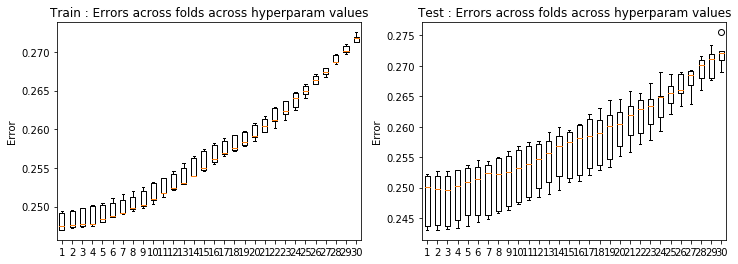

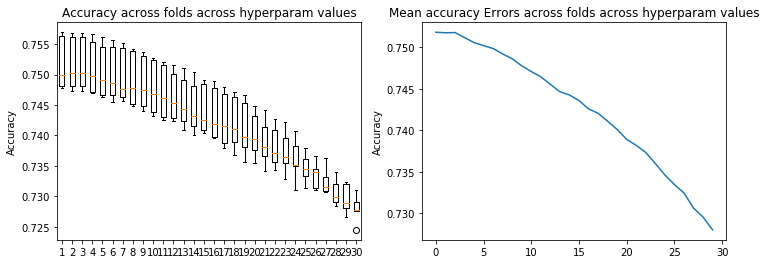

In [227]:
result_crossval(loss_tr17,loss_te17)
result_crossval_accuracy(acc17)

In [228]:
# test 18: degree 3, classification, remove correlated features, not removal of outliers, median undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr18, loss_te18, w18, acc18 = cross_validation_demo(ss_y, ss_tX_nocorrfeat, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'classification',  method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
Ridge regression: w=[-2.84960129e-01  2.90394531e-01 -2.98106100e-01 -6.93973453e-02
  5.57955240e-01  4.29053002e-02  3.46719210e-01 -1.31170170e-01
  1.80613353e-02  4.49271080e-01 -6.01865054e-03  8.17621528e-03
  2.41145916e-01  4.29968135e-03  1.58319038e-02  1.05904927e-01
  2.48144187e-03  8.41575954e-02  8.91799557e-04  9.50045575e-03
 -1.14578429e-01  1.37283213e-01 -2.56964914e-01 -3.96826146e-01
 -1.75869971e-02 -2.32379670e-01  1.64543723e-01  2.36871292e-02
 -4.98435841e-01 -3.53831017e-02 -5.34758033e-05 -3.76960420e-01
 -6.96011150e-02  7.11595261e-03 -1.25873305e-01  1.43570355e-04
 -1.80795786e-01  1.59491437e-01  2.72346489e-03 -3.75450396e-01
  6.37534894e-03  2.00178325e-01  3.59255194e-02  1.56511199e-02
  1.33355996e-01 -8.23343853e-02  7.53106283e-02  1.84811054e-01
  8.61554693e-03 -9.4267

Ridge regression: w=[-2.83263560e-01  2.49992412e-01 -2.88094905e-01  8.75461536e-03
  5.06231450e-01  4.40386420e-02  3.56227870e-01 -1.28199399e-01
  1.20863048e-02  4.29241316e-01 -1.06232735e-02  9.58616857e-03
  2.01223849e-01  4.59587311e-03  1.99645776e-02  1.01368447e-01
  5.40206498e-03  8.75350297e-02 -5.47837154e-03  4.21118381e-03
 -9.87853226e-02  1.27621813e-01 -3.77981582e-01 -3.16616423e-01
 -1.21825823e-02 -2.53260882e-01  1.79194845e-01  2.72032496e-02
 -4.56867791e-01 -3.94158459e-02 -1.85835274e-03 -3.34774284e-01
 -6.66995749e-02 -3.59502076e-05 -1.07984676e-01 -1.73588967e-03
 -1.76775191e-01  1.57286452e-01 -1.36605661e-03 -3.18638699e-01
  4.14392756e-03  2.57509327e-01 -6.35503616e-03  9.29246803e-03
  1.34111206e-01 -9.91621921e-02  8.41098519e-02  1.60180303e-01
  1.18144072e-02 -8.94125136e-03  1.41593270e-01 -5.96681831e-03
 -1.83927524e-02  4.60545685e-02  2.48903273e-03  4.80178831e-02
  4.83791648e-03 -2.12478123e-03]
Accuracy = [0.755996904823317, 0.761

Ridge regression: w=[-2.82505526e-01  1.69420875e-01 -2.92124050e-01 -3.01278119e-02
  4.56760436e-01  4.68883103e-02  3.44447758e-01 -1.27453547e-01
  2.20089493e-02  3.93733426e-01 -2.72985076e-03  4.30374667e-03
  1.92736633e-01 -2.88869499e-03  1.35544780e-02  1.03126917e-01
  7.13640569e-04  9.56443301e-02 -8.04640781e-03  8.08044641e-03
 -8.15616072e-02  1.32394696e-01 -2.72360247e-01 -2.14143654e-01
 -2.26895457e-02 -2.51542306e-01  1.51860799e-01  2.63944629e-02
 -4.04153690e-01 -4.06460070e-02  1.78369429e-03 -2.86524831e-01
 -6.65328221e-02  8.18113688e-04 -1.07937183e-01 -3.79186533e-04
 -1.99626847e-01  1.57182297e-01  3.02524396e-03 -2.19961340e-01
  9.61717700e-03  1.91737094e-01 -6.16790490e-02  1.25511584e-02
  1.38086805e-01 -8.25534173e-02  7.28437682e-02  1.36674256e-01
  3.10009996e-03 -4.24853429e-03  1.13315718e-01 -1.11709257e-03
 -1.39483205e-02  4.26621687e-02  5.04488815e-03  6.25477408e-02
  7.63055521e-03 -7.17886368e-03]
Ridge regression: w=[-2.82826628e-01

Ridge regression: w=[-0.28574534  0.13331729 -0.27160819 -0.01848144  0.40618343  0.04241112
  0.30793346 -0.11852791  0.03807815  0.38955068  0.00090455 -0.00382647
  0.15610165 -0.00099725  0.00903867  0.10522988 -0.00238856  0.08150086
 -0.00475291 -0.00221571 -0.04255951  0.10052195 -0.27007942 -0.13094609
 -0.01363589 -0.181677    0.12607738  0.02699194 -0.40496939 -0.04039398
  0.00331709 -0.22748035 -0.06858313  0.00398096 -0.1044719  -0.00051849
 -0.16358007  0.158684    0.00295643 -0.14591661  0.02106285  0.18359185
 -0.10226029  0.00965091  0.10266711 -0.06550813  0.06058546  0.1322367
  0.0077902   0.0026838   0.08469899 -0.00635863 -0.01052268  0.04205377
  0.00793174  0.02964278  0.00327432  0.00162723]
Ridge regression: w=[-0.28180557  0.12060046 -0.28189128 -0.01548435  0.40484205  0.04504674
  0.31349664 -0.11981175  0.03274384  0.35971029 -0.00266303  0.00364525
  0.16241648 -0.00296228  0.01289932  0.0994234   0.00057211  0.08611556
 -0.00790445  0.00756007 -0.0571265

Ridge regression: w=[-0.28460984  0.09435726 -0.25966659 -0.01048608  0.3640617   0.04019548
  0.27648195 -0.11642264  0.04905978  0.33367033  0.00092675 -0.00394089
  0.13172463 -0.00121648  0.00871452  0.09898466 -0.00225091  0.07316468
 -0.00467403 -0.00198432 -0.03170204  0.08131323 -0.25484845 -0.07228029
 -0.00945932 -0.14337818  0.10155828  0.02863764 -0.31459566 -0.04108073
  0.00322814 -0.16730981 -0.0690872   0.00384053 -0.08865774 -0.00061106
 -0.14430084  0.15848156  0.00281915 -0.09531102  0.028799    0.1661322
 -0.12899316  0.0077621   0.08117848 -0.04804162  0.05250538  0.08705665
  0.00786384  0.00276045  0.05211089 -0.0061993  -0.01009437  0.03322191
  0.0077876   0.01819432  0.00311573  0.00144907]
Ridge regression: w=[-0.28068572  0.08487501 -0.26883819 -0.00789942  0.36328199  0.0426702
  0.27760646 -0.11488174  0.04417586  0.31893529 -0.00255336  0.00275548
  0.13619351 -0.00305629  0.01196857  0.0931679   0.00041516  0.07490894
 -0.00771711  0.00681752 -0.0420117 

Ridge regression: w=[-0.28280022  0.06609748 -0.24582396 -0.00882909  0.32710001  0.03758986
  0.24120435 -0.1116802   0.05949939  0.28306855  0.00101428 -0.00405192
  0.11021574 -0.00154716  0.0082472   0.09082773 -0.00195699  0.06251561
 -0.00456592 -0.00170407 -0.02644686  0.05981965 -0.22887416 -0.03346385
 -0.00480841 -0.10256912  0.07669821  0.030656   -0.23089392 -0.04197839
  0.00312573 -0.11438502 -0.06967309  0.00367461 -0.06963862 -0.00071453
 -0.12003916  0.15797923  0.00266982 -0.06050134  0.03727353  0.14249617
 -0.14113879  0.00569383  0.05829594 -0.0318289   0.04519845  0.04588899
  0.00789877  0.00281975  0.02500745 -0.00597359 -0.00950775  0.02289716
  0.00747597  0.00439266  0.00292679  0.00123664]
Ridge regression: w=[-2.78901058e-01  5.95128171e-02 -2.53640476e-01 -5.85986573e-03
  3.26607139e-01  3.98326767e-02  2.39972105e-01 -1.10146031e-01
  5.51396101e-02  2.76180519e-01 -2.39960145e-03  1.65991855e-03
  1.13984547e-01 -3.20406303e-03  1.07279927e-02  8.484083

Ridge regression: w=[-2.78051384e-01  4.52513240e-02 -2.35590093e-01 -2.97822192e-03
  2.90873661e-01  2.61543874e-02  1.98738507e-01 -1.04516081e-01
  6.92318499e-02  2.41599026e-01 -1.41620936e-03 -5.72210807e-03
  9.01975449e-02 -1.46751001e-03  8.11644209e-03  7.35377749e-02
  3.96833392e-03  5.12736343e-02 -1.96474167e-03  2.56055459e-03
 -2.45681087e-02  4.52752397e-02 -1.90542742e-01 -1.23076748e-02
  1.17710326e-02 -7.52820132e-02  6.46819375e-02  3.33561901e-02
 -1.70232073e-01 -4.44257613e-02 -2.00012998e-03 -6.85706217e-02
 -7.18609582e-02  5.02427986e-03 -3.90307687e-02 -3.15996553e-03
 -9.22901804e-02  1.57576539e-01 -1.26569644e-04 -3.78646877e-02
  4.05003881e-02  1.10844186e-01 -1.47091571e-01 -1.70666032e-03
  3.50523037e-02 -2.05953046e-02  4.17269599e-02  2.58281821e-02
  7.50924858e-03  1.63723270e-03  1.90548412e-04 -3.59470746e-03
 -8.28738573e-03  6.74255120e-03  1.48697312e-03 -5.84782874e-04
  6.06980600e-04 -2.44910668e-03]
Ridge regression: w=[-2.79934138e-01

Ridge regression: w=[-2.73432225e-01  3.44385431e-02 -2.17240630e-01 -7.42342478e-03
  2.46672245e-01  2.98228463e-02  1.73814740e-01 -1.00320381e-01
  7.49028607e-02  2.00184124e-01 -3.36638686e-03  8.92092571e-04
  8.22629883e-02  1.96386915e-03  7.59137550e-03  6.64295691e-02
  2.05543714e-04  3.98464313e-02  1.36807635e-04  2.69394350e-03
 -2.30529514e-02  1.36580749e-02 -1.62935116e-01  6.51309654e-03
  6.44433838e-03 -3.75577291e-02  2.85373735e-02  3.65009522e-02
 -1.13467385e-01 -4.01084421e-02 -1.08649212e-03 -4.09370302e-02
 -7.26800234e-02  5.65713602e-03 -2.90253308e-02 -2.71225999e-04
 -7.06101875e-02  1.56465529e-01  2.03242763e-03 -2.13972817e-02
  5.58456255e-02  8.18428425e-02 -1.27709914e-01  3.31192547e-03
  1.86139865e-02  4.41235826e-03  3.62748800e-02  3.18294842e-03
  7.35642476e-03 -3.42544296e-03 -1.10506465e-02 -4.86467547e-03
 -9.48077413e-03  8.36079252e-04  4.41395730e-03 -1.93215785e-02
 -3.12876010e-03 -5.48646583e-03]
Ridge regression: w=[-2.73586601e-01

Ridge regression: w=[-2.68886036e-01  2.91970623e-02 -2.07737079e-01 -1.31647932e-03
  2.31168733e-01  3.12564867e-02  1.60103367e-01 -9.50157343e-02
  7.43493367e-02  1.89401365e-01 -6.24909725e-03  1.47949253e-03
  6.70578370e-02  6.13043009e-04  9.94204904e-03  6.14071121e-02
  3.23220438e-03  4.14921647e-02 -4.32199254e-03 -9.22600309e-04
 -2.55356049e-02  1.06884450e-02 -1.48339998e-01  9.22235107e-03
  1.02691828e-02 -2.82681517e-02  2.98090013e-02  4.08707881e-02
 -9.40422259e-02 -4.45276295e-02 -1.53050588e-03 -2.76255879e-02
 -7.03793413e-02 -1.69753365e-04 -1.63518715e-02 -1.92412600e-03
 -5.88072945e-02  1.52667053e-01 -1.16962524e-03 -1.67986619e-02
  4.93420900e-02  6.44591200e-02 -1.24757639e-01 -1.37650858e-03
  1.36624220e-02  4.37943679e-03  4.06551877e-02 -7.72895882e-03
  9.42039464e-03 -2.63577585e-03 -2.12072925e-02 -4.10604436e-03
 -9.93120328e-03 -3.57127340e-03  3.87226227e-03 -2.60975643e-02
  3.29263988e-03  1.10147060e-03]
Accuracy = [0.7458086149084343, 0.75

Ridge regression: w=[-2.60141422e-01  2.33656991e-02 -1.93695150e-01 -5.95786826e-03
  1.87237488e-01  2.87906745e-02  1.30978046e-01 -8.36458775e-02
  7.44415034e-02  1.59334794e-01 -1.52316197e-03 -1.92875659e-03
  5.67654783e-02 -3.97352303e-03  5.01695203e-03  5.18880374e-02
  8.24564237e-04  3.38740390e-02 -5.45143068e-03  2.38471195e-03
 -2.40846910e-02  1.82136406e-04 -1.18911093e-01  1.62578292e-02
  5.68256136e-03 -9.19627880e-03  1.14315251e-02  4.18505992e-02
 -4.73883291e-02 -4.61465979e-02  6.46671973e-04 -1.03433215e-02
 -6.95655147e-02 -2.55462221e-04 -6.87420417e-03 -8.54290875e-04
 -4.11150347e-02  1.48925172e-01  2.51153758e-03 -4.32006056e-03
  5.26843891e-02  3.86976853e-02 -9.84534134e-02  1.92325736e-04
 -1.19321033e-03 -1.26901704e-03  3.92688836e-02 -1.91456966e-02
  2.40977487e-03  1.03109372e-04 -8.62917590e-03 -1.25535825e-03
 -6.48737170e-03 -3.47467664e-03  4.00195442e-03 -3.25455483e-02
  4.81968445e-03 -2.46910685e-03]
Ridge regression: w=[-2.60437104e-01

Ridge regression: w=[-2.51074542e-01  2.27987936e-02 -1.72204117e-01 -4.77236885e-03
  1.45367860e-01  2.45738987e-02  1.11301191e-01 -7.68740841e-02
  7.61584380e-02  1.37913400e-01  2.19362254e-03 -3.59081140e-03
  4.05295068e-02 -3.81161823e-03  3.89309731e-03  4.83430930e-02
  1.00249104e-03  2.79499754e-02 -3.28655128e-03 -3.63675990e-04
 -2.19099945e-02 -1.47981572e-02 -9.20015630e-02  1.79399798e-02
  1.04919777e-02  4.23224502e-03  4.96471354e-04  4.49140197e-02
 -1.91153130e-02 -4.62894764e-02  2.26710218e-03 -1.82329975e-03
 -6.99305957e-02  2.27512817e-03  1.01895004e-03 -1.07994334e-03
 -3.07779359e-02  1.43658759e-01  1.70431306e-03  2.75064604e-03
  5.04222930e-02  1.89680342e-02 -7.25395364e-02  1.45249681e-03
 -9.50781167e-03  3.66030238e-03  4.13959309e-02 -3.39201788e-02
  6.79356378e-03  1.84818660e-03 -4.66808025e-03 -4.47901329e-03
 -4.55174324e-03 -5.49176002e-03  4.32666054e-03 -3.31920592e-02
  1.53768349e-03  1.84471629e-04]
Ridge regression: w=[-2.47612803e-01

Ridge regression: w=[-2.31437558e-01  2.17987253e-02 -1.51389486e-01  2.21776658e-03
  1.09773182e-01  1.95820879e-02  8.84171544e-02 -6.81420056e-02
  7.47270933e-02  1.17020541e-01  6.32548198e-04 -5.21339746e-03
  2.88958954e-02 -2.94758129e-03  2.90895651e-03  3.49551214e-02
  3.01136681e-03  2.57430971e-02 -1.25591869e-03  6.65480258e-04
 -2.14919697e-02 -2.03071485e-02 -6.88901913e-02  1.56764352e-02
  1.37499027e-02  6.70907719e-03 -4.08269263e-03  4.61319076e-02
 -7.98007503e-03 -4.65558027e-02 -2.10413306e-03  2.24992113e-03
 -6.88288702e-02  3.95036981e-03  7.14564777e-03 -2.74530769e-03
 -1.87452724e-02  1.34651286e-01 -1.07617437e-04  7.14988513e-03
  4.26781133e-02  3.62382657e-04 -5.44786700e-02  1.99385924e-03
 -1.35198327e-02  6.86161919e-03  4.58767264e-02 -2.88096461e-02
  4.84869839e-03  2.97412877e-04 -3.87971303e-03 -2.74280292e-03
 -2.65321064e-03 -5.70543145e-03  1.86546798e-03 -2.81036944e-02
  8.66402873e-05 -7.78808869e-04]
Ridge regression: w=[-2.33004678e-01

Ridge regression: w=[-2.07284598e-01  2.23890270e-02 -1.30246197e-01  2.35759795e-03
  7.96925825e-02  1.86086577e-02  7.57648607e-02 -6.29121983e-02
  7.06745231e-02  9.78680301e-02  1.81415928e-04 -1.99155600e-03
  2.01366141e-02 -1.51431533e-03  1.62520074e-03  2.76921747e-02
  1.45797780e-03  2.29704315e-02 -6.69203248e-04 -5.60202704e-04
 -2.25214484e-02 -2.70789916e-02 -5.40247731e-02  1.51952862e-02
  1.23927991e-02  1.31342351e-02 -1.24961615e-02  4.67395158e-02
  2.38642203e-03 -4.03903110e-02 -1.78301865e-03  3.91395755e-03
 -6.40268704e-02  2.99465856e-03  7.82107492e-03 -5.03144153e-04
 -1.14743491e-02  1.21965137e-01  8.51552917e-04  1.18538387e-02
  3.66147036e-02 -1.02288242e-02 -3.49685778e-02  4.81621499e-03
 -1.24419839e-02  7.27108589e-03  4.70493240e-02 -2.59083814e-02
  3.83421351e-03 -1.23082111e-03  9.03768575e-05 -2.95096356e-03
 -2.81595404e-03 -4.89374827e-03  2.28775009e-03 -2.65034824e-02
 -1.42827967e-03 -2.42391290e-03]
Ridge regression: w=[-2.07401629e-01

Ridge regression: w=[-1.92009086e-01  2.31675769e-02 -1.18440896e-01  5.02928856e-03
  6.84192206e-02  1.96514678e-02  6.75729500e-02 -5.88346840e-02
  6.86108899e-02  8.97605736e-02 -9.98919677e-04 -1.29569906e-03
  1.28316122e-02 -2.42835266e-03  2.41237424e-03  2.48060507e-02
  3.30518247e-03  2.47765549e-02 -1.79595723e-03 -9.29134255e-04
 -2.28432835e-02 -2.66628323e-02 -4.57721713e-02  1.34391490e-02
  1.25001720e-02  1.24851573e-02 -1.15777580e-02  4.75996911e-02
  5.94069458e-03 -4.16155981e-02 -8.17700207e-04  1.74749623e-03
 -5.92918734e-02  5.95040755e-05  9.49025112e-03 -1.30439552e-03
 -5.94637277e-03  1.11774074e-01 -2.81292573e-04  1.37100163e-02
  3.00997526e-02 -1.74901335e-02 -2.95478256e-02  3.06658982e-03
 -1.22913090e-02  7.50437388e-03  4.89074001e-02 -2.45235046e-02
  4.08568587e-03 -6.77472020e-04 -1.02581927e-03 -2.84672126e-03
 -2.19409627e-03 -2.59788930e-03  2.82104460e-03 -2.20853731e-02
  8.22699191e-04  2.41303917e-04]
Accuracy = [0.7340727366520505, 0.73

Ridge regression: w=[-1.60140117e-01  2.35814058e-02 -9.67674665e-02  2.28781856e-03
  4.90349477e-02  1.50552055e-02  5.24903250e-02 -5.12288348e-02
  6.12131677e-02  7.27776778e-02 -8.89914123e-04 -2.06391176e-03
  7.47767846e-03 -3.28980770e-03  7.62167380e-04  1.65872548e-02
  1.91784869e-03  2.15215533e-02 -1.65501074e-03  4.28923297e-04
 -2.36625046e-02 -2.51012052e-02 -3.56669973e-02  1.12493077e-02
  9.03427829e-03  1.40340839e-02 -1.59381869e-02  4.23104220e-02
  1.15044787e-02 -3.81209080e-02 -1.74309980e-04  2.62497135e-03
 -5.16695609e-02 -7.94973408e-04  8.65731022e-03 -7.66973837e-04
 -2.34691066e-04  9.42287998e-02  1.42231805e-03  1.72786268e-02
  2.17219471e-02 -1.65432004e-02 -1.93575372e-02  3.42152487e-03
 -7.12598699e-03  3.62375193e-03  4.66363717e-02 -1.76608740e-02
  5.86792510e-04 -3.70269342e-04  2.80213871e-03 -2.39281086e-03
 -1.52367593e-03  8.76671426e-05  2.05156420e-03 -1.46906008e-02
  1.46910291e-03 -6.36753162e-04]
Ridge regression: w=[-1.60322136e-01

Ridge regression: w=[-0.12651907  0.02341176 -0.07695745  0.00147919  0.0339955   0.01218131
  0.04077522 -0.0433072   0.05416052  0.05763841 -0.00091085 -0.00179365
  0.00193287 -0.00289829  0.00049342  0.01126541  0.0018015   0.01935131
 -0.00114221  0.0002486  -0.02331211 -0.02429619 -0.02641601  0.00844443
  0.00796811  0.0137949  -0.01636721  0.03675229  0.01295258 -0.03245504
 -0.00021354  0.00055168 -0.04290721 -0.00071185  0.00747977 -0.00065879
  0.00397356  0.07477425  0.00114478  0.01888768  0.01321641 -0.01569811
 -0.01263698  0.00367876 -0.00306054  0.00143546  0.043583   -0.01178855
  0.00020453 -0.00048749  0.00227324 -0.00232341 -0.00100594  0.00135103
  0.00174372 -0.00776213  0.00104904 -0.00046773]
Ridge regression: w=[-1.26662876e-01  2.34616585e-02 -7.72958803e-02  2.43982513e-03
  3.37657253e-02  1.37077366e-02  4.13681476e-02 -4.33331287e-02
  5.56192840e-02  5.78412245e-02 -4.14433471e-04 -1.19546918e-03
  4.63148046e-04 -2.24223389e-03  1.23657479e-03  1.241001

Ridge regression: w=[-9.45533488e-02  2.21410742e-02 -5.98533153e-02  4.60953754e-04
  2.28349002e-02  9.47991682e-03  3.11427025e-02 -3.53164674e-02
  4.58667131e-02  4.44500899e-02 -9.02879249e-04 -1.49049696e-03
 -1.49389028e-03 -2.44971442e-03  3.37845761e-04  7.26686757e-03
  1.58367726e-03  1.69602210e-02 -7.80100754e-04  1.23602031e-04
 -2.20147866e-02 -2.23918239e-02 -1.92809477e-02  5.79455116e-03
  6.52830825e-03  1.28804210e-02 -1.55066174e-02  2.99260236e-02
  1.29033392e-02 -2.60900364e-02 -2.06635385e-04 -1.22345686e-03
 -3.37430527e-02 -5.80708343e-04  6.06864134e-03 -5.30887455e-04
  6.52482154e-03  5.60671555e-02  8.83116762e-04  1.90066081e-02
  6.42241757e-03 -1.31717721e-02 -8.46215607e-03  3.41218916e-03
  3.56651059e-04 -7.09613982e-04  3.83666750e-02 -6.52976163e-03
 -7.62336146e-05 -5.20392857e-04  1.12128701e-03 -2.08985088e-03
 -6.34589219e-04  2.05407438e-03  1.43459023e-03 -2.32147392e-03
  7.33691910e-04 -3.43447418e-04]
Ridge regression: w=[-9.46608202e-02

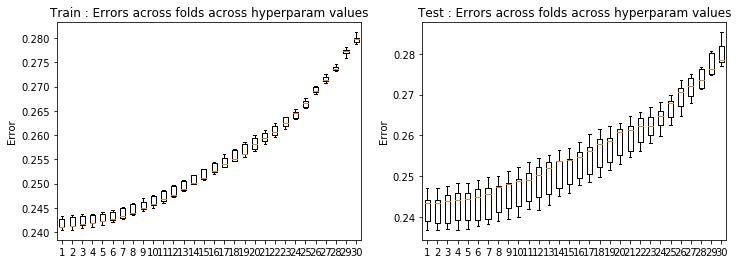

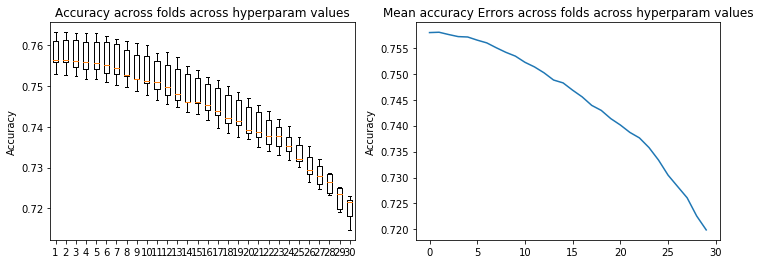

In [229]:
result_crossval(loss_tr18,loss_te18)
result_crossval_accuracy(acc18)

### Removal of outliers

In [235]:
ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y, labels_feat = split_subsets(tX, y,labels_feature)
ss_tX_un, ss_y_un = replace_undef_feat(ss1_tX,ss1_y,method = 'median')
_, ss_tX_nocorrfeat, _, _, _ = remove_correlated_feat(ss0_tX, ss_tX_un, ss2_tX, ss3_tX, labels_feat)
ss_tX_outliers, ss_y_outliers = outliers_suppresion(ss_tX_nocorrfeat, ss_y_un, 3)
print(ss1_tX.shape)
print(ss_tX_outliers.shape)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
Remaining features for subset 2, 3: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
Remaining features for subset 1: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi'
 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi' 'PRI_

In [236]:
# test 19: degree 1, rmse, remove correlated features and outliers, median undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr19, loss_te19, w19, acc19 = cross_validation_demo(ss_y_outliers, ss_tX_outliers, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse',  method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 70754
Proportion of Bosons in all train set : 36.14212624021257 %
Proportion of Bosons in test fold 1: 35.99293286219081 %
Ridge regression: w=[-0.27587934  0.1178768  -0.22093399 -0.29873606  0.28021192  0.03676346
  0.09560125 -0.09161297  0.10503618  0.22337573  0.00489013 -0.00355263
  0.16488154 -0.0090895   0.00091982  0.02996072  0.00094755 -0.01431086
 -0.00328467 -0.00431534]
Ridge regression: w=[-0.27446873  0.11889434 -0.22248579 -0.2954334   0.27725711  0.03693094
  0.09681215 -0.10196942  0.10053006  0.21671562  0.00250581 -0.00691349
  0.17062975 -0.00641581 -0.00065054  0.03104893  0.00180788 -0.01408
 -0.00246402 -0.00557372]
Ridge regression: w=[-2.78171572e-01  1.20865096e-01 -2.21761870e-01 -2.93994118e-01
  2.72204422e-01  3.88207239e-02  9.96101652e-02 -9.01296386e-02
  1.00165991e-01  2.16554711e-01  4.09785378e-03 -5.05234994e-03
  1.61854873e-01 -5.84528459e-03 -1.17263303e-06  2.87888464e-02
  4.90118121e-03 

Ridge regression: w=[-2.76905685e-01  1.17598295e-01 -2.20990319e-01 -2.80555624e-01
  2.63997361e-01  3.85804165e-02  9.92873635e-02 -8.61237792e-02
  1.01389520e-01  2.13292843e-01  4.04811821e-03 -5.09772144e-03
  1.53242242e-01 -5.82531282e-03 -3.45170684e-05  2.85474566e-02
  4.93618061e-03 -1.67974997e-02  4.45292024e-04 -4.85132292e-03]
Ridge regression: w=[-0.2770461   0.11655068 -0.22244406 -0.27763012  0.2627281   0.03775135
  0.09316093 -0.08964415  0.10615068  0.21753361  0.00340647 -0.00576008
  0.15675502 -0.00721579 -0.00214724  0.03213342  0.0006322  -0.01647617
 -0.00135982 -0.00425996]
Ridge regression: w=[-2.75010032e-01  1.14960669e-01 -2.23695676e-01 -2.82802327e-01
  2.65611155e-01  3.91932367e-02  9.45081064e-02 -7.95953283e-02
  1.02843374e-01  2.23644232e-01  3.20718979e-03 -2.63157325e-03
  1.54087364e-01 -8.26785940e-03 -6.70695466e-05  3.29981505e-02
  4.79785598e-03 -1.80720846e-02  1.63454578e-04 -2.48944641e-03]
Accuracy = [0.7256537102473498, 0.729399293

Ridge regression: w=[-0.27295895  0.10831193 -0.21964358 -0.24076407  0.23970835  0.03698034
  0.09300388 -0.08028695  0.10909566  0.20647752  0.00331799 -0.00579098
  0.13338586 -0.00717898 -0.00209128  0.03067163  0.0008381  -0.01434546
 -0.00137262 -0.00400691]
Ridge regression: w=[-2.70952916e-01  1.06207959e-01 -2.20815193e-01 -2.45245412e-01
  2.42401523e-01  3.84083656e-02  9.44927867e-02 -7.16768731e-02
  1.05874969e-01  2.11447083e-01  3.17128917e-03 -2.65304914e-03
  1.31533182e-01 -8.28627263e-03 -5.06376517e-05  3.15218928e-02
  4.86903440e-03 -1.58419698e-02  1.42073934e-04 -2.31215423e-03]
Accuracy = [0.7256537102473498, 0.7303180212014134, 0.7319434628975265, 0.7224734982332155, 0.7334275618374558]
Ridge regression: w=[-0.26903886  0.10348024 -0.21654036 -0.23489877  0.24017763  0.03556349
  0.09477947 -0.07599685  0.11016196  0.20427644  0.00444401 -0.00370804
  0.1252793  -0.0088252   0.00084431  0.02781747  0.00134447 -0.01082205
 -0.00323318 -0.00398189]
Ridge regres

Ridge regression: w=[-0.25351183  0.08614879 -0.20517972 -0.1485792   0.18247195  0.03230862
  0.09216603 -0.0641792   0.11523311  0.16930796  0.00359943 -0.00379867
  0.07614417 -0.00824278  0.00081882  0.02175868  0.00194981 -0.00284918
 -0.00304716 -0.00337334]
Ridge regression: w=[-0.25221559  0.08727051 -0.205991   -0.14658407  0.18018838  0.03241734
  0.09310205 -0.0691296   0.11145111  0.16697304  0.00208467 -0.00673355
  0.07906047 -0.00631107 -0.000664    0.02252     0.00257723 -0.00259601
 -0.00230651 -0.00466097]
Ridge regression: w=[-2.55618220e-01  8.79525686e-02 -2.05497898e-01 -1.46200574e-01
  1.77141575e-01  3.37988530e-02  9.45594208e-02 -6.23968576e-02
  1.11163187e-01  1.65408064e-01  3.29105513e-03 -5.33150498e-03
  7.51982940e-02 -5.42173385e-03 -2.20157222e-04  2.12825182e-02
  5.25486236e-03 -5.21592913e-03  5.16501863e-04 -3.96216338e-03]
Ridge regression: w=[-0.25574784  0.08865417 -0.20664188 -0.14454963  0.176286    0.03322082
  0.09106462 -0.06545002  0.114

Ridge regression: w=[-2.14824100e-01  6.95587300e-02 -1.74937340e-01 -5.40169424e-02
  1.07629756e-01  2.54506089e-02  8.28664873e-02 -5.67383841e-02
  1.10312809e-01  1.17670664e-01  2.09827951e-03 -4.87064094e-03
  2.61025613e-02 -4.52668951e-03 -8.68311321e-05  9.15247322e-03
  5.20310957e-03  1.13696638e-02  5.23122452e-04 -2.97699788e-03]
Ridge regression: w=[-0.21493304  0.07094124 -0.17587303 -0.05306801  0.10727777  0.0250585
  0.08124326 -0.05910618  0.11313345  0.11961688  0.00177707 -0.00507147
  0.02658904 -0.00588383 -0.00116458  0.01066682  0.00219145  0.01123739
 -0.00114508 -0.00207501]
Ridge regression: w=[-2.13353448e-01  6.79913271e-02 -1.76425610e-01 -5.47259217e-02
  1.08062452e-01  2.60185507e-02  8.25966129e-02 -5.58557063e-02
  1.10694721e-01  1.20088245e-01  1.83584267e-03 -2.51807985e-03
  2.72105330e-02 -6.95047236e-03  3.44753272e-04  1.09570495e-02
  4.81283141e-03  1.06791492e-02  1.66372626e-05 -1.17123735e-03]
Accuracy = [0.7215547703180212, 0.7250176678

Ridge regression: w=[-1.39894158e-01  5.08568506e-02 -1.22621560e-01 -3.46952999e-03
  5.48275657e-02  1.55202221e-02  6.09556766e-02 -4.94690286e-02
  8.88954008e-02  7.82871337e-02  4.81275804e-04 -1.98294683e-03
  2.61051651e-04 -4.72009595e-03  6.09711576e-04 -6.13019615e-04
  3.76742198e-03  2.38217504e-02 -1.14583429e-04 -6.37905870e-04]
Accuracy = [0.7163957597173145, 0.7214840989399294, 0.7262190812720848, 0.7131448763250884, 0.7256537102473498]
Ridge regression: w=[-1.23294789e-01  4.78159531e-02 -1.10246837e-01  1.46296444e-03
  4.84819140e-02  1.29959361e-02  5.48897012e-02 -4.82846694e-02
  8.33967417e-02  7.14643333e-02 -5.32514670e-05 -2.35438194e-03
 -3.37646365e-03 -4.07684275e-03  9.78746807e-04 -2.46807540e-03
  2.48727602e-03  2.49625497e-02 -1.44655526e-03 -9.53993033e-04]
Ridge regression: w=[-0.12266437  0.04816158 -0.10993946  0.00213756  0.04766044  0.01296944
  0.05573335 -0.04916968  0.08193049  0.07186355 -0.00015752 -0.00344872
 -0.0026098  -0.00373584  0.00

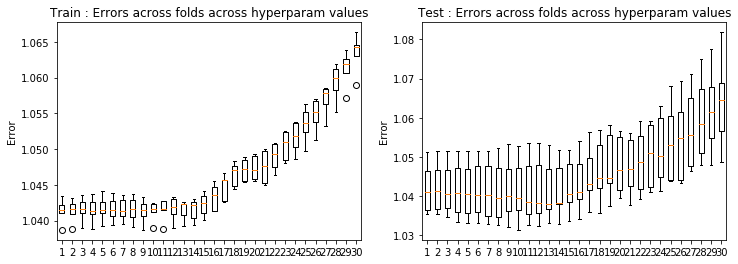

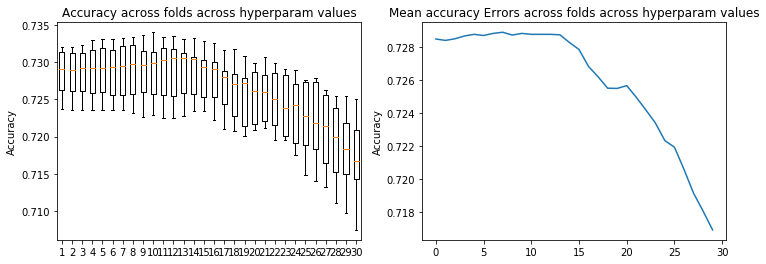

In [237]:
result_crossval(loss_tr19,loss_te19)
result_crossval_accuracy(acc19)

In [238]:
# test 20: degree 2, rmse, remove correlated features and outliers, median undef 
lambdas = np.logspace(-3, 0, 30)
loss_tr20, loss_te20, w20, acc20 = cross_validation_demo(ss_y_outliers, ss_tX_outliers, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse',  method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 70754
Proportion of Bosons in all train set : 36.14212624021257 %
Proportion of Bosons in test fold 1: 35.99293286219081 %
Ridge regression: w=[-2.75879337e-01  6.49828165e-01 -1.53081357e-01  7.33156820e-03
  1.80188892e-01  6.14542123e-02  2.67991006e-01 -1.81400368e-03
  9.27740688e-02  3.97490790e-01  4.56725956e-03 -2.40971486e-03
  1.46083801e-01 -6.41916642e-03  3.35274063e-04  5.28518616e-02
  3.20414685e-03  7.64730977e-02 -4.08217017e-03 -3.96191440e-03
 -5.25286807e-01 -5.29659548e-02 -1.84684205e-01 -6.02648388e-02
 -3.67373747e-02 -1.67450812e-01  2.01937864e-02  1.41766969e-02
 -2.21369526e-01 -3.78719161e-02 -4.55034022e-03 -1.26228486e-01
 -6.26910238e-02  7.72297271e-04 -3.75702529e-02 -8.63382541e-03
 -8.77797662e-02  1.53681153e-01 -5.86330074e-03]
Ridge regression: w=[-2.74468730e-01  6.48029003e-01 -1.51753532e-01  4.53302082e-02
  1.44834675e-01  6.42860782e-02  2.88438669e-01  1.01226717e-02
  8.77189885e-02  3

Ridge regression: w=[-2.75305997e-01  5.99689481e-01 -1.53188193e-01  4.85980353e-02
  1.73931362e-01  5.98435424e-02  2.56596262e-01 -3.70850722e-02
  9.41778397e-02  3.42103657e-01  4.63094487e-03 -2.44169503e-03
  1.52314761e-01 -6.47773732e-03  3.17554564e-04  5.33784200e-02
  3.13956566e-03  7.61913541e-02 -4.06890447e-03 -3.83887113e-03
 -4.79250902e-01 -5.38304444e-02 -2.18938090e-01 -5.67791145e-02
 -3.53344087e-02 -1.58818753e-01  3.38556504e-02  1.51424760e-02
 -1.80807603e-01 -3.79691093e-02 -4.53241658e-03 -1.18502680e-01
 -6.28804929e-02  7.50806386e-04 -3.42010461e-02 -8.58395198e-03
 -8.72991986e-02  1.53820046e-01 -5.80564887e-03]
Ridge regression: w=[-2.73898322e-01  5.99100048e-01 -1.51733747e-01  7.75779063e-02
  1.46456603e-01  6.24856374e-02  2.73342853e-01 -2.97496984e-02
  8.89958562e-02  3.29129777e-01  2.77432578e-03 -4.17949636e-03
  1.34247121e-01 -4.03524037e-03 -1.52600228e-03  4.71839718e-02
  2.44958208e-03  8.47824556e-02 -2.59954662e-03 -4.49034635e-03


Ridge regression: w=[-0.27501003  0.55397646 -0.15336691  0.09324236  0.14887114  0.06645396
  0.25028172 -0.03907182  0.09174303  0.29424071  0.00514627 -0.00142149
  0.13966362 -0.0067864  -0.00125568  0.05146999  0.00514622  0.07733286
 -0.00065358 -0.00201621 -0.43474684 -0.05812391 -0.25462176 -0.0428795
 -0.04074544 -0.15602581  0.02932427  0.01928689 -0.13903558 -0.03951958
  0.00485626 -0.09946677 -0.06204676  0.00466836 -0.02448383 -0.00249633
 -0.09213087  0.15303572  0.00147754]
Accuracy = [0.7782332155477032, 0.7751236749116608, 0.7774558303886926, 0.7713780918727915, 0.7796466431095407]
Ridge regression: w=[-2.74141836e-01  5.28193964e-01 -1.52620600e-01  8.79899920e-02
  1.72506876e-01  5.70585736e-02  2.34589721e-01 -5.75045220e-02
  9.62446880e-02  2.90990092e-01  4.69719547e-03 -2.47192914e-03
  1.45029175e-01 -6.53089324e-03  3.16935315e-04  5.33993233e-02
  3.03581622e-03  7.42493709e-02 -4.04322591e-03 -3.64439047e-03
 -4.13607756e-01 -5.55334625e-02 -2.51209435e-01

Ridge regression: w=[-2.71793388e-01  4.39710859e-01 -1.50445447e-01  1.08473166e-01
  1.73221249e-01  5.25315696e-02  2.01720756e-01 -6.47992413e-02
  9.90199971e-02  2.43602543e-01  4.72581872e-03 -2.49536251e-03
  1.27880318e-01 -6.55821949e-03  3.55431411e-04  5.14099080e-02
  2.89069648e-03  6.81429892e-02 -4.00139324e-03 -3.36722768e-03
 -3.32643957e-01 -5.87114636e-02 -2.66413321e-01 -5.27721564e-02
 -2.85612010e-02 -1.10774851e-01  3.14238593e-02  1.76013752e-02
 -9.46472199e-02 -3.88850414e-02 -4.41058996e-03 -7.10562264e-02
 -6.34383037e-02  6.52388733e-04 -2.22341548e-02 -8.47575597e-03
 -7.76081878e-02  1.53561716e-01 -5.70800921e-03]
Ridge regression: w=[-0.27040367  0.44037289 -0.14892794  0.12042231  0.16138039  0.05459777
  0.21005155 -0.0637543   0.09371557  0.2369958   0.0028304  -0.00441525
  0.12249313 -0.00413925 -0.00135846  0.04687738  0.00248646  0.07492658
 -0.00255883 -0.00430147 -0.3328774  -0.06213974 -0.27349711 -0.04601213
 -0.03062448 -0.11925914  0.02247

Ridge regression: w=[-0.26575181  0.34361416 -0.14442242  0.10695712  0.16020113  0.04739999
  0.16718376 -0.06360544  0.09702674  0.19501552  0.00279423 -0.00459551
  0.10378484 -0.00419026 -0.00118098  0.04274503  0.00253955  0.06135033
 -0.00252551 -0.00414912 -0.24505535 -0.06679583 -0.25690309 -0.0362863
 -0.02370729 -0.07916307  0.01228912  0.02246748 -0.04838064 -0.03756301
 -0.00080449 -0.03296518 -0.06498693  0.00366398 -0.00596466 -0.0029491
 -0.06870801  0.15112812 -0.00361653]
Ridge regression: w=[-0.26933705  0.34271679 -0.14374827  0.10348923  0.16140068  0.04352886
  0.16951004 -0.05805813  0.09813351  0.19241127  0.00404293 -0.00366004
  0.10181941 -0.00352624 -0.00109215  0.04667866  0.00493907  0.05410896
 -0.0014288  -0.00392174 -0.24258714 -0.06718778 -0.25092962 -0.0423933
 -0.01795791 -0.07974433  0.01693509  0.02168657 -0.0474503  -0.04352925
  0.00293885 -0.03882718 -0.06689767  0.0034426  -0.0127773   0.00170844
 -0.06479173  0.15369052  0.00573649]
Ridge regre

Ridge regression: w=[-0.26019064  0.24935839 -0.13674147  0.07299458  0.14412993  0.03549089
  0.12759165 -0.05324238  0.100781    0.15367913  0.00402027 -0.00382267
  0.0791686  -0.00355393 -0.00085692  0.03789996  0.00483365  0.03930745
 -0.00130474 -0.00347161 -0.15976796 -0.07229478 -0.21217733 -0.0189602
 -0.0106784  -0.03919124  0.00490647  0.02476503 -0.0081506  -0.04452938
  0.00247965 -0.01217338 -0.06689053  0.00271187 -0.00344454  0.00133639
 -0.04640657  0.15034525  0.00495366]
Ridge regression: w=[-0.26032259  0.25306352 -0.13885548  0.07551084  0.14436022  0.04009879
  0.12616856 -0.055579    0.10396454  0.15565298  0.00363027 -0.00418405
  0.08122189 -0.00507433 -0.00247906  0.03963389  0.00170559  0.03919496
 -0.0017847  -0.00250328 -0.16266281 -0.07090821 -0.21330756 -0.02118449
 -0.0166077  -0.04150969  0.0048204   0.02683277 -0.00646627 -0.04224829
  0.00045782 -0.01195302 -0.06798844  0.00194777 -0.0035856  -0.00028034
 -0.04619734  0.14676774  0.000615  ]
Ridge reg

Ridge regression: w=[-2.43430823e-01  1.72717889e-01 -1.28111152e-01  4.21049339e-02
  1.17251531e-01  2.95191080e-02  9.33615372e-02 -4.79442692e-02
  1.03908090e-01  1.21732504e-01  3.34776534e-03 -4.16831975e-03
  5.72033419e-02 -4.85804697e-03 -2.15812475e-03  2.87244100e-02
  1.75515129e-03  2.62688159e-02 -1.59981360e-03 -1.94963868e-03
 -9.30806752e-02 -7.61089911e-02 -1.60991179e-01  3.16655106e-03
 -7.30885666e-03 -7.71581060e-03 -5.30174206e-03  3.13416301e-02
  2.19999729e-02 -4.25786357e-02  1.17709232e-04  4.11707060e-03
 -6.65778514e-02  1.41247948e-03  3.56902641e-03 -2.37597314e-04
 -2.77090838e-02  1.39203650e-01  3.49294423e-04]
Ridge regression: w=[-2.41641798e-01  1.70174298e-01 -1.28362777e-01  3.96645551e-02
  1.17285964e-01  3.05320514e-02  9.27674811e-02 -4.49871361e-02
  1.01328248e-01  1.21837489e-01  3.77893180e-03 -1.71778930e-03
  5.73105731e-02 -6.03297335e-03 -4.72168246e-04  2.75910251e-02
  4.93254100e-03  2.69348765e-02 -3.94379451e-04 -8.97000774e-04


Ridge regression: w=[-0.2148241   0.1123333  -0.11361619  0.01975163  0.08807983  0.01924208
  0.07187001 -0.03953595  0.09654447  0.09145157  0.00293008 -0.00378476
  0.03421022 -0.00315928 -0.00032508  0.01723767  0.00447299  0.01846948
 -0.00072137 -0.002374   -0.04422867 -0.07871223 -0.10863253  0.01820503
  0.00176775  0.01637334 -0.01138515  0.03459247  0.03509133 -0.04297418
  0.00127123  0.00753638 -0.06145978  0.00095641  0.00619993  0.00045836
 -0.01182942  0.12785467  0.0028638 ]
Ridge regression: w=[-2.14933037e-01  1.13886842e-01 -1.14719211e-01  2.05748331e-02
  8.79210845e-02  2.05473218e-02  7.10213136e-02 -4.09106060e-02
  9.90814676e-02  9.31573467e-02  2.63290508e-03 -3.95441671e-03
  3.50603989e-02 -4.39636121e-03 -1.65666186e-03  1.81380755e-02
  1.86766213e-03  1.85553674e-02 -1.32257170e-03 -1.37333330e-03
 -4.44617404e-02 -7.83306662e-02 -1.08907955e-01  1.74495338e-02
 -6.29858455e-04  1.50995769e-02 -1.20134945e-02  3.60145881e-02
  3.64525131e-02 -4.10741115e

Ridge regression: w=[-1.71048006e-01  7.39745745e-02 -9.80670196e-02  1.12558712e-02
  6.26998707e-02  1.35471915e-02  5.59276509e-02 -3.65671836e-02
  8.58321678e-02  7.04894421e-02  9.42664175e-04 -3.79150693e-03
  1.76871014e-02 -3.53066419e-03  8.58688010e-05  8.37456972e-03
  2.72123935e-03  1.76995544e-02 -1.57621578e-03 -2.34953005e-03
 -1.55581843e-02 -7.56162908e-02 -6.65465000e-02  2.25335745e-02
  3.10833134e-03  2.72219751e-02 -1.81867117e-02  3.71547689e-02
  3.93282652e-02 -3.39807299e-02 -1.06734134e-03  5.55757072e-03
 -5.17891368e-02  2.15705779e-03  6.65097794e-03 -9.80602084e-04
  6.96841404e-04  1.03115054e-01 -2.54002475e-03]
Ridge regression: w=[-1.73355605e-01  7.37861562e-02 -9.79279179e-02  1.11085931e-02
  6.18961916e-02  1.34502018e-02  5.60939579e-02 -3.44487696e-02
  8.61591318e-02  6.90597682e-02  1.89680687e-03 -3.36417618e-03
  1.70528460e-02 -2.68288296e-03 -6.18482625e-05  8.56368807e-03
  4.03593100e-03  1.61274886e-02 -3.25751075e-04 -1.84236638e-03


Ridge regression: w=[-0.12329479  0.04904186 -0.07974131  0.00855392  0.04229434  0.00919524
  0.04289222 -0.03111465  0.07182719  0.0529574   0.00036182 -0.0018687
  0.00530165 -0.00340151  0.00082832  0.0022607   0.00212733  0.0167715
 -0.00163051 -0.0008194  -0.00040255 -0.06581032 -0.03583034  0.01971191
  0.00361128  0.02870677 -0.01854364  0.03260133  0.03632532 -0.02862912
 -0.00139866 -0.00031131 -0.03953395  0.00078019  0.00270041 -0.00342435
  0.00868624  0.07499942 -0.00153934]
Ridge regression: w=[-0.12266437  0.04924115 -0.07939178  0.0091657   0.04165371  0.00926541
  0.04343888 -0.03185402  0.0700102   0.05310512  0.00022221 -0.00291878
  0.00583912 -0.00293756  0.0003578   0.00233259  0.00238791  0.01713344
 -0.00111254 -0.00166498 -0.00023133 -0.06590315 -0.0354521   0.01919654
  0.00388887  0.0289108  -0.01983901  0.03345229  0.0364413  -0.02736655
 -0.00087301  0.000477   -0.04022395  0.00170383  0.00365461 -0.00041581
  0.00855107  0.07481442 -0.00194063]
Ridge regr

Ridge regression: w=[-9.22732627e-02  3.69004367e-02 -6.59371238e-02  8.25574832e-03
  3.03747840e-02  7.59020142e-03  3.57090142e-02 -2.70688682e-02
  5.75703196e-02  4.31685513e-02  2.70508426e-04 -1.22344477e-03
  1.44291184e-03 -2.78395885e-03  4.11690030e-04  2.38389397e-04
  2.56051697e-03  1.58367954e-02 -1.46411434e-04 -3.04065476e-04
  4.04606887e-03 -5.64436111e-02 -2.18326314e-02  1.54411450e-02
  3.59616705e-03  2.65241108e-02 -1.78907614e-02  2.82248587e-02
  3.26025824e-02 -2.26223353e-02  7.43708106e-04 -1.78889498e-03
 -3.11985405e-02  3.74811939e-05  2.16834147e-03 -8.12497700e-04
  1.06037122e-02  5.61438243e-02 -2.08267993e-04]
Accuracy = [0.7392932862190813, 0.7377385159010601, 0.7407773851590106, 0.7267844522968198, 0.7402826855123675]


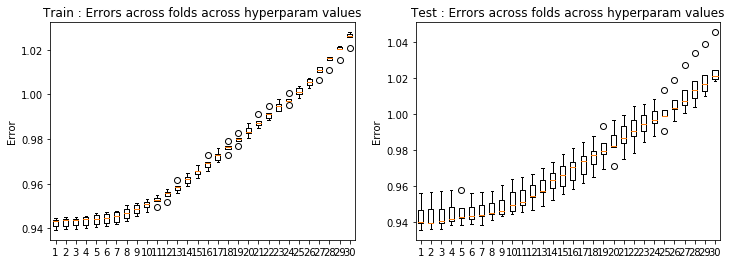

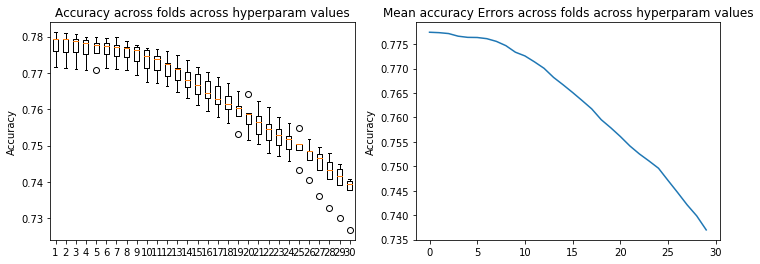

In [239]:
result_crossval(loss_tr20,loss_te20)
result_crossval_accuracy(acc20)

In [240]:
# test 21: degree 3, rmse, remove correlated features and outliers, median undef 
lambdas = np.logspace(-8, 0, 50)
loss_tr21, loss_te21, w21, acc21 = cross_validation_demo(ss_y_outliers, ss_tX_outliers, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse',  method = 'rr',hyperparams=[lambdas])


Number of remaining samples before start cross val : 70754
Proportion of Bosons in all train set : 36.14212624021257 %
Proportion of Bosons in test fold 1: 35.99293286219081 %
Ridge regression: w=[-2.76431090e-01 -2.61537982e-01  1.75739648e-01  7.96513413e-01
 -2.89201673e-01  1.73212428e-01  4.23076203e-01  4.99848811e-01
  3.88438424e-02  7.65470949e-01  9.30504788e-04 -2.43060921e-04
  5.90957532e-02  1.67345283e-03  1.77001452e-02  2.08479388e-01
  3.82682865e-03  4.86308906e-02 -5.09616892e-03  1.28154709e-03
  1.58677353e+00 -8.64813620e-01 -1.85195260e+00  8.80626287e-01
 -2.97058689e-01 -4.48439147e-01 -4.92578941e-01  1.17480882e-02
 -6.37823390e-01 -3.61938642e-02 -4.95078221e-03 -3.30213249e-01
 -6.11758196e-02  5.95648994e-04 -3.69225179e-01 -8.87890824e-03
 -5.72287995e-02  1.51118668e-01 -6.63247292e-03 -1.23322095e+00
  5.09534149e-01  9.38474441e-01 -5.19617979e-01  1.60479097e-01
  1.39378233e-01  1.87328185e-01  4.09023100e-02  1.52173878e-01
  3.60513873e-03 -2.2350

Ridge regression: w=[-2.76819780e-01 -2.72651342e-01  2.01950643e-01  8.45974312e-01
 -3.16344426e-01  1.69955839e-01  4.34456265e-01  3.60051259e-01
  3.36203316e-02  6.98682749e-01 -3.48502109e-03  2.29164306e-03
  1.57931356e-01  2.63012717e-03  1.99821515e-02  2.36882860e-01
  1.14023264e-02  9.98323119e-02 -8.22339305e-03  9.58753237e-03
  1.61949914e+00 -9.32861777e-01 -1.90483549e+00  8.67475211e-01
 -2.74570742e-01 -4.59369959e-01 -2.96789105e-01  1.50833587e-02
 -6.25157208e-01 -3.82609066e-02  4.75639478e-03 -4.78896481e-01
 -6.04709563e-02  4.54050757e-03 -4.28609024e-01 -2.49057461e-03
 -1.64331391e-01  1.50158822e-01  9.09023563e-04 -1.25132635e+00
  5.48323770e-01  9.49702279e-01 -4.93871235e-01  1.41105435e-01
  1.36046468e-01  9.36943972e-02  4.18190111e-02  1.75320799e-01
  9.39791560e-03 -6.85269054e-04  2.39220213e-01 -9.70375462e-03
 -2.06688351e-02  2.28733225e-01 -4.83720589e-03  4.52310118e-02
  9.03535703e-03 -8.00732623e-03]
Accuracy = [0.7867137809187279, 0.78

Ridge regression: w=[-2.78869241e-01 -2.91842188e-01  1.86675118e-01  7.92812821e-01
 -2.53112939e-01  1.64504660e-01  5.14941229e-01  4.96502089e-01
  3.44336932e-02  7.96660889e-01 -3.43108245e-03  5.05728894e-03
  3.99543191e-03 -3.12197715e-03  1.93519249e-02  2.17907738e-01
  3.54226197e-03  7.78227158e-02 -6.76858535e-03  8.26484550e-03
  1.67005510e+00 -8.94583827e-01 -1.82479333e+00  7.92884512e-01
 -2.66286260e-01 -6.00029586e-01 -4.90132275e-01  1.73148966e-02
 -7.43668939e-01 -3.83005895e-02  1.27721742e-03 -2.26462532e-01
 -6.53859000e-02  2.99137744e-03 -3.82550312e-01 -5.92053620e-04
 -1.35456988e-01  1.48823837e-01  5.67982755e-04 -1.28495868e+00
  5.26839244e-01  9.22186962e-01 -4.79364392e-01  1.36781827e-01
  1.99467758e-01  1.82373201e-01  4.39427327e-02  2.23366499e-01
  6.54278118e-03 -6.25656109e-03  1.16497737e-01 -9.44138422e-04
 -2.08045276e-02  1.97716483e-01  8.46317569e-04  3.89394230e-02
  5.36166923e-03 -7.95814405e-03]
Ridge regression: w=[-2.76819771e-01

Ridge regression: w=[-2.78727879e-01 -2.66676535e-01  2.18555836e-01  7.36919339e-01
 -2.43453264e-01  1.54970357e-01  4.60111636e-01  6.55922065e-01
  3.29786735e-02  9.48703428e-01  1.37894591e-03  2.96037214e-03
 -3.29256989e-02 -2.04229345e-03  9.83318841e-03  2.14180035e-01
  7.97973454e-03  1.26746742e-01 -1.32972117e-03 -1.67627808e-03
  1.60812778e+00 -9.65159694e-01 -1.72065428e+00  7.77438668e-01
 -2.55089058e-01 -4.96415262e-01 -6.25741718e-01  1.32600220e-02
 -8.97267496e-01 -4.00856391e-02  3.19591205e-03 -2.69958841e-01
 -6.46861695e-02  4.13533041e-03 -3.72328794e-01  2.18592233e-03
 -2.32998765e-01  1.52178344e-01  6.01114640e-03 -1.24921506e+00
  5.67155061e-01  8.69571570e-01 -4.67587277e-01  1.37122816e-01
  1.53831097e-01  2.25992625e-01  4.23379289e-02  2.69412974e-01
  3.07713540e-03 -5.05227081e-03  1.54462274e-01 -1.98869195e-03
 -1.09605084e-02  1.89827002e-01 -1.81836969e-03  8.80165955e-02
  7.84977490e-04 -3.07513399e-04]
Ridge regression: w=[-2.78869221e-01

Ridge regression: w=[-2.75017591e-01 -2.63763573e-01  1.88221595e-01  8.50631564e-01
 -2.79226468e-01  1.32032200e-01  4.75038415e-01  7.49369352e-01
  2.18450501e-02  9.17990800e-01 -3.51658942e-03 -4.49395881e-03
 -1.08700985e-01 -4.83875589e-04  1.10118898e-02  2.40501292e-01
  2.65788207e-03  7.96474738e-02 -6.89102002e-03  3.69229125e-03
  1.60830890e+00 -9.03126407e-01 -1.92225965e+00  7.91704638e-01
 -1.94933498e-01 -5.30938766e-01 -7.80308735e-01  1.53432183e-02
 -8.03849268e-01 -3.53479887e-02 -2.87193607e-04 -1.61532843e-01
 -6.19347769e-02  3.92907480e-03 -4.47322824e-01 -2.67256711e-03
 -1.08636498e-01  1.49469458e-01 -3.68659864e-03 -1.25080735e+00
  5.33803416e-01  9.63901472e-01 -4.50772773e-01  9.42868629e-02
  1.68574388e-01  2.94324863e-01  5.20741615e-02  2.16936253e-01
  6.80662260e-03  2.55979407e-03  1.18184270e-01 -3.42908002e-03
 -1.28400321e-02  2.43139953e-01  1.08518512e-03  1.32545316e-02
  4.99116126e-03 -6.41377360e-03]
Ridge regression: w=[-2.78727838e-01

Ridge regression: w=[-2.76430932e-01 -2.60706272e-01  1.75635013e-01  7.94488468e-01
 -2.87693496e-01  1.73172934e-01  4.22723051e-01  4.95412097e-01
  3.88144057e-02  7.62431678e-01  9.31446958e-04 -2.41668187e-04
  6.18909731e-02  1.67359036e-03  1.77009923e-02  2.08466066e-01
  3.82323655e-03  4.86869732e-02 -5.09678102e-03  1.28050415e-03
  1.58505212e+00 -8.64583694e-01 -1.84824759e+00  8.78053744e-01
 -2.96965396e-01 -4.47748577e-01 -4.87445615e-01  1.17362995e-02
 -6.34563527e-01 -3.61956270e-02 -4.95045929e-03 -3.33067793e-01
 -6.11762460e-02  5.96064555e-04 -3.69216825e-01 -8.87886947e-03
 -5.73254926e-02  1.51120624e-01 -6.63159918e-03 -1.23230662e+00
  5.09408940e-01  9.36587922e-01 -5.18374771e-01  1.60424733e-01
  1.39071771e-01  1.85239414e-01  4.09343249e-02  1.50960221e-01
  3.60447862e-03 -2.23949232e-04  1.65983512e-01 -8.43294418e-03
 -1.75392699e-02  1.90440116e-01  3.52783804e-04 -9.01777556e-03
  1.17179701e-03 -2.51617870e-03]
Ridge regression: w=[-2.75017506e-01

Ridge regression: w=[-2.76819550e-01 -2.71387958e-01  2.01785106e-01  8.42962681e-01
 -3.14149867e-01  1.69904901e-01  4.33946274e-01  3.55914348e-01
  3.35775707e-02  6.95912976e-01 -3.48216269e-03  2.29507528e-03
  1.60420235e-01  2.63049950e-03  1.99867191e-02  2.36856422e-01
  1.13990112e-02  9.98599392e-02 -8.22391143e-03  9.59106721e-03
  1.61686892e+00 -9.32498905e-01 -1.89933259e+00  8.63758993e-01
 -2.74447119e-01 -4.58390380e-01 -2.91977211e-01  1.50665355e-02
 -6.22079733e-01 -3.82633957e-02  4.75768356e-03 -4.81227781e-01
 -6.04712787e-02  4.54180872e-03 -4.28578789e-01 -2.49065367e-03
 -1.64361597e-01  1.50161022e-01  9.10252196e-04 -1.24992484e+00
  5.48126041e-01  9.46909420e-01 -4.92086487e-01  1.41032500e-01
  1.35621012e-01  9.17386098e-02  4.18666662e-02  1.74119733e-01
  9.39614922e-03 -6.87186279e-04  2.39917843e-01 -9.70543563e-03
 -2.06729064e-02  2.28693334e-01 -4.83335911e-03  4.52401953e-02
  9.03536323e-03 -8.01037821e-03]
Accuracy = [0.7867137809187279, 0.78

Ridge regression: w=[-2.78868750e-01 -2.89150531e-01  1.86325438e-01  7.86781524e-01
 -2.48854524e-01  1.64400269e-01  5.13425192e-01  4.81541547e-01
  3.43431452e-02  7.86110365e-01 -3.42861236e-03  5.05856415e-03
  1.36210616e-02 -3.12301886e-03  1.93539269e-02  2.17861456e-01
  3.53234025e-03  7.79546020e-02 -6.77013420e-03  8.26372862e-03
  1.66448183e+00 -8.93806256e-01 -1.81370223e+00  7.85626456e-01
 -2.66037056e-01 -5.97033177e-01 -4.72937042e-01  1.72803851e-02
 -7.32256468e-01 -3.83054314e-02  1.27840464e-03 -2.36512664e-01
 -6.53867697e-02  2.99438092e-03 -3.82524216e-01 -5.90569831e-04
 -1.35678639e-01  1.48829071e-01  5.71912218e-04 -1.28199160e+00
  5.26407098e-01  9.16517801e-01 -4.75848835e-01  1.36637076e-01
  1.98059559e-01  1.75411403e-01  4.40412718e-02  2.19095812e-01
  6.54184317e-03 -6.25534204e-03  1.20036495e-01 -9.47039146e-04
 -2.08080623e-02  1.97661693e-01  8.54947423e-04  3.90457732e-02
  5.36328360e-03 -7.95952455e-03]
Ridge regression: w=[-2.76819284e-01

Ridge regression: w=[-2.78726839e-01 -2.61453735e-01  2.17806797e-01  7.25450041e-01
 -2.35276704e-01  1.54731073e-01  4.58043215e-01  6.16715873e-01
  3.27787867e-02  9.19493359e-01  1.38185662e-03  2.96479329e-03
 -8.46084518e-03 -2.03411801e-03  9.84594991e-03  2.14077817e-01
  7.95224217e-03  1.26581075e-01 -1.33190483e-03 -1.67769839e-03
  1.59728952e+00 -9.63504723e-01 -1.69943884e+00  7.63391628e-01
 -2.54523382e-01 -4.92136405e-01 -5.81196520e-01  1.31945826e-02
 -8.65345192e-01 -4.00979403e-02  3.19547826e-03 -2.94973671e-01
 -6.46847245e-02  4.13772235e-03 -3.72279105e-01  2.18700062e-03
 -2.32561395e-01  1.52191707e-01  6.02086589e-03 -1.24342688e+00
  5.66237922e-01  8.58648834e-01 -4.60734924e-01  1.36791140e-01
  1.51786786e-01  2.08025855e-01  4.25518845e-02  2.57494566e-01
  3.07132102e-03 -5.05152440e-03  1.63257920e-01 -2.00000591e-03
 -1.09729903e-02  1.89730158e-01 -1.79621333e-03  8.77614331e-02
  7.85441418e-04 -3.08437469e-04]
Ridge regression: w=[-2.78868181e-01

Ridge regression: w=[-2.75015416e-01 -2.52130284e-01  1.86653671e-01  8.23673286e-01
 -2.60143063e-01  1.31634490e-01  4.69473390e-01  6.63062550e-01
  2.14204209e-02  8.56173616e-01 -3.50011451e-03 -4.47080416e-03
 -5.38869786e-02 -4.66233885e-04  1.10628983e-02  2.40244295e-01
  2.62372485e-03  8.01255968e-02 -6.89620250e-03  3.71183871e-03
  1.58410223e+00 -8.99628072e-01 -1.87238346e+00  7.59196930e-01
 -1.93970127e-01 -5.19674592e-01 -6.81412984e-01  1.51998155e-02
 -7.37562797e-01 -3.53554411e-02 -2.84411649e-04 -2.18756656e-01
 -6.19431990e-02  3.94064153e-03 -4.47111195e-01 -2.66813495e-03
 -1.09394794e-01  1.49498684e-01 -3.66852693e-03 -1.23790972e+00
  5.31860237e-01  9.38255285e-01 -4.35018685e-01  9.37251225e-02
  1.63251351e-01  2.54278258e-01  5.25338458e-02  1.92483325e-01
  6.79108444e-03  2.54916471e-03  1.38570720e-01 -3.45778050e-03
 -1.28922969e-02  2.42859292e-01  1.11788865e-03  1.36025774e-02
  4.99018375e-03 -6.42610366e-03]
Ridge regression: w=[-2.78725632e-01

Ridge regression: w=[-2.76426294e-01 -2.37033949e-01  1.72630881e-01  7.38338686e-01
 -2.46665240e-01  1.72051349e-01  4.12625662e-01  3.97147619e-01
  3.80143469e-02  6.96483612e-01  9.56069769e-04 -2.00005163e-04
  1.22361141e-01  1.67812331e-03  1.77207531e-02  2.08069393e-01
  3.72884130e-03  5.02332411e-02 -5.11410508e-03  1.25732406e-03
  1.53589933e+00 -8.57973379e-01 -1.74537403e+00  8.08304795e-01
 -2.94313734e-01 -4.28229337e-01 -3.73153960e-01  1.14165247e-02
 -5.63176035e-01 -3.62445276e-02 -4.94252352e-03 -3.92646311e-01
 -6.11877055e-02  6.08143671e-04 -3.68866111e-01 -8.87713973e-03
 -5.99646008e-02  1.51170130e-01 -6.60810626e-03 -1.20611711e+00
  5.05786121e-01  8.84214819e-01 -4.84772673e-01  1.58877581e-01
  1.30475139e-01  1.38653728e-01  4.18170104e-02  1.23950893e-01
  3.58633967e-03 -2.39578945e-04  1.85331087e-01 -8.45963600e-03
 -1.75654414e-02  1.89821497e-01  4.34767818e-04 -7.76870453e-03
  1.18531528e-03 -2.49490017e-03]
Ridge regression: w=[-2.75012891e-01

Ridge regression: w=[-2.76812785e-01 -2.36169709e-01  1.97046284e-01  7.62025027e-01
 -2.56746462e-01  1.68466516e-01  4.19892681e-01  2.72519588e-01
  3.24356954e-02  6.41119674e-01 -3.40754442e-03  2.38603046e-03
  2.07422417e-01  2.63903617e-03  2.01045042e-02  2.36035730e-01
  1.13047801e-02  1.00427056e-01 -8.24050604e-03  9.67788661e-03
  1.54330633e+00 -9.22073270e-01 -1.75103450e+00  7.66912342e-01
 -2.70972087e-01 -4.31599782e-01 -1.94308441e-01  1.46281867e-02
 -5.59061278e-01 -3.83289624e-02  4.78706690e-03 -5.20322404e-01
 -6.04811810e-02  4.57605051e-03 -4.27466049e-01 -2.49418669e-03
 -1.64756804e-01  1.50218080e-01  9.40871279e-04 -1.21059662e+00
  5.42392411e-01  8.71574074e-01 -4.45723422e-01  1.38981122e-01
  1.24025557e-01  5.19872685e-02  4.31629429e-02  1.48498504e-01
  9.34964163e-03 -7.40553426e-04  2.49135039e-01 -9.74660200e-03
 -2.07772876e-02  2.27434340e-01 -4.72539776e-03  4.52405427e-02
  9.03685483e-03 -8.08620113e-03]
Accuracy = [0.7862897526501766, 0.78

Ridge regression: w=[-2.78854296e-01 -2.17869430e-01  1.76748138e-01  6.37978396e-01
 -1.49881737e-01  1.61645335e-01  4.74210956e-01  2.63400889e-01
  3.22157744e-02  6.36032467e-01 -3.34806982e-03  5.12878477e-03
  1.46314320e-01 -3.14626095e-03  1.93805536e-02  2.16417694e-01
  3.30595214e-03  8.05848648e-02 -6.80312399e-03  8.22613877e-03
  1.51571209e+00 -8.72392467e-01 -1.53871533e+00  6.18554462e-01
 -2.59434401e-01 -5.20890168e-01 -2.20014635e-01  1.64676154e-02
 -5.63682106e-01 -3.84198486e-02  1.29220198e-03 -3.63083919e-01
 -6.54129766e-02  3.05484251e-03 -3.80884100e-01 -5.62952402e-04
 -1.39595695e-01  1.48939119e-01  6.48499542e-04 -1.20218986e+00
  5.14322962e-01  7.75853954e-01 -3.95604486e-01  1.32774432e-01
  1.62729466e-01  7.29136227e-02  4.64566711e-02  1.52789753e-01
  6.50379402e-03 -6.27380020e-03  1.58870799e-01 -1.00898900e-03
 -2.08656575e-02  1.95653150e-01  1.05447155e-03  4.06952914e-02
  5.38741500e-03 -7.98037487e-03]
Ridge regression: w=[-2.76804936e-01

Ridge regression: w=[-2.78696200e-01 -1.36360888e-01  1.97740107e-01  4.83363719e-01
 -8.09452472e-02  1.49010244e-01  4.07488288e-01  2.50012824e-01
  2.86948700e-02  6.40679953e-01  1.41206334e-03  3.07587700e-03
  1.88086698e-01 -1.87065082e-03  1.00406014e-02  2.10332632e-01
  7.40388139e-03  1.20597131e-01 -1.41605760e-03 -1.72751998e-03
  1.33399819e+00 -9.18718287e-01 -1.24768572e+00  5.02764067e-01
 -2.41027632e-01 -3.92522735e-01 -1.63601065e-01  1.20184013e-02
 -5.39079326e-01 -4.03397272e-02  3.18897271e-03 -4.52458877e-01
 -6.46744626e-02  4.20603889e-03 -3.66859500e-01  2.20761053e-03
 -2.17584684e-01  1.52402103e-01  6.18573099e-03 -1.10098803e+00
  5.40756461e-01  6.25797141e-01 -3.35438952e-01  1.28852767e-01
  1.05562697e-01  3.98938520e-02  4.72322285e-02  1.26557862e-01
  2.97842966e-03 -5.08395876e-03  2.00976165e-01 -2.17988292e-03
 -1.11597409e-02  1.84955781e-01 -1.34712177e-03  7.90560387e-02
  7.91897868e-04 -3.19394565e-04]
Ridge regression: w=[-2.78837527e-01

Ridge regression: w=[-2.74951306e-01 -2.85810463e-02  1.50039258e-01  4.01158443e-01
 -1.06964584e-02  1.23486153e-01  3.67953781e-01  1.87359508e-01
  1.48148100e-02  5.19579219e-01 -3.22562573e-03 -4.21305244e-03
  1.81461354e-01 -2.41394627e-04  1.16468432e-02  2.29012397e-01
  1.91062301e-03  8.20812967e-02 -7.01504902e-03  3.69740800e-03
  1.10911598e+00 -8.16982409e-01 -1.07653271e+00  3.45257028e-01
 -1.74453579e-01 -3.22297424e-01 -1.29633640e-01  1.34027329e-02
 -3.42968460e-01 -3.54592571e-02 -3.40959183e-04 -3.80045704e-01
 -6.21346452e-02  4.06692204e-03 -4.26253308e-01 -2.66906736e-03
 -1.08318236e-01  1.49841451e-01 -3.54847862e-03 -9.79816900e-01
  4.84181208e-01  5.26478334e-01 -2.38709513e-01  8.22336887e-02
  7.18107334e-02  3.04050689e-02  6.04165848e-02  3.11329283e-02
  6.50245460e-03  2.40127104e-03  1.61337462e-01 -3.77616184e-03
 -1.34799155e-02  2.27969885e-01  1.75037429e-03  1.14519534e-02
  4.96795032e-03 -6.42092496e-03]
Ridge regression: w=[-2.78660658e-01

Ridge regression: w=[-2.76289660e-01  9.00826957e-02  1.08496103e-01  1.83491892e-01
  6.97525486e-02  1.48684454e-01  2.90602787e-01  8.14801035e-02
  2.74086013e-02  4.43466191e-01  1.08014540e-03  1.57383866e-04
  1.96167788e-01  1.70558998e-03  1.75886331e-02  1.86294371e-01
  2.83070235e-03  5.82676747e-02 -5.30425442e-03  1.04796804e-03
  8.38818600e-01 -7.13524811e-01 -6.92639291e-01  2.78135678e-01
 -2.40348607e-01 -1.93248956e-01 -1.24565722e-02  9.40145448e-03
 -2.18629011e-01 -3.67820085e-02 -4.91483854e-03 -3.08482847e-01
 -6.13758908e-02  7.48332327e-04 -3.26854893e-01 -8.85702888e-03
 -6.72693846e-02  1.51690951e-01 -6.38156085e-03 -8.25555700e-01
  4.21997458e-01  3.37582254e-01 -2.31598430e-01  1.26832079e-01
  2.30458577e-02 -5.68289228e-03  5.45965984e-02 -3.34058726e-02
  3.44978730e-03 -3.89238386e-04  9.21436708e-02 -8.63453826e-03
 -1.74675919e-02  1.61781132e-01  1.19142856e-03 -6.71077063e-03
  1.32736190e-03 -2.37319031e-03]
Ridge regression: w=[-2.74876956e-01

Ridge regression: w=[-2.76613567e-01  1.52837962e-01  1.03505202e-01  1.44001490e-01
  7.12325332e-02  1.40545975e-01  2.81466906e-01  5.65642734e-02
  1.87624091e-02  4.05948327e-01 -2.92871260e-03  2.99517512e-03
  1.76321408e-01  2.68095987e-03  2.07642498e-02  1.96506489e-01
  1.00945418e-02  8.11089711e-02 -8.34163073e-03  9.92838721e-03
  7.06591099e-01 -7.10732965e-01 -5.67723443e-01  2.21679865e-01
 -2.06551457e-01 -1.63583077e-01  3.42809680e-02  1.30040578e-02
 -1.89512748e-01 -3.87948851e-02  4.92269460e-03 -2.70816337e-01
 -6.06704940e-02  4.88129323e-03 -3.49355030e-01 -2.60890773e-03
 -1.13534253e-01  1.50846697e-01  1.13603491e-03 -7.51160918e-01
  4.19413985e-01  2.54137023e-01 -1.86558086e-01  1.00597633e-01
 -1.94225835e-05 -3.39571282e-02  6.00496428e-02 -3.29208683e-02
  8.98330205e-03 -1.21032438e-03  7.80256469e-02 -9.98343217e-03
 -2.13532239e-02  1.78888109e-01 -3.42640238e-03  1.45299088e-02
  8.95472011e-03 -8.38392914e-03]
Accuracy = [0.7862190812720848, 0.78

Ridge regression: w=[-2.78429004e-01  2.59025302e-01  3.38295540e-02  2.02626310e-02
  1.29414223e-01  1.17714009e-01  2.60242610e-01  9.23713855e-03
  1.52445293e-02  3.27577174e-01 -2.97385633e-03  5.44676819e-03
  1.36747105e-01 -3.20341230e-03  1.84694465e-02  1.50306054e-01
  1.89613895e-03  5.68564695e-02 -6.72925546e-03  7.36641666e-03
  4.72229857e-01 -5.45969487e-01 -3.14135351e-01  1.43212123e-01
 -1.58638620e-01 -1.04934519e-01  3.16954185e-02  1.59505430e-02
 -9.34433560e-02 -3.89122115e-02  1.25280662e-03 -1.29292049e-01
 -6.57647467e-02  3.20666984e-03 -2.48399046e-01 -5.02626954e-04
 -7.35635107e-02  1.49744429e-01  9.03614258e-04 -6.20530542e-01
  3.21270990e-01  1.21941283e-01 -1.63561401e-01  7.24297028e-02
 -3.78891003e-02 -1.60125227e-02  6.81739787e-02 -7.17459077e-02
  6.25731828e-03 -6.62912671e-03 -7.28215308e-03 -1.24539730e-03
 -2.01367410e-02  1.17262231e-01  2.21532788e-03 -3.02661790e-05
  5.19568685e-03 -7.69212081e-03]
Ridge regression: w=[-0.27638277  0.

Ridge regression: w=[-2.77796279e-01  3.28382673e-01 -1.88674633e-02 -2.39610321e-02
  1.37378941e-01  8.71456784e-02  2.25713165e-01  8.07374085e-03
  7.06237888e-03  2.82535121e-01  1.05745499e-03  2.95743133e-03
  1.07468061e-01 -1.28039782e-03  9.65866902e-03  1.07661986e-01
  5.39783243e-03  5.39670146e-02 -1.70800105e-03 -2.62506431e-03
  2.72968088e-01 -4.23393736e-01 -1.80975965e-01  1.06083798e-01
 -1.00998869e-01 -3.67215890e-02  2.96226659e-02  1.45632866e-02
 -2.35605200e-02 -4.10300056e-02  3.20173998e-03 -8.00336549e-02
 -6.50082854e-02  4.44112349e-03 -1.60532889e-01  2.13727975e-03
 -5.92968494e-02  1.53352004e-01  6.52015715e-03 -4.92316508e-01
  2.47416233e-01  3.40580707e-02 -1.31868057e-01  4.52203553e-02
 -6.98874109e-02 -1.52710912e-02  7.57305134e-02 -1.04302227e-01
  2.91522471e-03 -5.17290829e-03 -2.78849435e-02 -2.59600341e-03
 -1.09067609e-02  6.79568472e-02  3.27578406e-04 -1.13669311e-02
  5.59694181e-04  8.23608013e-05]
Ridge regression: w=[-2.77937150e-01

Ridge regression: w=[-2.76759337e-01  3.56866212e-01 -8.03932963e-02 -1.89710671e-02
  1.39674669e-01  6.76019251e-02  2.02495055e-01 -1.44710589e-02
  9.34059065e-03  2.35471798e-01  9.86377939e-04  2.52327699e-03
  9.41860350e-02 -1.23492243e-03  9.00411950e-03  7.48302951e-02
  4.99161941e-03  4.48913112e-02 -1.80246591e-03 -3.07737213e-03
  1.49805396e-01 -2.78625264e-01 -1.20256458e-01  7.42448359e-02
 -5.86590142e-02 -3.11383321e-03  2.08044692e-02  1.69534039e-02
  1.23067166e-02 -4.11152070e-02  3.17132442e-03 -3.61179576e-02
 -6.52271260e-02  4.39184564e-03 -9.00575622e-02  2.10121923e-03
 -3.41090894e-02  1.53398481e-01  6.52309215e-03 -4.01382567e-01
  1.59395913e-01 -2.30081406e-02 -1.06502652e-01  2.02960811e-02
 -8.48329304e-02 -2.25450732e-03  7.68889924e-02 -1.06406281e-01
  2.94140768e-03 -4.91768234e-03 -4.75491950e-02 -2.58740375e-03
 -1.03697840e-02  3.04907653e-02  6.37310974e-04 -2.66100015e-02
  5.34465229e-04  3.50373538e-04]
Ridge regression: w=[-0.27689968  0.

Ridge regression: w=[-0.27458545  0.34582944 -0.11975823  0.01088293  0.13390004  0.05292245
  0.18048214 -0.03177105  0.02005619  0.19776128  0.00095686  0.00178017
  0.08492371 -0.00125275  0.00792925  0.05437018  0.00462282  0.04075057
 -0.00189577 -0.00350969  0.0803498  -0.17907733 -0.08865008  0.05320015
 -0.02915412  0.01357802  0.010128    0.01944838  0.02743588 -0.0412022
  0.00307813 -0.01168216 -0.0654439   0.00423058 -0.04143096  0.00204201
 -0.01969173  0.15300173  0.00644069 -0.32841684  0.09549719 -0.07096633
 -0.08563896  0.0036685  -0.08673848  0.00928134  0.07079889 -0.09447637
  0.0029851  -0.00440915 -0.05205164 -0.00251887 -0.00945793  0.00635246
  0.00087819 -0.03573777  0.00054375  0.00057722]
Ridge regression: w=[-0.2747247   0.35136446 -0.12457546  0.01327113  0.13662515  0.05921105
  0.17863275 -0.03991415  0.02482421  0.19587528 -0.00226456  0.00279101
  0.09019181 -0.00355257  0.01328743  0.05690607  0.0003543   0.03878339
 -0.00628816  0.00387447  0.0810582

Ridge regression: w=[-0.27008593  0.30560185 -0.13682035  0.0455049   0.12550196  0.04257756
  0.15554256 -0.04226212  0.03574878  0.16679722  0.00098683  0.00075564
  0.07530445 -0.00132171  0.00643036  0.04386016  0.00433494  0.03887426
 -0.00189391 -0.00368321  0.04433613 -0.12142199 -0.07027102  0.04063791
 -0.01185508  0.02057463  0.00092626  0.02171737  0.03365602 -0.04137689
  0.00286456  0.00200345 -0.06547964  0.00387142 -0.0131864   0.0018905
 -0.01194014  0.15160742  0.00614576 -0.26254858  0.05278967 -0.10941376
 -0.06883472 -0.00472254 -0.07771144  0.01546798  0.06077656 -0.07530509
  0.00302028 -0.00367145 -0.0456217  -0.00242711 -0.00810728 -0.00474337
  0.00102168 -0.03986214  0.00050352  0.00056658]
Ridge regression: w=[-2.70222889e-01  3.10443138e-01 -1.39799421e-01  4.79299022e-02
  1.27048062e-01  4.78892962e-02  1.53771745e-01 -4.72651109e-02
  3.97701706e-02  1.66915187e-01 -1.69470696e-03  1.04382038e-03
  7.89604060e-02 -3.77807049e-03  1.00153426e-02  4.6018999

Ridge regression: w=[-2.61014325e-01  2.49052998e-01 -1.36416307e-01  6.56714661e-02
  1.16044104e-01  3.45813205e-02  1.27370664e-01 -4.58253637e-02
  5.00384246e-02  1.39682856e-01  1.09929462e-03 -4.05194164e-04
  6.39339926e-02 -1.44014817e-03  4.65423263e-03  3.69036672e-02
  4.11215299e-03  3.61021880e-02 -1.70164820e-03 -3.39803402e-03
  2.65308199e-02 -9.14023071e-02 -5.87424181e-02  3.48270920e-02
 -2.64821407e-03  2.29608820e-02 -6.05800547e-03  2.37941665e-02
  3.72440581e-02 -4.16617713e-02  2.45746462e-03  1.02132302e-02
 -6.49677257e-02  3.21176480e-03  1.42896445e-03  1.56470313e-03
 -7.46323539e-03  1.48055966e-01  5.48385070e-03 -1.99732571e-01
  2.26464598e-02 -1.29159271e-01 -5.31166612e-02 -7.09528581e-03
 -6.05348479e-02  1.51584807e-02  5.25116396e-02 -5.18153939e-02
  2.98001636e-03 -2.83636697e-03 -3.22095603e-02 -2.35582043e-03
 -6.38005550e-03 -6.22507924e-03  1.10230596e-03 -3.86539666e-02
  3.40080141e-04  1.85293473e-04]
Ridge regression: w=[-2.61146686e-01

Ridge regression: w=[-2.43656672e-01  1.87483703e-01 -1.24082938e-01  6.38614251e-02
  1.02305963e-01  2.73139580e-02  9.82821660e-02 -4.37487638e-02
  5.86158081e-02  1.13743875e-01  1.24601547e-03 -1.42894606e-03
  5.04060485e-02 -1.59549614e-03  2.91907673e-03  2.88847955e-02
  3.84223742e-03  3.04357226e-02 -1.33616716e-03 -2.73951402e-03
  1.80435895e-02 -7.62807936e-02 -5.00112757e-02  3.32652332e-02
  2.08976016e-03  2.38560454e-02 -1.09744425e-02  2.63108490e-02
  3.98610111e-02 -4.16666964e-02  1.85266471e-03  1.45809139e-02
 -6.31715532e-02  2.25106846e-03  7.79954875e-03  1.05882511e-03
 -4.09750923e-03  1.40205122e-01  4.41832969e-03 -1.41042028e-01
 -7.93466681e-04 -1.25140146e-01 -3.49992338e-02 -5.67802096e-03
 -3.85636195e-02  9.95729061e-03  4.89959351e-02 -2.62639379e-02
  2.78434076e-03 -2.13774224e-03 -1.65717783e-02 -2.30145922e-03
 -4.54692734e-03 -2.34510498e-03  1.22338731e-03 -3.16309544e-02
  1.19603145e-04 -4.17236567e-04]
Ridge regression: w=[-2.43780230e-01

Ridge regression: w=[-2.10695721e-01  1.30205808e-01 -1.05445771e-01  4.85862298e-02
  8.33691399e-02  2.13433881e-02  7.17186440e-02 -4.06659462e-02
  5.99122216e-02  9.04045309e-02 -6.38150033e-05 -3.81515806e-03
  3.60741895e-02 -2.31079616e-03  1.81727210e-03  1.81042985e-02
  1.65564491e-03  2.58881365e-02 -2.67269801e-03 -1.13019309e-03
  1.36708103e-02 -6.74435264e-02 -4.14039851e-02  3.32997228e-02
  4.03262579e-03  2.45058369e-02 -1.62524796e-02  3.01598681e-02
  4.13000933e-02 -3.52452042e-02 -1.12625701e-03  1.59075568e-02
 -5.69834532e-02  2.77822642e-03  9.42510744e-03 -1.70465432e-03
  2.42026058e-04  1.23209620e-01 -2.90105532e-03 -9.08929315e-02
 -1.90288178e-02 -1.03817095e-01 -1.40812967e-02 -5.01709993e-03
 -1.63166938e-02  1.25957424e-03  4.88967985e-02 -3.72249497e-03
  2.90540721e-03 -2.72109914e-04 -2.50456515e-03 -2.59390930e-03
 -3.04384903e-03  5.42287659e-03  1.58998259e-03 -2.19672538e-02
  7.76883744e-04 -2.50677044e-03]
Ridge regression: w=[-2.13538205e-01

Ridge regression: w=[-1.67789087e-01  8.42793746e-02 -8.55957612e-02  3.02438983e-02
  6.24029652e-02  1.42318319e-02  5.11368246e-02 -3.29284266e-02
  5.90470958e-02  6.74898146e-02  8.08139258e-04 -2.04923091e-03
  2.03858289e-02 -2.64216235e-03  1.50857759e-03  9.97449628e-03
  1.82005874e-03  1.82268804e-02 -2.12502755e-03 -7.71189502e-04
  1.19176014e-02 -5.96144634e-02 -2.98674394e-02  2.96003299e-02
  4.29271731e-03  2.49610800e-02 -1.53317549e-02  3.06110877e-02
  3.86305697e-02 -3.33203487e-02 -2.14683297e-03  9.84111368e-03
 -4.79383962e-02  1.05390574e-03  6.41470519e-03 -4.71861670e-03
  3.91333719e-03  1.00035048e-01 -2.21936449e-03 -5.16880602e-02
 -2.95033430e-02 -7.24535170e-02 -1.61505149e-03 -6.22220301e-04
  1.86034827e-03 -2.24215501e-03  4.84424085e-02  1.14135051e-02
  1.98377453e-03 -1.00433390e-04 -1.08654351e-04 -3.78973711e-03
 -1.32610515e-03  3.78624810e-03  9.25308214e-04 -8.80178005e-03
 -5.77441940e-04 -9.37908303e-04]
Ridge regression: w=[-1.66931160e-01

Ridge regression: w=[-1.42472257e-01  6.63361649e-02 -7.58394129e-02  2.37866603e-02
  5.03565160e-02  1.23821109e-02  4.39392732e-02 -2.86003804e-02
  5.40271728e-02  5.68780958e-02  5.69090566e-04 -1.51766018e-03
  1.47659837e-02 -2.52748236e-03  8.22447797e-04  6.58011634e-03
  2.50622817e-03  1.57546226e-02 -8.42181354e-04 -9.13945764e-05
  1.10757131e-02 -5.60154495e-02 -2.36945940e-02  2.54680414e-02
  4.47882371e-03  2.44605694e-02 -1.47645375e-02  3.08023870e-02
  3.62048103e-02 -2.97923369e-02  1.06899493e-03  7.45106744e-03
 -4.22884187e-02  4.87130232e-04  5.77110457e-03 -1.46553688e-03
  4.90026415e-03  8.51470376e-02 -2.58507049e-04 -3.69987062e-02
 -3.23058903e-02 -5.76252479e-02  1.91604383e-03 -9.85775483e-05
  7.08215162e-03 -4.57082193e-03  4.53132707e-02  1.66075767e-02
  2.20291370e-03  1.18832886e-04  5.70352071e-04 -3.79031527e-03
 -1.45802103e-03  5.35949482e-03  2.00188913e-03 -4.63604202e-03
  1.41485693e-03 -8.23029607e-04]
Accuracy = [0.7496113074204948, 0.75

Ridge regression: w=[-9.29564193e-02  4.15180291e-02 -5.66272683e-02  1.53258792e-02
  3.22431847e-02  7.67041083e-03  3.14559839e-02 -2.41352410e-02
  4.48007299e-02  4.07113508e-02  1.01415333e-04 -1.83136595e-03
  5.11890026e-03 -1.94313149e-03  1.37890671e-05  1.61693339e-03
  1.17184658e-03  1.33674181e-02 -6.37968512e-04 -1.55801012e-04
  1.05145008e-02 -4.54900265e-02 -1.24331885e-02  1.80431677e-02
  3.71392182e-03  2.14462633e-02 -1.51842828e-02  2.58070511e-02
  2.94398451e-02 -2.27336333e-02 -2.36310553e-04  1.99318199e-03
 -3.18858679e-02  3.18125694e-04  2.39014356e-03 -1.47848235e-04
  7.97142636e-03  5.56697973e-02 -5.39649253e-05 -1.64051299e-02
 -3.17393473e-02 -3.24651311e-02  4.60654543e-03  1.17979593e-03
  1.22205421e-02 -8.18213558e-03  3.88213922e-02  1.85002824e-02
  9.58752282e-04 -1.24073398e-03 -1.03993400e-03 -1.54309790e-03
 -1.06360445e-03  2.90836306e-03  9.37991315e-04  2.98122724e-03
  2.63401306e-04 -8.84439022e-04]
Ridge regression: w=[-0.09227326  0.

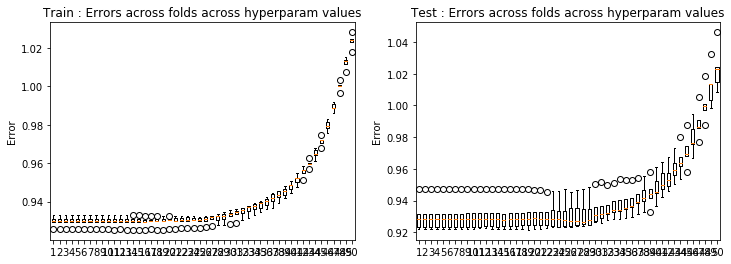

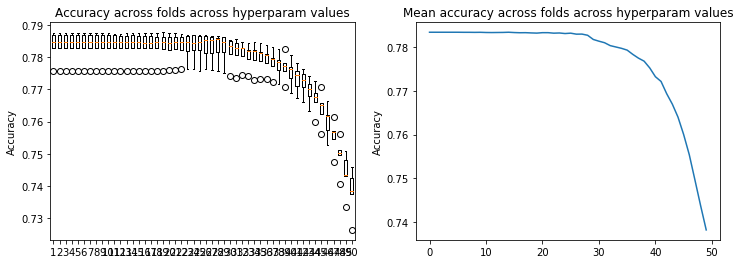

[1.00000000e-08 1.45634848e-08 2.12095089e-08 3.08884360e-08
 4.49843267e-08 6.55128557e-08 9.54095476e-08 1.38949549e-07
 2.02358965e-07 2.94705170e-07 4.29193426e-07 6.25055193e-07
 9.10298178e-07 1.32571137e-06 1.93069773e-06 2.81176870e-06
 4.09491506e-06 5.96362332e-06 8.68511374e-06 1.26485522e-05
 1.84206997e-05 2.68269580e-05 3.90693994e-05 5.68986603e-05
 8.28642773e-05 1.20679264e-04 1.75751062e-04 2.55954792e-04
 3.72759372e-04 5.42867544e-04 7.90604321e-04 1.15139540e-03
 1.67683294e-03 2.44205309e-03 3.55648031e-03 5.17947468e-03
 7.54312006e-03 1.09854114e-02 1.59985872e-02 2.32995181e-02
 3.39322177e-02 4.94171336e-02 7.19685673e-02 1.04811313e-01
 1.52641797e-01 2.22299648e-01 3.23745754e-01 4.71486636e-01
 6.86648845e-01 1.00000000e+00]


In [242]:
result_crossval(loss_tr21,loss_te21)
result_crossval_accuracy(acc21)
print(lambdas)

In [ ]:
result_crossval(loss_tr22,loss_te22)
result_crossval_accuracy(acc22)

In [ ]:
result_crossval(loss_tr23,loss_te23)
result_crossval_accuracy(acc23)

In [ ]:
result_crossval(loss_tr24,loss_te24)
result_crossval_accuracy(acc24)

In [ ]:
# test 20: degree 1, feature selection with correlated features, no removal of outliers, median undef